# **Dog vs Cat Image Classifier**

Since we are gonna use script "retrain.py" for the custom image classification and retrain.py script is compatible with tensorflow-gpu==1.15.2.


In [0]:
!pip install tensorflow-gpu==1.15.2

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
import tensorflow as tf

In [0]:
from os import listdir

In [0]:
tf.__version__

'1.15.2'

Mounted google drive to access dataset, which is in .zip file, we will unzip it in colab working directory.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import zipfile
!apt install unzip



In [0]:
!unzip -q "/content/drive/My Drive/dogs-vs-cats"

In [0]:
!unzip -q "/content/test1"

In [0]:
!unzip -q "/content/train"

In [0]:
import os

retrain.py require a particular structure of folder for input. 
      
      -train:
            -1cats:
                  -cat1.jpg
                  -cat2.jpg
                   ...
            -1dogs:
                  -dog1.jpg
                  -dog2.jpg
                  ...

we have to get the data in this structure, before training starts                  

In [0]:
dataset = 'train/' 
img_data = ['1cats/','1dogs/']
for j in range(2):    
  new_dir = dataset + img_data[j]
  os.makedirs(new_dir, exist_ok = True)  

In [0]:
import shutil

In [0]:
print(len(os.listdir('train/')))

25002


In [0]:
src_dir = 'train/'
src_file = os.listdir(src_dir)
for i in range(25002):
  src = src_dir + src_file[i]
  dst_dir = 'train/'
  if src_file[i].startswith('cat'):
    dst = dst_dir + '1cats/' + src_file[i]
    shutil.move(src, dst)
  elif src_file[i].startswith('dog'):
    dst = dst_dir + '1dogs/' + src_file[i]
    shutil.move(src, dst)

In [0]:
print(len(os.listdir('train/1cats')))
print(len(os.listdir('train/1dogs')))

12500
12500


Data augmentation is done using ImageDataGenerator class of keras.preprocessing, raw images are taken from train folder and generated images are saved in train1 folder, inside subfolder of corresponding classes.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
from tensorflow import keras

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [0]:
from tqdm import tqdm

In [0]:
os.makedirs('train1/', exist_ok=True)
dir1 = 'train1/'
sub_fol1 = ['1cats/', '1dogs/']
for i in range(2):
  sub_dir1 = dir1 +  sub_fol1[i]
  os.makedirs(sub_dir1, exist_ok=True)

In [0]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

src_dir = 'train/'
dst_dir1 = 'train1/'
sub_fol1 = ['1cats/', '1dogs/']
for i in range(2):
  src1 = src_dir + sub_fol1[i]
  dst_file1 = dst_dir1 + sub_fol1[i]
  src_file1 = os.listdir(src1)
  for file in tqdm(src_file1):
    img = load_img(os.path.join(src1+file))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    a=2
    for batch in datagen.flow(x, batch_size = 1, save_to_dir=dst_file1,save_prefix = file ,save_format='jpg'):
      if a==2:
        break


100%|██████████| 12500/12500 [08:35<00:00, 24.25it/s]


In [0]:
print(len(os.listdir('train1/1cats')))

12500


# **Training**

Cloned the github repository provided by googlecodelabs, to access script "retrain.py", and provided all the required arguments for custom classification.

Results are exciting, got the final test accuracy of 99.0%

In [0]:
if not os.path.isdir("tensorflow-for-poets-2"):
  !git clone https://github.com/googlecodelabs/tensorflow-for-poets-2

In [0]:
%run tensorflow-for-poets-2/scripts/retrain.py   \
  --bottleneck_dir=../drive/MyDrive/dvsc/bottlenecks   \
  --how_many_training_steps=1000   \
  --model_dir=../drive/MyDrive/dvsc/imagenet/   \
  --summaries_dir=../drive/MyDrive/dvsc/training_summaries/inception_v3   \
  --output_graph=../drive/MyDrive/dvsc/retrained_graph.pb   \
  --output_labels=../drive/MyDrive/dvsc/retrained_labels.txt   \
  --learning_rate=0.01   \
  --architecture=inception_v3   \
  --image_dir=train1 \
  --flip_left_right \
  --random_crop=0 \
  --random_scale=0 \
  --random_brightness=0 \
  --testing_percentage=10 \
  --validation_percentage=10 \
  --eval_step_interval=10 \
  --train_batch_size=100 \
  --test_batch_size=-1 \
  --validation_batch_size=100 \
  --final_tensor_name=final_result 

INFO:tensorflow:Looking for images in '1dogs'


I0423 17:42:24.073257 139963250014080 retrain.py:156] Looking for images in '1dogs'


INFO:tensorflow:Looking for images in '1cats'


I0423 17:42:24.375999 139963250014080 retrain.py:156] Looking for images in '1cats'


W0423 17:42:24.671470 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:1004: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



W0423 17:42:26.382866 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:954: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



W0423 17:42:26.400357 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:960: The name tf.image.resize_bilinear is deprecated. Please use tf.compat.v1.image.resize_bilinear instead.



W0423 17:42:26.413919 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:693: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Instructions for updating:
Use tf.TensorShape([]).


W0423 17:42:26.415626 139963250014080 deprecation.py:323] From /content/Image-classification-transfer-learning/retrain.py:693: scalar (from tensorflow.python.framework.tensor_shape) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.TensorShape([]).


Instructions for updating:
Use the `axis` argument instead


W0423 17:42:26.435159 139963250014080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/util/dispatch.py:180: calling squeeze (from tensorflow.python.ops.array_ops) with squeeze_dims is deprecated and will be removed in a future version.
Instructions for updating:
Use the `axis` argument instead


W0423 17:42:26.439870 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:704: The name tf.random_crop is deprecated. Please use tf.image.random_crop instead.



W0423 17:42:26.479447 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:758: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.



W0423 17:42:26.484080 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:772: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.



W0423 17:42:26.502357 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:726: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.



W0423 17:42:26.521373 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:732: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



W0423 17:42:26.554097 139963250014080 deprecation.py:323] From /content/Image-classification-transfer-learning/retrain.py:790: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



W0423 17:42:26.583772 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:796: The name tf.train.GradientDescentOptimizer is deprecated. Please use tf.compat.v1.train.GradientDescentOptimizer instead.



W0423 17:42:26.635967 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:1038: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.



W0423 17:42:26.639466 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:1039: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



W0423 17:42:27.535875 139963250014080 module_wrapper.py:139] From /content/Image-classification-transfer-learning/retrain.py:1046: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



INFO:tensorflow:2020-04-23 17:42:47.475705: Step 0: Train accuracy = 99.0%


I0423 17:42:47.475928 139963250014080 retrain.py:1082] 2020-04-23 17:42:47.475705: Step 0: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 17:42:47.483473: Step 0: Cross entropy = 0.617624


I0423 17:42:47.483525 139963250014080 retrain.py:1084] 2020-04-23 17:42:47.483473: Step 0: Cross entropy = 0.617624


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11149.jpg_0_3542.jpg_inception_v3.txt


I0423 17:42:47.487627 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11149.jpg_0_3542.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8106.jpg_0_2388.jpg_inception_v3.txt


I0423 17:42:47.560930 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8106.jpg_0_2388.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1443.jpg_0_9002.jpg_inception_v3.txt


I0423 17:42:47.611121 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1443.jpg_0_9002.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10098.jpg_0_5655.jpg_inception_v3.txt


I0423 17:42:47.659852 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10098.jpg_0_5655.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11678.jpg_0_2038.jpg_inception_v3.txt


I0423 17:42:47.720349 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11678.jpg_0_2038.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7038.jpg_0_8366.jpg_inception_v3.txt


I0423 17:42:47.769734 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7038.jpg_0_8366.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3762.jpg_0_8966.jpg_inception_v3.txt


I0423 17:42:47.820682 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3762.jpg_0_8966.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2844.jpg_0_5065.jpg_inception_v3.txt


I0423 17:42:47.869731 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2844.jpg_0_5065.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4718.jpg_0_8455.jpg_inception_v3.txt


I0423 17:42:47.916614 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4718.jpg_0_8455.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.396.jpg_0_5382.jpg_inception_v3.txt


I0423 17:42:47.961155 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.396.jpg_0_5382.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10915.jpg_0_6660.jpg_inception_v3.txt


I0423 17:42:48.008064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10915.jpg_0_6660.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4856.jpg_0_4645.jpg_inception_v3.txt


I0423 17:42:48.053001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4856.jpg_0_4645.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5067.jpg_0_6602.jpg_inception_v3.txt


I0423 17:42:48.096767 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5067.jpg_0_6602.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9611.jpg_0_5287.jpg_inception_v3.txt


I0423 17:42:48.140717 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9611.jpg_0_5287.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10108.jpg_0_3269.jpg_inception_v3.txt


I0423 17:42:48.185014 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10108.jpg_0_3269.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5354.jpg_0_8163.jpg_inception_v3.txt


I0423 17:42:48.230041 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5354.jpg_0_8163.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6721.jpg_0_1591.jpg_inception_v3.txt


I0423 17:42:48.272797 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6721.jpg_0_1591.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1917.jpg_0_6752.jpg_inception_v3.txt


I0423 17:42:48.324927 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1917.jpg_0_6752.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.548.jpg_0_4797.jpg_inception_v3.txt


I0423 17:42:48.368524 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.548.jpg_0_4797.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10137.jpg_0_6944.jpg_inception_v3.txt


I0423 17:42:48.410608 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10137.jpg_0_6944.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3461.jpg_0_9917.jpg_inception_v3.txt


I0423 17:42:48.454841 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3461.jpg_0_9917.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.30.jpg_0_9220.jpg_inception_v3.txt


I0423 17:42:48.498191 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.30.jpg_0_9220.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6586.jpg_0_4010.jpg_inception_v3.txt


I0423 17:42:48.543696 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6586.jpg_0_4010.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4500.jpg_0_7867.jpg_inception_v3.txt


I0423 17:42:48.590510 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4500.jpg_0_7867.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9487.jpg_0_7324.jpg_inception_v3.txt


I0423 17:42:48.632480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9487.jpg_0_7324.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2403.jpg_0_3808.jpg_inception_v3.txt


I0423 17:42:48.684002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2403.jpg_0_3808.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.602.jpg_0_8276.jpg_inception_v3.txt


I0423 17:42:48.744164 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.602.jpg_0_8276.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6894.jpg_0_4757.jpg_inception_v3.txt


I0423 17:42:48.791404 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6894.jpg_0_4757.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3598.jpg_0_5643.jpg_inception_v3.txt


I0423 17:42:48.837095 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3598.jpg_0_5643.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12350.jpg_0_9523.jpg_inception_v3.txt


I0423 17:42:48.885452 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12350.jpg_0_9523.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6798.jpg_0_2473.jpg_inception_v3.txt


I0423 17:42:48.931813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6798.jpg_0_2473.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9533.jpg_0_8414.jpg_inception_v3.txt


I0423 17:42:48.976346 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9533.jpg_0_8414.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9517.jpg_0_6779.jpg_inception_v3.txt


I0423 17:42:49.018970 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9517.jpg_0_6779.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6546.jpg_0_6031.jpg_inception_v3.txt


I0423 17:42:49.064376 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6546.jpg_0_6031.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2284.jpg_0_2196.jpg_inception_v3.txt


I0423 17:42:49.108745 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2284.jpg_0_2196.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6217.jpg_0_8764.jpg_inception_v3.txt


I0423 17:42:49.152922 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6217.jpg_0_8764.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12164.jpg_0_3745.jpg_inception_v3.txt


I0423 17:42:49.197810 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12164.jpg_0_3745.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.675.jpg_0_7603.jpg_inception_v3.txt


I0423 17:42:49.244177 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.675.jpg_0_7603.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10299.jpg_0_4392.jpg_inception_v3.txt


I0423 17:42:49.289147 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10299.jpg_0_4392.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.97.jpg_0_4986.jpg_inception_v3.txt


I0423 17:42:49.340095 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.97.jpg_0_4986.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2422.jpg_0_4393.jpg_inception_v3.txt


I0423 17:42:49.387157 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2422.jpg_0_4393.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6268.jpg_0_5726.jpg_inception_v3.txt


I0423 17:42:49.437124 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6268.jpg_0_5726.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6314.jpg_0_6067.jpg_inception_v3.txt


I0423 17:42:49.486362 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6314.jpg_0_6067.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4866.jpg_0_8709.jpg_inception_v3.txt


I0423 17:42:49.536219 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4866.jpg_0_8709.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1261.jpg_0_943.jpg_inception_v3.txt


I0423 17:42:49.587462 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1261.jpg_0_943.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6218.jpg_0_8085.jpg_inception_v3.txt


I0423 17:42:49.634570 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6218.jpg_0_8085.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2690.jpg_0_897.jpg_inception_v3.txt


I0423 17:42:49.684063 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2690.jpg_0_897.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2794.jpg_0_3341.jpg_inception_v3.txt


I0423 17:42:49.734513 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2794.jpg_0_3341.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7564.jpg_0_1055.jpg_inception_v3.txt


I0423 17:42:49.792562 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7564.jpg_0_1055.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7074.jpg_0_753.jpg_inception_v3.txt


I0423 17:42:49.836663 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7074.jpg_0_753.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8172.jpg_0_1572.jpg_inception_v3.txt


I0423 17:42:49.890053 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8172.jpg_0_1572.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5367.jpg_0_9157.jpg_inception_v3.txt


I0423 17:42:49.938560 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5367.jpg_0_9157.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4843.jpg_0_4798.jpg_inception_v3.txt


I0423 17:42:49.994060 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4843.jpg_0_4798.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7057.jpg_0_3314.jpg_inception_v3.txt


I0423 17:42:50.041548 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7057.jpg_0_3314.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9574.jpg_0_2001.jpg_inception_v3.txt


I0423 17:42:50.091409 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9574.jpg_0_2001.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4136.jpg_0_8772.jpg_inception_v3.txt


I0423 17:42:50.139471 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4136.jpg_0_8772.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7998.jpg_0_8200.jpg_inception_v3.txt


I0423 17:42:50.188113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7998.jpg_0_8200.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9728.jpg_0_2556.jpg_inception_v3.txt


I0423 17:42:50.237406 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9728.jpg_0_2556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4503.jpg_0_7679.jpg_inception_v3.txt


I0423 17:42:50.283134 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4503.jpg_0_7679.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1209.jpg_0_1285.jpg_inception_v3.txt


I0423 17:42:50.331441 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1209.jpg_0_1285.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4038.jpg_0_2848.jpg_inception_v3.txt


I0423 17:42:50.389251 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4038.jpg_0_2848.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4082.jpg_0_1983.jpg_inception_v3.txt


I0423 17:42:50.441539 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4082.jpg_0_1983.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6873.jpg_0_5299.jpg_inception_v3.txt


I0423 17:42:50.497149 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6873.jpg_0_5299.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6707.jpg_0_92.jpg_inception_v3.txt


I0423 17:42:50.547493 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6707.jpg_0_92.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.452.jpg_0_9674.jpg_inception_v3.txt


I0423 17:42:50.598460 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.452.jpg_0_9674.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7811.jpg_0_9375.jpg_inception_v3.txt


I0423 17:42:50.646468 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7811.jpg_0_9375.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4873.jpg_0_6404.jpg_inception_v3.txt


I0423 17:42:50.696461 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4873.jpg_0_6404.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8692.jpg_0_3607.jpg_inception_v3.txt


I0423 17:42:50.746181 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8692.jpg_0_3607.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7146.jpg_0_6000.jpg_inception_v3.txt


I0423 17:42:50.808609 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7146.jpg_0_6000.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4358.jpg_0_5214.jpg_inception_v3.txt


I0423 17:42:50.859248 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4358.jpg_0_5214.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9590.jpg_0_837.jpg_inception_v3.txt


I0423 17:42:50.909368 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9590.jpg_0_837.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8645.jpg_0_1181.jpg_inception_v3.txt


I0423 17:42:50.953567 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8645.jpg_0_1181.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6470.jpg_0_6305.jpg_inception_v3.txt


I0423 17:42:50.997871 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6470.jpg_0_6305.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.603.jpg_0_2877.jpg_inception_v3.txt


I0423 17:42:51.051667 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.603.jpg_0_2877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4499.jpg_0_1509.jpg_inception_v3.txt


I0423 17:42:51.100560 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4499.jpg_0_1509.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12463.jpg_0_7060.jpg_inception_v3.txt


I0423 17:42:51.147407 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12463.jpg_0_7060.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5734.jpg_0_7964.jpg_inception_v3.txt


I0423 17:42:51.196031 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5734.jpg_0_7964.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6169.jpg_0_1321.jpg_inception_v3.txt


I0423 17:42:51.246113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6169.jpg_0_1321.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11268.jpg_0_3403.jpg_inception_v3.txt


I0423 17:42:51.296552 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11268.jpg_0_3403.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1667.jpg_0_6339.jpg_inception_v3.txt


I0423 17:42:51.344455 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1667.jpg_0_6339.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10946.jpg_0_1878.jpg_inception_v3.txt


I0423 17:42:51.401775 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10946.jpg_0_1878.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3070.jpg_0_9368.jpg_inception_v3.txt


I0423 17:42:51.447741 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3070.jpg_0_9368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7713.jpg_0_6992.jpg_inception_v3.txt


I0423 17:42:51.496197 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7713.jpg_0_6992.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1083.jpg_0_2803.jpg_inception_v3.txt


I0423 17:42:51.543978 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1083.jpg_0_2803.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10798.jpg_0_3304.jpg_inception_v3.txt


I0423 17:42:51.594383 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10798.jpg_0_3304.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4113.jpg_0_193.jpg_inception_v3.txt


I0423 17:42:51.642182 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4113.jpg_0_193.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.910.jpg_0_5756.jpg_inception_v3.txt


I0423 17:42:51.694550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.910.jpg_0_5756.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3441.jpg_0_8168.jpg_inception_v3.txt


I0423 17:42:51.741659 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3441.jpg_0_8168.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10995.jpg_0_1418.jpg_inception_v3.txt


I0423 17:42:51.795274 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10995.jpg_0_1418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11477.jpg_0_7089.jpg_inception_v3.txt


I0423 17:42:51.846225 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11477.jpg_0_7089.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9489.jpg_0_3466.jpg_inception_v3.txt


I0423 17:42:51.894009 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9489.jpg_0_3466.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12300.jpg_0_7775.jpg_inception_v3.txt


I0423 17:42:51.942236 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12300.jpg_0_7775.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12350.jpg_0_1172.jpg_inception_v3.txt


I0423 17:42:51.991958 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12350.jpg_0_1172.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11570.jpg_0_5670.jpg_inception_v3.txt


I0423 17:42:52.039648 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11570.jpg_0_5670.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8951.jpg_0_4330.jpg_inception_v3.txt


I0423 17:42:52.090647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8951.jpg_0_4330.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9018.jpg_0_2369.jpg_inception_v3.txt


I0423 17:42:52.139519 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9018.jpg_0_2369.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9860.jpg_0_4503.jpg_inception_v3.txt


I0423 17:42:52.190387 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9860.jpg_0_4503.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3369.jpg_0_2297.jpg_inception_v3.txt


I0423 17:42:52.240066 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3369.jpg_0_2297.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4445.jpg_0_25.jpg_inception_v3.txt


I0423 17:42:52.290742 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4445.jpg_0_25.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:42:53.085253: Step 0: Validation accuracy = 99.0% (N=100)


I0423 17:42:53.085363 139963250014080 retrain.py:1100] 2020-04-23 17:42:53.085253: Step 0: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 17:43:31.503464: Step 10: Train accuracy = 98.0%


I0423 17:43:31.503589 139963250014080 retrain.py:1082] 2020-04-23 17:43:31.503464: Step 10: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 17:43:31.506462: Step 10: Cross entropy = 0.314362


I0423 17:43:31.506494 139963250014080 retrain.py:1084] 2020-04-23 17:43:31.506462: Step 10: Cross entropy = 0.314362


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4217.jpg_0_124.jpg_inception_v3.txt


I0423 17:43:31.508340 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4217.jpg_0_124.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1101.jpg_0_7475.jpg_inception_v3.txt


I0423 17:43:31.556924 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1101.jpg_0_7475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2892.jpg_0_3970.jpg_inception_v3.txt


I0423 17:43:31.600175 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2892.jpg_0_3970.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8530.jpg_0_6589.jpg_inception_v3.txt


I0423 17:43:31.641505 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8530.jpg_0_6589.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1616.jpg_0_6058.jpg_inception_v3.txt


I0423 17:43:31.695603 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1616.jpg_0_6058.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12149.jpg_0_2918.jpg_inception_v3.txt


I0423 17:43:31.738625 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12149.jpg_0_2918.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4718.jpg_0_2662.jpg_inception_v3.txt


I0423 17:43:31.780205 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4718.jpg_0_2662.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8767.jpg_0_7536.jpg_inception_v3.txt


I0423 17:43:31.823138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8767.jpg_0_7536.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11796.jpg_0_3132.jpg_inception_v3.txt


I0423 17:43:31.866566 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11796.jpg_0_3132.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11761.jpg_0_4577.jpg_inception_v3.txt


I0423 17:43:31.906883 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11761.jpg_0_4577.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7460.jpg_0_1843.jpg_inception_v3.txt


I0423 17:43:31.948663 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7460.jpg_0_1843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.797.jpg_0_5796.jpg_inception_v3.txt


I0423 17:43:31.996758 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.797.jpg_0_5796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4143.jpg_0_4588.jpg_inception_v3.txt


I0423 17:43:32.038471 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4143.jpg_0_4588.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11326.jpg_0_2917.jpg_inception_v3.txt


I0423 17:43:32.081690 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11326.jpg_0_2917.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2627.jpg_0_1380.jpg_inception_v3.txt


I0423 17:43:32.123116 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2627.jpg_0_1380.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1881.jpg_0_3725.jpg_inception_v3.txt


I0423 17:43:32.165095 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1881.jpg_0_3725.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11760.jpg_0_1182.jpg_inception_v3.txt


I0423 17:43:32.206976 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11760.jpg_0_1182.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9613.jpg_0_5874.jpg_inception_v3.txt


I0423 17:43:32.249075 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9613.jpg_0_5874.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3342.jpg_0_6322.jpg_inception_v3.txt


I0423 17:43:32.291696 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3342.jpg_0_6322.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1001.jpg_0_2329.jpg_inception_v3.txt


I0423 17:43:32.332945 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1001.jpg_0_2329.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10727.jpg_0_8141.jpg_inception_v3.txt


I0423 17:43:32.378193 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10727.jpg_0_8141.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10218.jpg_0_9407.jpg_inception_v3.txt


I0423 17:43:32.424642 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10218.jpg_0_9407.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1231.jpg_0_5598.jpg_inception_v3.txt


I0423 17:43:32.470613 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1231.jpg_0_5598.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4709.jpg_0_9617.jpg_inception_v3.txt


I0423 17:43:32.518218 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4709.jpg_0_9617.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2399.jpg_0_9810.jpg_inception_v3.txt


I0423 17:43:32.567101 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2399.jpg_0_9810.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5525.jpg_0_8744.jpg_inception_v3.txt


I0423 17:43:32.613628 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5525.jpg_0_8744.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12349.jpg_0_8029.jpg_inception_v3.txt


I0423 17:43:32.662142 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12349.jpg_0_8029.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5616.jpg_0_7888.jpg_inception_v3.txt


I0423 17:43:32.718611 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5616.jpg_0_7888.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7012.jpg_0_6830.jpg_inception_v3.txt


I0423 17:43:32.766867 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7012.jpg_0_6830.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12121.jpg_0_1467.jpg_inception_v3.txt


I0423 17:43:32.815039 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12121.jpg_0_1467.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10341.jpg_0_4210.jpg_inception_v3.txt


I0423 17:43:32.863832 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10341.jpg_0_4210.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3419.jpg_0_3597.jpg_inception_v3.txt


I0423 17:43:32.911353 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3419.jpg_0_3597.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9140.jpg_0_9981.jpg_inception_v3.txt


I0423 17:43:32.954887 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9140.jpg_0_9981.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11306.jpg_0_7369.jpg_inception_v3.txt


I0423 17:43:33.004216 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11306.jpg_0_7369.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5356.jpg_0_346.jpg_inception_v3.txt


I0423 17:43:33.047112 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5356.jpg_0_346.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8730.jpg_0_5800.jpg_inception_v3.txt


I0423 17:43:33.090791 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8730.jpg_0_5800.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5774.jpg_0_6906.jpg_inception_v3.txt


I0423 17:43:33.133102 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5774.jpg_0_6906.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6942.jpg_0_276.jpg_inception_v3.txt


I0423 17:43:33.176649 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6942.jpg_0_276.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5964.jpg_0_8872.jpg_inception_v3.txt


I0423 17:43:33.220086 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5964.jpg_0_8872.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7148.jpg_0_8385.jpg_inception_v3.txt


I0423 17:43:33.261575 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7148.jpg_0_8385.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1843.jpg_0_722.jpg_inception_v3.txt


I0423 17:43:33.301865 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1843.jpg_0_722.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2838.jpg_0_8941.jpg_inception_v3.txt


I0423 17:43:33.344306 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2838.jpg_0_8941.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.626.jpg_0_6575.jpg_inception_v3.txt


I0423 17:43:33.387924 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.626.jpg_0_6575.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9324.jpg_0_1175.jpg_inception_v3.txt


I0423 17:43:33.430002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9324.jpg_0_1175.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1426.jpg_0_3905.jpg_inception_v3.txt


I0423 17:43:33.472917 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1426.jpg_0_3905.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2027.jpg_0_2501.jpg_inception_v3.txt


I0423 17:43:33.516571 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2027.jpg_0_2501.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.564.jpg_0_3786.jpg_inception_v3.txt


I0423 17:43:33.558728 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.564.jpg_0_3786.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3187.jpg_0_1767.jpg_inception_v3.txt


I0423 17:43:33.601956 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3187.jpg_0_1767.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2130.jpg_0_6202.jpg_inception_v3.txt


I0423 17:43:33.644058 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2130.jpg_0_6202.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8454.jpg_0_7761.jpg_inception_v3.txt


I0423 17:43:33.686558 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8454.jpg_0_7761.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8392.jpg_0_7043.jpg_inception_v3.txt


I0423 17:43:33.738153 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8392.jpg_0_7043.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3257.jpg_0_5240.jpg_inception_v3.txt


I0423 17:43:33.782222 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3257.jpg_0_5240.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11564.jpg_0_8263.jpg_inception_v3.txt


I0423 17:43:33.825791 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11564.jpg_0_8263.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5024.jpg_0_4171.jpg_inception_v3.txt


I0423 17:43:33.869813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5024.jpg_0_4171.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4938.jpg_0_8374.jpg_inception_v3.txt


I0423 17:43:33.914515 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4938.jpg_0_8374.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1745.jpg_0_5748.jpg_inception_v3.txt


I0423 17:43:33.959210 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1745.jpg_0_5748.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11784.jpg_0_2682.jpg_inception_v3.txt


I0423 17:43:34.009966 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11784.jpg_0_2682.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8898.jpg_0_9919.jpg_inception_v3.txt


I0423 17:43:34.051757 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8898.jpg_0_9919.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9179.jpg_0_6231.jpg_inception_v3.txt


I0423 17:43:34.094465 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9179.jpg_0_6231.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4091.jpg_0_5745.jpg_inception_v3.txt


I0423 17:43:34.135429 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4091.jpg_0_5745.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8925.jpg_0_6288.jpg_inception_v3.txt


I0423 17:43:34.177103 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8925.jpg_0_6288.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4623.jpg_0_9088.jpg_inception_v3.txt


I0423 17:43:34.219932 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4623.jpg_0_9088.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3857.jpg_0_2401.jpg_inception_v3.txt


I0423 17:43:34.261162 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3857.jpg_0_2401.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2634.jpg_0_664.jpg_inception_v3.txt


I0423 17:43:34.302341 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2634.jpg_0_664.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.301.jpg_0_7959.jpg_inception_v3.txt


I0423 17:43:34.345398 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.301.jpg_0_7959.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9411.jpg_0_8335.jpg_inception_v3.txt


I0423 17:43:34.389040 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9411.jpg_0_8335.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2370.jpg_0_2720.jpg_inception_v3.txt


I0423 17:43:34.435547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2370.jpg_0_2720.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11524.jpg_0_6107.jpg_inception_v3.txt


I0423 17:43:34.482363 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11524.jpg_0_6107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.890.jpg_0_3940.jpg_inception_v3.txt


I0423 17:43:34.530533 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.890.jpg_0_3940.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7037.jpg_0_9817.jpg_inception_v3.txt


I0423 17:43:34.577800 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7037.jpg_0_9817.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2846.jpg_0_5212.jpg_inception_v3.txt


I0423 17:43:34.625627 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2846.jpg_0_5212.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6692.jpg_0_476.jpg_inception_v3.txt


I0423 17:43:34.672422 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6692.jpg_0_476.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11216.jpg_0_5997.jpg_inception_v3.txt


I0423 17:43:34.723556 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11216.jpg_0_5997.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6830.jpg_0_6241.jpg_inception_v3.txt


I0423 17:43:34.780723 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6830.jpg_0_6241.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5771.jpg_0_7644.jpg_inception_v3.txt


I0423 17:43:34.832958 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5771.jpg_0_7644.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.243.jpg_0_2641.jpg_inception_v3.txt


I0423 17:43:34.879030 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.243.jpg_0_2641.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12.jpg_0_415.jpg_inception_v3.txt


I0423 17:43:34.928675 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12.jpg_0_415.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5819.jpg_0_19.jpg_inception_v3.txt


I0423 17:43:34.976646 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5819.jpg_0_19.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1889.jpg_0_7291.jpg_inception_v3.txt


I0423 17:43:35.032376 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1889.jpg_0_7291.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11808.jpg_0_6518.jpg_inception_v3.txt


I0423 17:43:35.080433 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11808.jpg_0_6518.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11987.jpg_0_2999.jpg_inception_v3.txt


I0423 17:43:35.127931 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11987.jpg_0_2999.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4605.jpg_0_464.jpg_inception_v3.txt


I0423 17:43:35.175882 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4605.jpg_0_464.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4553.jpg_0_7461.jpg_inception_v3.txt


I0423 17:43:35.223192 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4553.jpg_0_7461.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3188.jpg_0_4097.jpg_inception_v3.txt


I0423 17:43:35.280184 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3188.jpg_0_4097.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3227.jpg_0_3911.jpg_inception_v3.txt


I0423 17:43:35.329526 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3227.jpg_0_3911.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1243.jpg_0_2724.jpg_inception_v3.txt


I0423 17:43:35.384138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1243.jpg_0_2724.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6286.jpg_0_7398.jpg_inception_v3.txt


I0423 17:43:35.432610 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6286.jpg_0_7398.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4622.jpg_0_7627.jpg_inception_v3.txt


I0423 17:43:35.481622 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4622.jpg_0_7627.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3425.jpg_0_694.jpg_inception_v3.txt


I0423 17:43:35.531034 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3425.jpg_0_694.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2922.jpg_0_8901.jpg_inception_v3.txt


I0423 17:43:35.581392 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2922.jpg_0_8901.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3361.jpg_0_9037.jpg_inception_v3.txt


I0423 17:43:35.629952 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3361.jpg_0_9037.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1659.jpg_0_3060.jpg_inception_v3.txt


I0423 17:43:35.678588 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1659.jpg_0_3060.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2914.jpg_0_1678.jpg_inception_v3.txt


I0423 17:43:35.725486 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2914.jpg_0_1678.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7143.jpg_0_666.jpg_inception_v3.txt


I0423 17:43:35.783708 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7143.jpg_0_666.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12097.jpg_0_887.jpg_inception_v3.txt


I0423 17:43:35.828611 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12097.jpg_0_887.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2720.jpg_0_3887.jpg_inception_v3.txt


I0423 17:43:35.870851 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2720.jpg_0_3887.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9237.jpg_0_465.jpg_inception_v3.txt


I0423 17:43:35.913763 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9237.jpg_0_465.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:43:35.970459: Step 10: Validation accuracy = 95.0% (N=100)


I0423 17:43:35.970543 139963250014080 retrain.py:1100] 2020-04-23 17:43:35.970459: Step 10: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2020-04-23 17:44:14.387975: Step 20: Train accuracy = 98.0%


I0423 17:44:14.388062 139963250014080 retrain.py:1082] 2020-04-23 17:44:14.387975: Step 20: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 17:44:14.389947: Step 20: Cross entropy = 0.217516


I0423 17:44:14.389996 139963250014080 retrain.py:1084] 2020-04-23 17:44:14.389947: Step 20: Cross entropy = 0.217516


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3943.jpg_0_7057.jpg_inception_v3.txt


I0423 17:44:14.393191 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3943.jpg_0_7057.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8970.jpg_0_7200.jpg_inception_v3.txt


I0423 17:44:14.441180 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8970.jpg_0_7200.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2810.jpg_0_5945.jpg_inception_v3.txt


I0423 17:44:14.484047 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2810.jpg_0_5945.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3929.jpg_0_6186.jpg_inception_v3.txt


I0423 17:44:14.526526 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3929.jpg_0_6186.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.871.jpg_0_2682.jpg_inception_v3.txt


I0423 17:44:14.569031 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.871.jpg_0_2682.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10176.jpg_0_7086.jpg_inception_v3.txt


I0423 17:44:14.624018 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10176.jpg_0_7086.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1491.jpg_0_3138.jpg_inception_v3.txt


I0423 17:44:14.670741 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1491.jpg_0_3138.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1935.jpg_0_1727.jpg_inception_v3.txt


I0423 17:44:14.713740 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1935.jpg_0_1727.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1365.jpg_0_1541.jpg_inception_v3.txt


I0423 17:44:14.756129 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1365.jpg_0_1541.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4827.jpg_0_9907.jpg_inception_v3.txt


I0423 17:44:14.799340 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4827.jpg_0_9907.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12347.jpg_0_2543.jpg_inception_v3.txt


I0423 17:44:14.841717 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12347.jpg_0_2543.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1171.jpg_0_6580.jpg_inception_v3.txt


I0423 17:44:14.885330 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1171.jpg_0_6580.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9044.jpg_0_8059.jpg_inception_v3.txt


I0423 17:44:14.930782 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9044.jpg_0_8059.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6766.jpg_0_7157.jpg_inception_v3.txt


I0423 17:44:14.979149 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6766.jpg_0_7157.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2427.jpg_0_3004.jpg_inception_v3.txt


I0423 17:44:15.027141 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2427.jpg_0_3004.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4825.jpg_0_2061.jpg_inception_v3.txt


I0423 17:44:15.070760 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4825.jpg_0_2061.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11752.jpg_0_7336.jpg_inception_v3.txt


I0423 17:44:15.118442 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11752.jpg_0_7336.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5977.jpg_0_3512.jpg_inception_v3.txt


I0423 17:44:15.167898 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5977.jpg_0_3512.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4370.jpg_0_313.jpg_inception_v3.txt


I0423 17:44:15.215075 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4370.jpg_0_313.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.205.jpg_0_2919.jpg_inception_v3.txt


I0423 17:44:15.263789 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.205.jpg_0_2919.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2224.jpg_0_8324.jpg_inception_v3.txt


I0423 17:44:15.311667 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2224.jpg_0_8324.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2451.jpg_0_5856.jpg_inception_v3.txt


I0423 17:44:15.360480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2451.jpg_0_5856.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4248.jpg_0_8191.jpg_inception_v3.txt


I0423 17:44:15.409060 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4248.jpg_0_8191.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8941.jpg_0_9699.jpg_inception_v3.txt


I0423 17:44:15.458506 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8941.jpg_0_9699.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8026.jpg_0_5138.jpg_inception_v3.txt


I0423 17:44:15.507771 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8026.jpg_0_5138.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.279.jpg_0_7191.jpg_inception_v3.txt


I0423 17:44:15.569001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.279.jpg_0_7191.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10871.jpg_0_9224.jpg_inception_v3.txt


I0423 17:44:15.633887 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10871.jpg_0_9224.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.918.jpg_0_7683.jpg_inception_v3.txt


I0423 17:44:15.692162 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.918.jpg_0_7683.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6670.jpg_0_3066.jpg_inception_v3.txt


I0423 17:44:15.738190 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6670.jpg_0_3066.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4392.jpg_0_5299.jpg_inception_v3.txt


I0423 17:44:15.784919 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4392.jpg_0_5299.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10041.jpg_0_1793.jpg_inception_v3.txt


I0423 17:44:15.831660 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10041.jpg_0_1793.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7167.jpg_0_6245.jpg_inception_v3.txt


I0423 17:44:15.878571 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7167.jpg_0_6245.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6733.jpg_0_6976.jpg_inception_v3.txt


I0423 17:44:15.923837 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6733.jpg_0_6976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8037.jpg_0_259.jpg_inception_v3.txt


I0423 17:44:15.972167 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8037.jpg_0_259.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7288.jpg_0_2336.jpg_inception_v3.txt


I0423 17:44:16.014604 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7288.jpg_0_2336.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12342.jpg_0_8974.jpg_inception_v3.txt


I0423 17:44:16.056729 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12342.jpg_0_8974.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10776.jpg_0_1509.jpg_inception_v3.txt


I0423 17:44:16.099691 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10776.jpg_0_1509.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8125.jpg_0_615.jpg_inception_v3.txt


I0423 17:44:16.142357 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8125.jpg_0_615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12450.jpg_0_1074.jpg_inception_v3.txt


I0423 17:44:16.197664 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12450.jpg_0_1074.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3906.jpg_0_7399.jpg_inception_v3.txt


I0423 17:44:16.239836 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3906.jpg_0_7399.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1104.jpg_0_6324.jpg_inception_v3.txt


I0423 17:44:16.282757 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1104.jpg_0_6324.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1752.jpg_0_6592.jpg_inception_v3.txt


I0423 17:44:16.326407 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1752.jpg_0_6592.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9409.jpg_0_8806.jpg_inception_v3.txt


I0423 17:44:16.369412 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9409.jpg_0_8806.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4169.jpg_0_6443.jpg_inception_v3.txt


I0423 17:44:16.410573 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4169.jpg_0_6443.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9940.jpg_0_8778.jpg_inception_v3.txt


I0423 17:44:16.454530 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9940.jpg_0_8778.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2067.jpg_0_1603.jpg_inception_v3.txt


I0423 17:44:16.498548 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2067.jpg_0_1603.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9107.jpg_0_4399.jpg_inception_v3.txt


I0423 17:44:16.541072 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9107.jpg_0_4399.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10382.jpg_0_1615.jpg_inception_v3.txt


I0423 17:44:16.585768 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10382.jpg_0_1615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1533.jpg_0_8015.jpg_inception_v3.txt


I0423 17:44:16.642036 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1533.jpg_0_8015.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11914.jpg_0_2828.jpg_inception_v3.txt


I0423 17:44:16.699255 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11914.jpg_0_2828.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.600.jpg_0_3973.jpg_inception_v3.txt


I0423 17:44:16.750397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.600.jpg_0_3973.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3299.jpg_0_3015.jpg_inception_v3.txt


I0423 17:44:16.798003 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3299.jpg_0_3015.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8245.jpg_0_6095.jpg_inception_v3.txt


I0423 17:44:16.842806 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8245.jpg_0_6095.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4579.jpg_0_3284.jpg_inception_v3.txt


I0423 17:44:16.889729 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4579.jpg_0_3284.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10001.jpg_0_1475.jpg_inception_v3.txt


I0423 17:44:16.936529 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10001.jpg_0_1475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1301.jpg_0_2121.jpg_inception_v3.txt


I0423 17:44:16.985057 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1301.jpg_0_2121.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7255.jpg_0_4747.jpg_inception_v3.txt


I0423 17:44:17.032253 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7255.jpg_0_4747.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5389.jpg_0_7599.jpg_inception_v3.txt


I0423 17:44:17.080923 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5389.jpg_0_7599.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10493.jpg_0_5994.jpg_inception_v3.txt


I0423 17:44:17.127065 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10493.jpg_0_5994.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1956.jpg_0_1765.jpg_inception_v3.txt


I0423 17:44:17.176639 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1956.jpg_0_1765.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2029.jpg_0_4909.jpg_inception_v3.txt


I0423 17:44:17.226573 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2029.jpg_0_4909.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10226.jpg_0_5371.jpg_inception_v3.txt


I0423 17:44:17.274544 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10226.jpg_0_5371.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1271.jpg_0_8112.jpg_inception_v3.txt


I0423 17:44:17.323137 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1271.jpg_0_8112.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2033.jpg_0_4986.jpg_inception_v3.txt


I0423 17:44:17.371397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2033.jpg_0_4986.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4629.jpg_0_1306.jpg_inception_v3.txt


I0423 17:44:17.420645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4629.jpg_0_1306.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3893.jpg_0_3061.jpg_inception_v3.txt


I0423 17:44:17.468121 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3893.jpg_0_3061.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12283.jpg_0_5993.jpg_inception_v3.txt


I0423 17:44:17.516793 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12283.jpg_0_5993.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10967.jpg_0_5046.jpg_inception_v3.txt


I0423 17:44:17.565250 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10967.jpg_0_5046.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3208.jpg_0_5312.jpg_inception_v3.txt


I0423 17:44:17.613007 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3208.jpg_0_5312.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11339.jpg_0_5470.jpg_inception_v3.txt


I0423 17:44:17.666473 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11339.jpg_0_5470.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1293.jpg_0_5809.jpg_inception_v3.txt


I0423 17:44:17.731863 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1293.jpg_0_5809.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6816.jpg_0_2179.jpg_inception_v3.txt


I0423 17:44:17.784862 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6816.jpg_0_2179.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1008.jpg_0_9296.jpg_inception_v3.txt


I0423 17:44:17.834350 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1008.jpg_0_9296.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3484.jpg_0_300.jpg_inception_v3.txt


I0423 17:44:17.883948 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3484.jpg_0_300.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3538.jpg_0_9999.jpg_inception_v3.txt


I0423 17:44:17.927641 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3538.jpg_0_9999.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.379.jpg_0_4428.jpg_inception_v3.txt


I0423 17:44:17.976757 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.379.jpg_0_4428.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8110.jpg_0_5819.jpg_inception_v3.txt


I0423 17:44:18.024759 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8110.jpg_0_5819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.331.jpg_0_6779.jpg_inception_v3.txt


I0423 17:44:18.073893 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.331.jpg_0_6779.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8587.jpg_0_5867.jpg_inception_v3.txt


I0423 17:44:18.122456 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8587.jpg_0_5867.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11217.jpg_0_3711.jpg_inception_v3.txt


I0423 17:44:18.172385 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11217.jpg_0_3711.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9897.jpg_0_1798.jpg_inception_v3.txt


I0423 17:44:18.218800 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9897.jpg_0_1798.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9715.jpg_0_6877.jpg_inception_v3.txt


I0423 17:44:18.265332 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9715.jpg_0_6877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1567.jpg_0_2008.jpg_inception_v3.txt


I0423 17:44:18.315488 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1567.jpg_0_2008.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.730.jpg_0_8017.jpg_inception_v3.txt


I0423 17:44:18.367572 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.730.jpg_0_8017.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7650.jpg_0_9418.jpg_inception_v3.txt


I0423 17:44:18.415162 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7650.jpg_0_9418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.644.jpg_0_2166.jpg_inception_v3.txt


I0423 17:44:18.463743 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.644.jpg_0_2166.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8887.jpg_0_2528.jpg_inception_v3.txt


I0423 17:44:18.513275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8887.jpg_0_2528.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6409.jpg_0_7365.jpg_inception_v3.txt


I0423 17:44:18.561167 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6409.jpg_0_7365.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10381.jpg_0_433.jpg_inception_v3.txt


I0423 17:44:18.608224 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10381.jpg_0_433.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6285.jpg_0_6358.jpg_inception_v3.txt


I0423 17:44:18.652117 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6285.jpg_0_6358.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.499.jpg_0_2445.jpg_inception_v3.txt


I0423 17:44:18.700757 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.499.jpg_0_2445.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6026.jpg_0_3840.jpg_inception_v3.txt


I0423 17:44:18.752358 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6026.jpg_0_3840.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12018.jpg_0_3893.jpg_inception_v3.txt


I0423 17:44:18.798876 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12018.jpg_0_3893.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9905.jpg_0_2577.jpg_inception_v3.txt


I0423 17:44:18.849351 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9905.jpg_0_2577.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:44:18.914614: Step 20: Validation accuracy = 100.0% (N=100)


I0423 17:44:18.914717 139963250014080 retrain.py:1100] 2020-04-23 17:44:18.914614: Step 20: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 17:44:57.433583: Step 30: Train accuracy = 99.0%


I0423 17:44:57.433685 139963250014080 retrain.py:1082] 2020-04-23 17:44:57.433583: Step 30: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 17:44:57.436442: Step 30: Cross entropy = 0.159919


I0423 17:44:57.436476 139963250014080 retrain.py:1084] 2020-04-23 17:44:57.436442: Step 30: Cross entropy = 0.159919


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2341.jpg_0_7766.jpg_inception_v3.txt


I0423 17:44:57.441066 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2341.jpg_0_7766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6452.jpg_0_7914.jpg_inception_v3.txt


I0423 17:44:57.486698 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6452.jpg_0_7914.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9232.jpg_0_1147.jpg_inception_v3.txt


I0423 17:44:57.533400 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9232.jpg_0_1147.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2246.jpg_0_8269.jpg_inception_v3.txt


I0423 17:44:57.589386 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2246.jpg_0_8269.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12221.jpg_0_6288.jpg_inception_v3.txt


I0423 17:44:57.630430 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12221.jpg_0_6288.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1053.jpg_0_1597.jpg_inception_v3.txt


I0423 17:44:57.673672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1053.jpg_0_1597.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8892.jpg_0_368.jpg_inception_v3.txt


I0423 17:44:57.715944 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8892.jpg_0_368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3248.jpg_0_3446.jpg_inception_v3.txt


I0423 17:44:57.760987 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3248.jpg_0_3446.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8273.jpg_0_9056.jpg_inception_v3.txt


I0423 17:44:57.804343 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8273.jpg_0_9056.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6745.jpg_0_723.jpg_inception_v3.txt


I0423 17:44:57.846723 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6745.jpg_0_723.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3713.jpg_0_3157.jpg_inception_v3.txt


I0423 17:44:57.888265 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3713.jpg_0_3157.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1213.jpg_0_4769.jpg_inception_v3.txt


I0423 17:44:57.932678 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1213.jpg_0_4769.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10740.jpg_0_4102.jpg_inception_v3.txt


I0423 17:44:57.976083 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10740.jpg_0_4102.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5423.jpg_0_4262.jpg_inception_v3.txt


I0423 17:44:58.020077 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5423.jpg_0_4262.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6711.jpg_0_6233.jpg_inception_v3.txt


I0423 17:44:58.063762 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6711.jpg_0_6233.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4810.jpg_0_9099.jpg_inception_v3.txt


I0423 17:44:58.106279 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4810.jpg_0_9099.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4951.jpg_0_9023.jpg_inception_v3.txt


I0423 17:44:58.148368 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4951.jpg_0_9023.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10276.jpg_0_7343.jpg_inception_v3.txt


I0423 17:44:58.191550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10276.jpg_0_7343.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10863.jpg_0_9829.jpg_inception_v3.txt


I0423 17:44:58.239263 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10863.jpg_0_9829.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.131.jpg_0_7449.jpg_inception_v3.txt


I0423 17:44:58.283151 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.131.jpg_0_7449.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10861.jpg_0_8972.jpg_inception_v3.txt


I0423 17:44:58.325100 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10861.jpg_0_8972.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7588.jpg_0_8639.jpg_inception_v3.txt


I0423 17:44:58.367396 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7588.jpg_0_8639.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7478.jpg_0_2556.jpg_inception_v3.txt


I0423 17:44:58.409028 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7478.jpg_0_2556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9903.jpg_0_3517.jpg_inception_v3.txt


I0423 17:44:58.451251 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9903.jpg_0_3517.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11776.jpg_0_8068.jpg_inception_v3.txt


I0423 17:44:58.495156 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11776.jpg_0_8068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6714.jpg_0_6692.jpg_inception_v3.txt


I0423 17:44:58.538801 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6714.jpg_0_6692.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1765.jpg_0_414.jpg_inception_v3.txt


I0423 17:44:58.593607 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1765.jpg_0_414.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9459.jpg_0_5459.jpg_inception_v3.txt


I0423 17:44:58.635465 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9459.jpg_0_5459.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3458.jpg_0_3287.jpg_inception_v3.txt


I0423 17:44:58.677475 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3458.jpg_0_3287.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2956.jpg_0_2372.jpg_inception_v3.txt


I0423 17:44:58.719871 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2956.jpg_0_2372.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2935.jpg_0_1413.jpg_inception_v3.txt


I0423 17:44:58.762358 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2935.jpg_0_1413.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11829.jpg_0_2894.jpg_inception_v3.txt


I0423 17:44:58.808590 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11829.jpg_0_2894.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11714.jpg_0_5869.jpg_inception_v3.txt


I0423 17:44:58.856023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11714.jpg_0_5869.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6825.jpg_0_4625.jpg_inception_v3.txt


I0423 17:44:58.900811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6825.jpg_0_4625.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4050.jpg_0_2812.jpg_inception_v3.txt


I0423 17:44:58.956316 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4050.jpg_0_2812.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5707.jpg_0_7264.jpg_inception_v3.txt


I0423 17:44:59.017181 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5707.jpg_0_7264.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12408.jpg_0_1350.jpg_inception_v3.txt


I0423 17:44:59.063152 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12408.jpg_0_1350.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11081.jpg_0_6862.jpg_inception_v3.txt


I0423 17:44:59.109669 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11081.jpg_0_6862.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5475.jpg_0_1483.jpg_inception_v3.txt


I0423 17:44:59.158708 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5475.jpg_0_1483.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7318.jpg_0_4645.jpg_inception_v3.txt


I0423 17:44:59.209776 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7318.jpg_0_4645.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5860.jpg_0_9108.jpg_inception_v3.txt


I0423 17:44:59.268187 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5860.jpg_0_9108.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5855.jpg_0_7241.jpg_inception_v3.txt


I0423 17:44:59.314095 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5855.jpg_0_7241.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4703.jpg_0_2279.jpg_inception_v3.txt


I0423 17:44:59.363174 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4703.jpg_0_2279.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9401.jpg_0_1113.jpg_inception_v3.txt


I0423 17:44:59.408055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9401.jpg_0_1113.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5944.jpg_0_6954.jpg_inception_v3.txt


I0423 17:44:59.456322 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5944.jpg_0_6954.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5469.jpg_0_2228.jpg_inception_v3.txt


I0423 17:44:59.504456 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5469.jpg_0_2228.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3055.jpg_0_2238.jpg_inception_v3.txt


I0423 17:44:59.552428 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3055.jpg_0_2238.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4868.jpg_0_4898.jpg_inception_v3.txt


I0423 17:44:59.613554 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4868.jpg_0_4898.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12295.jpg_0_566.jpg_inception_v3.txt


I0423 17:44:59.661362 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12295.jpg_0_566.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7066.jpg_0_8976.jpg_inception_v3.txt


I0423 17:44:59.708143 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7066.jpg_0_8976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3472.jpg_0_2146.jpg_inception_v3.txt


I0423 17:44:59.756534 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3472.jpg_0_2146.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.467.jpg_0_7669.jpg_inception_v3.txt


I0423 17:44:59.804046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.467.jpg_0_7669.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9326.jpg_0_2508.jpg_inception_v3.txt


I0423 17:44:59.852045 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9326.jpg_0_2508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11272.jpg_0_3653.jpg_inception_v3.txt


I0423 17:44:59.897870 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11272.jpg_0_3653.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9437.jpg_0_156.jpg_inception_v3.txt


I0423 17:44:59.948226 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9437.jpg_0_156.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3151.jpg_0_8102.jpg_inception_v3.txt


I0423 17:44:59.998943 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3151.jpg_0_8102.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6395.jpg_0_6771.jpg_inception_v3.txt


I0423 17:45:00.048122 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6395.jpg_0_6771.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5733.jpg_0_8036.jpg_inception_v3.txt


I0423 17:45:00.094618 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5733.jpg_0_8036.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6267.jpg_0_1238.jpg_inception_v3.txt


I0423 17:45:00.144262 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6267.jpg_0_1238.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8780.jpg_0_3353.jpg_inception_v3.txt


I0423 17:45:00.192342 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8780.jpg_0_3353.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8495.jpg_0_7348.jpg_inception_v3.txt


I0423 17:45:00.238215 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8495.jpg_0_7348.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3033.jpg_0_4314.jpg_inception_v3.txt


I0423 17:45:00.295438 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3033.jpg_0_4314.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11944.jpg_0_3346.jpg_inception_v3.txt


I0423 17:45:00.344088 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11944.jpg_0_3346.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11505.jpg_0_1905.jpg_inception_v3.txt


I0423 17:45:00.391200 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11505.jpg_0_1905.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8927.jpg_0_3561.jpg_inception_v3.txt


I0423 17:45:00.437716 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8927.jpg_0_3561.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.967.jpg_0_329.jpg_inception_v3.txt


I0423 17:45:00.487094 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.967.jpg_0_329.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11376.jpg_0_4123.jpg_inception_v3.txt


I0423 17:45:00.536961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11376.jpg_0_4123.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9016.jpg_0_8329.jpg_inception_v3.txt


I0423 17:45:00.587389 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9016.jpg_0_8329.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11891.jpg_0_5305.jpg_inception_v3.txt


I0423 17:45:00.647401 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11891.jpg_0_5305.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10097.jpg_0_6711.jpg_inception_v3.txt


I0423 17:45:00.695753 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10097.jpg_0_6711.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4979.jpg_0_8154.jpg_inception_v3.txt


I0423 17:45:00.743845 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4979.jpg_0_8154.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11578.jpg_0_8221.jpg_inception_v3.txt


I0423 17:45:00.792149 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11578.jpg_0_8221.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6244.jpg_0_2203.jpg_inception_v3.txt


I0423 17:45:00.836497 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6244.jpg_0_2203.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.427.jpg_0_596.jpg_inception_v3.txt


I0423 17:45:00.884822 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.427.jpg_0_596.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6545.jpg_0_4942.jpg_inception_v3.txt


I0423 17:45:00.931634 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6545.jpg_0_4942.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4423.jpg_0_8157.jpg_inception_v3.txt


I0423 17:45:00.972795 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4423.jpg_0_8157.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6605.jpg_0_412.jpg_inception_v3.txt


I0423 17:45:01.024619 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6605.jpg_0_412.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12174.jpg_0_7581.jpg_inception_v3.txt


I0423 17:45:01.077055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12174.jpg_0_7581.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2725.jpg_0_7132.jpg_inception_v3.txt


I0423 17:45:01.125062 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2725.jpg_0_7132.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8299.jpg_0_9405.jpg_inception_v3.txt


I0423 17:45:01.171173 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8299.jpg_0_9405.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2764.jpg_0_4343.jpg_inception_v3.txt


I0423 17:45:01.218144 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2764.jpg_0_4343.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11266.jpg_0_1710.jpg_inception_v3.txt


I0423 17:45:01.267690 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11266.jpg_0_1710.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2935.jpg_0_3542.jpg_inception_v3.txt


I0423 17:45:01.325600 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2935.jpg_0_3542.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4588.jpg_0_2898.jpg_inception_v3.txt


I0423 17:45:01.375557 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4588.jpg_0_2898.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2742.jpg_0_434.jpg_inception_v3.txt


I0423 17:45:01.426420 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2742.jpg_0_434.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3858.jpg_0_2882.jpg_inception_v3.txt


I0423 17:45:01.475264 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3858.jpg_0_2882.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4322.jpg_0_762.jpg_inception_v3.txt


I0423 17:45:01.522277 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4322.jpg_0_762.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6080.jpg_0_8279.jpg_inception_v3.txt


I0423 17:45:01.569489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6080.jpg_0_8279.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:45:01.629171: Step 30: Validation accuracy = 99.0% (N=100)


I0423 17:45:01.629238 139963250014080 retrain.py:1100] 2020-04-23 17:45:01.629171: Step 30: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 17:45:39.371518: Step 40: Train accuracy = 100.0%


I0423 17:45:39.371635 139963250014080 retrain.py:1082] 2020-04-23 17:45:39.371518: Step 40: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 17:45:39.373309: Step 40: Cross entropy = 0.123735


I0423 17:45:39.373340 139963250014080 retrain.py:1084] 2020-04-23 17:45:39.373309: Step 40: Cross entropy = 0.123735


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9651.jpg_0_6208.jpg_inception_v3.txt


I0423 17:45:39.376453 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9651.jpg_0_6208.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8150.jpg_0_9063.jpg_inception_v3.txt


I0423 17:45:39.429700 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8150.jpg_0_9063.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10457.jpg_0_5904.jpg_inception_v3.txt


I0423 17:45:39.489189 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10457.jpg_0_5904.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8600.jpg_0_4402.jpg_inception_v3.txt


I0423 17:45:39.535345 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8600.jpg_0_4402.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11092.jpg_0_7506.jpg_inception_v3.txt


I0423 17:45:39.582974 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11092.jpg_0_7506.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8945.jpg_0_9465.jpg_inception_v3.txt


I0423 17:45:39.632646 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8945.jpg_0_9465.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.86.jpg_0_460.jpg_inception_v3.txt


I0423 17:45:39.678735 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.86.jpg_0_460.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11009.jpg_0_3368.jpg_inception_v3.txt


I0423 17:45:39.727421 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11009.jpg_0_3368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9621.jpg_0_6355.jpg_inception_v3.txt


I0423 17:45:39.774013 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9621.jpg_0_6355.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10558.jpg_0_6129.jpg_inception_v3.txt


I0423 17:45:39.825178 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10558.jpg_0_6129.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3627.jpg_0_8472.jpg_inception_v3.txt


I0423 17:45:39.868942 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3627.jpg_0_8472.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10663.jpg_0_9074.jpg_inception_v3.txt


I0423 17:45:39.913099 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10663.jpg_0_9074.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7936.jpg_0_3203.jpg_inception_v3.txt


I0423 17:45:39.954878 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7936.jpg_0_3203.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9312.jpg_0_9779.jpg_inception_v3.txt


I0423 17:45:39.996967 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9312.jpg_0_9779.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6260.jpg_0_3948.jpg_inception_v3.txt


I0423 17:45:40.039528 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6260.jpg_0_3948.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9498.jpg_0_8770.jpg_inception_v3.txt


I0423 17:45:40.083584 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9498.jpg_0_8770.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.177.jpg_0_2487.jpg_inception_v3.txt


I0423 17:45:40.125961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.177.jpg_0_2487.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4044.jpg_0_1758.jpg_inception_v3.txt


I0423 17:45:40.169656 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4044.jpg_0_1758.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12319.jpg_0_3372.jpg_inception_v3.txt


I0423 17:45:40.211695 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12319.jpg_0_3372.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6798.jpg_0_8514.jpg_inception_v3.txt


I0423 17:45:40.258788 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6798.jpg_0_8514.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1573.jpg_0_8013.jpg_inception_v3.txt


I0423 17:45:40.304047 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1573.jpg_0_8013.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5483.jpg_0_6808.jpg_inception_v3.txt


I0423 17:45:40.345835 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5483.jpg_0_6808.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6630.jpg_0_892.jpg_inception_v3.txt


I0423 17:45:40.391026 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6630.jpg_0_892.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2748.jpg_0_4570.jpg_inception_v3.txt


I0423 17:45:40.434091 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2748.jpg_0_4570.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8315.jpg_0_148.jpg_inception_v3.txt


I0423 17:45:40.484447 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8315.jpg_0_148.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7640.jpg_0_6785.jpg_inception_v3.txt


I0423 17:45:40.528191 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7640.jpg_0_6785.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2276.jpg_0_1975.jpg_inception_v3.txt


I0423 17:45:40.571111 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2276.jpg_0_1975.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10302.jpg_0_7644.jpg_inception_v3.txt


I0423 17:45:40.614748 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10302.jpg_0_7644.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.851.jpg_0_9013.jpg_inception_v3.txt


I0423 17:45:40.658646 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.851.jpg_0_9013.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.332.jpg_0_4208.jpg_inception_v3.txt


I0423 17:45:40.702859 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.332.jpg_0_4208.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11958.jpg_0_9454.jpg_inception_v3.txt


I0423 17:45:40.744597 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11958.jpg_0_9454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1212.jpg_0_2189.jpg_inception_v3.txt


I0423 17:45:40.788626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1212.jpg_0_2189.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.545.jpg_0_2311.jpg_inception_v3.txt


I0423 17:45:40.846480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.545.jpg_0_2311.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5089.jpg_0_6213.jpg_inception_v3.txt


I0423 17:45:40.894331 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5089.jpg_0_6213.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11562.jpg_0_7470.jpg_inception_v3.txt


I0423 17:45:40.939353 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11562.jpg_0_7470.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2920.jpg_0_7079.jpg_inception_v3.txt


I0423 17:45:40.981630 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2920.jpg_0_7079.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11979.jpg_0_6611.jpg_inception_v3.txt


I0423 17:45:41.024869 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11979.jpg_0_6611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3298.jpg_0_6140.jpg_inception_v3.txt


I0423 17:45:41.066071 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3298.jpg_0_6140.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2452.jpg_0_6918.jpg_inception_v3.txt


I0423 17:45:41.110699 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2452.jpg_0_6918.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11674.jpg_0_2077.jpg_inception_v3.txt


I0423 17:45:41.156752 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11674.jpg_0_2077.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1166.jpg_0_7203.jpg_inception_v3.txt


I0423 17:45:41.207117 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1166.jpg_0_7203.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2619.jpg_0_2265.jpg_inception_v3.txt


I0423 17:45:41.253985 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2619.jpg_0_2265.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10383.jpg_0_2576.jpg_inception_v3.txt


I0423 17:45:41.300981 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10383.jpg_0_2576.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1299.jpg_0_5755.jpg_inception_v3.txt


I0423 17:45:41.348968 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1299.jpg_0_5755.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2900.jpg_0_0.jpg_inception_v3.txt


I0423 17:45:41.396166 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2900.jpg_0_0.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2785.jpg_0_5527.jpg_inception_v3.txt


I0423 17:45:41.443518 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2785.jpg_0_5527.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5222.jpg_0_7144.jpg_inception_v3.txt


I0423 17:45:41.490839 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5222.jpg_0_7144.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9615.jpg_0_933.jpg_inception_v3.txt


I0423 17:45:41.546320 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9615.jpg_0_933.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8997.jpg_0_6663.jpg_inception_v3.txt


I0423 17:45:41.592507 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8997.jpg_0_6663.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4477.jpg_0_3613.jpg_inception_v3.txt


I0423 17:45:41.640593 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4477.jpg_0_3613.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6342.jpg_0_579.jpg_inception_v3.txt


I0423 17:45:41.687608 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6342.jpg_0_579.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2568.jpg_0_7508.jpg_inception_v3.txt


I0423 17:45:41.735939 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2568.jpg_0_7508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2751.jpg_0_1571.jpg_inception_v3.txt


I0423 17:45:41.786169 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2751.jpg_0_1571.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2979.jpg_0_2109.jpg_inception_v3.txt


I0423 17:45:41.828660 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2979.jpg_0_2109.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8539.jpg_0_6589.jpg_inception_v3.txt


I0423 17:45:41.879355 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8539.jpg_0_6589.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4821.jpg_0_1757.jpg_inception_v3.txt


I0423 17:45:41.923725 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4821.jpg_0_1757.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6463.jpg_0_9692.jpg_inception_v3.txt


I0423 17:45:41.976210 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6463.jpg_0_9692.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10898.jpg_0_146.jpg_inception_v3.txt


I0423 17:45:42.024591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10898.jpg_0_146.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7873.jpg_0_3180.jpg_inception_v3.txt


I0423 17:45:42.073119 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7873.jpg_0_3180.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1025.jpg_0_1917.jpg_inception_v3.txt


I0423 17:45:42.121269 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1025.jpg_0_1917.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3277.jpg_0_3500.jpg_inception_v3.txt


I0423 17:45:42.169181 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3277.jpg_0_3500.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11873.jpg_0_2317.jpg_inception_v3.txt


I0423 17:45:42.218167 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11873.jpg_0_2317.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.346.jpg_0_7715.jpg_inception_v3.txt


I0423 17:45:42.267138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.346.jpg_0_7715.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11225.jpg_0_2658.jpg_inception_v3.txt


I0423 17:45:42.316988 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11225.jpg_0_2658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6844.jpg_0_9386.jpg_inception_v3.txt


I0423 17:45:42.364452 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6844.jpg_0_9386.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4380.jpg_0_5986.jpg_inception_v3.txt


I0423 17:45:42.411697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4380.jpg_0_5986.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5157.jpg_0_9690.jpg_inception_v3.txt


I0423 17:45:42.460372 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5157.jpg_0_9690.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8963.jpg_0_9996.jpg_inception_v3.txt


I0423 17:45:42.507634 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8963.jpg_0_9996.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7124.jpg_0_7224.jpg_inception_v3.txt


I0423 17:45:42.565449 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7124.jpg_0_7224.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9248.jpg_0_8835.jpg_inception_v3.txt


I0423 17:45:42.612503 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9248.jpg_0_8835.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5157.jpg_0_1255.jpg_inception_v3.txt


I0423 17:45:42.661589 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5157.jpg_0_1255.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.902.jpg_0_121.jpg_inception_v3.txt


I0423 17:45:42.708052 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.902.jpg_0_121.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5817.jpg_0_1900.jpg_inception_v3.txt


I0423 17:45:42.755160 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5817.jpg_0_1900.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11073.jpg_0_237.jpg_inception_v3.txt


I0423 17:45:42.801609 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11073.jpg_0_237.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3511.jpg_0_2875.jpg_inception_v3.txt


I0423 17:45:42.849844 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3511.jpg_0_2875.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3172.jpg_0_6597.jpg_inception_v3.txt


I0423 17:45:42.907593 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3172.jpg_0_6597.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6936.jpg_0_4033.jpg_inception_v3.txt


I0423 17:45:42.955260 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6936.jpg_0_4033.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.682.jpg_0_2317.jpg_inception_v3.txt


I0423 17:45:43.003937 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.682.jpg_0_2317.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8889.jpg_0_1787.jpg_inception_v3.txt


I0423 17:45:43.052532 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8889.jpg_0_1787.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:45:43.112161: Step 40: Validation accuracy = 98.0% (N=100)


I0423 17:45:43.112244 139963250014080 retrain.py:1100] 2020-04-23 17:45:43.112161: Step 40: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 17:46:20.779921: Step 50: Train accuracy = 96.0%


I0423 17:46:20.780008 139963250014080 retrain.py:1082] 2020-04-23 17:46:20.779921: Step 50: Train accuracy = 96.0%


INFO:tensorflow:2020-04-23 17:46:20.781681: Step 50: Cross entropy = 0.139853


I0423 17:46:20.781713 139963250014080 retrain.py:1084] 2020-04-23 17:46:20.781681: Step 50: Cross entropy = 0.139853


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1260.jpg_0_7188.jpg_inception_v3.txt


I0423 17:46:20.784645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1260.jpg_0_7188.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7556.jpg_0_5171.jpg_inception_v3.txt


I0423 17:46:20.833414 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7556.jpg_0_5171.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5310.jpg_0_6924.jpg_inception_v3.txt


I0423 17:46:20.874769 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5310.jpg_0_6924.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10891.jpg_0_3165.jpg_inception_v3.txt


I0423 17:46:20.916878 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10891.jpg_0_3165.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.560.jpg_0_1608.jpg_inception_v3.txt


I0423 17:46:20.961430 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.560.jpg_0_1608.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.410.jpg_0_8944.jpg_inception_v3.txt


I0423 17:46:21.003980 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.410.jpg_0_8944.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.594.jpg_0_5661.jpg_inception_v3.txt


I0423 17:46:21.045896 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.594.jpg_0_5661.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1830.jpg_0_88.jpg_inception_v3.txt


I0423 17:46:21.089970 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1830.jpg_0_88.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10845.jpg_0_4561.jpg_inception_v3.txt


I0423 17:46:21.132968 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10845.jpg_0_4561.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3113.jpg_0_9382.jpg_inception_v3.txt


I0423 17:46:21.176525 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3113.jpg_0_9382.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9452.jpg_0_6880.jpg_inception_v3.txt


I0423 17:46:21.218088 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9452.jpg_0_6880.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1481.jpg_0_7988.jpg_inception_v3.txt


I0423 17:46:21.262445 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1481.jpg_0_7988.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.567.jpg_0_8842.jpg_inception_v3.txt


I0423 17:46:21.305958 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.567.jpg_0_8842.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3170.jpg_0_1763.jpg_inception_v3.txt


I0423 17:46:21.352207 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3170.jpg_0_1763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11538.jpg_0_8708.jpg_inception_v3.txt


I0423 17:46:21.402947 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11538.jpg_0_8708.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8214.jpg_0_4264.jpg_inception_v3.txt


I0423 17:46:21.453056 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8214.jpg_0_4264.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3788.jpg_0_910.jpg_inception_v3.txt


I0423 17:46:21.497928 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3788.jpg_0_910.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9914.jpg_0_6083.jpg_inception_v3.txt


I0423 17:46:21.542585 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9914.jpg_0_6083.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5616.jpg_0_4652.jpg_inception_v3.txt


I0423 17:46:21.585116 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5616.jpg_0_4652.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4113.jpg_0_5306.jpg_inception_v3.txt


I0423 17:46:21.628136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4113.jpg_0_5306.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6972.jpg_0_5997.jpg_inception_v3.txt


I0423 17:46:21.669826 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6972.jpg_0_5997.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3839.jpg_0_2406.jpg_inception_v3.txt


I0423 17:46:21.711960 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3839.jpg_0_2406.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8607.jpg_0_373.jpg_inception_v3.txt


I0423 17:46:21.755593 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8607.jpg_0_373.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12014.jpg_0_7020.jpg_inception_v3.txt


I0423 17:46:21.798249 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12014.jpg_0_7020.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10294.jpg_0_9055.jpg_inception_v3.txt


I0423 17:46:21.839931 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10294.jpg_0_9055.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4220.jpg_0_5698.jpg_inception_v3.txt


I0423 17:46:21.884923 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4220.jpg_0_5698.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8884.jpg_0_7164.jpg_inception_v3.txt


I0423 17:46:21.927553 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8884.jpg_0_7164.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9526.jpg_0_9364.jpg_inception_v3.txt


I0423 17:46:21.970024 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9526.jpg_0_9364.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11419.jpg_0_1418.jpg_inception_v3.txt


I0423 17:46:22.014535 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11419.jpg_0_1418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3643.jpg_0_8830.jpg_inception_v3.txt


I0423 17:46:22.055437 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3643.jpg_0_8830.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1845.jpg_0_8651.jpg_inception_v3.txt


I0423 17:46:22.098787 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1845.jpg_0_8651.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6367.jpg_0_9032.jpg_inception_v3.txt


I0423 17:46:22.147921 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6367.jpg_0_9032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10580.jpg_0_8917.jpg_inception_v3.txt


I0423 17:46:22.195415 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10580.jpg_0_8917.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4874.jpg_0_7086.jpg_inception_v3.txt


I0423 17:46:22.243346 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4874.jpg_0_7086.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.737.jpg_0_771.jpg_inception_v3.txt


I0423 17:46:22.291052 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.737.jpg_0_771.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7391.jpg_0_9808.jpg_inception_v3.txt


I0423 17:46:22.338793 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7391.jpg_0_9808.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.69.jpg_0_8216.jpg_inception_v3.txt


I0423 17:46:22.399702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.69.jpg_0_8216.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6753.jpg_0_1139.jpg_inception_v3.txt


I0423 17:46:22.455400 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6753.jpg_0_1139.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.298.jpg_0_6967.jpg_inception_v3.txt


I0423 17:46:22.503525 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.298.jpg_0_6967.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.692.jpg_0_2125.jpg_inception_v3.txt


I0423 17:46:22.546813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.692.jpg_0_2125.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8077.jpg_0_7319.jpg_inception_v3.txt


I0423 17:46:22.593135 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8077.jpg_0_7319.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11792.jpg_0_9530.jpg_inception_v3.txt


I0423 17:46:22.637090 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11792.jpg_0_9530.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5026.jpg_0_4946.jpg_inception_v3.txt


I0423 17:46:22.684744 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5026.jpg_0_4946.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1347.jpg_0_3870.jpg_inception_v3.txt


I0423 17:46:22.730693 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1347.jpg_0_3870.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1223.jpg_0_9679.jpg_inception_v3.txt


I0423 17:46:22.774556 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1223.jpg_0_9679.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4613.jpg_0_9386.jpg_inception_v3.txt


I0423 17:46:22.817591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4613.jpg_0_9386.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11150.jpg_0_2196.jpg_inception_v3.txt


I0423 17:46:22.858839 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11150.jpg_0_2196.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10658.jpg_0_7788.jpg_inception_v3.txt


I0423 17:46:22.904927 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10658.jpg_0_7788.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9723.jpg_0_4638.jpg_inception_v3.txt


I0423 17:46:22.948392 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9723.jpg_0_4638.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7985.jpg_0_3630.jpg_inception_v3.txt


I0423 17:46:22.996317 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7985.jpg_0_3630.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1637.jpg_0_3307.jpg_inception_v3.txt


I0423 17:46:23.045655 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1637.jpg_0_3307.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5025.jpg_0_4093.jpg_inception_v3.txt


I0423 17:46:23.095584 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5025.jpg_0_4093.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7986.jpg_0_5027.jpg_inception_v3.txt


I0423 17:46:23.142453 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7986.jpg_0_5027.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11978.jpg_0_6939.jpg_inception_v3.txt


I0423 17:46:23.189972 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11978.jpg_0_6939.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7921.jpg_0_3400.jpg_inception_v3.txt


I0423 17:46:23.237223 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7921.jpg_0_3400.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3803.jpg_0_5134.jpg_inception_v3.txt


I0423 17:46:23.285473 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3803.jpg_0_5134.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4043.jpg_0_8277.jpg_inception_v3.txt


I0423 17:46:23.333575 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4043.jpg_0_8277.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2376.jpg_0_9650.jpg_inception_v3.txt


I0423 17:46:23.382688 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2376.jpg_0_9650.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2649.jpg_0_8611.jpg_inception_v3.txt


I0423 17:46:23.449804 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2649.jpg_0_8611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2951.jpg_0_2557.jpg_inception_v3.txt


I0423 17:46:23.499811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2951.jpg_0_2557.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4918.jpg_0_2703.jpg_inception_v3.txt


I0423 17:46:23.547889 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4918.jpg_0_2703.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6029.jpg_0_8498.jpg_inception_v3.txt


I0423 17:46:23.596661 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6029.jpg_0_8498.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1759.jpg_0_1083.jpg_inception_v3.txt


I0423 17:46:23.645661 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1759.jpg_0_1083.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10381.jpg_0_8811.jpg_inception_v3.txt


I0423 17:46:23.694637 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10381.jpg_0_8811.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7863.jpg_0_8398.jpg_inception_v3.txt


I0423 17:46:23.745591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7863.jpg_0_8398.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12280.jpg_0_5323.jpg_inception_v3.txt


I0423 17:46:23.795951 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12280.jpg_0_5323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10565.jpg_0_2828.jpg_inception_v3.txt


I0423 17:46:23.847708 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10565.jpg_0_2828.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10905.jpg_0_3863.jpg_inception_v3.txt


I0423 17:46:23.895440 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10905.jpg_0_3863.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11724.jpg_0_7866.jpg_inception_v3.txt


I0423 17:46:23.941115 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11724.jpg_0_7866.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5006.jpg_0_4505.jpg_inception_v3.txt


I0423 17:46:23.985786 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5006.jpg_0_4505.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1568.jpg_0_8853.jpg_inception_v3.txt


I0423 17:46:24.027049 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1568.jpg_0_8853.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12383.jpg_0_5285.jpg_inception_v3.txt


I0423 17:46:24.070589 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12383.jpg_0_5285.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.723.jpg_0_8182.jpg_inception_v3.txt


I0423 17:46:24.113890 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.723.jpg_0_8182.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9105.jpg_0_9981.jpg_inception_v3.txt


I0423 17:46:24.156551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9105.jpg_0_9981.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11672.jpg_0_4477.jpg_inception_v3.txt


I0423 17:46:24.197921 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11672.jpg_0_4477.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6713.jpg_0_1560.jpg_inception_v3.txt


I0423 17:46:24.243411 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6713.jpg_0_1560.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.366.jpg_0_7302.jpg_inception_v3.txt


I0423 17:46:24.288337 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.366.jpg_0_7302.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10677.jpg_0_4943.jpg_inception_v3.txt


I0423 17:46:24.329849 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10677.jpg_0_4943.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10143.jpg_0_1843.jpg_inception_v3.txt


I0423 17:46:24.372654 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10143.jpg_0_1843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2858.jpg_0_744.jpg_inception_v3.txt


I0423 17:46:24.414388 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2858.jpg_0_744.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10913.jpg_0_9122.jpg_inception_v3.txt


I0423 17:46:24.472764 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10913.jpg_0_9122.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:46:24.527796: Step 50: Validation accuracy = 98.0% (N=100)


I0423 17:46:24.527873 139963250014080 retrain.py:1100] 2020-04-23 17:46:24.527796: Step 50: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 17:47:03.190454: Step 60: Train accuracy = 98.0%


I0423 17:47:03.190538 139963250014080 retrain.py:1082] 2020-04-23 17:47:03.190454: Step 60: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 17:47:03.194001: Step 60: Cross entropy = 0.135566


I0423 17:47:03.194051 139963250014080 retrain.py:1084] 2020-04-23 17:47:03.194001: Step 60: Cross entropy = 0.135566


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9448.jpg_0_3361.jpg_inception_v3.txt


I0423 17:47:03.197748 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9448.jpg_0_3361.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9320.jpg_0_1048.jpg_inception_v3.txt


I0423 17:47:03.246924 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9320.jpg_0_1048.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7679.jpg_0_6743.jpg_inception_v3.txt


I0423 17:47:03.299049 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7679.jpg_0_6743.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5170.jpg_0_2720.jpg_inception_v3.txt


I0423 17:47:03.343188 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5170.jpg_0_2720.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6218.jpg_0_9728.jpg_inception_v3.txt


I0423 17:47:03.385915 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6218.jpg_0_9728.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10166.jpg_0_7526.jpg_inception_v3.txt


I0423 17:47:03.429527 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10166.jpg_0_7526.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1300.jpg_0_6494.jpg_inception_v3.txt


I0423 17:47:03.473789 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1300.jpg_0_6494.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4766.jpg_0_907.jpg_inception_v3.txt


I0423 17:47:03.517118 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4766.jpg_0_907.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1309.jpg_0_6684.jpg_inception_v3.txt


I0423 17:47:03.560464 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1309.jpg_0_6684.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9160.jpg_0_8385.jpg_inception_v3.txt


I0423 17:47:03.602582 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9160.jpg_0_8385.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1002.jpg_0_1480.jpg_inception_v3.txt


I0423 17:47:03.644153 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1002.jpg_0_1480.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11716.jpg_0_2279.jpg_inception_v3.txt


I0423 17:47:03.688895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11716.jpg_0_2279.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4673.jpg_0_4474.jpg_inception_v3.txt


I0423 17:47:03.731962 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4673.jpg_0_4474.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9944.jpg_0_7981.jpg_inception_v3.txt


I0423 17:47:03.775675 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9944.jpg_0_7981.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11042.jpg_0_6063.jpg_inception_v3.txt


I0423 17:47:03.819542 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11042.jpg_0_6063.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5109.jpg_0_5198.jpg_inception_v3.txt


I0423 17:47:03.864352 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5109.jpg_0_5198.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5736.jpg_0_9314.jpg_inception_v3.txt


I0423 17:47:03.909274 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5736.jpg_0_9314.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9845.jpg_0_4176.jpg_inception_v3.txt


I0423 17:47:03.950267 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9845.jpg_0_4176.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.825.jpg_0_9843.jpg_inception_v3.txt


I0423 17:47:03.996314 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.825.jpg_0_9843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3289.jpg_0_8636.jpg_inception_v3.txt


I0423 17:47:04.044605 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3289.jpg_0_8636.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5853.jpg_0_9435.jpg_inception_v3.txt


I0423 17:47:04.101505 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5853.jpg_0_9435.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12187.jpg_0_1210.jpg_inception_v3.txt


I0423 17:47:04.151400 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12187.jpg_0_1210.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3746.jpg_0_1325.jpg_inception_v3.txt


I0423 17:47:04.199627 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3746.jpg_0_1325.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.691.jpg_0_7910.jpg_inception_v3.txt


I0423 17:47:04.248795 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.691.jpg_0_7910.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9400.jpg_0_5912.jpg_inception_v3.txt


I0423 17:47:04.303527 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9400.jpg_0_5912.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12174.jpg_0_9486.jpg_inception_v3.txt


I0423 17:47:04.356541 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12174.jpg_0_9486.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4030.jpg_0_6904.jpg_inception_v3.txt


I0423 17:47:04.406536 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4030.jpg_0_6904.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10836.jpg_0_2547.jpg_inception_v3.txt


I0423 17:47:04.455925 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10836.jpg_0_2547.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1015.jpg_0_1940.jpg_inception_v3.txt


I0423 17:47:04.505806 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1015.jpg_0_1940.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8454.jpg_0_2809.jpg_inception_v3.txt


I0423 17:47:04.551615 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8454.jpg_0_2809.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4639.jpg_0_6942.jpg_inception_v3.txt


I0423 17:47:04.599518 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4639.jpg_0_6942.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2724.jpg_0_4837.jpg_inception_v3.txt


I0423 17:47:04.663208 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2724.jpg_0_4837.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3774.jpg_0_8753.jpg_inception_v3.txt


I0423 17:47:04.710125 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3774.jpg_0_8753.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8183.jpg_0_7115.jpg_inception_v3.txt


I0423 17:47:04.756401 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8183.jpg_0_7115.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10450.jpg_0_8938.jpg_inception_v3.txt


I0423 17:47:04.803808 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10450.jpg_0_8938.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5832.jpg_0_5144.jpg_inception_v3.txt


I0423 17:47:04.857805 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5832.jpg_0_5144.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10002.jpg_0_3358.jpg_inception_v3.txt


I0423 17:47:04.906604 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10002.jpg_0_3358.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9983.jpg_0_3763.jpg_inception_v3.txt


I0423 17:47:04.951377 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9983.jpg_0_3763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4224.jpg_0_2124.jpg_inception_v3.txt


I0423 17:47:05.001083 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4224.jpg_0_2124.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5040.jpg_0_3827.jpg_inception_v3.txt


I0423 17:47:05.047561 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5040.jpg_0_3827.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11312.jpg_0_198.jpg_inception_v3.txt


I0423 17:47:05.098673 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11312.jpg_0_198.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6709.jpg_0_2285.jpg_inception_v3.txt


I0423 17:47:05.150483 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6709.jpg_0_2285.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7166.jpg_0_1740.jpg_inception_v3.txt


I0423 17:47:05.200505 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7166.jpg_0_1740.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.13.jpg_0_9876.jpg_inception_v3.txt


I0423 17:47:05.247675 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.13.jpg_0_9876.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9796.jpg_0_3284.jpg_inception_v3.txt


I0423 17:47:05.295882 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9796.jpg_0_3284.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5085.jpg_0_5282.jpg_inception_v3.txt


I0423 17:47:05.354518 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5085.jpg_0_5282.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.431.jpg_0_6123.jpg_inception_v3.txt


I0423 17:47:05.400931 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.431.jpg_0_6123.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2993.jpg_0_6394.jpg_inception_v3.txt


I0423 17:47:05.449475 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2993.jpg_0_6394.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3219.jpg_0_8718.jpg_inception_v3.txt


I0423 17:47:05.496630 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3219.jpg_0_8718.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8675.jpg_0_1536.jpg_inception_v3.txt


I0423 17:47:05.544493 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8675.jpg_0_1536.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4691.jpg_0_936.jpg_inception_v3.txt


I0423 17:47:05.590972 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4691.jpg_0_936.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2930.jpg_0_954.jpg_inception_v3.txt


I0423 17:47:05.637869 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2930.jpg_0_954.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10850.jpg_0_4578.jpg_inception_v3.txt


I0423 17:47:05.682358 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10850.jpg_0_4578.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8338.jpg_0_8402.jpg_inception_v3.txt


I0423 17:47:05.724635 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8338.jpg_0_8402.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2940.jpg_0_6210.jpg_inception_v3.txt


I0423 17:47:05.768439 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2940.jpg_0_6210.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7616.jpg_0_2286.jpg_inception_v3.txt


I0423 17:47:05.812898 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7616.jpg_0_2286.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6732.jpg_0_6159.jpg_inception_v3.txt


I0423 17:47:05.854397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6732.jpg_0_6159.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10816.jpg_0_1831.jpg_inception_v3.txt


I0423 17:47:05.896927 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10816.jpg_0_1831.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.780.jpg_0_2105.jpg_inception_v3.txt


I0423 17:47:05.943277 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.780.jpg_0_2105.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10801.jpg_0_6392.jpg_inception_v3.txt


I0423 17:47:05.985872 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10801.jpg_0_6392.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1248.jpg_0_4813.jpg_inception_v3.txt


I0423 17:47:06.027764 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1248.jpg_0_4813.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1466.jpg_0_7938.jpg_inception_v3.txt


I0423 17:47:06.072022 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1466.jpg_0_7938.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5836.jpg_0_5754.jpg_inception_v3.txt


I0423 17:47:06.126467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5836.jpg_0_5754.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10375.jpg_0_9224.jpg_inception_v3.txt


I0423 17:47:06.170065 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10375.jpg_0_9224.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4372.jpg_0_4444.jpg_inception_v3.txt


I0423 17:47:06.213789 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4372.jpg_0_4444.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1739.jpg_0_2442.jpg_inception_v3.txt


I0423 17:47:06.256100 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1739.jpg_0_2442.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5364.jpg_0_904.jpg_inception_v3.txt


I0423 17:47:06.299271 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5364.jpg_0_904.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3919.jpg_0_9347.jpg_inception_v3.txt


I0423 17:47:06.340588 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3919.jpg_0_9347.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7946.jpg_0_750.jpg_inception_v3.txt


I0423 17:47:06.394429 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7946.jpg_0_750.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12144.jpg_0_7884.jpg_inception_v3.txt


I0423 17:47:06.439091 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12144.jpg_0_7884.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9960.jpg_0_2256.jpg_inception_v3.txt


I0423 17:47:06.483485 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9960.jpg_0_2256.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5239.jpg_0_8709.jpg_inception_v3.txt


I0423 17:47:06.527159 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5239.jpg_0_8709.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8223.jpg_0_9279.jpg_inception_v3.txt


I0423 17:47:06.571272 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8223.jpg_0_9279.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2889.jpg_0_7656.jpg_inception_v3.txt


I0423 17:47:06.613464 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2889.jpg_0_7656.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8245.jpg_0_2564.jpg_inception_v3.txt


I0423 17:47:06.655189 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8245.jpg_0_2564.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2781.jpg_0_5669.jpg_inception_v3.txt


I0423 17:47:06.699413 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2781.jpg_0_5669.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:47:06.754698: Step 60: Validation accuracy = 96.0% (N=100)


I0423 17:47:06.754770 139963250014080 retrain.py:1100] 2020-04-23 17:47:06.754698: Step 60: Validation accuracy = 96.0% (N=100)


INFO:tensorflow:2020-04-23 17:47:43.851972: Step 70: Train accuracy = 99.0%


I0423 17:47:43.852100 139963250014080 retrain.py:1082] 2020-04-23 17:47:43.851972: Step 70: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 17:47:43.853932: Step 70: Cross entropy = 0.103575


I0423 17:47:43.853962 139963250014080 retrain.py:1084] 2020-04-23 17:47:43.853932: Step 70: Cross entropy = 0.103575


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2797.jpg_0_3845.jpg_inception_v3.txt


I0423 17:47:43.859070 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2797.jpg_0_3845.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2916.jpg_0_9852.jpg_inception_v3.txt


I0423 17:47:43.909004 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2916.jpg_0_9852.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8367.jpg_0_6795.jpg_inception_v3.txt


I0423 17:47:43.952678 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8367.jpg_0_6795.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8576.jpg_0_5067.jpg_inception_v3.txt


I0423 17:47:43.997343 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8576.jpg_0_5067.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5365.jpg_0_1477.jpg_inception_v3.txt


I0423 17:47:44.038826 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5365.jpg_0_1477.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5227.jpg_0_8851.jpg_inception_v3.txt


I0423 17:47:44.081001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5227.jpg_0_8851.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6880.jpg_0_4329.jpg_inception_v3.txt


I0423 17:47:44.122843 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6880.jpg_0_4329.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1285.jpg_0_9788.jpg_inception_v3.txt


I0423 17:47:44.179911 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1285.jpg_0_9788.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12257.jpg_0_1121.jpg_inception_v3.txt


I0423 17:47:44.223725 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12257.jpg_0_1121.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1341.jpg_0_9919.jpg_inception_v3.txt


I0423 17:47:44.265276 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1341.jpg_0_9919.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.873.jpg_0_8475.jpg_inception_v3.txt


I0423 17:47:44.308549 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.873.jpg_0_8475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6772.jpg_0_2690.jpg_inception_v3.txt


I0423 17:47:44.350603 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6772.jpg_0_2690.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10889.jpg_0_9137.jpg_inception_v3.txt


I0423 17:47:44.392647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10889.jpg_0_9137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9133.jpg_0_4362.jpg_inception_v3.txt


I0423 17:47:44.436355 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9133.jpg_0_4362.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3989.jpg_0_9079.jpg_inception_v3.txt


I0423 17:47:44.479353 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3989.jpg_0_9079.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4175.jpg_0_4837.jpg_inception_v3.txt


I0423 17:47:44.520694 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4175.jpg_0_4837.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9870.jpg_0_4199.jpg_inception_v3.txt


I0423 17:47:44.563977 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9870.jpg_0_4199.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6291.jpg_0_2896.jpg_inception_v3.txt


I0423 17:47:44.612506 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6291.jpg_0_2896.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8753.jpg_0_6122.jpg_inception_v3.txt


I0423 17:47:44.663510 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8753.jpg_0_6122.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8491.jpg_0_4149.jpg_inception_v3.txt


I0423 17:47:44.709209 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8491.jpg_0_4149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3913.jpg_0_4811.jpg_inception_v3.txt


I0423 17:47:44.751374 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3913.jpg_0_4811.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2699.jpg_0_4395.jpg_inception_v3.txt


I0423 17:47:44.796819 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2699.jpg_0_4395.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.189.jpg_0_3048.jpg_inception_v3.txt


I0423 17:47:44.842236 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.189.jpg_0_3048.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8462.jpg_0_683.jpg_inception_v3.txt


I0423 17:47:44.890377 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8462.jpg_0_683.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11105.jpg_0_7666.jpg_inception_v3.txt


I0423 17:47:44.939001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11105.jpg_0_7666.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.456.jpg_0_3851.jpg_inception_v3.txt


I0423 17:47:44.988582 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.456.jpg_0_3851.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2121.jpg_0_1557.jpg_inception_v3.txt


I0423 17:47:45.036352 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2121.jpg_0_1557.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9033.jpg_0_3366.jpg_inception_v3.txt


I0423 17:47:45.083619 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9033.jpg_0_3366.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11105.jpg_0_2912.jpg_inception_v3.txt


I0423 17:47:45.132903 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11105.jpg_0_2912.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6318.jpg_0_3569.jpg_inception_v3.txt


I0423 17:47:45.192973 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6318.jpg_0_3569.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3044.jpg_0_2307.jpg_inception_v3.txt


I0423 17:47:45.242583 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3044.jpg_0_2307.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12369.jpg_0_8704.jpg_inception_v3.txt


I0423 17:47:45.291518 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12369.jpg_0_8704.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.325.jpg_0_3611.jpg_inception_v3.txt


I0423 17:47:45.339650 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.325.jpg_0_3611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10152.jpg_0_885.jpg_inception_v3.txt


I0423 17:47:45.388471 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10152.jpg_0_885.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3703.jpg_0_9147.jpg_inception_v3.txt


I0423 17:47:45.436473 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3703.jpg_0_9147.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4060.jpg_0_1603.jpg_inception_v3.txt


I0423 17:47:45.484080 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4060.jpg_0_1603.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3832.jpg_0_5744.jpg_inception_v3.txt


I0423 17:47:45.534019 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3832.jpg_0_5744.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9132.jpg_0_5536.jpg_inception_v3.txt


I0423 17:47:45.592999 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9132.jpg_0_5536.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9292.jpg_0_1137.jpg_inception_v3.txt


I0423 17:47:45.642403 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9292.jpg_0_1137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.550.jpg_0_1834.jpg_inception_v3.txt


I0423 17:47:45.693013 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.550.jpg_0_1834.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10564.jpg_0_8966.jpg_inception_v3.txt


I0423 17:47:45.735855 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10564.jpg_0_8966.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12268.jpg_0_4578.jpg_inception_v3.txt


I0423 17:47:45.777980 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12268.jpg_0_4578.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.263.jpg_0_2310.jpg_inception_v3.txt


I0423 17:47:45.821004 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.263.jpg_0_2310.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.552.jpg_0_5242.jpg_inception_v3.txt


I0423 17:47:45.865001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.552.jpg_0_5242.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12259.jpg_0_5683.jpg_inception_v3.txt


I0423 17:47:45.907373 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12259.jpg_0_5683.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7387.jpg_0_3722.jpg_inception_v3.txt


I0423 17:47:45.950630 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7387.jpg_0_3722.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.870.jpg_0_1151.jpg_inception_v3.txt


I0423 17:47:45.998390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.870.jpg_0_1151.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7504.jpg_0_1456.jpg_inception_v3.txt


I0423 17:47:46.044257 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7504.jpg_0_1456.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9688.jpg_0_1585.jpg_inception_v3.txt


I0423 17:47:46.094205 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9688.jpg_0_1585.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.847.jpg_0_4729.jpg_inception_v3.txt


I0423 17:47:46.141921 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.847.jpg_0_4729.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3531.jpg_0_91.jpg_inception_v3.txt


I0423 17:47:46.188453 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3531.jpg_0_91.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9460.jpg_0_1778.jpg_inception_v3.txt


I0423 17:47:46.246832 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9460.jpg_0_1778.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6232.jpg_0_8029.jpg_inception_v3.txt


I0423 17:47:46.295484 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6232.jpg_0_8029.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2143.jpg_0_9500.jpg_inception_v3.txt


I0423 17:47:46.344078 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2143.jpg_0_9500.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3371.jpg_0_7629.jpg_inception_v3.txt


I0423 17:47:46.388691 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3371.jpg_0_7629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11559.jpg_0_5674.jpg_inception_v3.txt


I0423 17:47:46.432847 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11559.jpg_0_5674.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3603.jpg_0_1046.jpg_inception_v3.txt


I0423 17:47:46.476371 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3603.jpg_0_1046.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1007.jpg_0_6241.jpg_inception_v3.txt


I0423 17:47:46.518474 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1007.jpg_0_6241.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6914.jpg_0_4901.jpg_inception_v3.txt


I0423 17:47:46.562073 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6914.jpg_0_4901.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3049.jpg_0_9624.jpg_inception_v3.txt


I0423 17:47:46.606274 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3049.jpg_0_9624.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8939.jpg_0_1418.jpg_inception_v3.txt


I0423 17:47:46.654508 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8939.jpg_0_1418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6376.jpg_0_2744.jpg_inception_v3.txt


I0423 17:47:46.712020 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6376.jpg_0_2744.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12117.jpg_0_550.jpg_inception_v3.txt


I0423 17:47:46.758931 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12117.jpg_0_550.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9620.jpg_0_2047.jpg_inception_v3.txt


I0423 17:47:46.807207 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9620.jpg_0_2047.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4802.jpg_0_9233.jpg_inception_v3.txt


I0423 17:47:46.856023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4802.jpg_0_9233.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7502.jpg_0_8715.jpg_inception_v3.txt


I0423 17:47:46.911038 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7502.jpg_0_8715.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10186.jpg_0_9950.jpg_inception_v3.txt


I0423 17:47:46.959351 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10186.jpg_0_9950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7357.jpg_0_4293.jpg_inception_v3.txt


I0423 17:47:47.001964 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7357.jpg_0_4293.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5192.jpg_0_8105.jpg_inception_v3.txt


I0423 17:47:47.045094 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5192.jpg_0_8105.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11452.jpg_0_4659.jpg_inception_v3.txt


I0423 17:47:47.087660 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11452.jpg_0_4659.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:47:47.144467: Step 70: Validation accuracy = 99.0% (N=100)


I0423 17:47:47.144548 139963250014080 retrain.py:1100] 2020-04-23 17:47:47.144467: Step 70: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 17:48:26.284790: Step 80: Train accuracy = 99.0%


I0423 17:48:26.284888 139963250014080 retrain.py:1082] 2020-04-23 17:48:26.284790: Step 80: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 17:48:26.287745: Step 80: Cross entropy = 0.092295


I0423 17:48:26.287780 139963250014080 retrain.py:1084] 2020-04-23 17:48:26.287745: Step 80: Cross entropy = 0.092295


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.962.jpg_0_9244.jpg_inception_v3.txt


I0423 17:48:26.291501 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.962.jpg_0_9244.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8574.jpg_0_2107.jpg_inception_v3.txt


I0423 17:48:26.345153 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8574.jpg_0_2107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7516.jpg_0_82.jpg_inception_v3.txt


I0423 17:48:26.392788 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7516.jpg_0_82.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9520.jpg_0_5732.jpg_inception_v3.txt


I0423 17:48:26.441009 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9520.jpg_0_5732.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3828.jpg_0_2824.jpg_inception_v3.txt


I0423 17:48:26.487849 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3828.jpg_0_2824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2598.jpg_0_6694.jpg_inception_v3.txt


I0423 17:48:26.534868 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2598.jpg_0_6694.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10799.jpg_0_8039.jpg_inception_v3.txt


I0423 17:48:26.583104 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10799.jpg_0_8039.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1823.jpg_0_5229.jpg_inception_v3.txt


I0423 17:48:26.632403 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1823.jpg_0_5229.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12383.jpg_0_339.jpg_inception_v3.txt


I0423 17:48:26.681148 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12383.jpg_0_339.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.458.jpg_0_9276.jpg_inception_v3.txt


I0423 17:48:26.729530 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.458.jpg_0_9276.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11936.jpg_0_9527.jpg_inception_v3.txt


I0423 17:48:26.774781 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11936.jpg_0_9527.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2221.jpg_0_9405.jpg_inception_v3.txt


I0423 17:48:26.821821 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2221.jpg_0_9405.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5922.jpg_0_6231.jpg_inception_v3.txt


I0423 17:48:26.864552 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5922.jpg_0_6231.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4771.jpg_0_3268.jpg_inception_v3.txt


I0423 17:48:26.908134 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4771.jpg_0_3268.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5952.jpg_0_4825.jpg_inception_v3.txt


I0423 17:48:26.955400 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5952.jpg_0_4825.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7359.jpg_0_1096.jpg_inception_v3.txt


I0423 17:48:27.004878 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7359.jpg_0_1096.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12325.jpg_0_8847.jpg_inception_v3.txt


I0423 17:48:27.050966 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12325.jpg_0_8847.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2195.jpg_0_1523.jpg_inception_v3.txt


I0423 17:48:27.113021 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2195.jpg_0_1523.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9675.jpg_0_4699.jpg_inception_v3.txt


I0423 17:48:27.162649 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9675.jpg_0_4699.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1567.jpg_0_3552.jpg_inception_v3.txt


I0423 17:48:27.210691 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1567.jpg_0_3552.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7292.jpg_0_8280.jpg_inception_v3.txt


I0423 17:48:27.258465 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7292.jpg_0_8280.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1737.jpg_0_5048.jpg_inception_v3.txt


I0423 17:48:27.317672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1737.jpg_0_5048.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3532.jpg_0_1268.jpg_inception_v3.txt


I0423 17:48:27.366336 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3532.jpg_0_1268.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3065.jpg_0_2372.jpg_inception_v3.txt


I0423 17:48:27.413675 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3065.jpg_0_2372.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11743.jpg_0_3335.jpg_inception_v3.txt


I0423 17:48:27.461278 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11743.jpg_0_3335.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10689.jpg_0_4829.jpg_inception_v3.txt


I0423 17:48:27.506208 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10689.jpg_0_4829.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6734.jpg_0_4414.jpg_inception_v3.txt


I0423 17:48:27.553768 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6734.jpg_0_4414.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3222.jpg_0_3355.jpg_inception_v3.txt


I0423 17:48:27.601992 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3222.jpg_0_3355.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11787.jpg_0_7889.jpg_inception_v3.txt


I0423 17:48:27.650665 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11787.jpg_0_7889.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4738.jpg_0_4060.jpg_inception_v3.txt


I0423 17:48:27.699615 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4738.jpg_0_4060.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3150.jpg_0_6534.jpg_inception_v3.txt


I0423 17:48:27.748995 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3150.jpg_0_6534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3720.jpg_0_180.jpg_inception_v3.txt


I0423 17:48:27.798988 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3720.jpg_0_180.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10681.jpg_0_9912.jpg_inception_v3.txt


I0423 17:48:27.847215 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10681.jpg_0_9912.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.440.jpg_0_9639.jpg_inception_v3.txt


I0423 17:48:27.895179 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.440.jpg_0_9639.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9057.jpg_0_92.jpg_inception_v3.txt


I0423 17:48:27.938925 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9057.jpg_0_92.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8189.jpg_0_8541.jpg_inception_v3.txt


I0423 17:48:27.990797 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8189.jpg_0_8541.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2758.jpg_0_5085.jpg_inception_v3.txt


I0423 17:48:28.042270 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2758.jpg_0_5085.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2357.jpg_0_5070.jpg_inception_v3.txt


I0423 17:48:28.095125 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2357.jpg_0_5070.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5877.jpg_0_3102.jpg_inception_v3.txt


I0423 17:48:28.156823 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5877.jpg_0_3102.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.871.jpg_0_4179.jpg_inception_v3.txt


I0423 17:48:28.204433 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.871.jpg_0_4179.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3763.jpg_0_8929.jpg_inception_v3.txt


I0423 17:48:28.252555 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3763.jpg_0_8929.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6046.jpg_0_4808.jpg_inception_v3.txt


I0423 17:48:28.306228 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6046.jpg_0_4808.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9284.jpg_0_4721.jpg_inception_v3.txt


I0423 17:48:28.354852 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9284.jpg_0_4721.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9285.jpg_0_8984.jpg_inception_v3.txt


I0423 17:48:28.402861 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9285.jpg_0_8984.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3003.jpg_0_6058.jpg_inception_v3.txt


I0423 17:48:28.457592 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3003.jpg_0_6058.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7119.jpg_0_4942.jpg_inception_v3.txt


I0423 17:48:28.507436 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7119.jpg_0_4942.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6974.jpg_0_9495.jpg_inception_v3.txt


I0423 17:48:28.556858 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6974.jpg_0_9495.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2151.jpg_0_6981.jpg_inception_v3.txt


I0423 17:48:28.605401 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2151.jpg_0_6981.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4708.jpg_0_242.jpg_inception_v3.txt


I0423 17:48:28.652951 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4708.jpg_0_242.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10232.jpg_0_3511.jpg_inception_v3.txt


I0423 17:48:28.699079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10232.jpg_0_3511.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11508.jpg_0_333.jpg_inception_v3.txt


I0423 17:48:28.747029 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11508.jpg_0_333.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9997.jpg_0_5645.jpg_inception_v3.txt


I0423 17:48:28.794017 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9997.jpg_0_5645.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8046.jpg_0_5533.jpg_inception_v3.txt


I0423 17:48:28.841672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8046.jpg_0_5533.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1188.jpg_0_416.jpg_inception_v3.txt


I0423 17:48:28.889097 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1188.jpg_0_416.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7149.jpg_0_9564.jpg_inception_v3.txt


I0423 17:48:28.936121 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7149.jpg_0_9564.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3796.jpg_0_2454.jpg_inception_v3.txt


I0423 17:48:28.983930 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3796.jpg_0_2454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5017.jpg_0_3103.jpg_inception_v3.txt


I0423 17:48:29.031771 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5017.jpg_0_3103.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7759.jpg_0_5761.jpg_inception_v3.txt


I0423 17:48:29.078599 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7759.jpg_0_5761.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1808.jpg_0_9124.jpg_inception_v3.txt


I0423 17:48:29.132005 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1808.jpg_0_9124.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8932.jpg_0_1666.jpg_inception_v3.txt


I0423 17:48:29.188028 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8932.jpg_0_1666.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3814.jpg_0_5293.jpg_inception_v3.txt


I0423 17:48:29.234700 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3814.jpg_0_5293.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2525.jpg_0_1545.jpg_inception_v3.txt


I0423 17:48:29.282257 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2525.jpg_0_1545.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8749.jpg_0_8551.jpg_inception_v3.txt


I0423 17:48:29.336684 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8749.jpg_0_8551.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9532.jpg_0_9001.jpg_inception_v3.txt


I0423 17:48:29.382102 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9532.jpg_0_9001.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2255.jpg_0_7818.jpg_inception_v3.txt


I0423 17:48:29.428577 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2255.jpg_0_7818.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9206.jpg_0_5074.jpg_inception_v3.txt


I0423 17:48:29.475594 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9206.jpg_0_5074.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5789.jpg_0_3091.jpg_inception_v3.txt


I0423 17:48:29.522220 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5789.jpg_0_3091.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9968.jpg_0_6534.jpg_inception_v3.txt


I0423 17:48:29.570081 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9968.jpg_0_6534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8671.jpg_0_46.jpg_inception_v3.txt


I0423 17:48:29.618023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8671.jpg_0_46.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12475.jpg_0_4403.jpg_inception_v3.txt


I0423 17:48:29.665670 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12475.jpg_0_4403.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2903.jpg_0_2982.jpg_inception_v3.txt


I0423 17:48:29.714060 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2903.jpg_0_2982.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:48:29.772523: Step 80: Validation accuracy = 98.0% (N=100)


I0423 17:48:29.772602 139963250014080 retrain.py:1100] 2020-04-23 17:48:29.772523: Step 80: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 17:49:07.370800: Step 90: Train accuracy = 100.0%


I0423 17:49:07.370914 139963250014080 retrain.py:1082] 2020-04-23 17:49:07.370800: Step 90: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 17:49:07.372611: Step 90: Cross entropy = 0.073918


I0423 17:49:07.372666 139963250014080 retrain.py:1084] 2020-04-23 17:49:07.372611: Step 90: Cross entropy = 0.073918


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5581.jpg_0_8087.jpg_inception_v3.txt


I0423 17:49:07.379203 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5581.jpg_0_8087.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9883.jpg_0_9771.jpg_inception_v3.txt


I0423 17:49:07.424770 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9883.jpg_0_9771.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8281.jpg_0_1585.jpg_inception_v3.txt


I0423 17:49:07.467262 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8281.jpg_0_1585.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3537.jpg_0_8615.jpg_inception_v3.txt


I0423 17:49:07.509551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3537.jpg_0_8615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2898.jpg_0_161.jpg_inception_v3.txt


I0423 17:49:07.551610 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2898.jpg_0_161.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5198.jpg_0_4682.jpg_inception_v3.txt


I0423 17:49:07.596313 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5198.jpg_0_4682.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8182.jpg_0_5192.jpg_inception_v3.txt


I0423 17:49:07.640619 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8182.jpg_0_5192.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3405.jpg_0_4156.jpg_inception_v3.txt


I0423 17:49:07.682886 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3405.jpg_0_4156.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.305.jpg_0_4415.jpg_inception_v3.txt


I0423 17:49:07.726769 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.305.jpg_0_4415.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3747.jpg_0_9539.jpg_inception_v3.txt


I0423 17:49:07.769778 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3747.jpg_0_9539.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11458.jpg_0_9608.jpg_inception_v3.txt


I0423 17:49:07.820670 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11458.jpg_0_9608.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.46.jpg_0_7893.jpg_inception_v3.txt


I0423 17:49:07.866327 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.46.jpg_0_7893.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6403.jpg_0_1738.jpg_inception_v3.txt


I0423 17:49:07.919024 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6403.jpg_0_1738.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9802.jpg_0_6930.jpg_inception_v3.txt


I0423 17:49:07.963499 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9802.jpg_0_6930.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6598.jpg_0_2425.jpg_inception_v3.txt


I0423 17:49:08.016591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6598.jpg_0_2425.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2914.jpg_0_6408.jpg_inception_v3.txt


I0423 17:49:08.059821 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2914.jpg_0_6408.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11941.jpg_0_4928.jpg_inception_v3.txt


I0423 17:49:08.103917 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11941.jpg_0_4928.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10496.jpg_0_585.jpg_inception_v3.txt


I0423 17:49:08.147092 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10496.jpg_0_585.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1815.jpg_0_5052.jpg_inception_v3.txt


I0423 17:49:08.189105 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1815.jpg_0_5052.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1135.jpg_0_5368.jpg_inception_v3.txt


I0423 17:49:08.232321 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1135.jpg_0_5368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9135.jpg_0_9025.jpg_inception_v3.txt


I0423 17:49:08.276749 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9135.jpg_0_9025.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9581.jpg_0_237.jpg_inception_v3.txt


I0423 17:49:08.319093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9581.jpg_0_237.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1413.jpg_0_8494.jpg_inception_v3.txt


I0423 17:49:08.364166 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1413.jpg_0_8494.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8407.jpg_0_9625.jpg_inception_v3.txt


I0423 17:49:08.408369 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8407.jpg_0_9625.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1142.jpg_0_2052.jpg_inception_v3.txt


I0423 17:49:08.451489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1142.jpg_0_2052.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9292.jpg_0_9691.jpg_inception_v3.txt


I0423 17:49:08.494113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9292.jpg_0_9691.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6838.jpg_0_236.jpg_inception_v3.txt


I0423 17:49:08.538170 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6838.jpg_0_236.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1653.jpg_0_6177.jpg_inception_v3.txt


I0423 17:49:08.582226 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1653.jpg_0_6177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.758.jpg_0_8109.jpg_inception_v3.txt


I0423 17:49:08.624881 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.758.jpg_0_8109.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10104.jpg_0_2811.jpg_inception_v3.txt


I0423 17:49:08.666659 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10104.jpg_0_2811.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9628.jpg_0_5513.jpg_inception_v3.txt


I0423 17:49:08.714181 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9628.jpg_0_5513.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.475.jpg_0_7410.jpg_inception_v3.txt


I0423 17:49:08.762082 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.475.jpg_0_7410.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6866.jpg_0_1612.jpg_inception_v3.txt


I0423 17:49:08.812899 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6866.jpg_0_1612.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10775.jpg_0_8503.jpg_inception_v3.txt


I0423 17:49:08.866425 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10775.jpg_0_8503.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2466.jpg_0_1854.jpg_inception_v3.txt


I0423 17:49:08.925484 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2466.jpg_0_1854.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6675.jpg_0_2164.jpg_inception_v3.txt


I0423 17:49:08.968832 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6675.jpg_0_2164.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.693.jpg_0_9604.jpg_inception_v3.txt


I0423 17:49:09.015836 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.693.jpg_0_9604.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10892.jpg_0_7083.jpg_inception_v3.txt


I0423 17:49:09.073168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10892.jpg_0_7083.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2721.jpg_0_6592.jpg_inception_v3.txt


I0423 17:49:09.116326 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2721.jpg_0_6592.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7944.jpg_0_1316.jpg_inception_v3.txt


I0423 17:49:09.158743 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7944.jpg_0_1316.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4009.jpg_0_7614.jpg_inception_v3.txt


I0423 17:49:09.201624 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4009.jpg_0_7614.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3927.jpg_0_2102.jpg_inception_v3.txt


I0423 17:49:09.245353 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3927.jpg_0_2102.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5498.jpg_0_2799.jpg_inception_v3.txt


I0423 17:49:09.288536 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5498.jpg_0_2799.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7061.jpg_0_7131.jpg_inception_v3.txt


I0423 17:49:09.331348 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7061.jpg_0_7131.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8234.jpg_0_5290.jpg_inception_v3.txt


I0423 17:49:09.373331 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8234.jpg_0_5290.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9070.jpg_0_1448.jpg_inception_v3.txt


I0423 17:49:09.414381 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9070.jpg_0_1448.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12340.jpg_0_6396.jpg_inception_v3.txt


I0423 17:49:09.457791 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12340.jpg_0_6396.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2160.jpg_0_1685.jpg_inception_v3.txt


I0423 17:49:09.500272 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2160.jpg_0_1685.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.558.jpg_0_1324.jpg_inception_v3.txt


I0423 17:49:09.544367 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.558.jpg_0_1324.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2794.jpg_0_224.jpg_inception_v3.txt


I0423 17:49:09.587407 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2794.jpg_0_224.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1315.jpg_0_8694.jpg_inception_v3.txt


I0423 17:49:09.630239 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1315.jpg_0_8694.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6841.jpg_0_7300.jpg_inception_v3.txt


I0423 17:49:09.675192 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6841.jpg_0_7300.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5705.jpg_0_7267.jpg_inception_v3.txt


I0423 17:49:09.719010 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5705.jpg_0_7267.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9340.jpg_0_1296.jpg_inception_v3.txt


I0423 17:49:09.763777 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9340.jpg_0_1296.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.743.jpg_0_5032.jpg_inception_v3.txt


I0423 17:49:09.811049 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.743.jpg_0_5032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8476.jpg_0_3355.jpg_inception_v3.txt


I0423 17:49:09.853909 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8476.jpg_0_3355.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4475.jpg_0_128.jpg_inception_v3.txt


I0423 17:49:09.903432 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4475.jpg_0_128.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2404.jpg_0_1266.jpg_inception_v3.txt


I0423 17:49:09.958535 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2404.jpg_0_1266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11770.jpg_0_4290.jpg_inception_v3.txt


I0423 17:49:10.005699 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11770.jpg_0_4290.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3725.jpg_0_7079.jpg_inception_v3.txt


I0423 17:49:10.061461 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3725.jpg_0_7079.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2734.jpg_0_7916.jpg_inception_v3.txt


I0423 17:49:10.107114 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2734.jpg_0_7916.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.594.jpg_0_3873.jpg_inception_v3.txt


I0423 17:49:10.150996 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.594.jpg_0_3873.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8255.jpg_0_4997.jpg_inception_v3.txt


I0423 17:49:10.195080 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8255.jpg_0_4997.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5309.jpg_0_8484.jpg_inception_v3.txt


I0423 17:49:10.239697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5309.jpg_0_8484.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6413.jpg_0_2126.jpg_inception_v3.txt


I0423 17:49:10.284157 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6413.jpg_0_2126.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10733.jpg_0_3344.jpg_inception_v3.txt


I0423 17:49:10.329768 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10733.jpg_0_3344.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:49:10.385717: Step 90: Validation accuracy = 98.0% (N=100)


I0423 17:49:10.385801 139963250014080 retrain.py:1100] 2020-04-23 17:49:10.385717: Step 90: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 17:49:48.668123: Step 100: Train accuracy = 100.0%


I0423 17:49:48.668221 139963250014080 retrain.py:1082] 2020-04-23 17:49:48.668123: Step 100: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 17:49:48.670197: Step 100: Cross entropy = 0.065967


I0423 17:49:48.670230 139963250014080 retrain.py:1084] 2020-04-23 17:49:48.670197: Step 100: Cross entropy = 0.065967


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12446.jpg_0_7973.jpg_inception_v3.txt


I0423 17:49:48.675480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12446.jpg_0_7973.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6913.jpg_0_9514.jpg_inception_v3.txt


I0423 17:49:48.731884 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6913.jpg_0_9514.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9247.jpg_0_8137.jpg_inception_v3.txt


I0423 17:49:48.781843 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9247.jpg_0_8137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8793.jpg_0_4790.jpg_inception_v3.txt


I0423 17:49:48.832014 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8793.jpg_0_4790.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11204.jpg_0_557.jpg_inception_v3.txt


I0423 17:49:48.881855 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11204.jpg_0_557.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4644.jpg_0_2550.jpg_inception_v3.txt


I0423 17:49:48.943114 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4644.jpg_0_2550.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4999.jpg_0_9978.jpg_inception_v3.txt


I0423 17:49:48.988168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4999.jpg_0_9978.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9582.jpg_0_4336.jpg_inception_v3.txt


I0423 17:49:49.038756 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9582.jpg_0_4336.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5401.jpg_0_250.jpg_inception_v3.txt


I0423 17:49:49.087664 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5401.jpg_0_250.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2134.jpg_0_5101.jpg_inception_v3.txt


I0423 17:49:49.137645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2134.jpg_0_5101.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3163.jpg_0_3368.jpg_inception_v3.txt


I0423 17:49:49.186951 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3163.jpg_0_3368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11900.jpg_0_2046.jpg_inception_v3.txt


I0423 17:49:49.240143 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11900.jpg_0_2046.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8318.jpg_0_1144.jpg_inception_v3.txt


I0423 17:49:49.289769 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8318.jpg_0_1144.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7901.jpg_0_426.jpg_inception_v3.txt


I0423 17:49:49.340883 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7901.jpg_0_426.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4775.jpg_0_2337.jpg_inception_v3.txt


I0423 17:49:49.398237 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4775.jpg_0_2337.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12366.jpg_0_8888.jpg_inception_v3.txt


I0423 17:49:49.447582 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12366.jpg_0_8888.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.251.jpg_0_5096.jpg_inception_v3.txt


I0423 17:49:49.504804 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.251.jpg_0_5096.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10601.jpg_0_874.jpg_inception_v3.txt


I0423 17:49:49.553468 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10601.jpg_0_874.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6232.jpg_0_3792.jpg_inception_v3.txt


I0423 17:49:49.600697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6232.jpg_0_3792.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5669.jpg_0_1766.jpg_inception_v3.txt


I0423 17:49:49.647788 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5669.jpg_0_1766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6061.jpg_0_992.jpg_inception_v3.txt


I0423 17:49:49.697239 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6061.jpg_0_992.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3027.jpg_0_642.jpg_inception_v3.txt


I0423 17:49:49.747205 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3027.jpg_0_642.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8230.jpg_0_163.jpg_inception_v3.txt


I0423 17:49:49.794794 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8230.jpg_0_163.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11813.jpg_0_5626.jpg_inception_v3.txt


I0423 17:49:49.839723 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11813.jpg_0_5626.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11254.jpg_0_5689.jpg_inception_v3.txt


I0423 17:49:49.888150 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11254.jpg_0_5689.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3193.jpg_0_1122.jpg_inception_v3.txt


I0423 17:49:49.945363 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3193.jpg_0_1122.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.547.jpg_0_449.jpg_inception_v3.txt


I0423 17:49:49.990718 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.547.jpg_0_449.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9133.jpg_0_9953.jpg_inception_v3.txt


I0423 17:49:50.034660 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9133.jpg_0_9953.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9637.jpg_0_5338.jpg_inception_v3.txt


I0423 17:49:50.080405 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9637.jpg_0_5338.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8944.jpg_0_52.jpg_inception_v3.txt


I0423 17:49:50.123612 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8944.jpg_0_52.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4852.jpg_0_4038.jpg_inception_v3.txt


I0423 17:49:50.168759 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4852.jpg_0_4038.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9361.jpg_0_7057.jpg_inception_v3.txt


I0423 17:49:50.212547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9361.jpg_0_7057.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3718.jpg_0_8475.jpg_inception_v3.txt


I0423 17:49:50.257481 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3718.jpg_0_8475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1323.jpg_0_2797.jpg_inception_v3.txt


I0423 17:49:50.301369 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1323.jpg_0_2797.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8808.jpg_0_104.jpg_inception_v3.txt


I0423 17:49:50.346503 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8808.jpg_0_104.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.618.jpg_0_7323.jpg_inception_v3.txt


I0423 17:49:50.391240 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.618.jpg_0_7323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1584.jpg_0_7348.jpg_inception_v3.txt


I0423 17:49:50.435335 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1584.jpg_0_7348.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2870.jpg_0_3069.jpg_inception_v3.txt


I0423 17:49:50.480589 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2870.jpg_0_3069.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.619.jpg_0_2441.jpg_inception_v3.txt


I0423 17:49:50.537080 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.619.jpg_0_2441.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2395.jpg_0_6921.jpg_inception_v3.txt


I0423 17:49:50.589761 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2395.jpg_0_6921.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2941.jpg_0_6066.jpg_inception_v3.txt


I0423 17:49:50.638111 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2941.jpg_0_6066.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.34.jpg_0_8836.jpg_inception_v3.txt


I0423 17:49:50.688468 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.34.jpg_0_8836.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.492.jpg_0_2564.jpg_inception_v3.txt


I0423 17:49:50.737318 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.492.jpg_0_2564.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5818.jpg_0_6987.jpg_inception_v3.txt


I0423 17:49:50.787486 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5818.jpg_0_6987.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3382.jpg_0_3980.jpg_inception_v3.txt


I0423 17:49:50.839571 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3382.jpg_0_3980.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7090.jpg_0_4343.jpg_inception_v3.txt


I0423 17:49:50.891732 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7090.jpg_0_4343.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6281.jpg_0_3343.jpg_inception_v3.txt


I0423 17:49:50.944775 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6281.jpg_0_3343.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11002.jpg_0_6793.jpg_inception_v3.txt


I0423 17:49:50.994567 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11002.jpg_0_6793.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4430.jpg_0_9490.jpg_inception_v3.txt


I0423 17:49:51.041874 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4430.jpg_0_9490.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10550.jpg_0_4759.jpg_inception_v3.txt


I0423 17:49:51.084259 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10550.jpg_0_4759.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6275.jpg_0_104.jpg_inception_v3.txt


I0423 17:49:51.128154 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6275.jpg_0_104.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5502.jpg_0_1076.jpg_inception_v3.txt


I0423 17:49:51.174046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5502.jpg_0_1076.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.630.jpg_0_8762.jpg_inception_v3.txt


I0423 17:49:51.217091 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.630.jpg_0_8762.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.194.jpg_0_2879.jpg_inception_v3.txt


I0423 17:49:51.260726 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.194.jpg_0_2879.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2330.jpg_0_7519.jpg_inception_v3.txt


I0423 17:49:51.305899 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2330.jpg_0_7519.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3645.jpg_0_9441.jpg_inception_v3.txt


I0423 17:49:51.351636 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3645.jpg_0_9441.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8994.jpg_0_4129.jpg_inception_v3.txt


I0423 17:49:51.396231 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8994.jpg_0_4129.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10644.jpg_0_2554.jpg_inception_v3.txt


I0423 17:49:51.440611 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10644.jpg_0_2554.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3809.jpg_0_4098.jpg_inception_v3.txt


I0423 17:49:51.485490 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3809.jpg_0_4098.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5717.jpg_0_1603.jpg_inception_v3.txt


I0423 17:49:51.537862 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5717.jpg_0_1603.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4417.jpg_0_5989.jpg_inception_v3.txt


I0423 17:49:51.581182 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4417.jpg_0_5989.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4768.jpg_0_9422.jpg_inception_v3.txt


I0423 17:49:51.623921 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4768.jpg_0_9422.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9494.jpg_0_7722.jpg_inception_v3.txt


I0423 17:49:51.667698 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9494.jpg_0_7722.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.517.jpg_0_9024.jpg_inception_v3.txt


I0423 17:49:51.710997 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.517.jpg_0_9024.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8394.jpg_0_7190.jpg_inception_v3.txt


I0423 17:49:51.757961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8394.jpg_0_7190.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4055.jpg_0_9534.jpg_inception_v3.txt


I0423 17:49:51.803666 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4055.jpg_0_9534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4153.jpg_0_1112.jpg_inception_v3.txt


I0423 17:49:51.847895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4153.jpg_0_1112.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8001.jpg_0_31.jpg_inception_v3.txt


I0423 17:49:51.892548 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8001.jpg_0_31.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11430.jpg_0_2392.jpg_inception_v3.txt


I0423 17:49:51.938255 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11430.jpg_0_2392.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2440.jpg_0_1813.jpg_inception_v3.txt


I0423 17:49:51.997232 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2440.jpg_0_1813.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1757.jpg_0_8683.jpg_inception_v3.txt


I0423 17:49:52.043652 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1757.jpg_0_8683.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:49:52.102822: Step 100: Validation accuracy = 95.0% (N=100)


I0423 17:49:52.102914 139963250014080 retrain.py:1100] 2020-04-23 17:49:52.102822: Step 100: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2020-04-23 17:50:30.088503: Step 110: Train accuracy = 94.0%


I0423 17:50:30.088644 139963250014080 retrain.py:1082] 2020-04-23 17:50:30.088503: Step 110: Train accuracy = 94.0%


INFO:tensorflow:2020-04-23 17:50:30.092373: Step 110: Cross entropy = 0.133887


I0423 17:50:30.092407 139963250014080 retrain.py:1084] 2020-04-23 17:50:30.092373: Step 110: Cross entropy = 0.133887


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3795.jpg_0_5508.jpg_inception_v3.txt


I0423 17:50:30.099966 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3795.jpg_0_5508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3992.jpg_0_5692.jpg_inception_v3.txt


I0423 17:50:30.151835 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3992.jpg_0_5692.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9681.jpg_0_3781.jpg_inception_v3.txt


I0423 17:50:30.200361 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9681.jpg_0_3781.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8846.jpg_0_9454.jpg_inception_v3.txt


I0423 17:50:30.248620 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8846.jpg_0_9454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3445.jpg_0_4343.jpg_inception_v3.txt


I0423 17:50:30.297159 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3445.jpg_0_4343.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10887.jpg_0_9789.jpg_inception_v3.txt


I0423 17:50:30.345145 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10887.jpg_0_9789.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9691.jpg_0_6059.jpg_inception_v3.txt


I0423 17:50:30.392971 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9691.jpg_0_6059.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7322.jpg_0_2959.jpg_inception_v3.txt


I0423 17:50:30.441970 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7322.jpg_0_2959.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8859.jpg_0_4686.jpg_inception_v3.txt


I0423 17:50:30.488860 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8859.jpg_0_4686.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11612.jpg_0_5631.jpg_inception_v3.txt


I0423 17:50:30.537511 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11612.jpg_0_5631.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5559.jpg_0_6658.jpg_inception_v3.txt


I0423 17:50:30.584908 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5559.jpg_0_6658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10635.jpg_0_3780.jpg_inception_v3.txt


I0423 17:50:30.633397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10635.jpg_0_3780.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9496.jpg_0_2199.jpg_inception_v3.txt


I0423 17:50:30.681667 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9496.jpg_0_2199.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1797.jpg_0_6479.jpg_inception_v3.txt


I0423 17:50:30.729810 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1797.jpg_0_6479.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10821.jpg_0_7287.jpg_inception_v3.txt


I0423 17:50:30.786261 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10821.jpg_0_7287.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9879.jpg_0_6009.jpg_inception_v3.txt


I0423 17:50:30.837557 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9879.jpg_0_6009.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2787.jpg_0_3877.jpg_inception_v3.txt


I0423 17:50:30.890146 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2787.jpg_0_3877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6233.jpg_0_5026.jpg_inception_v3.txt


I0423 17:50:30.939077 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6233.jpg_0_5026.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4704.jpg_0_3368.jpg_inception_v3.txt


I0423 17:50:30.984018 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4704.jpg_0_3368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9916.jpg_0_6024.jpg_inception_v3.txt


I0423 17:50:31.028609 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9916.jpg_0_6024.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12214.jpg_0_5774.jpg_inception_v3.txt


I0423 17:50:31.072437 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12214.jpg_0_5774.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11996.jpg_0_5545.jpg_inception_v3.txt


I0423 17:50:31.125987 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11996.jpg_0_5545.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3677.jpg_0_8184.jpg_inception_v3.txt


I0423 17:50:31.167926 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3677.jpg_0_8184.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2048.jpg_0_9433.jpg_inception_v3.txt


I0423 17:50:31.211794 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2048.jpg_0_9433.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4797.jpg_0_4383.jpg_inception_v3.txt


I0423 17:50:31.254935 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4797.jpg_0_4383.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8375.jpg_0_9721.jpg_inception_v3.txt


I0423 17:50:31.300229 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8375.jpg_0_9721.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5718.jpg_0_6353.jpg_inception_v3.txt


I0423 17:50:31.341814 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5718.jpg_0_6353.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2729.jpg_0_2291.jpg_inception_v3.txt


I0423 17:50:31.385225 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2729.jpg_0_2291.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6289.jpg_0_8193.jpg_inception_v3.txt


I0423 17:50:31.428608 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6289.jpg_0_8193.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7659.jpg_0_5306.jpg_inception_v3.txt


I0423 17:50:31.471642 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7659.jpg_0_5306.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2296.jpg_0_2050.jpg_inception_v3.txt


I0423 17:50:31.513274 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2296.jpg_0_2050.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10917.jpg_0_4897.jpg_inception_v3.txt


I0423 17:50:31.555663 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10917.jpg_0_4897.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2574.jpg_0_3706.jpg_inception_v3.txt


I0423 17:50:31.599790 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2574.jpg_0_3706.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10941.jpg_0_1112.jpg_inception_v3.txt


I0423 17:50:31.644977 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10941.jpg_0_1112.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3056.jpg_0_5689.jpg_inception_v3.txt


I0423 17:50:31.690135 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3056.jpg_0_5689.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7217.jpg_0_5256.jpg_inception_v3.txt


I0423 17:50:31.738461 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7217.jpg_0_5256.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8993.jpg_0_6886.jpg_inception_v3.txt


I0423 17:50:31.784055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8993.jpg_0_6886.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12367.jpg_0_1734.jpg_inception_v3.txt


I0423 17:50:31.839780 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12367.jpg_0_1734.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10272.jpg_0_1291.jpg_inception_v3.txt


I0423 17:50:31.886143 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10272.jpg_0_1291.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6086.jpg_0_1819.jpg_inception_v3.txt


I0423 17:50:31.930927 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6086.jpg_0_1819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9279.jpg_0_5377.jpg_inception_v3.txt


I0423 17:50:31.973051 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9279.jpg_0_5377.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2021.jpg_0_9763.jpg_inception_v3.txt


I0423 17:50:32.016339 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2021.jpg_0_9763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4182.jpg_0_9854.jpg_inception_v3.txt


I0423 17:50:32.061821 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4182.jpg_0_9854.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11734.jpg_0_6305.jpg_inception_v3.txt


I0423 17:50:32.106475 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11734.jpg_0_6305.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8240.jpg_0_9839.jpg_inception_v3.txt


I0423 17:50:32.157339 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8240.jpg_0_9839.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2484.jpg_0_7050.jpg_inception_v3.txt


I0423 17:50:32.200617 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2484.jpg_0_7050.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10761.jpg_0_5345.jpg_inception_v3.txt


I0423 17:50:32.243391 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10761.jpg_0_5345.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2201.jpg_0_4950.jpg_inception_v3.txt


I0423 17:50:32.287427 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2201.jpg_0_4950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1047.jpg_0_6603.jpg_inception_v3.txt


I0423 17:50:32.328483 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1047.jpg_0_6603.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1882.jpg_0_1529.jpg_inception_v3.txt


I0423 17:50:32.372213 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1882.jpg_0_1529.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11511.jpg_0_4258.jpg_inception_v3.txt


I0423 17:50:32.415467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11511.jpg_0_4258.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10471.jpg_0_2141.jpg_inception_v3.txt


I0423 17:50:32.458430 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10471.jpg_0_2141.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.87.jpg_0_529.jpg_inception_v3.txt


I0423 17:50:32.502645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.87.jpg_0_529.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7774.jpg_0_8811.jpg_inception_v3.txt


I0423 17:50:32.545852 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7774.jpg_0_8811.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3550.jpg_0_3019.jpg_inception_v3.txt


I0423 17:50:32.588922 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3550.jpg_0_3019.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3351.jpg_0_9652.jpg_inception_v3.txt


I0423 17:50:32.632021 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3351.jpg_0_9652.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12378.jpg_0_6263.jpg_inception_v3.txt


I0423 17:50:32.677604 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12378.jpg_0_6263.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4357.jpg_0_1004.jpg_inception_v3.txt


I0423 17:50:32.719893 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4357.jpg_0_1004.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7615.jpg_0_70.jpg_inception_v3.txt


I0423 17:50:32.764016 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7615.jpg_0_70.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9871.jpg_0_3428.jpg_inception_v3.txt


I0423 17:50:32.814932 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9871.jpg_0_3428.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2198.jpg_0_6492.jpg_inception_v3.txt


I0423 17:50:32.874500 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2198.jpg_0_6492.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:50:32.934488: Step 110: Validation accuracy = 98.0% (N=100)


I0423 17:50:32.934563 139963250014080 retrain.py:1100] 2020-04-23 17:50:32.934488: Step 110: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 17:51:11.027828: Step 120: Train accuracy = 99.0%


I0423 17:51:11.027927 139963250014080 retrain.py:1082] 2020-04-23 17:51:11.027828: Step 120: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 17:51:11.030087: Step 120: Cross entropy = 0.070575


I0423 17:51:11.030122 139963250014080 retrain.py:1084] 2020-04-23 17:51:11.030087: Step 120: Cross entropy = 0.070575


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12490.jpg_0_606.jpg_inception_v3.txt


I0423 17:51:11.039633 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12490.jpg_0_606.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2129.jpg_0_6146.jpg_inception_v3.txt


I0423 17:51:11.091688 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2129.jpg_0_6146.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5042.jpg_0_4767.jpg_inception_v3.txt


I0423 17:51:11.132666 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5042.jpg_0_4767.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7101.jpg_0_2217.jpg_inception_v3.txt


I0423 17:51:11.175451 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7101.jpg_0_2217.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2718.jpg_0_3734.jpg_inception_v3.txt


I0423 17:51:11.224570 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2718.jpg_0_3734.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8787.jpg_0_1964.jpg_inception_v3.txt


I0423 17:51:11.266195 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8787.jpg_0_1964.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10319.jpg_0_9506.jpg_inception_v3.txt


I0423 17:51:11.309956 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10319.jpg_0_9506.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10617.jpg_0_290.jpg_inception_v3.txt


I0423 17:51:11.353966 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10617.jpg_0_290.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11460.jpg_0_7128.jpg_inception_v3.txt


I0423 17:51:11.395735 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11460.jpg_0_7128.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3235.jpg_0_1427.jpg_inception_v3.txt


I0423 17:51:11.437652 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3235.jpg_0_1427.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2833.jpg_0_6466.jpg_inception_v3.txt


I0423 17:51:11.483729 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2833.jpg_0_6466.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8502.jpg_0_8104.jpg_inception_v3.txt


I0423 17:51:11.527644 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8502.jpg_0_8104.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.198.jpg_0_2926.jpg_inception_v3.txt


I0423 17:51:11.569975 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.198.jpg_0_2926.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5805.jpg_0_5227.jpg_inception_v3.txt


I0423 17:51:11.613580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5805.jpg_0_5227.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3518.jpg_0_3697.jpg_inception_v3.txt


I0423 17:51:11.655533 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3518.jpg_0_3697.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10582.jpg_0_619.jpg_inception_v3.txt


I0423 17:51:11.712853 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10582.jpg_0_619.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11846.jpg_0_7922.jpg_inception_v3.txt


I0423 17:51:11.756168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11846.jpg_0_7922.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1478.jpg_0_3662.jpg_inception_v3.txt


I0423 17:51:11.801484 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1478.jpg_0_3662.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.245.jpg_0_6920.jpg_inception_v3.txt


I0423 17:51:11.846046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.245.jpg_0_6920.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9317.jpg_0_683.jpg_inception_v3.txt


I0423 17:51:11.890850 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9317.jpg_0_683.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10286.jpg_0_2155.jpg_inception_v3.txt


I0423 17:51:11.933022 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10286.jpg_0_2155.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6005.jpg_0_636.jpg_inception_v3.txt


I0423 17:51:11.976611 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6005.jpg_0_636.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1850.jpg_0_9836.jpg_inception_v3.txt


I0423 17:51:12.019690 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1850.jpg_0_9836.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12428.jpg_0_7980.jpg_inception_v3.txt


I0423 17:51:12.062921 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12428.jpg_0_7980.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9915.jpg_0_2745.jpg_inception_v3.txt


I0423 17:51:12.104272 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9915.jpg_0_2745.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10175.jpg_0_970.jpg_inception_v3.txt


I0423 17:51:12.147658 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10175.jpg_0_970.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2607.jpg_0_6600.jpg_inception_v3.txt


I0423 17:51:12.189778 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2607.jpg_0_6600.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4137.jpg_0_903.jpg_inception_v3.txt


I0423 17:51:12.230006 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4137.jpg_0_903.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11106.jpg_0_7843.jpg_inception_v3.txt


I0423 17:51:12.272095 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11106.jpg_0_7843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12064.jpg_0_5840.jpg_inception_v3.txt


I0423 17:51:12.314145 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12064.jpg_0_5840.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7273.jpg_0_829.jpg_inception_v3.txt


I0423 17:51:12.355591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7273.jpg_0_829.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3096.jpg_0_525.jpg_inception_v3.txt


I0423 17:51:12.396965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3096.jpg_0_525.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6714.jpg_0_6610.jpg_inception_v3.txt


I0423 17:51:12.440139 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6714.jpg_0_6610.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6628.jpg_0_5736.jpg_inception_v3.txt


I0423 17:51:12.482263 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6628.jpg_0_5736.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4672.jpg_0_202.jpg_inception_v3.txt


I0423 17:51:12.526893 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4672.jpg_0_202.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9025.jpg_0_4835.jpg_inception_v3.txt


I0423 17:51:12.571626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9025.jpg_0_4835.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6742.jpg_0_8053.jpg_inception_v3.txt


I0423 17:51:12.615323 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6742.jpg_0_8053.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3922.jpg_0_5731.jpg_inception_v3.txt


I0423 17:51:12.659460 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3922.jpg_0_5731.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11867.jpg_0_2743.jpg_inception_v3.txt


I0423 17:51:12.729166 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11867.jpg_0_2743.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4744.jpg_0_2347.jpg_inception_v3.txt


I0423 17:51:12.785814 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4744.jpg_0_2347.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10015.jpg_0_325.jpg_inception_v3.txt


I0423 17:51:12.828961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10015.jpg_0_325.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2919.jpg_0_5297.jpg_inception_v3.txt


I0423 17:51:12.870793 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2919.jpg_0_5297.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3826.jpg_0_1316.jpg_inception_v3.txt


I0423 17:51:12.918057 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3826.jpg_0_1316.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1197.jpg_0_4660.jpg_inception_v3.txt


I0423 17:51:12.962070 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1197.jpg_0_4660.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12171.jpg_0_5599.jpg_inception_v3.txt


I0423 17:51:13.005695 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12171.jpg_0_5599.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3138.jpg_0_8414.jpg_inception_v3.txt


I0423 17:51:13.047252 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3138.jpg_0_8414.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9891.jpg_0_7244.jpg_inception_v3.txt


I0423 17:51:13.089264 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9891.jpg_0_7244.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1942.jpg_0_6568.jpg_inception_v3.txt


I0423 17:51:13.132065 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1942.jpg_0_6568.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8238.jpg_0_1200.jpg_inception_v3.txt


I0423 17:51:13.172830 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8238.jpg_0_1200.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5329.jpg_0_9975.jpg_inception_v3.txt


I0423 17:51:13.215023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5329.jpg_0_9975.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5543.jpg_0_222.jpg_inception_v3.txt


I0423 17:51:13.257160 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5543.jpg_0_222.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2044.jpg_0_7065.jpg_inception_v3.txt


I0423 17:51:13.298228 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2044.jpg_0_7065.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6979.jpg_0_5902.jpg_inception_v3.txt


I0423 17:51:13.338737 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6979.jpg_0_5902.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4536.jpg_0_6486.jpg_inception_v3.txt


I0423 17:51:13.381527 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4536.jpg_0_6486.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11153.jpg_0_4292.jpg_inception_v3.txt


I0423 17:51:13.425393 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11153.jpg_0_4292.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5133.jpg_0_7493.jpg_inception_v3.txt


I0423 17:51:13.467810 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5133.jpg_0_7493.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3958.jpg_0_5348.jpg_inception_v3.txt


I0423 17:51:13.509010 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3958.jpg_0_5348.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12312.jpg_0_2210.jpg_inception_v3.txt


I0423 17:51:13.551315 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12312.jpg_0_2210.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7005.jpg_0_2519.jpg_inception_v3.txt


I0423 17:51:13.592208 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7005.jpg_0_2519.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3592.jpg_0_4367.jpg_inception_v3.txt


I0423 17:51:13.634258 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3592.jpg_0_4367.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9817.jpg_0_1779.jpg_inception_v3.txt


I0423 17:51:13.677578 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9817.jpg_0_1779.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10906.jpg_0_270.jpg_inception_v3.txt


I0423 17:51:13.720834 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10906.jpg_0_270.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.694.jpg_0_2531.jpg_inception_v3.txt


I0423 17:51:13.781332 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.694.jpg_0_2531.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4402.jpg_0_7553.jpg_inception_v3.txt


I0423 17:51:13.824585 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4402.jpg_0_7553.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:51:13.880349: Step 120: Validation accuracy = 99.0% (N=100)


I0423 17:51:13.880425 139963250014080 retrain.py:1100] 2020-04-23 17:51:13.880349: Step 120: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 17:51:51.155955: Step 130: Train accuracy = 100.0%


I0423 17:51:51.156100 139963250014080 retrain.py:1082] 2020-04-23 17:51:51.155955: Step 130: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 17:51:51.158192: Step 130: Cross entropy = 0.059107


I0423 17:51:51.158222 139963250014080 retrain.py:1084] 2020-04-23 17:51:51.158192: Step 130: Cross entropy = 0.059107


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2646.jpg_0_6442.jpg_inception_v3.txt


I0423 17:51:51.161598 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2646.jpg_0_6442.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2918.jpg_0_623.jpg_inception_v3.txt


I0423 17:51:51.210770 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2918.jpg_0_623.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6818.jpg_0_2998.jpg_inception_v3.txt


I0423 17:51:51.251856 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6818.jpg_0_2998.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2251.jpg_0_3461.jpg_inception_v3.txt


I0423 17:51:51.300127 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2251.jpg_0_3461.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6730.jpg_0_2860.jpg_inception_v3.txt


I0423 17:51:51.343125 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6730.jpg_0_2860.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6234.jpg_0_1561.jpg_inception_v3.txt


I0423 17:51:51.388502 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6234.jpg_0_1561.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8203.jpg_0_4317.jpg_inception_v3.txt


I0423 17:51:51.431942 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8203.jpg_0_4317.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10653.jpg_0_6038.jpg_inception_v3.txt


I0423 17:51:51.472862 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10653.jpg_0_6038.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3485.jpg_0_9371.jpg_inception_v3.txt


I0423 17:51:51.516666 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3485.jpg_0_9371.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5083.jpg_0_9421.jpg_inception_v3.txt


I0423 17:51:51.571510 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5083.jpg_0_9421.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9408.jpg_0_660.jpg_inception_v3.txt


I0423 17:51:51.613456 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9408.jpg_0_660.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1071.jpg_0_5491.jpg_inception_v3.txt


I0423 17:51:51.656433 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1071.jpg_0_5491.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9851.jpg_0_8942.jpg_inception_v3.txt


I0423 17:51:51.698956 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9851.jpg_0_8942.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6792.jpg_0_3864.jpg_inception_v3.txt


I0423 17:51:51.741026 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6792.jpg_0_3864.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11774.jpg_0_1219.jpg_inception_v3.txt


I0423 17:51:51.784827 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11774.jpg_0_1219.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8722.jpg_0_481.jpg_inception_v3.txt


I0423 17:51:51.827914 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8722.jpg_0_481.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7622.jpg_0_7255.jpg_inception_v3.txt


I0423 17:51:51.875593 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7622.jpg_0_7255.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5208.jpg_0_6068.jpg_inception_v3.txt


I0423 17:51:51.921927 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5208.jpg_0_6068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1922.jpg_0_8167.jpg_inception_v3.txt


I0423 17:51:51.966589 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1922.jpg_0_8167.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.935.jpg_0_2169.jpg_inception_v3.txt


I0423 17:51:52.009931 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.935.jpg_0_2169.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4250.jpg_0_2137.jpg_inception_v3.txt


I0423 17:51:52.053251 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4250.jpg_0_2137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3302.jpg_0_6069.jpg_inception_v3.txt


I0423 17:51:52.095974 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3302.jpg_0_6069.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9859.jpg_0_9204.jpg_inception_v3.txt


I0423 17:51:52.137646 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9859.jpg_0_9204.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10227.jpg_0_386.jpg_inception_v3.txt


I0423 17:51:52.181105 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10227.jpg_0_386.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7200.jpg_0_4879.jpg_inception_v3.txt


I0423 17:51:52.222263 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7200.jpg_0_4879.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1524.jpg_0_9.jpg_inception_v3.txt


I0423 17:51:52.265006 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1524.jpg_0_9.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2739.jpg_0_6735.jpg_inception_v3.txt


I0423 17:51:52.312652 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2739.jpg_0_6735.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9556.jpg_0_6832.jpg_inception_v3.txt


I0423 17:51:52.355527 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9556.jpg_0_6832.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2460.jpg_0_2359.jpg_inception_v3.txt


I0423 17:51:52.397649 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2460.jpg_0_2359.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.571.jpg_0_4884.jpg_inception_v3.txt


I0423 17:51:52.442240 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.571.jpg_0_4884.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3071.jpg_0_9377.jpg_inception_v3.txt


I0423 17:51:52.485170 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3071.jpg_0_9377.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12358.jpg_0_2553.jpg_inception_v3.txt


I0423 17:51:52.530489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12358.jpg_0_2553.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9461.jpg_0_3110.jpg_inception_v3.txt


I0423 17:51:52.581341 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9461.jpg_0_3110.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3147.jpg_0_9055.jpg_inception_v3.txt


I0423 17:51:52.626896 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3147.jpg_0_9055.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2678.jpg_0_5719.jpg_inception_v3.txt


I0423 17:51:52.669770 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2678.jpg_0_5719.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5777.jpg_0_4353.jpg_inception_v3.txt


I0423 17:51:52.712722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5777.jpg_0_4353.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7416.jpg_0_771.jpg_inception_v3.txt


I0423 17:51:52.756258 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7416.jpg_0_771.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3432.jpg_0_7082.jpg_inception_v3.txt


I0423 17:51:52.798106 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3432.jpg_0_7082.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7670.jpg_0_1650.jpg_inception_v3.txt


I0423 17:51:52.854745 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7670.jpg_0_1650.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8704.jpg_0_8928.jpg_inception_v3.txt


I0423 17:51:52.905345 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8704.jpg_0_8928.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7487.jpg_0_3069.jpg_inception_v3.txt


I0423 17:51:52.955912 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7487.jpg_0_3069.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2695.jpg_0_8866.jpg_inception_v3.txt


I0423 17:51:53.005443 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2695.jpg_0_8866.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6445.jpg_0_2970.jpg_inception_v3.txt


I0423 17:51:53.056217 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6445.jpg_0_2970.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.172.jpg_0_170.jpg_inception_v3.txt


I0423 17:51:53.105595 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.172.jpg_0_170.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6191.jpg_0_2099.jpg_inception_v3.txt


I0423 17:51:53.155956 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6191.jpg_0_2099.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:51:53.219479: Step 130: Validation accuracy = 100.0% (N=100)


I0423 17:51:53.219552 139963250014080 retrain.py:1100] 2020-04-23 17:51:53.219479: Step 130: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 17:52:30.947319: Step 140: Train accuracy = 99.0%


I0423 17:52:30.947440 139963250014080 retrain.py:1082] 2020-04-23 17:52:30.947319: Step 140: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 17:52:30.951241: Step 140: Cross entropy = 0.070838


I0423 17:52:30.951308 139963250014080 retrain.py:1084] 2020-04-23 17:52:30.951241: Step 140: Cross entropy = 0.070838


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2822.jpg_0_8561.jpg_inception_v3.txt


I0423 17:52:30.953154 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2822.jpg_0_8561.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1950.jpg_0_4212.jpg_inception_v3.txt


I0423 17:52:31.007961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1950.jpg_0_4212.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8785.jpg_0_2036.jpg_inception_v3.txt


I0423 17:52:31.055926 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8785.jpg_0_2036.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3570.jpg_0_9997.jpg_inception_v3.txt


I0423 17:52:31.103784 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3570.jpg_0_9997.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11559.jpg_0_6870.jpg_inception_v3.txt


I0423 17:52:31.151794 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11559.jpg_0_6870.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5585.jpg_0_5837.jpg_inception_v3.txt


I0423 17:52:31.198626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5585.jpg_0_5837.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7082.jpg_0_7555.jpg_inception_v3.txt


I0423 17:52:31.247703 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7082.jpg_0_7555.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.746.jpg_0_7454.jpg_inception_v3.txt


I0423 17:52:31.294697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.746.jpg_0_7454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9929.jpg_0_5559.jpg_inception_v3.txt


I0423 17:52:31.342754 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9929.jpg_0_5559.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2748.jpg_0_1567.jpg_inception_v3.txt


I0423 17:52:31.388259 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2748.jpg_0_1567.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7996.jpg_0_5311.jpg_inception_v3.txt


I0423 17:52:31.445517 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7996.jpg_0_5311.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9153.jpg_0_5288.jpg_inception_v3.txt


I0423 17:52:31.491814 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9153.jpg_0_5288.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3330.jpg_0_1351.jpg_inception_v3.txt


I0423 17:52:31.541527 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3330.jpg_0_1351.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1222.jpg_0_9391.jpg_inception_v3.txt


I0423 17:52:31.593422 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1222.jpg_0_9391.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10083.jpg_0_5768.jpg_inception_v3.txt


I0423 17:52:31.641649 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10083.jpg_0_5768.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1259.jpg_0_6364.jpg_inception_v3.txt


I0423 17:52:31.688977 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1259.jpg_0_6364.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5101.jpg_0_6633.jpg_inception_v3.txt


I0423 17:52:31.734725 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5101.jpg_0_6633.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1599.jpg_0_3591.jpg_inception_v3.txt


I0423 17:52:31.784972 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1599.jpg_0_3591.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11715.jpg_0_3372.jpg_inception_v3.txt


I0423 17:52:31.835145 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11715.jpg_0_3372.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6987.jpg_0_8995.jpg_inception_v3.txt


I0423 17:52:31.891598 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6987.jpg_0_8995.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10320.jpg_0_3042.jpg_inception_v3.txt


I0423 17:52:31.939440 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10320.jpg_0_3042.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10206.jpg_0_2295.jpg_inception_v3.txt


I0423 17:52:31.985482 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10206.jpg_0_2295.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2641.jpg_0_2382.jpg_inception_v3.txt


I0423 17:52:32.028748 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2641.jpg_0_2382.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10028.jpg_0_551.jpg_inception_v3.txt


I0423 17:52:32.073717 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10028.jpg_0_551.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6830.jpg_0_8010.jpg_inception_v3.txt


I0423 17:52:32.116639 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6830.jpg_0_8010.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1137.jpg_0_5268.jpg_inception_v3.txt


I0423 17:52:32.163802 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1137.jpg_0_5268.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6752.jpg_0_4348.jpg_inception_v3.txt


I0423 17:52:32.208972 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6752.jpg_0_4348.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10034.jpg_0_3008.jpg_inception_v3.txt


I0423 17:52:32.251463 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10034.jpg_0_3008.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11595.jpg_0_6536.jpg_inception_v3.txt


I0423 17:52:32.293883 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11595.jpg_0_6536.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10182.jpg_0_9844.jpg_inception_v3.txt


I0423 17:52:32.336970 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10182.jpg_0_9844.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1640.jpg_0_6411.jpg_inception_v3.txt


I0423 17:52:32.380039 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1640.jpg_0_6411.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.558.jpg_0_713.jpg_inception_v3.txt


I0423 17:52:32.427578 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.558.jpg_0_713.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7522.jpg_0_831.jpg_inception_v3.txt


I0423 17:52:32.472906 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7522.jpg_0_831.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7190.jpg_0_3771.jpg_inception_v3.txt


I0423 17:52:32.515855 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7190.jpg_0_3771.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10924.jpg_0_4826.jpg_inception_v3.txt


I0423 17:52:32.558643 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10924.jpg_0_4826.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3414.jpg_0_843.jpg_inception_v3.txt


I0423 17:52:32.600993 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3414.jpg_0_843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6872.jpg_0_4089.jpg_inception_v3.txt


I0423 17:52:32.643971 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6872.jpg_0_4089.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2244.jpg_0_2344.jpg_inception_v3.txt


I0423 17:52:32.688990 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2244.jpg_0_2344.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.324.jpg_0_9162.jpg_inception_v3.txt


I0423 17:52:32.734558 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.324.jpg_0_9162.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6380.jpg_0_454.jpg_inception_v3.txt


I0423 17:52:32.777209 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6380.jpg_0_454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10764.jpg_0_2508.jpg_inception_v3.txt


I0423 17:52:32.819977 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10764.jpg_0_2508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.776.jpg_0_2840.jpg_inception_v3.txt


I0423 17:52:32.863856 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.776.jpg_0_2840.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3793.jpg_0_6882.jpg_inception_v3.txt


I0423 17:52:32.917463 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3793.jpg_0_6882.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12331.jpg_0_8939.jpg_inception_v3.txt


I0423 17:52:32.972952 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12331.jpg_0_8939.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9089.jpg_0_5845.jpg_inception_v3.txt


I0423 17:52:33.018974 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9089.jpg_0_5845.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12118.jpg_0_5486.jpg_inception_v3.txt


I0423 17:52:33.062184 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12118.jpg_0_5486.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8743.jpg_0_5992.jpg_inception_v3.txt


I0423 17:52:33.106116 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8743.jpg_0_5992.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8287.jpg_0_5679.jpg_inception_v3.txt


I0423 17:52:33.149250 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8287.jpg_0_5679.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3136.jpg_0_4165.jpg_inception_v3.txt


I0423 17:52:33.195589 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3136.jpg_0_4165.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3313.jpg_0_9281.jpg_inception_v3.txt


I0423 17:52:33.241534 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3313.jpg_0_9281.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8540.jpg_0_3950.jpg_inception_v3.txt


I0423 17:52:33.291570 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8540.jpg_0_3950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7505.jpg_0_9574.jpg_inception_v3.txt


I0423 17:52:33.343823 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7505.jpg_0_9574.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7623.jpg_0_8187.jpg_inception_v3.txt


I0423 17:52:33.393879 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7623.jpg_0_8187.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6643.jpg_0_7495.jpg_inception_v3.txt


I0423 17:52:33.447616 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6643.jpg_0_7495.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3843.jpg_0_7652.jpg_inception_v3.txt


I0423 17:52:33.500471 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3843.jpg_0_7652.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:52:33.560028: Step 140: Validation accuracy = 95.0% (N=100)


I0423 17:52:33.560100 139963250014080 retrain.py:1100] 2020-04-23 17:52:33.560028: Step 140: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2020-04-23 17:53:11.533689: Step 150: Train accuracy = 99.0%


I0423 17:53:11.533785 139963250014080 retrain.py:1082] 2020-04-23 17:53:11.533689: Step 150: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 17:53:11.535865: Step 150: Cross entropy = 0.062420


I0423 17:53:11.535897 139963250014080 retrain.py:1084] 2020-04-23 17:53:11.535865: Step 150: Cross entropy = 0.062420


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5833.jpg_0_7593.jpg_inception_v3.txt


I0423 17:53:11.540507 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5833.jpg_0_7593.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9685.jpg_0_4018.jpg_inception_v3.txt


I0423 17:53:11.589693 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9685.jpg_0_4018.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7637.jpg_0_9688.jpg_inception_v3.txt


I0423 17:53:11.633155 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7637.jpg_0_9688.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9777.jpg_0_5803.jpg_inception_v3.txt


I0423 17:53:11.674582 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9777.jpg_0_5803.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8946.jpg_0_6711.jpg_inception_v3.txt


I0423 17:53:11.717034 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8946.jpg_0_6711.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3023.jpg_0_1602.jpg_inception_v3.txt


I0423 17:53:11.760275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3023.jpg_0_1602.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4305.jpg_0_955.jpg_inception_v3.txt


I0423 17:53:11.809960 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4305.jpg_0_955.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10099.jpg_0_9769.jpg_inception_v3.txt


I0423 17:53:11.856327 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10099.jpg_0_9769.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1423.jpg_0_717.jpg_inception_v3.txt


I0423 17:53:11.899796 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1423.jpg_0_717.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1268.jpg_0_2396.jpg_inception_v3.txt


I0423 17:53:11.943230 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1268.jpg_0_2396.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4734.jpg_0_2157.jpg_inception_v3.txt


I0423 17:53:11.987684 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4734.jpg_0_2157.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9720.jpg_0_4445.jpg_inception_v3.txt


I0423 17:53:12.033173 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9720.jpg_0_4445.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1328.jpg_0_912.jpg_inception_v3.txt


I0423 17:53:12.075695 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1328.jpg_0_912.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4202.jpg_0_2617.jpg_inception_v3.txt


I0423 17:53:12.119853 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4202.jpg_0_2617.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2308.jpg_0_5558.jpg_inception_v3.txt


I0423 17:53:12.162839 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2308.jpg_0_5558.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6080.jpg_0_188.jpg_inception_v3.txt


I0423 17:53:12.204782 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6080.jpg_0_188.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10856.jpg_0_1016.jpg_inception_v3.txt


I0423 17:53:12.248779 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10856.jpg_0_1016.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4479.jpg_0_5957.jpg_inception_v3.txt


I0423 17:53:12.292014 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4479.jpg_0_5957.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8147.jpg_0_9700.jpg_inception_v3.txt


I0423 17:53:12.344722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8147.jpg_0_9700.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4312.jpg_0_9014.jpg_inception_v3.txt


I0423 17:53:12.387885 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4312.jpg_0_9014.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5129.jpg_0_9153.jpg_inception_v3.txt


I0423 17:53:12.430978 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5129.jpg_0_9153.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.458.jpg_0_9366.jpg_inception_v3.txt


I0423 17:53:12.474482 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.458.jpg_0_9366.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6239.jpg_0_1963.jpg_inception_v3.txt


I0423 17:53:12.523316 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6239.jpg_0_1963.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1670.jpg_0_9337.jpg_inception_v3.txt


I0423 17:53:12.565466 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1670.jpg_0_9337.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7364.jpg_0_7320.jpg_inception_v3.txt


I0423 17:53:12.608083 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7364.jpg_0_7320.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4769.jpg_0_3741.jpg_inception_v3.txt


I0423 17:53:12.653230 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4769.jpg_0_3741.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5896.jpg_0_7050.jpg_inception_v3.txt


I0423 17:53:12.696510 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5896.jpg_0_7050.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3551.jpg_0_4680.jpg_inception_v3.txt


I0423 17:53:12.739789 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3551.jpg_0_4680.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1620.jpg_0_5426.jpg_inception_v3.txt


I0423 17:53:12.787225 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1620.jpg_0_5426.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4439.jpg_0_3588.jpg_inception_v3.txt


I0423 17:53:12.832818 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4439.jpg_0_3588.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4288.jpg_0_5018.jpg_inception_v3.txt


I0423 17:53:12.876489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4288.jpg_0_5018.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12374.jpg_0_4694.jpg_inception_v3.txt


I0423 17:53:12.919720 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12374.jpg_0_4694.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11061.jpg_0_6078.jpg_inception_v3.txt


I0423 17:53:12.963950 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11061.jpg_0_6078.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12297.jpg_0_7772.jpg_inception_v3.txt


I0423 17:53:13.007462 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12297.jpg_0_7772.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5098.jpg_0_1987.jpg_inception_v3.txt


I0423 17:53:13.050927 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5098.jpg_0_1987.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10306.jpg_0_5733.jpg_inception_v3.txt


I0423 17:53:13.093620 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10306.jpg_0_5733.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7147.jpg_0_7731.jpg_inception_v3.txt


I0423 17:53:13.136105 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7147.jpg_0_7731.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7932.jpg_0_6801.jpg_inception_v3.txt


I0423 17:53:13.179356 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7932.jpg_0_6801.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8698.jpg_0_2469.jpg_inception_v3.txt


I0423 17:53:13.222016 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8698.jpg_0_2469.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7541.jpg_0_2496.jpg_inception_v3.txt


I0423 17:53:13.263995 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7541.jpg_0_2496.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5209.jpg_0_10.jpg_inception_v3.txt


I0423 17:53:13.306051 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5209.jpg_0_10.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.191.jpg_0_6858.jpg_inception_v3.txt


I0423 17:53:13.358959 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.191.jpg_0_6858.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4798.jpg_0_3866.jpg_inception_v3.txt


I0423 17:53:13.404337 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4798.jpg_0_3866.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5154.jpg_0_1924.jpg_inception_v3.txt


I0423 17:53:13.448068 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5154.jpg_0_1924.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1546.jpg_0_3634.jpg_inception_v3.txt


I0423 17:53:13.494375 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1546.jpg_0_3634.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8956.jpg_0_8618.jpg_inception_v3.txt


I0423 17:53:13.541433 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8956.jpg_0_8618.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3824.jpg_0_6984.jpg_inception_v3.txt


I0423 17:53:13.585024 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3824.jpg_0_6984.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7707.jpg_0_3052.jpg_inception_v3.txt


I0423 17:53:13.628645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7707.jpg_0_3052.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12359.jpg_0_4314.jpg_inception_v3.txt


I0423 17:53:13.671785 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12359.jpg_0_4314.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5389.jpg_0_1104.jpg_inception_v3.txt


I0423 17:53:13.713732 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5389.jpg_0_1104.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3437.jpg_0_56.jpg_inception_v3.txt


I0423 17:53:13.757857 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3437.jpg_0_56.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:53:13.816670: Step 150: Validation accuracy = 95.0% (N=100)


I0423 17:53:13.816747 139963250014080 retrain.py:1100] 2020-04-23 17:53:13.816670: Step 150: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2020-04-23 17:53:50.625990: Step 160: Train accuracy = 98.0%


I0423 17:53:50.626101 139963250014080 retrain.py:1082] 2020-04-23 17:53:50.625990: Step 160: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 17:53:50.627792: Step 160: Cross entropy = 0.064698


I0423 17:53:50.627838 139963250014080 retrain.py:1084] 2020-04-23 17:53:50.627792: Step 160: Cross entropy = 0.064698


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1332.jpg_0_2962.jpg_inception_v3.txt


I0423 17:53:50.632207 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1332.jpg_0_2962.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7327.jpg_0_598.jpg_inception_v3.txt


I0423 17:53:50.679500 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7327.jpg_0_598.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.751.jpg_0_5305.jpg_inception_v3.txt


I0423 17:53:50.723000 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.751.jpg_0_5305.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8546.jpg_0_730.jpg_inception_v3.txt


I0423 17:53:50.767835 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8546.jpg_0_730.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3230.jpg_0_5972.jpg_inception_v3.txt


I0423 17:53:50.811506 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3230.jpg_0_5972.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9973.jpg_0_9544.jpg_inception_v3.txt


I0423 17:53:50.854982 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9973.jpg_0_9544.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7548.jpg_0_8540.jpg_inception_v3.txt


I0423 17:53:50.901457 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7548.jpg_0_8540.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8563.jpg_0_5676.jpg_inception_v3.txt


I0423 17:53:50.947870 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8563.jpg_0_5676.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11647.jpg_0_8895.jpg_inception_v3.txt


I0423 17:53:50.993614 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11647.jpg_0_8895.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7647.jpg_0_90.jpg_inception_v3.txt


I0423 17:53:51.040817 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7647.jpg_0_90.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9095.jpg_0_3575.jpg_inception_v3.txt


I0423 17:53:51.098664 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9095.jpg_0_3575.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6626.jpg_0_3304.jpg_inception_v3.txt


I0423 17:53:51.148979 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6626.jpg_0_3304.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6411.jpg_0_723.jpg_inception_v3.txt


I0423 17:53:51.208697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6411.jpg_0_723.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8640.jpg_0_6470.jpg_inception_v3.txt


I0423 17:53:51.258002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8640.jpg_0_6470.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11016.jpg_0_9760.jpg_inception_v3.txt


I0423 17:53:51.304518 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11016.jpg_0_9760.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9310.jpg_0_2568.jpg_inception_v3.txt


I0423 17:53:51.351843 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9310.jpg_0_2568.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.917.jpg_0_149.jpg_inception_v3.txt


I0423 17:53:51.397055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.917.jpg_0_149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5784.jpg_0_6766.jpg_inception_v3.txt


I0423 17:53:51.443233 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5784.jpg_0_6766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1749.jpg_0_9077.jpg_inception_v3.txt


I0423 17:53:51.490449 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1749.jpg_0_9077.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5027.jpg_0_3358.jpg_inception_v3.txt


I0423 17:53:51.536934 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5027.jpg_0_3358.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7250.jpg_0_498.jpg_inception_v3.txt


I0423 17:53:51.584925 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7250.jpg_0_498.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10148.jpg_0_5855.jpg_inception_v3.txt


I0423 17:53:51.631975 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10148.jpg_0_5855.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.601.jpg_0_4884.jpg_inception_v3.txt


I0423 17:53:51.680937 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.601.jpg_0_4884.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11207.jpg_0_4043.jpg_inception_v3.txt


I0423 17:53:51.729500 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11207.jpg_0_4043.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1109.jpg_0_4694.jpg_inception_v3.txt


I0423 17:53:51.779564 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1109.jpg_0_4694.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.999.jpg_0_4168.jpg_inception_v3.txt


I0423 17:53:51.824443 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.999.jpg_0_4168.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12444.jpg_0_8851.jpg_inception_v3.txt


I0423 17:53:51.871683 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12444.jpg_0_8851.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.590.jpg_0_4481.jpg_inception_v3.txt


I0423 17:53:51.919059 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.590.jpg_0_4481.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1990.jpg_0_5024.jpg_inception_v3.txt


I0423 17:53:51.966016 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1990.jpg_0_5024.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10348.jpg_0_1838.jpg_inception_v3.txt


I0423 17:53:52.014923 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10348.jpg_0_1838.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7572.jpg_0_3366.jpg_inception_v3.txt


I0423 17:53:52.083488 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7572.jpg_0_3366.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8783.jpg_0_4588.jpg_inception_v3.txt


I0423 17:53:52.133821 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8783.jpg_0_4588.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10622.jpg_0_869.jpg_inception_v3.txt


I0423 17:53:52.189423 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10622.jpg_0_869.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11646.jpg_0_3011.jpg_inception_v3.txt


I0423 17:53:52.239841 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11646.jpg_0_3011.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11589.jpg_0_7601.jpg_inception_v3.txt


I0423 17:53:52.289611 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11589.jpg_0_7601.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7176.jpg_0_3603.jpg_inception_v3.txt


I0423 17:53:52.338168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7176.jpg_0_3603.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2923.jpg_0_1631.jpg_inception_v3.txt


I0423 17:53:52.386996 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2923.jpg_0_1631.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10886.jpg_0_1140.jpg_inception_v3.txt


I0423 17:53:52.434951 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10886.jpg_0_1140.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7824.jpg_0_3231.jpg_inception_v3.txt


I0423 17:53:52.492935 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7824.jpg_0_3231.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1631.jpg_0_9294.jpg_inception_v3.txt


I0423 17:53:52.542342 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1631.jpg_0_9294.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.756.jpg_0_5330.jpg_inception_v3.txt


I0423 17:53:52.589820 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.756.jpg_0_5330.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.513.jpg_0_486.jpg_inception_v3.txt


I0423 17:53:52.636597 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.513.jpg_0_486.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11622.jpg_0_1385.jpg_inception_v3.txt


I0423 17:53:52.686672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11622.jpg_0_1385.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.661.jpg_0_7403.jpg_inception_v3.txt


I0423 17:53:52.736215 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.661.jpg_0_7403.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3292.jpg_0_6925.jpg_inception_v3.txt


I0423 17:53:52.783853 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3292.jpg_0_6925.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3449.jpg_0_1355.jpg_inception_v3.txt


I0423 17:53:52.831635 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3449.jpg_0_1355.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10459.jpg_0_3223.jpg_inception_v3.txt


I0423 17:53:52.881186 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10459.jpg_0_3223.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8015.jpg_0_6123.jpg_inception_v3.txt


I0423 17:53:52.929854 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8015.jpg_0_6123.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4227.jpg_0_405.jpg_inception_v3.txt


I0423 17:53:52.979630 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4227.jpg_0_405.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10923.jpg_0_2044.jpg_inception_v3.txt


I0423 17:53:53.029463 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10923.jpg_0_2044.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1377.jpg_0_8651.jpg_inception_v3.txt


I0423 17:53:53.076454 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1377.jpg_0_8651.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2394.jpg_0_8884.jpg_inception_v3.txt


I0423 17:53:53.133138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2394.jpg_0_8884.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:53:53.197074: Step 160: Validation accuracy = 99.0% (N=100)


I0423 17:53:53.197146 139963250014080 retrain.py:1100] 2020-04-23 17:53:53.197074: Step 160: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 17:54:31.828032: Step 170: Train accuracy = 95.0%


I0423 17:54:31.828119 139963250014080 retrain.py:1082] 2020-04-23 17:54:31.828032: Step 170: Train accuracy = 95.0%


INFO:tensorflow:2020-04-23 17:54:31.832391: Step 170: Cross entropy = 0.108613


I0423 17:54:31.833807 139963250014080 retrain.py:1084] 2020-04-23 17:54:31.832391: Step 170: Cross entropy = 0.108613


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2263.jpg_0_9021.jpg_inception_v3.txt


I0423 17:54:31.842667 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2263.jpg_0_9021.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2340.jpg_0_9007.jpg_inception_v3.txt


I0423 17:54:31.887068 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2340.jpg_0_9007.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11844.jpg_0_1863.jpg_inception_v3.txt


I0423 17:54:31.931001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11844.jpg_0_1863.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2983.jpg_0_908.jpg_inception_v3.txt


I0423 17:54:31.973201 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2983.jpg_0_908.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.680.jpg_0_491.jpg_inception_v3.txt


I0423 17:54:32.016436 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.680.jpg_0_491.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7807.jpg_0_5468.jpg_inception_v3.txt


I0423 17:54:32.066776 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7807.jpg_0_5468.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8264.jpg_0_8376.jpg_inception_v3.txt


I0423 17:54:32.108812 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8264.jpg_0_8376.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2684.jpg_0_6107.jpg_inception_v3.txt


I0423 17:54:32.150073 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2684.jpg_0_6107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5608.jpg_0_5512.jpg_inception_v3.txt


I0423 17:54:32.197712 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5608.jpg_0_5512.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4587.jpg_0_4612.jpg_inception_v3.txt


I0423 17:54:32.239602 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4587.jpg_0_4612.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9086.jpg_0_5807.jpg_inception_v3.txt


I0423 17:54:32.281666 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9086.jpg_0_5807.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5115.jpg_0_8827.jpg_inception_v3.txt


I0423 17:54:32.325378 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5115.jpg_0_8827.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11916.jpg_0_6732.jpg_inception_v3.txt


I0423 17:54:32.368336 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11916.jpg_0_6732.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4627.jpg_0_311.jpg_inception_v3.txt


I0423 17:54:32.412925 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4627.jpg_0_311.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9438.jpg_0_2132.jpg_inception_v3.txt


I0423 17:54:32.455679 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9438.jpg_0_2132.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2240.jpg_0_9445.jpg_inception_v3.txt


I0423 17:54:32.497303 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2240.jpg_0_9445.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10484.jpg_0_8174.jpg_inception_v3.txt


I0423 17:54:32.539072 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10484.jpg_0_8174.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8444.jpg_0_7589.jpg_inception_v3.txt


I0423 17:54:32.585057 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8444.jpg_0_7589.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.351.jpg_0_7615.jpg_inception_v3.txt


I0423 17:54:32.627330 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.351.jpg_0_7615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7047.jpg_0_3873.jpg_inception_v3.txt


I0423 17:54:32.673824 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7047.jpg_0_3873.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8038.jpg_0_9802.jpg_inception_v3.txt


I0423 17:54:32.720880 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8038.jpg_0_9802.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.131.jpg_0_894.jpg_inception_v3.txt


I0423 17:54:32.767344 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.131.jpg_0_894.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.813.jpg_0_8787.jpg_inception_v3.txt


I0423 17:54:32.814687 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.813.jpg_0_8787.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10415.jpg_0_2822.jpg_inception_v3.txt


I0423 17:54:32.870020 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10415.jpg_0_2822.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4595.jpg_0_7546.jpg_inception_v3.txt


I0423 17:54:32.919124 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4595.jpg_0_7546.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.463.jpg_0_9832.jpg_inception_v3.txt


I0423 17:54:32.966856 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.463.jpg_0_9832.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7440.jpg_0_6585.jpg_inception_v3.txt


I0423 17:54:33.013626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7440.jpg_0_6585.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7439.jpg_0_6005.jpg_inception_v3.txt


I0423 17:54:33.059038 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7439.jpg_0_6005.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.955.jpg_0_8672.jpg_inception_v3.txt


I0423 17:54:33.111580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.955.jpg_0_8672.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1810.jpg_0_7791.jpg_inception_v3.txt


I0423 17:54:33.153645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1810.jpg_0_7791.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8953.jpg_0_9760.jpg_inception_v3.txt


I0423 17:54:33.197277 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8953.jpg_0_9760.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9440.jpg_0_2140.jpg_inception_v3.txt


I0423 17:54:33.240542 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9440.jpg_0_2140.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11155.jpg_0_9962.jpg_inception_v3.txt


I0423 17:54:33.282722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11155.jpg_0_9962.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4409.jpg_0_1477.jpg_inception_v3.txt


I0423 17:54:33.324763 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4409.jpg_0_1477.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.248.jpg_0_5020.jpg_inception_v3.txt


I0423 17:54:33.367702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.248.jpg_0_5020.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.740.jpg_0_1244.jpg_inception_v3.txt


I0423 17:54:33.411622 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.740.jpg_0_1244.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1177.jpg_0_9769.jpg_inception_v3.txt


I0423 17:54:33.460458 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1177.jpg_0_9769.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7724.jpg_0_2335.jpg_inception_v3.txt


I0423 17:54:33.512028 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7724.jpg_0_2335.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5603.jpg_0_4030.jpg_inception_v3.txt


I0423 17:54:33.562630 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5603.jpg_0_4030.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11058.jpg_0_3859.jpg_inception_v3.txt


I0423 17:54:33.612651 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11058.jpg_0_3859.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10563.jpg_0_1478.jpg_inception_v3.txt


I0423 17:54:33.662153 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10563.jpg_0_1478.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.839.jpg_0_4746.jpg_inception_v3.txt


I0423 17:54:33.721141 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.839.jpg_0_4746.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:54:33.784979: Step 170: Validation accuracy = 97.0% (N=100)


I0423 17:54:33.785057 139963250014080 retrain.py:1100] 2020-04-23 17:54:33.784979: Step 170: Validation accuracy = 97.0% (N=100)


INFO:tensorflow:2020-04-23 17:55:12.083242: Step 180: Train accuracy = 99.0%


I0423 17:55:12.083388 139963250014080 retrain.py:1082] 2020-04-23 17:55:12.083242: Step 180: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 17:55:12.085782: Step 180: Cross entropy = 0.072801


I0423 17:55:12.085814 139963250014080 retrain.py:1084] 2020-04-23 17:55:12.085782: Step 180: Cross entropy = 0.072801


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9871.jpg_0_8678.jpg_inception_v3.txt


I0423 17:55:12.091717 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9871.jpg_0_8678.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5186.jpg_0_4023.jpg_inception_v3.txt


I0423 17:55:12.144898 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5186.jpg_0_4023.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.698.jpg_0_3593.jpg_inception_v3.txt


I0423 17:55:12.194766 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.698.jpg_0_3593.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.297.jpg_0_2728.jpg_inception_v3.txt


I0423 17:55:12.240911 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.297.jpg_0_2728.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6644.jpg_0_2867.jpg_inception_v3.txt


I0423 17:55:12.296249 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6644.jpg_0_2867.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11785.jpg_0_7237.jpg_inception_v3.txt


I0423 17:55:12.344267 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11785.jpg_0_7237.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11183.jpg_0_1772.jpg_inception_v3.txt


I0423 17:55:12.392940 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11183.jpg_0_1772.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5674.jpg_0_6346.jpg_inception_v3.txt


I0423 17:55:12.441951 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5674.jpg_0_6346.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8838.jpg_0_348.jpg_inception_v3.txt


I0423 17:55:12.492462 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8838.jpg_0_348.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12250.jpg_0_8998.jpg_inception_v3.txt


I0423 17:55:12.540103 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12250.jpg_0_8998.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9197.jpg_0_7629.jpg_inception_v3.txt


I0423 17:55:12.587032 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9197.jpg_0_7629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1479.jpg_0_9611.jpg_inception_v3.txt


I0423 17:55:12.636998 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1479.jpg_0_9611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9501.jpg_0_4677.jpg_inception_v3.txt


I0423 17:55:12.688127 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9501.jpg_0_4677.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11515.jpg_0_2585.jpg_inception_v3.txt


I0423 17:55:12.737133 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11515.jpg_0_2585.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3175.jpg_0_3582.jpg_inception_v3.txt


I0423 17:55:12.785241 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3175.jpg_0_3582.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2109.jpg_0_2068.jpg_inception_v3.txt


I0423 17:55:12.836172 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2109.jpg_0_2068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10871.jpg_0_8214.jpg_inception_v3.txt


I0423 17:55:12.885085 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10871.jpg_0_8214.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.163.jpg_0_5429.jpg_inception_v3.txt


I0423 17:55:12.932267 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.163.jpg_0_5429.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.900.jpg_0_7558.jpg_inception_v3.txt


I0423 17:55:12.984930 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.900.jpg_0_7558.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3864.jpg_0_8560.jpg_inception_v3.txt


I0423 17:55:13.031136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3864.jpg_0_8560.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6129.jpg_0_1106.jpg_inception_v3.txt


I0423 17:55:13.074728 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6129.jpg_0_1106.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6039.jpg_0_1074.jpg_inception_v3.txt


I0423 17:55:13.119910 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6039.jpg_0_1074.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6345.jpg_0_1725.jpg_inception_v3.txt


I0423 17:55:13.163255 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6345.jpg_0_1725.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6571.jpg_0_7061.jpg_inception_v3.txt


I0423 17:55:13.205138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6571.jpg_0_7061.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10465.jpg_0_9150.jpg_inception_v3.txt


I0423 17:55:13.251724 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10465.jpg_0_9150.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3895.jpg_0_3632.jpg_inception_v3.txt


I0423 17:55:13.308943 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3895.jpg_0_3632.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.545.jpg_0_6909.jpg_inception_v3.txt


I0423 17:55:13.353537 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.545.jpg_0_6909.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5263.jpg_0_8208.jpg_inception_v3.txt


I0423 17:55:13.400250 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5263.jpg_0_8208.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.417.jpg_0_3100.jpg_inception_v3.txt


I0423 17:55:13.450139 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.417.jpg_0_3100.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12070.jpg_0_9315.jpg_inception_v3.txt


I0423 17:55:13.493030 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12070.jpg_0_9315.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2438.jpg_0_8500.jpg_inception_v3.txt


I0423 17:55:13.539222 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2438.jpg_0_8500.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2432.jpg_0_8113.jpg_inception_v3.txt


I0423 17:55:13.582957 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2432.jpg_0_8113.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7186.jpg_0_5309.jpg_inception_v3.txt


I0423 17:55:13.629645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7186.jpg_0_5309.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.717.jpg_0_8023.jpg_inception_v3.txt


I0423 17:55:13.675147 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.717.jpg_0_8023.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2761.jpg_0_5306.jpg_inception_v3.txt


I0423 17:55:13.720744 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2761.jpg_0_5306.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5132.jpg_0_3597.jpg_inception_v3.txt


I0423 17:55:13.770343 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5132.jpg_0_3597.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3900.jpg_0_1083.jpg_inception_v3.txt


I0423 17:55:13.813871 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3900.jpg_0_1083.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12002.jpg_0_7878.jpg_inception_v3.txt


I0423 17:55:13.857414 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12002.jpg_0_7878.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8204.jpg_0_6952.jpg_inception_v3.txt


I0423 17:55:13.901894 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8204.jpg_0_6952.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12066.jpg_0_5219.jpg_inception_v3.txt


I0423 17:55:13.955763 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12066.jpg_0_5219.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11527.jpg_0_4898.jpg_inception_v3.txt


I0423 17:55:14.010233 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11527.jpg_0_4898.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7260.jpg_0_9639.jpg_inception_v3.txt


I0423 17:55:14.052795 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7260.jpg_0_9639.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1251.jpg_0_9095.jpg_inception_v3.txt


I0423 17:55:14.094460 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1251.jpg_0_9095.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10301.jpg_0_2727.jpg_inception_v3.txt


I0423 17:55:14.139508 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10301.jpg_0_2727.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:55:14.196516: Step 180: Validation accuracy = 100.0% (N=100)


I0423 17:55:14.196596 139963250014080 retrain.py:1100] 2020-04-23 17:55:14.196516: Step 180: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 17:55:51.696266: Step 190: Train accuracy = 97.0%


I0423 17:55:51.696441 139963250014080 retrain.py:1082] 2020-04-23 17:55:51.696266: Step 190: Train accuracy = 97.0%


INFO:tensorflow:2020-04-23 17:55:51.702363: Step 190: Cross entropy = 0.096865


I0423 17:55:51.702399 139963250014080 retrain.py:1084] 2020-04-23 17:55:51.702363: Step 190: Cross entropy = 0.096865


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3862.jpg_0_7445.jpg_inception_v3.txt


I0423 17:55:51.708169 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3862.jpg_0_7445.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11492.jpg_0_1535.jpg_inception_v3.txt


I0423 17:55:51.759423 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11492.jpg_0_1535.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4561.jpg_0_5776.jpg_inception_v3.txt


I0423 17:55:51.817358 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4561.jpg_0_5776.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5402.jpg_0_565.jpg_inception_v3.txt


I0423 17:55:51.870956 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5402.jpg_0_565.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6423.jpg_0_9962.jpg_inception_v3.txt


I0423 17:55:51.912626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6423.jpg_0_9962.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8273.jpg_0_8130.jpg_inception_v3.txt


I0423 17:55:51.956956 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8273.jpg_0_8130.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6106.jpg_0_7050.jpg_inception_v3.txt


I0423 17:55:52.000561 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6106.jpg_0_7050.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6648.jpg_0_5607.jpg_inception_v3.txt


I0423 17:55:52.042680 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6648.jpg_0_5607.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9652.jpg_0_8093.jpg_inception_v3.txt


I0423 17:55:52.085444 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9652.jpg_0_8093.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.588.jpg_0_9266.jpg_inception_v3.txt


I0423 17:55:52.128409 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.588.jpg_0_9266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6093.jpg_0_6854.jpg_inception_v3.txt


I0423 17:55:52.174053 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6093.jpg_0_6854.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9876.jpg_0_2014.jpg_inception_v3.txt


I0423 17:55:52.220016 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9876.jpg_0_2014.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10029.jpg_0_4892.jpg_inception_v3.txt


I0423 17:55:52.266090 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10029.jpg_0_4892.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6761.jpg_0_6961.jpg_inception_v3.txt


I0423 17:55:52.311960 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6761.jpg_0_6961.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5028.jpg_0_4597.jpg_inception_v3.txt


I0423 17:55:52.354665 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5028.jpg_0_4597.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11494.jpg_0_2520.jpg_inception_v3.txt


I0423 17:55:52.398000 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11494.jpg_0_2520.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2079.jpg_0_8653.jpg_inception_v3.txt


I0423 17:55:52.442164 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2079.jpg_0_8653.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8698.jpg_0_6637.jpg_inception_v3.txt


I0423 17:55:52.484935 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8698.jpg_0_6637.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.318.jpg_0_2145.jpg_inception_v3.txt


I0423 17:55:52.529916 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.318.jpg_0_2145.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5390.jpg_0_4471.jpg_inception_v3.txt


I0423 17:55:52.573540 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5390.jpg_0_4471.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6021.jpg_0_2873.jpg_inception_v3.txt


I0423 17:55:52.615928 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6021.jpg_0_2873.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1462.jpg_0_5814.jpg_inception_v3.txt


I0423 17:55:52.659552 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1462.jpg_0_5814.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.308.jpg_0_1951.jpg_inception_v3.txt


I0423 17:55:52.701041 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.308.jpg_0_1951.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7769.jpg_0_20.jpg_inception_v3.txt


I0423 17:55:52.745011 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7769.jpg_0_20.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9091.jpg_0_544.jpg_inception_v3.txt


I0423 17:55:52.787716 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9091.jpg_0_544.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5401.jpg_0_5290.jpg_inception_v3.txt


I0423 17:55:52.835984 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5401.jpg_0_5290.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11446.jpg_0_6765.jpg_inception_v3.txt


I0423 17:55:52.892935 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11446.jpg_0_6765.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9517.jpg_0_4627.jpg_inception_v3.txt


I0423 17:55:52.941140 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9517.jpg_0_4627.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10002.jpg_0_6236.jpg_inception_v3.txt


I0423 17:55:52.987748 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10002.jpg_0_6236.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8194.jpg_0_9598.jpg_inception_v3.txt


I0423 17:55:53.035239 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8194.jpg_0_9598.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3075.jpg_0_5679.jpg_inception_v3.txt


I0423 17:55:53.081489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3075.jpg_0_5679.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6259.jpg_0_9859.jpg_inception_v3.txt


I0423 17:55:53.129736 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6259.jpg_0_9859.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8510.jpg_0_3883.jpg_inception_v3.txt


I0423 17:55:53.175035 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8510.jpg_0_3883.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8139.jpg_0_6245.jpg_inception_v3.txt


I0423 17:55:53.222959 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8139.jpg_0_6245.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9259.jpg_0_4170.jpg_inception_v3.txt


I0423 17:55:53.275453 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9259.jpg_0_4170.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8102.jpg_0_1484.jpg_inception_v3.txt


I0423 17:55:53.322774 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8102.jpg_0_1484.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11440.jpg_0_268.jpg_inception_v3.txt


I0423 17:55:53.373915 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11440.jpg_0_268.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10293.jpg_0_286.jpg_inception_v3.txt


I0423 17:55:53.418749 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10293.jpg_0_286.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8317.jpg_0_2855.jpg_inception_v3.txt


I0423 17:55:53.461770 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8317.jpg_0_2855.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7859.jpg_0_4658.jpg_inception_v3.txt


I0423 17:55:53.503831 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7859.jpg_0_4658.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:55:53.561729: Step 190: Validation accuracy = 98.0% (N=100)


I0423 17:55:53.561793 139963250014080 retrain.py:1100] 2020-04-23 17:55:53.561729: Step 190: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 17:56:31.317495: Step 200: Train accuracy = 98.0%


I0423 17:56:31.317666 139963250014080 retrain.py:1082] 2020-04-23 17:56:31.317495: Step 200: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 17:56:31.320466: Step 200: Cross entropy = 0.080229


I0423 17:56:31.320497 139963250014080 retrain.py:1084] 2020-04-23 17:56:31.320466: Step 200: Cross entropy = 0.080229


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8511.jpg_0_9919.jpg_inception_v3.txt


I0423 17:56:31.326774 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8511.jpg_0_9919.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3016.jpg_0_1012.jpg_inception_v3.txt


I0423 17:56:31.371018 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3016.jpg_0_1012.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5298.jpg_0_1200.jpg_inception_v3.txt


I0423 17:56:31.414480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5298.jpg_0_1200.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5252.jpg_0_4275.jpg_inception_v3.txt


I0423 17:56:31.466946 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5252.jpg_0_4275.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9615.jpg_0_2258.jpg_inception_v3.txt


I0423 17:56:31.509248 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9615.jpg_0_2258.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6668.jpg_0_8519.jpg_inception_v3.txt


I0423 17:56:31.551550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6668.jpg_0_8519.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6191.jpg_0_4987.jpg_inception_v3.txt


I0423 17:56:31.596640 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6191.jpg_0_4987.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9273.jpg_0_2282.jpg_inception_v3.txt


I0423 17:56:31.637971 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9273.jpg_0_2282.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3569.jpg_0_3014.jpg_inception_v3.txt


I0423 17:56:31.683170 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3569.jpg_0_3014.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1003.jpg_0_6320.jpg_inception_v3.txt


I0423 17:56:31.734221 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1003.jpg_0_6320.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6212.jpg_0_3524.jpg_inception_v3.txt


I0423 17:56:31.776055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6212.jpg_0_3524.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7284.jpg_0_4818.jpg_inception_v3.txt


I0423 17:56:31.821013 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7284.jpg_0_4818.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8460.jpg_0_7558.jpg_inception_v3.txt


I0423 17:56:31.865155 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8460.jpg_0_7558.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11500.jpg_0_1222.jpg_inception_v3.txt


I0423 17:56:31.908592 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11500.jpg_0_1222.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6320.jpg_0_1014.jpg_inception_v3.txt


I0423 17:56:31.953581 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6320.jpg_0_1014.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6602.jpg_0_1849.jpg_inception_v3.txt


I0423 17:56:31.998346 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6602.jpg_0_1849.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12076.jpg_0_5670.jpg_inception_v3.txt


I0423 17:56:32.039105 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12076.jpg_0_5670.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7512.jpg_0_7589.jpg_inception_v3.txt


I0423 17:56:32.080762 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7512.jpg_0_7589.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2038.jpg_0_4477.jpg_inception_v3.txt


I0423 17:56:32.121877 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2038.jpg_0_4477.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8626.jpg_0_2538.jpg_inception_v3.txt


I0423 17:56:32.164644 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8626.jpg_0_2538.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4824.jpg_0_4868.jpg_inception_v3.txt


I0423 17:56:32.213627 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4824.jpg_0_4868.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.454.jpg_0_8689.jpg_inception_v3.txt


I0423 17:56:32.256643 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.454.jpg_0_8689.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12109.jpg_0_2454.jpg_inception_v3.txt


I0423 17:56:32.299894 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12109.jpg_0_2454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5528.jpg_0_8637.jpg_inception_v3.txt


I0423 17:56:32.342513 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5528.jpg_0_8637.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4936.jpg_0_5680.jpg_inception_v3.txt


I0423 17:56:32.387598 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4936.jpg_0_5680.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5137.jpg_0_5569.jpg_inception_v3.txt


I0423 17:56:32.430320 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5137.jpg_0_5569.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8351.jpg_0_3158.jpg_inception_v3.txt


I0423 17:56:32.482134 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8351.jpg_0_3158.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5047.jpg_0_7838.jpg_inception_v3.txt


I0423 17:56:32.524869 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5047.jpg_0_7838.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3191.jpg_0_7105.jpg_inception_v3.txt


I0423 17:56:32.568455 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3191.jpg_0_7105.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11294.jpg_0_1289.jpg_inception_v3.txt


I0423 17:56:32.611360 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11294.jpg_0_1289.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11847.jpg_0_5671.jpg_inception_v3.txt


I0423 17:56:32.654216 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11847.jpg_0_5671.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4331.jpg_0_5921.jpg_inception_v3.txt


I0423 17:56:32.697491 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4331.jpg_0_5921.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11747.jpg_0_6451.jpg_inception_v3.txt


I0423 17:56:32.753380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11747.jpg_0_6451.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7242.jpg_0_8066.jpg_inception_v3.txt


I0423 17:56:32.795945 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7242.jpg_0_8066.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6476.jpg_0_8358.jpg_inception_v3.txt


I0423 17:56:32.837426 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6476.jpg_0_8358.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4296.jpg_0_754.jpg_inception_v3.txt


I0423 17:56:32.886813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4296.jpg_0_754.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1004.jpg_0_8261.jpg_inception_v3.txt


I0423 17:56:32.932953 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1004.jpg_0_8261.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2229.jpg_0_1531.jpg_inception_v3.txt


I0423 17:56:32.980979 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2229.jpg_0_1531.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:56:33.036643: Step 200: Validation accuracy = 99.0% (N=100)


I0423 17:56:33.036737 139963250014080 retrain.py:1100] 2020-04-23 17:56:33.036643: Step 200: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 17:57:10.291576: Step 210: Train accuracy = 99.0%


I0423 17:57:10.291667 139963250014080 retrain.py:1082] 2020-04-23 17:57:10.291576: Step 210: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 17:57:10.294811: Step 210: Cross entropy = 0.054111


I0423 17:57:10.294842 139963250014080 retrain.py:1084] 2020-04-23 17:57:10.294811: Step 210: Cross entropy = 0.054111


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10390.jpg_0_7509.jpg_inception_v3.txt


I0423 17:57:10.300842 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10390.jpg_0_7509.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10448.jpg_0_61.jpg_inception_v3.txt


I0423 17:57:10.345426 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10448.jpg_0_61.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11479.jpg_0_721.jpg_inception_v3.txt


I0423 17:57:10.390256 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11479.jpg_0_721.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.250.jpg_0_819.jpg_inception_v3.txt


I0423 17:57:10.430961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.250.jpg_0_819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9958.jpg_0_4539.jpg_inception_v3.txt


I0423 17:57:10.473062 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9958.jpg_0_4539.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9594.jpg_0_5090.jpg_inception_v3.txt


I0423 17:57:10.518147 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9594.jpg_0_5090.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9539.jpg_0_9887.jpg_inception_v3.txt


I0423 17:57:10.573638 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9539.jpg_0_9887.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2659.jpg_0_942.jpg_inception_v3.txt


I0423 17:57:10.617022 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2659.jpg_0_942.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4769.jpg_0_4475.jpg_inception_v3.txt


I0423 17:57:10.659261 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4769.jpg_0_4475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4699.jpg_0_3346.jpg_inception_v3.txt


I0423 17:57:10.703524 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4699.jpg_0_3346.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10204.jpg_0_6599.jpg_inception_v3.txt


I0423 17:57:10.744057 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10204.jpg_0_6599.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10716.jpg_0_6259.jpg_inception_v3.txt


I0423 17:57:10.786330 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10716.jpg_0_6259.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10993.jpg_0_7340.jpg_inception_v3.txt


I0423 17:57:10.828768 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10993.jpg_0_7340.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4394.jpg_0_7463.jpg_inception_v3.txt


I0423 17:57:10.872827 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4394.jpg_0_7463.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4648.jpg_0_8478.jpg_inception_v3.txt


I0423 17:57:10.916591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4648.jpg_0_8478.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3575.jpg_0_7658.jpg_inception_v3.txt


I0423 17:57:10.961257 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3575.jpg_0_7658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7420.jpg_0_2952.jpg_inception_v3.txt


I0423 17:57:11.012440 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7420.jpg_0_2952.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.273.jpg_0_1437.jpg_inception_v3.txt


I0423 17:57:11.055174 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.273.jpg_0_1437.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6886.jpg_0_949.jpg_inception_v3.txt


I0423 17:57:11.096610 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6886.jpg_0_949.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1242.jpg_0_9796.jpg_inception_v3.txt


I0423 17:57:11.140234 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1242.jpg_0_9796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10566.jpg_0_4703.jpg_inception_v3.txt


I0423 17:57:11.183444 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10566.jpg_0_4703.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4890.jpg_0_6616.jpg_inception_v3.txt


I0423 17:57:11.227023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4890.jpg_0_6616.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6066.jpg_0_8498.jpg_inception_v3.txt


I0423 17:57:11.269597 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6066.jpg_0_8498.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9629.jpg_0_3724.jpg_inception_v3.txt


I0423 17:57:11.314098 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9629.jpg_0_3724.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5390.jpg_0_8819.jpg_inception_v3.txt


I0423 17:57:11.359520 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5390.jpg_0_8819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6651.jpg_0_6126.jpg_inception_v3.txt


I0423 17:57:11.401429 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6651.jpg_0_6126.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8012.jpg_0_8093.jpg_inception_v3.txt


I0423 17:57:11.443256 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8012.jpg_0_8093.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3706.jpg_0_8916.jpg_inception_v3.txt


I0423 17:57:11.486056 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3706.jpg_0_8916.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.646.jpg_0_4318.jpg_inception_v3.txt


I0423 17:57:11.528121 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.646.jpg_0_4318.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.246.jpg_0_1682.jpg_inception_v3.txt


I0423 17:57:11.586390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.246.jpg_0_1682.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3639.jpg_0_7432.jpg_inception_v3.txt


I0423 17:57:11.640140 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3639.jpg_0_7432.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8579.jpg_0_6711.jpg_inception_v3.txt


I0423 17:57:11.694740 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8579.jpg_0_6711.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2375.jpg_0_1966.jpg_inception_v3.txt


I0423 17:57:11.743996 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2375.jpg_0_1966.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11448.jpg_0_6.jpg_inception_v3.txt


I0423 17:57:11.792737 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11448.jpg_0_6.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5420.jpg_0_9630.jpg_inception_v3.txt


I0423 17:57:11.835410 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5420.jpg_0_9630.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9946.jpg_0_7087.jpg_inception_v3.txt


I0423 17:57:11.878570 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9946.jpg_0_7087.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1274.jpg_0_7569.jpg_inception_v3.txt


I0423 17:57:11.922056 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1274.jpg_0_7569.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.182.jpg_0_1237.jpg_inception_v3.txt


I0423 17:57:11.966582 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.182.jpg_0_1237.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9670.jpg_0_467.jpg_inception_v3.txt


I0423 17:57:12.010820 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9670.jpg_0_467.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12079.jpg_0_7062.jpg_inception_v3.txt


I0423 17:57:12.064898 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12079.jpg_0_7062.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8268.jpg_0_1155.jpg_inception_v3.txt


I0423 17:57:12.108995 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8268.jpg_0_1155.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6223.jpg_0_3962.jpg_inception_v3.txt


I0423 17:57:12.152387 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6223.jpg_0_3962.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10486.jpg_0_5877.jpg_inception_v3.txt


I0423 17:57:12.195139 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10486.jpg_0_5877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1506.jpg_0_8013.jpg_inception_v3.txt


I0423 17:57:12.240778 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1506.jpg_0_8013.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1544.jpg_0_4943.jpg_inception_v3.txt


I0423 17:57:12.281576 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1544.jpg_0_4943.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:57:12.337699: Step 210: Validation accuracy = 99.0% (N=100)


I0423 17:57:12.337821 139963250014080 retrain.py:1100] 2020-04-23 17:57:12.337699: Step 210: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 17:57:49.738136: Step 220: Train accuracy = 98.0%


I0423 17:57:49.738249 139963250014080 retrain.py:1082] 2020-04-23 17:57:49.738136: Step 220: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 17:57:49.740146: Step 220: Cross entropy = 0.079776


I0423 17:57:49.740180 139963250014080 retrain.py:1084] 2020-04-23 17:57:49.740146: Step 220: Cross entropy = 0.079776


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1408.jpg_0_9860.jpg_inception_v3.txt


I0423 17:57:49.745864 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1408.jpg_0_9860.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6875.jpg_0_9201.jpg_inception_v3.txt


I0423 17:57:49.797746 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6875.jpg_0_9201.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5325.jpg_0_8695.jpg_inception_v3.txt


I0423 17:57:49.848961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5325.jpg_0_8695.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7257.jpg_0_8571.jpg_inception_v3.txt


I0423 17:57:49.895944 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7257.jpg_0_8571.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9815.jpg_0_6409.jpg_inception_v3.txt


I0423 17:57:49.944905 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9815.jpg_0_6409.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11773.jpg_0_9611.jpg_inception_v3.txt


I0423 17:57:49.992916 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11773.jpg_0_9611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11556.jpg_0_4541.jpg_inception_v3.txt


I0423 17:57:50.040406 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11556.jpg_0_4541.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11220.jpg_0_3976.jpg_inception_v3.txt


I0423 17:57:50.087677 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11220.jpg_0_3976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11114.jpg_0_623.jpg_inception_v3.txt


I0423 17:57:50.134735 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11114.jpg_0_623.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2311.jpg_0_3881.jpg_inception_v3.txt


I0423 17:57:50.181194 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2311.jpg_0_3881.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10609.jpg_0_1027.jpg_inception_v3.txt


I0423 17:57:50.226279 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10609.jpg_0_1027.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10470.jpg_0_1198.jpg_inception_v3.txt


I0423 17:57:50.270493 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10470.jpg_0_1198.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2290.jpg_0_8399.jpg_inception_v3.txt


I0423 17:57:50.314429 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2290.jpg_0_8399.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11281.jpg_0_5919.jpg_inception_v3.txt


I0423 17:57:50.358865 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11281.jpg_0_5919.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8142.jpg_0_1608.jpg_inception_v3.txt


I0423 17:57:50.414106 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8142.jpg_0_1608.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5568.jpg_0_1041.jpg_inception_v3.txt


I0423 17:57:50.457998 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5568.jpg_0_1041.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11486.jpg_0_918.jpg_inception_v3.txt


I0423 17:57:50.501951 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11486.jpg_0_918.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10233.jpg_0_515.jpg_inception_v3.txt


I0423 17:57:50.548068 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10233.jpg_0_515.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3956.jpg_0_9731.jpg_inception_v3.txt


I0423 17:57:50.602097 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3956.jpg_0_9731.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12135.jpg_0_1702.jpg_inception_v3.txt


I0423 17:57:50.648703 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12135.jpg_0_1702.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.722.jpg_0_5801.jpg_inception_v3.txt


I0423 17:57:50.693075 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.722.jpg_0_5801.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10072.jpg_0_2654.jpg_inception_v3.txt


I0423 17:57:50.736654 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10072.jpg_0_2654.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12072.jpg_0_4381.jpg_inception_v3.txt


I0423 17:57:50.783420 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12072.jpg_0_4381.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2917.jpg_0_4151.jpg_inception_v3.txt


I0423 17:57:50.832912 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2917.jpg_0_4151.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2760.jpg_0_2922.jpg_inception_v3.txt


I0423 17:57:50.884826 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2760.jpg_0_2922.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1054.jpg_0_9252.jpg_inception_v3.txt


I0423 17:57:50.933320 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1054.jpg_0_9252.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5879.jpg_0_9350.jpg_inception_v3.txt


I0423 17:57:50.981088 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5879.jpg_0_9350.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2603.jpg_0_9571.jpg_inception_v3.txt


I0423 17:57:51.029280 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2603.jpg_0_9571.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3282.jpg_0_9900.jpg_inception_v3.txt


I0423 17:57:51.077938 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3282.jpg_0_9900.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2164.jpg_0_4070.jpg_inception_v3.txt


I0423 17:57:51.125479 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2164.jpg_0_4070.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6335.jpg_0_3844.jpg_inception_v3.txt


I0423 17:57:51.180935 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6335.jpg_0_3844.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9523.jpg_0_8651.jpg_inception_v3.txt


I0423 17:57:51.229124 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9523.jpg_0_8651.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6275.jpg_0_8812.jpg_inception_v3.txt


I0423 17:57:51.275154 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6275.jpg_0_8812.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9683.jpg_0_2617.jpg_inception_v3.txt


I0423 17:57:51.323812 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9683.jpg_0_2617.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11857.jpg_0_9559.jpg_inception_v3.txt


I0423 17:57:51.373701 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11857.jpg_0_9559.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1523.jpg_0_5906.jpg_inception_v3.txt


I0423 17:57:51.435254 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1523.jpg_0_5906.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7431.jpg_0_3418.jpg_inception_v3.txt


I0423 17:57:51.487992 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7431.jpg_0_3418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11229.jpg_0_1059.jpg_inception_v3.txt


I0423 17:57:51.539904 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11229.jpg_0_1059.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.367.jpg_0_8675.jpg_inception_v3.txt


I0423 17:57:51.596249 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.367.jpg_0_8675.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:57:51.659685: Step 220: Validation accuracy = 99.0% (N=100)


I0423 17:57:51.659765 139963250014080 retrain.py:1100] 2020-04-23 17:57:51.659685: Step 220: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 17:58:29.644209: Step 230: Train accuracy = 100.0%


I0423 17:58:29.644333 139963250014080 retrain.py:1082] 2020-04-23 17:58:29.644209: Step 230: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 17:58:29.647425: Step 230: Cross entropy = 0.036482


I0423 17:58:29.647457 139963250014080 retrain.py:1084] 2020-04-23 17:58:29.647425: Step 230: Cross entropy = 0.036482


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7856.jpg_0_8259.jpg_inception_v3.txt


I0423 17:58:29.656834 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7856.jpg_0_8259.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11109.jpg_0_5020.jpg_inception_v3.txt


I0423 17:58:29.701132 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11109.jpg_0_5020.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8219.jpg_0_2819.jpg_inception_v3.txt


I0423 17:58:29.745531 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8219.jpg_0_2819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6820.jpg_0_6579.jpg_inception_v3.txt


I0423 17:58:29.790210 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6820.jpg_0_6579.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7836.jpg_0_9792.jpg_inception_v3.txt


I0423 17:58:29.833145 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7836.jpg_0_9792.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7474.jpg_0_3008.jpg_inception_v3.txt


I0423 17:58:29.879127 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7474.jpg_0_3008.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12363.jpg_0_9993.jpg_inception_v3.txt


I0423 17:58:29.924010 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12363.jpg_0_9993.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6980.jpg_0_6298.jpg_inception_v3.txt


I0423 17:58:29.967333 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6980.jpg_0_6298.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12240.jpg_0_833.jpg_inception_v3.txt


I0423 17:58:30.011105 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12240.jpg_0_833.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2103.jpg_0_1766.jpg_inception_v3.txt


I0423 17:58:30.054275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2103.jpg_0_1766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4068.jpg_0_5019.jpg_inception_v3.txt


I0423 17:58:30.096555 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4068.jpg_0_5019.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3864.jpg_0_2764.jpg_inception_v3.txt


I0423 17:58:30.139883 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3864.jpg_0_2764.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11067.jpg_0_2209.jpg_inception_v3.txt


I0423 17:58:30.189997 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11067.jpg_0_2209.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3939.jpg_0_9004.jpg_inception_v3.txt


I0423 17:58:30.237847 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3939.jpg_0_9004.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3108.jpg_0_9782.jpg_inception_v3.txt


I0423 17:58:30.290690 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3108.jpg_0_9782.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3464.jpg_0_5904.jpg_inception_v3.txt


I0423 17:58:30.336549 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3464.jpg_0_5904.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9322.jpg_0_2256.jpg_inception_v3.txt


I0423 17:58:30.379692 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9322.jpg_0_2256.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10971.jpg_0_5488.jpg_inception_v3.txt


I0423 17:58:30.427508 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10971.jpg_0_5488.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8642.jpg_0_1270.jpg_inception_v3.txt


I0423 17:58:30.469961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8642.jpg_0_1270.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1102.jpg_0_4145.jpg_inception_v3.txt


I0423 17:58:30.513723 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1102.jpg_0_4145.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6810.jpg_0_5315.jpg_inception_v3.txt


I0423 17:58:30.557182 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6810.jpg_0_5315.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1500.jpg_0_8001.jpg_inception_v3.txt


I0423 17:58:30.598822 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1500.jpg_0_8001.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11874.jpg_0_7506.jpg_inception_v3.txt


I0423 17:58:30.640764 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11874.jpg_0_7506.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7573.jpg_0_7951.jpg_inception_v3.txt


I0423 17:58:30.684684 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7573.jpg_0_7951.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3954.jpg_0_9813.jpg_inception_v3.txt


I0423 17:58:30.727176 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3954.jpg_0_9813.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2686.jpg_0_4366.jpg_inception_v3.txt


I0423 17:58:30.769861 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2686.jpg_0_4366.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3941.jpg_0_3680.jpg_inception_v3.txt


I0423 17:58:30.818051 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3941.jpg_0_3680.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2994.jpg_0_890.jpg_inception_v3.txt


I0423 17:58:30.863965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2994.jpg_0_890.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:58:30.918581: Step 230: Validation accuracy = 97.0% (N=100)


I0423 17:58:30.918698 139963250014080 retrain.py:1100] 2020-04-23 17:58:30.918581: Step 230: Validation accuracy = 97.0% (N=100)


INFO:tensorflow:2020-04-23 17:59:08.681496: Step 240: Train accuracy = 97.0%


I0423 17:59:08.681591 139963250014080 retrain.py:1082] 2020-04-23 17:59:08.681496: Step 240: Train accuracy = 97.0%


INFO:tensorflow:2020-04-23 17:59:08.683161: Step 240: Cross entropy = 0.073519


I0423 17:59:08.683193 139963250014080 retrain.py:1084] 2020-04-23 17:59:08.683161: Step 240: Cross entropy = 0.073519


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4935.jpg_0_9420.jpg_inception_v3.txt


I0423 17:59:08.697173 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4935.jpg_0_9420.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3002.jpg_0_8079.jpg_inception_v3.txt


I0423 17:59:08.739211 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3002.jpg_0_8079.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7210.jpg_0_2917.jpg_inception_v3.txt


I0423 17:59:08.787874 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7210.jpg_0_2917.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9284.jpg_0_8428.jpg_inception_v3.txt


I0423 17:59:08.832733 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9284.jpg_0_8428.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6530.jpg_0_5528.jpg_inception_v3.txt


I0423 17:59:08.875599 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6530.jpg_0_5528.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10177.jpg_0_8987.jpg_inception_v3.txt


I0423 17:59:08.921317 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10177.jpg_0_8987.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1943.jpg_0_4970.jpg_inception_v3.txt


I0423 17:59:08.964820 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1943.jpg_0_4970.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4583.jpg_0_1570.jpg_inception_v3.txt


I0423 17:59:09.009633 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4583.jpg_0_1570.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7992.jpg_0_7161.jpg_inception_v3.txt


I0423 17:59:09.051523 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7992.jpg_0_7161.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7547.jpg_0_6367.jpg_inception_v3.txt


I0423 17:59:09.094723 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7547.jpg_0_6367.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11892.jpg_0_8716.jpg_inception_v3.txt


I0423 17:59:09.148925 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11892.jpg_0_8716.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3273.jpg_0_5983.jpg_inception_v3.txt


I0423 17:59:09.191398 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3273.jpg_0_5983.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1867.jpg_0_7035.jpg_inception_v3.txt


I0423 17:59:09.235774 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1867.jpg_0_7035.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3410.jpg_0_9520.jpg_inception_v3.txt


I0423 17:59:09.281607 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3410.jpg_0_9520.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6667.jpg_0_1466.jpg_inception_v3.txt


I0423 17:59:09.326014 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6667.jpg_0_1466.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2882.jpg_0_6240.jpg_inception_v3.txt


I0423 17:59:09.369517 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2882.jpg_0_6240.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7432.jpg_0_5067.jpg_inception_v3.txt


I0423 17:59:09.412512 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7432.jpg_0_5067.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3699.jpg_0_9491.jpg_inception_v3.txt


I0423 17:59:09.456244 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3699.jpg_0_9491.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5118.jpg_0_2528.jpg_inception_v3.txt


I0423 17:59:09.503626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5118.jpg_0_2528.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12474.jpg_0_2310.jpg_inception_v3.txt


I0423 17:59:09.546915 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12474.jpg_0_2310.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11937.jpg_0_5473.jpg_inception_v3.txt


I0423 17:59:09.589604 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11937.jpg_0_5473.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10957.jpg_0_9791.jpg_inception_v3.txt


I0423 17:59:09.632694 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10957.jpg_0_9791.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4075.jpg_0_6384.jpg_inception_v3.txt


I0423 17:59:09.675173 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4075.jpg_0_6384.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9276.jpg_0_9283.jpg_inception_v3.txt


I0423 17:59:09.718513 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9276.jpg_0_9283.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10192.jpg_0_3177.jpg_inception_v3.txt


I0423 17:59:09.763784 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10192.jpg_0_3177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4146.jpg_0_9472.jpg_inception_v3.txt


I0423 17:59:09.816081 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4146.jpg_0_9472.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8038.jpg_0_5669.jpg_inception_v3.txt


I0423 17:59:09.861315 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8038.jpg_0_5669.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6320.jpg_0_397.jpg_inception_v3.txt


I0423 17:59:09.909734 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6320.jpg_0_397.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4056.jpg_0_141.jpg_inception_v3.txt


I0423 17:59:09.958590 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4056.jpg_0_141.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11568.jpg_0_8374.jpg_inception_v3.txt


I0423 17:59:10.002030 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11568.jpg_0_8374.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11789.jpg_0_725.jpg_inception_v3.txt


I0423 17:59:10.044043 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11789.jpg_0_725.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2986.jpg_0_1259.jpg_inception_v3.txt


I0423 17:59:10.087176 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2986.jpg_0_1259.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2356.jpg_0_503.jpg_inception_v3.txt


I0423 17:59:10.137338 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2356.jpg_0_503.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4256.jpg_0_1135.jpg_inception_v3.txt


I0423 17:59:10.186688 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4256.jpg_0_1135.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2789.jpg_0_7998.jpg_inception_v3.txt


I0423 17:59:10.229048 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2789.jpg_0_7998.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10723.jpg_0_7083.jpg_inception_v3.txt


I0423 17:59:10.271281 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10723.jpg_0_7083.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2639.jpg_0_9939.jpg_inception_v3.txt


I0423 17:59:10.316219 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2639.jpg_0_9939.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8470.jpg_0_8241.jpg_inception_v3.txt


I0423 17:59:10.363786 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8470.jpg_0_8241.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:59:10.420148: Step 240: Validation accuracy = 99.0% (N=100)


I0423 17:59:10.420214 139963250014080 retrain.py:1100] 2020-04-23 17:59:10.420148: Step 240: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 17:59:48.302070: Step 250: Train accuracy = 98.0%


I0423 17:59:48.302252 139963250014080 retrain.py:1082] 2020-04-23 17:59:48.302070: Step 250: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 17:59:48.304904: Step 250: Cross entropy = 0.053027


I0423 17:59:48.304938 139963250014080 retrain.py:1084] 2020-04-23 17:59:48.304904: Step 250: Cross entropy = 0.053027


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7571.jpg_0_3220.jpg_inception_v3.txt


I0423 17:59:48.309914 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7571.jpg_0_3220.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.742.jpg_0_4763.jpg_inception_v3.txt


I0423 17:59:48.358381 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.742.jpg_0_4763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1438.jpg_0_8908.jpg_inception_v3.txt


I0423 17:59:48.407389 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1438.jpg_0_8908.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4393.jpg_0_5963.jpg_inception_v3.txt


I0423 17:59:48.451072 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4393.jpg_0_5963.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4687.jpg_0_282.jpg_inception_v3.txt


I0423 17:59:48.493696 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4687.jpg_0_282.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11212.jpg_0_9743.jpg_inception_v3.txt


I0423 17:59:48.538142 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11212.jpg_0_9743.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.120.jpg_0_4556.jpg_inception_v3.txt


I0423 17:59:48.580929 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.120.jpg_0_4556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.710.jpg_0_2078.jpg_inception_v3.txt


I0423 17:59:48.624174 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.710.jpg_0_2078.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9396.jpg_0_5132.jpg_inception_v3.txt


I0423 17:59:48.671605 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9396.jpg_0_5132.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3516.jpg_0_1554.jpg_inception_v3.txt


I0423 17:59:48.718465 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3516.jpg_0_1554.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3147.jpg_0_1250.jpg_inception_v3.txt


I0423 17:59:48.769258 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3147.jpg_0_1250.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11330.jpg_0_5261.jpg_inception_v3.txt


I0423 17:59:48.814798 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11330.jpg_0_5261.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3025.jpg_0_6118.jpg_inception_v3.txt


I0423 17:59:48.861998 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3025.jpg_0_6118.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7724.jpg_0_4345.jpg_inception_v3.txt


I0423 17:59:48.908244 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7724.jpg_0_4345.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9064.jpg_0_1282.jpg_inception_v3.txt


I0423 17:59:48.953624 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9064.jpg_0_1282.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1734.jpg_0_3798.jpg_inception_v3.txt


I0423 17:59:49.010387 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1734.jpg_0_3798.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9648.jpg_0_1392.jpg_inception_v3.txt


I0423 17:59:49.058842 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9648.jpg_0_1392.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2241.jpg_0_3797.jpg_inception_v3.txt


I0423 17:59:49.107953 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2241.jpg_0_3797.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4185.jpg_0_8539.jpg_inception_v3.txt


I0423 17:59:49.158037 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4185.jpg_0_8539.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9193.jpg_0_6764.jpg_inception_v3.txt


I0423 17:59:49.207488 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9193.jpg_0_6764.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6732.jpg_0_5306.jpg_inception_v3.txt


I0423 17:59:49.256041 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6732.jpg_0_5306.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8020.jpg_0_1925.jpg_inception_v3.txt


I0423 17:59:49.299020 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8020.jpg_0_1925.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10013.jpg_0_9654.jpg_inception_v3.txt


I0423 17:59:49.342670 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10013.jpg_0_9654.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1912.jpg_0_4868.jpg_inception_v3.txt


I0423 17:59:49.394562 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1912.jpg_0_4868.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10311.jpg_0_7059.jpg_inception_v3.txt


I0423 17:59:49.438267 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10311.jpg_0_7059.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7815.jpg_0_7038.jpg_inception_v3.txt


I0423 17:59:49.481906 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7815.jpg_0_7038.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.275.jpg_0_1965.jpg_inception_v3.txt


I0423 17:59:49.525541 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.275.jpg_0_1965.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8687.jpg_0_6562.jpg_inception_v3.txt


I0423 17:59:49.568691 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8687.jpg_0_6562.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5344.jpg_0_1037.jpg_inception_v3.txt


I0423 17:59:49.610910 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5344.jpg_0_1037.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8119.jpg_0_3959.jpg_inception_v3.txt


I0423 17:59:49.653263 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8119.jpg_0_3959.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9243.jpg_0_4556.jpg_inception_v3.txt


I0423 17:59:49.697803 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9243.jpg_0_4556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11944.jpg_0_6365.jpg_inception_v3.txt


I0423 17:59:49.742193 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11944.jpg_0_6365.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11032.jpg_0_8272.jpg_inception_v3.txt


I0423 17:59:49.787551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11032.jpg_0_8272.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8554.jpg_0_4961.jpg_inception_v3.txt


I0423 17:59:49.829442 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8554.jpg_0_4961.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8584.jpg_0_5965.jpg_inception_v3.txt


I0423 17:59:49.877682 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8584.jpg_0_5965.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11594.jpg_0_9372.jpg_inception_v3.txt


I0423 17:59:49.923785 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11594.jpg_0_9372.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5552.jpg_0_8950.jpg_inception_v3.txt


I0423 17:59:49.970816 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5552.jpg_0_8950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.882.jpg_0_3853.jpg_inception_v3.txt


I0423 17:59:50.038348 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.882.jpg_0_3853.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4897.jpg_0_5901.jpg_inception_v3.txt


I0423 17:59:50.088753 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4897.jpg_0_5901.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6685.jpg_0_4080.jpg_inception_v3.txt


I0423 17:59:50.134572 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6685.jpg_0_4080.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2682.jpg_0_6516.jpg_inception_v3.txt


I0423 17:59:50.179925 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2682.jpg_0_6516.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3845.jpg_0_5381.jpg_inception_v3.txt


I0423 17:59:50.230367 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3845.jpg_0_5381.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10562.jpg_0_9727.jpg_inception_v3.txt


I0423 17:59:50.278778 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10562.jpg_0_9727.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5828.jpg_0_9841.jpg_inception_v3.txt


I0423 17:59:50.325503 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5828.jpg_0_9841.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10220.jpg_0_6869.jpg_inception_v3.txt


I0423 17:59:50.372574 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10220.jpg_0_6869.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 17:59:50.442981: Step 250: Validation accuracy = 99.0% (N=100)


I0423 17:59:50.443052 139963250014080 retrain.py:1100] 2020-04-23 17:59:50.442981: Step 250: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:00:28.303738: Step 260: Train accuracy = 99.0%


I0423 18:00:28.303838 139963250014080 retrain.py:1082] 2020-04-23 18:00:28.303738: Step 260: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:00:28.305793: Step 260: Cross entropy = 0.042250


I0423 18:00:28.305823 139963250014080 retrain.py:1084] 2020-04-23 18:00:28.305793: Step 260: Cross entropy = 0.042250


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7892.jpg_0_9477.jpg_inception_v3.txt


I0423 18:00:28.317689 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7892.jpg_0_9477.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2382.jpg_0_2327.jpg_inception_v3.txt


I0423 18:00:28.362123 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2382.jpg_0_2327.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11111.jpg_0_6283.jpg_inception_v3.txt


I0423 18:00:28.408410 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11111.jpg_0_6283.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6919.jpg_0_4295.jpg_inception_v3.txt


I0423 18:00:28.452628 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6919.jpg_0_4295.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8806.jpg_0_2958.jpg_inception_v3.txt


I0423 18:00:28.494805 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8806.jpg_0_2958.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5810.jpg_0_6940.jpg_inception_v3.txt


I0423 18:00:28.536715 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5810.jpg_0_6940.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2947.jpg_0_5021.jpg_inception_v3.txt


I0423 18:00:28.577807 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2947.jpg_0_5021.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3797.jpg_0_1730.jpg_inception_v3.txt


I0423 18:00:28.619544 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3797.jpg_0_1730.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.90.jpg_0_9163.jpg_inception_v3.txt


I0423 18:00:28.661331 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.90.jpg_0_9163.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10191.jpg_0_3587.jpg_inception_v3.txt


I0423 18:00:28.705676 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10191.jpg_0_3587.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11430.jpg_0_8050.jpg_inception_v3.txt


I0423 18:00:28.754824 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11430.jpg_0_8050.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4162.jpg_0_5400.jpg_inception_v3.txt


I0423 18:00:28.802141 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4162.jpg_0_5400.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5361.jpg_0_82.jpg_inception_v3.txt


I0423 18:00:28.860102 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5361.jpg_0_82.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10966.jpg_0_1368.jpg_inception_v3.txt


I0423 18:00:28.906822 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10966.jpg_0_1368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1363.jpg_0_8720.jpg_inception_v3.txt


I0423 18:00:28.949181 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1363.jpg_0_8720.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3349.jpg_0_5662.jpg_inception_v3.txt


I0423 18:00:28.991444 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3349.jpg_0_5662.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.315.jpg_0_2943.jpg_inception_v3.txt


I0423 18:00:29.034456 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.315.jpg_0_2943.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6027.jpg_0_6629.jpg_inception_v3.txt


I0423 18:00:29.082164 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6027.jpg_0_6629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9130.jpg_0_4782.jpg_inception_v3.txt


I0423 18:00:29.123616 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9130.jpg_0_4782.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3924.jpg_0_9973.jpg_inception_v3.txt


I0423 18:00:29.169958 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3924.jpg_0_9973.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1535.jpg_0_5504.jpg_inception_v3.txt


I0423 18:00:29.216839 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1535.jpg_0_5504.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11763.jpg_0_1282.jpg_inception_v3.txt


I0423 18:00:29.262476 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11763.jpg_0_1282.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9783.jpg_0_5349.jpg_inception_v3.txt


I0423 18:00:29.310392 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9783.jpg_0_5349.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7352.jpg_0_1149.jpg_inception_v3.txt


I0423 18:00:29.362591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7352.jpg_0_1149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8915.jpg_0_1630.jpg_inception_v3.txt


I0423 18:00:29.410985 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8915.jpg_0_1630.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5396.jpg_0_6555.jpg_inception_v3.txt


I0423 18:00:29.459637 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5396.jpg_0_6555.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3129.jpg_0_7545.jpg_inception_v3.txt


I0423 18:00:29.507715 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3129.jpg_0_7545.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11180.jpg_0_6143.jpg_inception_v3.txt


I0423 18:00:29.556947 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11180.jpg_0_6143.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10441.jpg_0_1981.jpg_inception_v3.txt


I0423 18:00:29.606032 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10441.jpg_0_1981.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1887.jpg_0_9941.jpg_inception_v3.txt


I0423 18:00:29.651871 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1887.jpg_0_9941.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3755.jpg_0_6420.jpg_inception_v3.txt


I0423 18:00:29.707394 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3755.jpg_0_6420.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6336.jpg_0_3102.jpg_inception_v3.txt


I0423 18:00:29.760949 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6336.jpg_0_3102.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10884.jpg_0_3496.jpg_inception_v3.txt


I0423 18:00:29.809356 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10884.jpg_0_3496.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5604.jpg_0_1118.jpg_inception_v3.txt


I0423 18:00:29.867955 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5604.jpg_0_1118.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8616.jpg_0_4363.jpg_inception_v3.txt


I0423 18:00:29.917162 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8616.jpg_0_4363.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2001.jpg_0_7786.jpg_inception_v3.txt


I0423 18:00:29.960994 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2001.jpg_0_7786.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:00:30.020568: Step 260: Validation accuracy = 99.0% (N=100)


I0423 18:00:30.020670 139963250014080 retrain.py:1100] 2020-04-23 18:00:30.020568: Step 260: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:01:08.323741: Step 270: Train accuracy = 99.0%


I0423 18:01:08.323832 139963250014080 retrain.py:1082] 2020-04-23 18:01:08.323741: Step 270: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:01:08.326468: Step 270: Cross entropy = 0.046339


I0423 18:01:08.326502 139963250014080 retrain.py:1084] 2020-04-23 18:01:08.326468: Step 270: Cross entropy = 0.046339


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3759.jpg_0_4177.jpg_inception_v3.txt


I0423 18:01:08.330595 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3759.jpg_0_4177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12279.jpg_0_3736.jpg_inception_v3.txt


I0423 18:01:08.377938 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12279.jpg_0_3736.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10751.jpg_0_7731.jpg_inception_v3.txt


I0423 18:01:08.421622 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10751.jpg_0_7731.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11342.jpg_0_3.jpg_inception_v3.txt


I0423 18:01:08.465062 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11342.jpg_0_3.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10596.jpg_0_1159.jpg_inception_v3.txt


I0423 18:01:08.508647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10596.jpg_0_1159.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10872.jpg_0_5368.jpg_inception_v3.txt


I0423 18:01:08.551614 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10872.jpg_0_5368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3533.jpg_0_3282.jpg_inception_v3.txt


I0423 18:01:08.596972 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3533.jpg_0_3282.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4792.jpg_0_390.jpg_inception_v3.txt


I0423 18:01:08.645013 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4792.jpg_0_390.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10244.jpg_0_2683.jpg_inception_v3.txt


I0423 18:01:08.695014 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10244.jpg_0_2683.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1930.jpg_0_9206.jpg_inception_v3.txt


I0423 18:01:08.747658 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1930.jpg_0_9206.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3679.jpg_0_9254.jpg_inception_v3.txt


I0423 18:01:08.793112 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3679.jpg_0_9254.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1730.jpg_0_2933.jpg_inception_v3.txt


I0423 18:01:08.840402 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1730.jpg_0_2933.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12345.jpg_0_9167.jpg_inception_v3.txt


I0423 18:01:08.888770 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12345.jpg_0_9167.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.753.jpg_0_4291.jpg_inception_v3.txt


I0423 18:01:08.934485 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.753.jpg_0_4291.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11066.jpg_0_287.jpg_inception_v3.txt


I0423 18:01:08.977603 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11066.jpg_0_287.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4158.jpg_0_6297.jpg_inception_v3.txt


I0423 18:01:09.021735 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4158.jpg_0_6297.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4955.jpg_0_7531.jpg_inception_v3.txt


I0423 18:01:09.066475 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4955.jpg_0_7531.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7263.jpg_0_848.jpg_inception_v3.txt


I0423 18:01:09.111508 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7263.jpg_0_848.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3664.jpg_0_2024.jpg_inception_v3.txt


I0423 18:01:09.154202 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3664.jpg_0_2024.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4437.jpg_0_7360.jpg_inception_v3.txt


I0423 18:01:09.197805 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4437.jpg_0_7360.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9072.jpg_0_8882.jpg_inception_v3.txt


I0423 18:01:09.241169 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9072.jpg_0_8882.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4699.jpg_0_3706.jpg_inception_v3.txt


I0423 18:01:09.285531 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4699.jpg_0_3706.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2074.jpg_0_7838.jpg_inception_v3.txt


I0423 18:01:09.338121 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2074.jpg_0_7838.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3473.jpg_0_2015.jpg_inception_v3.txt


I0423 18:01:09.398427 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3473.jpg_0_2015.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1936.jpg_0_228.jpg_inception_v3.txt


I0423 18:01:09.445012 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1936.jpg_0_228.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6390.jpg_0_5178.jpg_inception_v3.txt


I0423 18:01:09.489079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6390.jpg_0_5178.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5717.jpg_0_4824.jpg_inception_v3.txt


I0423 18:01:09.531381 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5717.jpg_0_4824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11810.jpg_0_3685.jpg_inception_v3.txt


I0423 18:01:09.573577 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11810.jpg_0_3685.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6247.jpg_0_9271.jpg_inception_v3.txt


I0423 18:01:09.620409 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6247.jpg_0_9271.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5763.jpg_0_6196.jpg_inception_v3.txt


I0423 18:01:09.669366 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5763.jpg_0_6196.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1600.jpg_0_1621.jpg_inception_v3.txt


I0423 18:01:09.718466 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1600.jpg_0_1621.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8569.jpg_0_9639.jpg_inception_v3.txt


I0423 18:01:09.776811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8569.jpg_0_9639.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:01:09.835036: Step 270: Validation accuracy = 99.0% (N=100)


I0423 18:01:09.835106 139963250014080 retrain.py:1100] 2020-04-23 18:01:09.835036: Step 270: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:01:47.930268: Step 280: Train accuracy = 98.0%


I0423 18:01:47.930430 139963250014080 retrain.py:1082] 2020-04-23 18:01:47.930268: Step 280: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:01:47.933598: Step 280: Cross entropy = 0.044701


I0423 18:01:47.933747 139963250014080 retrain.py:1084] 2020-04-23 18:01:47.933598: Step 280: Cross entropy = 0.044701


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.376.jpg_0_3705.jpg_inception_v3.txt


I0423 18:01:47.941642 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.376.jpg_0_3705.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5889.jpg_0_7624.jpg_inception_v3.txt


I0423 18:01:47.994385 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5889.jpg_0_7624.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12432.jpg_0_1648.jpg_inception_v3.txt


I0423 18:01:48.043063 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12432.jpg_0_1648.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6829.jpg_0_6744.jpg_inception_v3.txt


I0423 18:01:48.092084 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6829.jpg_0_6744.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4604.jpg_0_9176.jpg_inception_v3.txt


I0423 18:01:48.134218 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4604.jpg_0_9176.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10190.jpg_0_8761.jpg_inception_v3.txt


I0423 18:01:48.179580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10190.jpg_0_8761.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11168.jpg_0_4147.jpg_inception_v3.txt


I0423 18:01:48.227272 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11168.jpg_0_4147.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4302.jpg_0_8847.jpg_inception_v3.txt


I0423 18:01:48.278791 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4302.jpg_0_8847.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4567.jpg_0_256.jpg_inception_v3.txt


I0423 18:01:48.322964 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4567.jpg_0_256.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.504.jpg_0_1618.jpg_inception_v3.txt


I0423 18:01:48.365844 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.504.jpg_0_1618.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10468.jpg_0_8578.jpg_inception_v3.txt


I0423 18:01:48.408571 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10468.jpg_0_8578.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8414.jpg_0_7503.jpg_inception_v3.txt


I0423 18:01:48.455609 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8414.jpg_0_7503.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.624.jpg_0_4650.jpg_inception_v3.txt


I0423 18:01:48.501060 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.624.jpg_0_4650.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1680.jpg_0_3116.jpg_inception_v3.txt


I0423 18:01:48.543424 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1680.jpg_0_3116.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10598.jpg_0_7856.jpg_inception_v3.txt


I0423 18:01:48.596138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10598.jpg_0_7856.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3690.jpg_0_478.jpg_inception_v3.txt


I0423 18:01:48.640091 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3690.jpg_0_478.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10189.jpg_0_2538.jpg_inception_v3.txt


I0423 18:01:48.687409 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10189.jpg_0_2538.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9241.jpg_0_3231.jpg_inception_v3.txt


I0423 18:01:48.732467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9241.jpg_0_3231.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8818.jpg_0_8929.jpg_inception_v3.txt


I0423 18:01:48.777060 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8818.jpg_0_8929.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7832.jpg_0_1440.jpg_inception_v3.txt


I0423 18:01:48.819492 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7832.jpg_0_1440.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5119.jpg_0_8170.jpg_inception_v3.txt


I0423 18:01:48.862751 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5119.jpg_0_8170.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.540.jpg_0_2658.jpg_inception_v3.txt


I0423 18:01:48.908835 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.540.jpg_0_2658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10950.jpg_0_4142.jpg_inception_v3.txt


I0423 18:01:48.955381 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10950.jpg_0_4142.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11414.jpg_0_5447.jpg_inception_v3.txt


I0423 18:01:48.998398 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11414.jpg_0_5447.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10607.jpg_0_4270.jpg_inception_v3.txt


I0423 18:01:49.041562 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10607.jpg_0_4270.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8387.jpg_0_9440.jpg_inception_v3.txt


I0423 18:01:49.087744 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8387.jpg_0_9440.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8395.jpg_0_6847.jpg_inception_v3.txt


I0423 18:01:49.133270 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8395.jpg_0_6847.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.831.jpg_0_8324.jpg_inception_v3.txt


I0423 18:01:49.178236 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.831.jpg_0_8324.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.927.jpg_0_1094.jpg_inception_v3.txt


I0423 18:01:49.222224 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.927.jpg_0_1094.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10478.jpg_0_2877.jpg_inception_v3.txt


I0423 18:01:49.273351 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10478.jpg_0_2877.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:01:49.335135: Step 280: Validation accuracy = 100.0% (N=100)


I0423 18:01:49.335225 139963250014080 retrain.py:1100] 2020-04-23 18:01:49.335135: Step 280: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:02:27.710783: Step 290: Train accuracy = 98.0%


I0423 18:02:27.710920 139963250014080 retrain.py:1082] 2020-04-23 18:02:27.710783: Step 290: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:02:27.713510: Step 290: Cross entropy = 0.075814


I0423 18:02:27.713553 139963250014080 retrain.py:1084] 2020-04-23 18:02:27.713510: Step 290: Cross entropy = 0.075814


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12.jpg_0_6611.jpg_inception_v3.txt


I0423 18:02:27.715934 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12.jpg_0_6611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9217.jpg_0_2861.jpg_inception_v3.txt


I0423 18:02:27.775553 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9217.jpg_0_2861.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3911.jpg_0_2097.jpg_inception_v3.txt


I0423 18:02:27.840209 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3911.jpg_0_2097.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8708.jpg_0_2942.jpg_inception_v3.txt


I0423 18:02:27.890187 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8708.jpg_0_2942.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4544.jpg_0_6601.jpg_inception_v3.txt


I0423 18:02:27.935194 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4544.jpg_0_6601.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9673.jpg_0_167.jpg_inception_v3.txt


I0423 18:02:27.978462 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9673.jpg_0_167.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2612.jpg_0_8534.jpg_inception_v3.txt


I0423 18:02:28.019436 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2612.jpg_0_8534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.237.jpg_0_7804.jpg_inception_v3.txt


I0423 18:02:28.062878 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.237.jpg_0_7804.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4903.jpg_0_8566.jpg_inception_v3.txt


I0423 18:02:28.106305 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4903.jpg_0_8566.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11183.jpg_0_3316.jpg_inception_v3.txt


I0423 18:02:28.147185 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11183.jpg_0_3316.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11347.jpg_0_6747.jpg_inception_v3.txt


I0423 18:02:28.189444 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11347.jpg_0_6747.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1132.jpg_0_6295.jpg_inception_v3.txt


I0423 18:02:28.234224 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1132.jpg_0_6295.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2445.jpg_0_4394.jpg_inception_v3.txt


I0423 18:02:28.277015 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2445.jpg_0_4394.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4344.jpg_0_159.jpg_inception_v3.txt


I0423 18:02:28.322120 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4344.jpg_0_159.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2775.jpg_0_7251.jpg_inception_v3.txt


I0423 18:02:28.364108 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2775.jpg_0_7251.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6204.jpg_0_6274.jpg_inception_v3.txt


I0423 18:02:28.404898 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6204.jpg_0_6274.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12102.jpg_0_3189.jpg_inception_v3.txt


I0423 18:02:28.447255 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12102.jpg_0_3189.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1466.jpg_0_415.jpg_inception_v3.txt


I0423 18:02:28.500212 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1466.jpg_0_415.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2183.jpg_0_2896.jpg_inception_v3.txt


I0423 18:02:28.544341 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2183.jpg_0_2896.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9380.jpg_0_8283.jpg_inception_v3.txt


I0423 18:02:28.587008 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9380.jpg_0_8283.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3045.jpg_0_2571.jpg_inception_v3.txt


I0423 18:02:28.628759 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3045.jpg_0_2571.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4883.jpg_0_7499.jpg_inception_v3.txt


I0423 18:02:28.670279 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4883.jpg_0_7499.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5081.jpg_0_8701.jpg_inception_v3.txt


I0423 18:02:28.714261 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5081.jpg_0_8701.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9163.jpg_0_3298.jpg_inception_v3.txt


I0423 18:02:28.759028 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9163.jpg_0_3298.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11647.jpg_0_745.jpg_inception_v3.txt


I0423 18:02:28.802610 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11647.jpg_0_745.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7641.jpg_0_9292.jpg_inception_v3.txt


I0423 18:02:28.855225 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7641.jpg_0_9292.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4884.jpg_0_5937.jpg_inception_v3.txt


I0423 18:02:28.903611 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4884.jpg_0_5937.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10987.jpg_0_2485.jpg_inception_v3.txt


I0423 18:02:28.957645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10987.jpg_0_2485.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9078.jpg_0_8724.jpg_inception_v3.txt


I0423 18:02:29.000018 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9078.jpg_0_8724.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6750.jpg_0_2963.jpg_inception_v3.txt


I0423 18:02:29.043812 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6750.jpg_0_2963.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1758.jpg_0_1991.jpg_inception_v3.txt


I0423 18:02:29.087604 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1758.jpg_0_1991.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12226.jpg_0_7550.jpg_inception_v3.txt


I0423 18:02:29.131166 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12226.jpg_0_7550.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3945.jpg_0_939.jpg_inception_v3.txt


I0423 18:02:29.174244 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3945.jpg_0_939.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1385.jpg_0_2627.jpg_inception_v3.txt


I0423 18:02:29.218055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1385.jpg_0_2627.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:02:29.276405: Step 290: Validation accuracy = 99.0% (N=100)


I0423 18:02:29.276469 139963250014080 retrain.py:1100] 2020-04-23 18:02:29.276405: Step 290: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:03:07.334065: Step 300: Train accuracy = 99.0%


I0423 18:03:07.334192 139963250014080 retrain.py:1082] 2020-04-23 18:03:07.334065: Step 300: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:03:07.337130: Step 300: Cross entropy = 0.047641


I0423 18:03:07.337163 139963250014080 retrain.py:1084] 2020-04-23 18:03:07.337130: Step 300: Cross entropy = 0.047641


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4061.jpg_0_364.jpg_inception_v3.txt


I0423 18:03:07.343998 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4061.jpg_0_364.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9649.jpg_0_9611.jpg_inception_v3.txt


I0423 18:03:07.400924 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9649.jpg_0_9611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.787.jpg_0_7136.jpg_inception_v3.txt


I0423 18:03:07.453871 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.787.jpg_0_7136.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1382.jpg_0_1939.jpg_inception_v3.txt


I0423 18:03:07.497965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1382.jpg_0_1939.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1736.jpg_0_3988.jpg_inception_v3.txt


I0423 18:03:07.542550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1736.jpg_0_3988.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3813.jpg_0_4237.jpg_inception_v3.txt


I0423 18:03:07.590209 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3813.jpg_0_4237.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4657.jpg_0_2348.jpg_inception_v3.txt


I0423 18:03:07.632393 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4657.jpg_0_2348.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2759.jpg_0_7845.jpg_inception_v3.txt


I0423 18:03:07.684493 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2759.jpg_0_7845.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8376.jpg_0_4847.jpg_inception_v3.txt


I0423 18:03:07.726378 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8376.jpg_0_4847.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4633.jpg_0_5409.jpg_inception_v3.txt


I0423 18:03:07.771827 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4633.jpg_0_5409.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4747.jpg_0_2162.jpg_inception_v3.txt


I0423 18:03:07.816960 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4747.jpg_0_2162.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11885.jpg_0_3126.jpg_inception_v3.txt


I0423 18:03:07.860054 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11885.jpg_0_3126.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6615.jpg_0_6503.jpg_inception_v3.txt


I0423 18:03:07.900897 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6615.jpg_0_6503.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5243.jpg_0_6776.jpg_inception_v3.txt


I0423 18:03:07.943079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5243.jpg_0_6776.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6672.jpg_0_8974.jpg_inception_v3.txt


I0423 18:03:07.986228 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6672.jpg_0_8974.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5385.jpg_0_9212.jpg_inception_v3.txt


I0423 18:03:08.029756 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5385.jpg_0_9212.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.49.jpg_0_808.jpg_inception_v3.txt


I0423 18:03:08.074330 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.49.jpg_0_808.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5295.jpg_0_6609.jpg_inception_v3.txt


I0423 18:03:08.119324 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5295.jpg_0_6609.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3357.jpg_0_5130.jpg_inception_v3.txt


I0423 18:03:08.165580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3357.jpg_0_5130.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3491.jpg_0_2824.jpg_inception_v3.txt


I0423 18:03:08.209412 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3491.jpg_0_2824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.593.jpg_0_8325.jpg_inception_v3.txt


I0423 18:03:08.254180 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.593.jpg_0_8325.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3060.jpg_0_4456.jpg_inception_v3.txt


I0423 18:03:08.302707 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3060.jpg_0_4456.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12244.jpg_0_3587.jpg_inception_v3.txt


I0423 18:03:08.354455 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12244.jpg_0_3587.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:03:08.425964: Step 300: Validation accuracy = 98.0% (N=100)


I0423 18:03:08.426042 139963250014080 retrain.py:1100] 2020-04-23 18:03:08.425964: Step 300: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:03:45.673795: Step 310: Train accuracy = 98.0%


I0423 18:03:45.673914 139963250014080 retrain.py:1082] 2020-04-23 18:03:45.673795: Step 310: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:03:45.681638: Step 310: Cross entropy = 0.068935


I0423 18:03:45.681687 139963250014080 retrain.py:1084] 2020-04-23 18:03:45.681638: Step 310: Cross entropy = 0.068935


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5545.jpg_0_2063.jpg_inception_v3.txt


I0423 18:03:45.691674 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5545.jpg_0_2063.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4622.jpg_0_6096.jpg_inception_v3.txt


I0423 18:03:45.735991 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4622.jpg_0_6096.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4714.jpg_0_1373.jpg_inception_v3.txt


I0423 18:03:45.782332 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4714.jpg_0_1373.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1947.jpg_0_6421.jpg_inception_v3.txt


I0423 18:03:45.826111 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1947.jpg_0_6421.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5465.jpg_0_9516.jpg_inception_v3.txt


I0423 18:03:45.872137 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5465.jpg_0_9516.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10782.jpg_0_4870.jpg_inception_v3.txt


I0423 18:03:45.917731 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10782.jpg_0_4870.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3593.jpg_0_213.jpg_inception_v3.txt


I0423 18:03:45.963915 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3593.jpg_0_213.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8374.jpg_0_2452.jpg_inception_v3.txt


I0423 18:03:46.015841 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8374.jpg_0_2452.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12155.jpg_0_2665.jpg_inception_v3.txt


I0423 18:03:46.064310 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12155.jpg_0_2665.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2407.jpg_0_8857.jpg_inception_v3.txt


I0423 18:03:46.112685 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2407.jpg_0_8857.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5254.jpg_0_6578.jpg_inception_v3.txt


I0423 18:03:46.156405 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5254.jpg_0_6578.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6678.jpg_0_4779.jpg_inception_v3.txt


I0423 18:03:46.202468 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6678.jpg_0_4779.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9108.jpg_0_8937.jpg_inception_v3.txt


I0423 18:03:46.257501 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9108.jpg_0_8937.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4299.jpg_0_73.jpg_inception_v3.txt


I0423 18:03:46.304150 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4299.jpg_0_73.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3702.jpg_0_2725.jpg_inception_v3.txt


I0423 18:03:46.349194 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3702.jpg_0_2725.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3552.jpg_0_4510.jpg_inception_v3.txt


I0423 18:03:46.393363 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3552.jpg_0_4510.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7739.jpg_0_9445.jpg_inception_v3.txt


I0423 18:03:46.437393 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7739.jpg_0_9445.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.96.jpg_0_1240.jpg_inception_v3.txt


I0423 18:03:46.481800 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.96.jpg_0_1240.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1180.jpg_0_2799.jpg_inception_v3.txt


I0423 18:03:46.529009 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1180.jpg_0_2799.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6808.jpg_0_8065.jpg_inception_v3.txt


I0423 18:03:46.578354 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6808.jpg_0_8065.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4204.jpg_0_261.jpg_inception_v3.txt


I0423 18:03:46.626781 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4204.jpg_0_261.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10004.jpg_0_4887.jpg_inception_v3.txt


I0423 18:03:46.675811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10004.jpg_0_4887.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5272.jpg_0_7059.jpg_inception_v3.txt


I0423 18:03:46.725802 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5272.jpg_0_7059.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.825.jpg_0_615.jpg_inception_v3.txt


I0423 18:03:46.775162 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.825.jpg_0_615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6800.jpg_0_9806.jpg_inception_v3.txt


I0423 18:03:46.822909 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6800.jpg_0_9806.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4147.jpg_0_5834.jpg_inception_v3.txt


I0423 18:03:46.872015 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4147.jpg_0_5834.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:03:46.933918: Step 310: Validation accuracy = 99.0% (N=100)


I0423 18:03:46.934035 139963250014080 retrain.py:1100] 2020-04-23 18:03:46.933918: Step 310: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:04:25.122085: Step 320: Train accuracy = 98.0%


I0423 18:04:25.122172 139963250014080 retrain.py:1082] 2020-04-23 18:04:25.122085: Step 320: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:04:25.123954: Step 320: Cross entropy = 0.073897


I0423 18:04:25.124008 139963250014080 retrain.py:1084] 2020-04-23 18:04:25.123954: Step 320: Cross entropy = 0.073897


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10638.jpg_0_5558.jpg_inception_v3.txt


I0423 18:04:25.139716 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10638.jpg_0_5558.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3318.jpg_0_3917.jpg_inception_v3.txt


I0423 18:04:25.194827 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3318.jpg_0_3917.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11493.jpg_0_9299.jpg_inception_v3.txt


I0423 18:04:25.239847 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11493.jpg_0_9299.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3936.jpg_0_9704.jpg_inception_v3.txt


I0423 18:04:25.286857 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3936.jpg_0_9704.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4209.jpg_0_8366.jpg_inception_v3.txt


I0423 18:04:25.334818 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4209.jpg_0_8366.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11871.jpg_0_2896.jpg_inception_v3.txt


I0423 18:04:25.383901 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11871.jpg_0_2896.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4981.jpg_0_7221.jpg_inception_v3.txt


I0423 18:04:25.432859 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4981.jpg_0_7221.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8413.jpg_0_7303.jpg_inception_v3.txt


I0423 18:04:25.479887 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8413.jpg_0_7303.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6465.jpg_0_2028.jpg_inception_v3.txt


I0423 18:04:25.533490 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6465.jpg_0_2028.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7630.jpg_0_9753.jpg_inception_v3.txt


I0423 18:04:25.585798 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7630.jpg_0_9753.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4156.jpg_0_8125.jpg_inception_v3.txt


I0423 18:04:25.636229 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4156.jpg_0_8125.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9583.jpg_0_3724.jpg_inception_v3.txt


I0423 18:04:25.683445 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9583.jpg_0_3724.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12281.jpg_0_3687.jpg_inception_v3.txt


I0423 18:04:25.732048 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12281.jpg_0_3687.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6518.jpg_0_7731.jpg_inception_v3.txt


I0423 18:04:25.782250 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6518.jpg_0_7731.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1728.jpg_0_4386.jpg_inception_v3.txt


I0423 18:04:25.824040 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1728.jpg_0_4386.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4938.jpg_0_3774.jpg_inception_v3.txt


I0423 18:04:25.873692 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4938.jpg_0_3774.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4416.jpg_0_900.jpg_inception_v3.txt


I0423 18:04:25.919388 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4416.jpg_0_900.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11634.jpg_0_7379.jpg_inception_v3.txt


I0423 18:04:25.966135 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11634.jpg_0_7379.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2720.jpg_0_3131.jpg_inception_v3.txt


I0423 18:04:26.009580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2720.jpg_0_3131.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7779.jpg_0_6242.jpg_inception_v3.txt


I0423 18:04:26.061515 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7779.jpg_0_6242.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7767.jpg_0_2928.jpg_inception_v3.txt


I0423 18:04:26.113351 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7767.jpg_0_2928.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:04:26.173252: Step 320: Validation accuracy = 100.0% (N=100)


I0423 18:04:26.173349 139963250014080 retrain.py:1100] 2020-04-23 18:04:26.173252: Step 320: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:05:04.777358: Step 330: Train accuracy = 97.0%


I0423 18:05:04.777457 139963250014080 retrain.py:1082] 2020-04-23 18:05:04.777358: Step 330: Train accuracy = 97.0%


INFO:tensorflow:2020-04-23 18:05:04.779323: Step 330: Cross entropy = 0.085866


I0423 18:05:04.779356 139963250014080 retrain.py:1084] 2020-04-23 18:05:04.779323: Step 330: Cross entropy = 0.085866


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2033.jpg_0_8696.jpg_inception_v3.txt


I0423 18:05:04.790421 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2033.jpg_0_8696.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7845.jpg_0_7752.jpg_inception_v3.txt


I0423 18:05:04.842200 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7845.jpg_0_7752.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8533.jpg_0_8320.jpg_inception_v3.txt


I0423 18:05:04.897153 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8533.jpg_0_8320.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4527.jpg_0_8312.jpg_inception_v3.txt


I0423 18:05:04.960221 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4527.jpg_0_8312.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5889.jpg_0_3396.jpg_inception_v3.txt


I0423 18:05:05.011226 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5889.jpg_0_3396.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1596.jpg_0_9070.jpg_inception_v3.txt


I0423 18:05:05.061998 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1596.jpg_0_9070.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1711.jpg_0_235.jpg_inception_v3.txt


I0423 18:05:05.120784 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1711.jpg_0_235.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10425.jpg_0_1256.jpg_inception_v3.txt


I0423 18:05:05.168051 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10425.jpg_0_1256.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3942.jpg_0_3265.jpg_inception_v3.txt


I0423 18:05:05.220092 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3942.jpg_0_3265.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4892.jpg_0_9122.jpg_inception_v3.txt


I0423 18:05:05.277132 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4892.jpg_0_9122.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6776.jpg_0_3555.jpg_inception_v3.txt


I0423 18:05:05.335020 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6776.jpg_0_3555.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6056.jpg_0_761.jpg_inception_v3.txt


I0423 18:05:05.386240 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6056.jpg_0_761.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8357.jpg_0_1467.jpg_inception_v3.txt


I0423 18:05:05.441792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8357.jpg_0_1467.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9513.jpg_0_7971.jpg_inception_v3.txt


I0423 18:05:05.489498 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9513.jpg_0_7971.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11496.jpg_0_1395.jpg_inception_v3.txt


I0423 18:05:05.545180 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11496.jpg_0_1395.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7783.jpg_0_7766.jpg_inception_v3.txt


I0423 18:05:05.595748 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7783.jpg_0_7766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4478.jpg_0_4374.jpg_inception_v3.txt


I0423 18:05:05.646002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4478.jpg_0_4374.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10342.jpg_0_8573.jpg_inception_v3.txt


I0423 18:05:05.698273 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10342.jpg_0_8573.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9182.jpg_0_1027.jpg_inception_v3.txt


I0423 18:05:05.749346 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9182.jpg_0_1027.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7235.jpg_0_8810.jpg_inception_v3.txt


I0423 18:05:05.801275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7235.jpg_0_8810.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5806.jpg_0_6585.jpg_inception_v3.txt


I0423 18:05:05.853524 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5806.jpg_0_6585.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5163.jpg_0_6475.jpg_inception_v3.txt


I0423 18:05:05.903912 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5163.jpg_0_6475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12065.jpg_0_4303.jpg_inception_v3.txt


I0423 18:05:05.955974 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12065.jpg_0_4303.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2492.jpg_0_6497.jpg_inception_v3.txt


I0423 18:05:06.004871 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2492.jpg_0_6497.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4842.jpg_0_5671.jpg_inception_v3.txt


I0423 18:05:06.049205 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4842.jpg_0_5671.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6503.jpg_0_389.jpg_inception_v3.txt


I0423 18:05:06.094251 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6503.jpg_0_389.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9081.jpg_0_613.jpg_inception_v3.txt


I0423 18:05:06.150646 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9081.jpg_0_613.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9297.jpg_0_1852.jpg_inception_v3.txt


I0423 18:05:06.193318 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9297.jpg_0_1852.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5578.jpg_0_4511.jpg_inception_v3.txt


I0423 18:05:06.236856 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5578.jpg_0_4511.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:05:06.292369: Step 330: Validation accuracy = 99.0% (N=100)


I0423 18:05:06.292470 139963250014080 retrain.py:1100] 2020-04-23 18:05:06.292369: Step 330: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:05:44.299153: Step 340: Train accuracy = 99.0%


I0423 18:05:44.299264 139963250014080 retrain.py:1082] 2020-04-23 18:05:44.299153: Step 340: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:05:44.303174: Step 340: Cross entropy = 0.053776


I0423 18:05:44.303199 139963250014080 retrain.py:1084] 2020-04-23 18:05:44.303174: Step 340: Cross entropy = 0.053776


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6671.jpg_0_36.jpg_inception_v3.txt


I0423 18:05:44.315027 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6671.jpg_0_36.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5393.jpg_0_8247.jpg_inception_v3.txt


I0423 18:05:44.356838 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5393.jpg_0_8247.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6383.jpg_0_2531.jpg_inception_v3.txt


I0423 18:05:44.399622 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6383.jpg_0_2531.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3387.jpg_0_8447.jpg_inception_v3.txt


I0423 18:05:44.442665 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3387.jpg_0_8447.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4978.jpg_0_8984.jpg_inception_v3.txt


I0423 18:05:44.486444 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4978.jpg_0_8984.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7860.jpg_0_10.jpg_inception_v3.txt


I0423 18:05:44.529308 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7860.jpg_0_10.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2853.jpg_0_6851.jpg_inception_v3.txt


I0423 18:05:44.570713 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2853.jpg_0_6851.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10787.jpg_0_2829.jpg_inception_v3.txt


I0423 18:05:44.622398 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10787.jpg_0_2829.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2580.jpg_0_3141.jpg_inception_v3.txt


I0423 18:05:44.667924 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2580.jpg_0_3141.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3415.jpg_0_9068.jpg_inception_v3.txt


I0423 18:05:44.717688 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3415.jpg_0_9068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10969.jpg_0_4531.jpg_inception_v3.txt


I0423 18:05:44.760813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10969.jpg_0_4531.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7488.jpg_0_1030.jpg_inception_v3.txt


I0423 18:05:44.803942 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7488.jpg_0_1030.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7132.jpg_0_6871.jpg_inception_v3.txt


I0423 18:05:44.856536 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7132.jpg_0_6871.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8575.jpg_0_3906.jpg_inception_v3.txt


I0423 18:05:44.900618 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8575.jpg_0_3906.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7922.jpg_0_8527.jpg_inception_v3.txt


I0423 18:05:44.946150 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7922.jpg_0_8527.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7300.jpg_0_4738.jpg_inception_v3.txt


I0423 18:05:44.990271 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7300.jpg_0_4738.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4487.jpg_0_9545.jpg_inception_v3.txt


I0423 18:05:45.033201 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4487.jpg_0_9545.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2522.jpg_0_6518.jpg_inception_v3.txt


I0423 18:05:45.076222 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2522.jpg_0_6518.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8920.jpg_0_2691.jpg_inception_v3.txt


I0423 18:05:45.121087 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8920.jpg_0_2691.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1296.jpg_0_1652.jpg_inception_v3.txt


I0423 18:05:45.167974 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1296.jpg_0_1652.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8640.jpg_0_5262.jpg_inception_v3.txt


I0423 18:05:45.212580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8640.jpg_0_5262.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1505.jpg_0_4602.jpg_inception_v3.txt


I0423 18:05:45.256487 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1505.jpg_0_4602.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9950.jpg_0_9713.jpg_inception_v3.txt


I0423 18:05:45.298559 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9950.jpg_0_9713.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1156.jpg_0_5552.jpg_inception_v3.txt


I0423 18:05:45.346247 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1156.jpg_0_5552.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.240.jpg_0_3755.jpg_inception_v3.txt


I0423 18:05:45.393535 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.240.jpg_0_3755.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.165.jpg_0_9853.jpg_inception_v3.txt


I0423 18:05:45.436872 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.165.jpg_0_9853.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5349.jpg_0_5663.jpg_inception_v3.txt


I0423 18:05:45.480760 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5349.jpg_0_5663.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:05:45.534822: Step 340: Validation accuracy = 100.0% (N=100)


I0423 18:05:45.534938 139963250014080 retrain.py:1100] 2020-04-23 18:05:45.534822: Step 340: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:06:23.937996: Step 350: Train accuracy = 97.0%


I0423 18:06:23.938084 139963250014080 retrain.py:1082] 2020-04-23 18:06:23.937996: Step 350: Train accuracy = 97.0%


INFO:tensorflow:2020-04-23 18:06:23.942431: Step 350: Cross entropy = 0.079765


I0423 18:06:23.942458 139963250014080 retrain.py:1084] 2020-04-23 18:06:23.942431: Step 350: Cross entropy = 0.079765


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7268.jpg_0_8746.jpg_inception_v3.txt


I0423 18:06:23.948530 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7268.jpg_0_8746.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6842.jpg_0_3074.jpg_inception_v3.txt


I0423 18:06:24.001127 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6842.jpg_0_3074.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10710.jpg_0_4420.jpg_inception_v3.txt


I0423 18:06:24.050335 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10710.jpg_0_4420.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3352.jpg_0_7313.jpg_inception_v3.txt


I0423 18:06:24.102966 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3352.jpg_0_7313.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10959.jpg_0_5288.jpg_inception_v3.txt


I0423 18:06:24.155330 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10959.jpg_0_5288.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4590.jpg_0_8588.jpg_inception_v3.txt


I0423 18:06:24.204236 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4590.jpg_0_8588.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8650.jpg_0_5600.jpg_inception_v3.txt


I0423 18:06:24.255659 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8650.jpg_0_5600.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.164.jpg_0_9243.jpg_inception_v3.txt


I0423 18:06:24.307951 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.164.jpg_0_9243.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5166.jpg_0_1763.jpg_inception_v3.txt


I0423 18:06:24.361516 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5166.jpg_0_1763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.289.jpg_0_4140.jpg_inception_v3.txt


I0423 18:06:24.410366 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.289.jpg_0_4140.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3306.jpg_0_7405.jpg_inception_v3.txt


I0423 18:06:24.462219 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3306.jpg_0_7405.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9076.jpg_0_4963.jpg_inception_v3.txt


I0423 18:06:24.513976 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9076.jpg_0_4963.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2081.jpg_0_8205.jpg_inception_v3.txt


I0423 18:06:24.568073 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2081.jpg_0_8205.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8553.jpg_0_5133.jpg_inception_v3.txt


I0423 18:06:24.617626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8553.jpg_0_5133.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2581.jpg_0_3614.jpg_inception_v3.txt


I0423 18:06:24.666152 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2581.jpg_0_3614.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11521.jpg_0_4921.jpg_inception_v3.txt


I0423 18:06:24.725382 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11521.jpg_0_4921.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2774.jpg_0_4791.jpg_inception_v3.txt


I0423 18:06:24.774840 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2774.jpg_0_4791.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5839.jpg_0_8589.jpg_inception_v3.txt


I0423 18:06:24.823265 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5839.jpg_0_8589.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2235.jpg_0_3647.jpg_inception_v3.txt


I0423 18:06:24.870225 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2235.jpg_0_3647.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7337.jpg_0_710.jpg_inception_v3.txt


I0423 18:06:24.920500 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7337.jpg_0_710.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8003.jpg_0_2433.jpg_inception_v3.txt


I0423 18:06:24.971884 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8003.jpg_0_2433.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12417.jpg_0_6856.jpg_inception_v3.txt


I0423 18:06:25.023278 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12417.jpg_0_6856.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7078.jpg_0_7448.jpg_inception_v3.txt


I0423 18:06:25.072767 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7078.jpg_0_7448.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:06:25.129723: Step 350: Validation accuracy = 99.0% (N=100)


I0423 18:06:25.129830 139963250014080 retrain.py:1100] 2020-04-23 18:06:25.129723: Step 350: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:07:02.671059: Step 360: Train accuracy = 98.0%


I0423 18:07:02.671146 139963250014080 retrain.py:1082] 2020-04-23 18:07:02.671059: Step 360: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:07:02.673080: Step 360: Cross entropy = 0.076983


I0423 18:07:02.673112 139963250014080 retrain.py:1084] 2020-04-23 18:07:02.673080: Step 360: Cross entropy = 0.076983


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5517.jpg_0_3449.jpg_inception_v3.txt


I0423 18:07:02.689547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5517.jpg_0_3449.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6522.jpg_0_1236.jpg_inception_v3.txt


I0423 18:07:02.736865 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6522.jpg_0_1236.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6929.jpg_0_6649.jpg_inception_v3.txt


I0423 18:07:02.787476 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6929.jpg_0_6649.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11418.jpg_0_8779.jpg_inception_v3.txt


I0423 18:07:02.836493 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11418.jpg_0_8779.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4522.jpg_0_3929.jpg_inception_v3.txt


I0423 18:07:02.897912 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4522.jpg_0_3929.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6488.jpg_0_7129.jpg_inception_v3.txt


I0423 18:07:02.941825 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6488.jpg_0_7129.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4034.jpg_0_8600.jpg_inception_v3.txt


I0423 18:07:02.985160 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4034.jpg_0_8600.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12185.jpg_0_6079.jpg_inception_v3.txt


I0423 18:07:03.030101 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12185.jpg_0_6079.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5212.jpg_0_5179.jpg_inception_v3.txt


I0423 18:07:03.075551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5212.jpg_0_5179.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8828.jpg_0_2850.jpg_inception_v3.txt


I0423 18:07:03.126240 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8828.jpg_0_2850.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1650.jpg_0_6116.jpg_inception_v3.txt


I0423 18:07:03.175149 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1650.jpg_0_6116.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9810.jpg_0_6349.jpg_inception_v3.txt


I0423 18:07:03.222643 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9810.jpg_0_6349.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7310.jpg_0_2653.jpg_inception_v3.txt


I0423 18:07:03.273775 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7310.jpg_0_2653.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12178.jpg_0_7137.jpg_inception_v3.txt


I0423 18:07:03.322390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12178.jpg_0_7137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4559.jpg_0_7606.jpg_inception_v3.txt


I0423 18:07:03.370527 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4559.jpg_0_7606.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1684.jpg_0_8387.jpg_inception_v3.txt


I0423 18:07:03.421423 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1684.jpg_0_8387.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7573.jpg_0_3103.jpg_inception_v3.txt


I0423 18:07:03.472568 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7573.jpg_0_3103.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5271.jpg_0_253.jpg_inception_v3.txt


I0423 18:07:03.522790 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5271.jpg_0_253.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6051.jpg_0_3161.jpg_inception_v3.txt


I0423 18:07:03.583702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6051.jpg_0_3161.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6645.jpg_0_8919.jpg_inception_v3.txt


I0423 18:07:03.632587 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6645.jpg_0_8919.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9306.jpg_0_3194.jpg_inception_v3.txt


I0423 18:07:03.680674 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9306.jpg_0_3194.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5752.jpg_0_9508.jpg_inception_v3.txt


I0423 18:07:03.730518 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5752.jpg_0_9508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.407.jpg_0_1680.jpg_inception_v3.txt


I0423 18:07:03.778835 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.407.jpg_0_1680.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3607.jpg_0_6943.jpg_inception_v3.txt


I0423 18:07:03.827606 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3607.jpg_0_6943.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5813.jpg_0_5761.jpg_inception_v3.txt


I0423 18:07:03.883643 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5813.jpg_0_5761.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1342.jpg_0_7034.jpg_inception_v3.txt


I0423 18:07:03.932457 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1342.jpg_0_7034.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5999.jpg_0_9039.jpg_inception_v3.txt


I0423 18:07:03.977189 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5999.jpg_0_9039.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7408.jpg_0_2851.jpg_inception_v3.txt


I0423 18:07:04.025521 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7408.jpg_0_2851.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:07:04.082220: Step 360: Validation accuracy = 97.0% (N=100)


I0423 18:07:04.082341 139963250014080 retrain.py:1100] 2020-04-23 18:07:04.082220: Step 360: Validation accuracy = 97.0% (N=100)


INFO:tensorflow:2020-04-23 18:07:41.100258: Step 370: Train accuracy = 100.0%


I0423 18:07:41.100397 139963250014080 retrain.py:1082] 2020-04-23 18:07:41.100258: Step 370: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:07:41.105029: Step 370: Cross entropy = 0.032233


I0423 18:07:41.105090 139963250014080 retrain.py:1084] 2020-04-23 18:07:41.105029: Step 370: Cross entropy = 0.032233


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11992.jpg_0_9071.jpg_inception_v3.txt


I0423 18:07:41.109537 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11992.jpg_0_9071.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8598.jpg_0_114.jpg_inception_v3.txt


I0423 18:07:41.165811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8598.jpg_0_114.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2517.jpg_0_8982.jpg_inception_v3.txt


I0423 18:07:41.212409 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2517.jpg_0_8982.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9063.jpg_0_6835.jpg_inception_v3.txt


I0423 18:07:41.266275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9063.jpg_0_6835.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10377.jpg_0_1608.jpg_inception_v3.txt


I0423 18:07:41.323506 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10377.jpg_0_1608.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3971.jpg_0_5460.jpg_inception_v3.txt


I0423 18:07:41.385669 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3971.jpg_0_5460.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1256.jpg_0_4208.jpg_inception_v3.txt


I0423 18:07:41.444910 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1256.jpg_0_4208.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5408.jpg_0_7199.jpg_inception_v3.txt


I0423 18:07:41.495362 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5408.jpg_0_7199.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10620.jpg_0_7833.jpg_inception_v3.txt


I0423 18:07:41.547318 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10620.jpg_0_7833.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5768.jpg_0_5873.jpg_inception_v3.txt


I0423 18:07:41.601432 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5768.jpg_0_5873.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8452.jpg_0_1627.jpg_inception_v3.txt


I0423 18:07:41.653274 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8452.jpg_0_1627.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2082.jpg_0_9215.jpg_inception_v3.txt


I0423 18:07:41.702911 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2082.jpg_0_9215.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4920.jpg_0_9412.jpg_inception_v3.txt


I0423 18:07:41.749266 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4920.jpg_0_9412.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.923.jpg_0_3604.jpg_inception_v3.txt


I0423 18:07:41.796348 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.923.jpg_0_3604.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4321.jpg_0_8529.jpg_inception_v3.txt


I0423 18:07:41.848564 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4321.jpg_0_8529.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3123.jpg_0_901.jpg_inception_v3.txt


I0423 18:07:41.898050 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3123.jpg_0_901.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:07:41.963738: Step 370: Validation accuracy = 99.0% (N=100)


I0423 18:07:41.963819 139963250014080 retrain.py:1100] 2020-04-23 18:07:41.963738: Step 370: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:08:19.668711: Step 380: Train accuracy = 100.0%


I0423 18:08:19.668801 139963250014080 retrain.py:1082] 2020-04-23 18:08:19.668711: Step 380: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:08:19.670701: Step 380: Cross entropy = 0.042941


I0423 18:08:19.670734 139963250014080 retrain.py:1084] 2020-04-23 18:08:19.670701: Step 380: Cross entropy = 0.042941


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9851.jpg_0_1242.jpg_inception_v3.txt


I0423 18:08:19.673630 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9851.jpg_0_1242.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1615.jpg_0_1436.jpg_inception_v3.txt


I0423 18:08:19.729382 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1615.jpg_0_1436.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11607.jpg_0_7172.jpg_inception_v3.txt


I0423 18:08:19.779165 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11607.jpg_0_7172.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.249.jpg_0_2885.jpg_inception_v3.txt


I0423 18:08:19.827660 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.249.jpg_0_2885.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7503.jpg_0_7700.jpg_inception_v3.txt


I0423 18:08:19.880233 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7503.jpg_0_7700.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2292.jpg_0_6127.jpg_inception_v3.txt


I0423 18:08:19.930130 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2292.jpg_0_6127.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.998.jpg_0_5303.jpg_inception_v3.txt


I0423 18:08:19.975340 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.998.jpg_0_5303.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6297.jpg_0_4938.jpg_inception_v3.txt


I0423 18:08:20.032413 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6297.jpg_0_4938.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7780.jpg_0_3437.jpg_inception_v3.txt


I0423 18:08:20.081583 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7780.jpg_0_3437.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8916.jpg_0_3008.jpg_inception_v3.txt


I0423 18:08:20.128556 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8916.jpg_0_3008.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4472.jpg_0_8215.jpg_inception_v3.txt


I0423 18:08:20.177313 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4472.jpg_0_8215.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.680.jpg_0_3841.jpg_inception_v3.txt


I0423 18:08:20.237090 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.680.jpg_0_3841.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11734.jpg_0_884.jpg_inception_v3.txt


I0423 18:08:20.285540 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11734.jpg_0_884.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4138.jpg_0_9175.jpg_inception_v3.txt


I0423 18:08:20.334888 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4138.jpg_0_9175.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6765.jpg_0_3945.jpg_inception_v3.txt


I0423 18:08:20.382238 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6765.jpg_0_3945.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4168.jpg_0_6591.jpg_inception_v3.txt


I0423 18:08:20.433230 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4168.jpg_0_6591.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8171.jpg_0_9484.jpg_inception_v3.txt


I0423 18:08:20.483675 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8171.jpg_0_9484.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8907.jpg_0_7582.jpg_inception_v3.txt


I0423 18:08:20.529268 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8907.jpg_0_7582.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3572.jpg_0_3508.jpg_inception_v3.txt


I0423 18:08:20.579895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3572.jpg_0_3508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1901.jpg_0_7433.jpg_inception_v3.txt


I0423 18:08:20.629106 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1901.jpg_0_7433.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1910.jpg_0_3638.jpg_inception_v3.txt


I0423 18:08:20.682387 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1910.jpg_0_3638.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7324.jpg_0_3798.jpg_inception_v3.txt


I0423 18:08:20.732395 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7324.jpg_0_3798.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9624.jpg_0_6981.jpg_inception_v3.txt


I0423 18:08:20.779640 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9624.jpg_0_6981.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12127.jpg_0_1275.jpg_inception_v3.txt


I0423 18:08:20.824049 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12127.jpg_0_1275.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3148.jpg_0_6340.jpg_inception_v3.txt


I0423 18:08:20.877571 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3148.jpg_0_6340.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1538.jpg_0_5781.jpg_inception_v3.txt


I0423 18:08:20.923914 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1538.jpg_0_5781.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:08:20.981535: Step 380: Validation accuracy = 99.0% (N=100)


I0423 18:08:20.981602 139963250014080 retrain.py:1100] 2020-04-23 18:08:20.981535: Step 380: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:08:58.812487: Step 390: Train accuracy = 99.0%


I0423 18:08:58.812576 139963250014080 retrain.py:1082] 2020-04-23 18:08:58.812487: Step 390: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:08:58.814260: Step 390: Cross entropy = 0.041174


I0423 18:08:58.814315 139963250014080 retrain.py:1084] 2020-04-23 18:08:58.814260: Step 390: Cross entropy = 0.041174


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1474.jpg_0_3718.jpg_inception_v3.txt


I0423 18:08:58.825584 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1474.jpg_0_3718.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9083.jpg_0_8184.jpg_inception_v3.txt


I0423 18:08:58.873924 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9083.jpg_0_8184.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11909.jpg_0_9886.jpg_inception_v3.txt


I0423 18:08:58.920129 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11909.jpg_0_9886.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9058.jpg_0_8606.jpg_inception_v3.txt


I0423 18:08:58.969380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9058.jpg_0_8606.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10908.jpg_0_2386.jpg_inception_v3.txt


I0423 18:08:59.016879 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10908.jpg_0_2386.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8557.jpg_0_2095.jpg_inception_v3.txt


I0423 18:08:59.077656 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8557.jpg_0_2095.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4878.jpg_0_6780.jpg_inception_v3.txt


I0423 18:08:59.131191 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4878.jpg_0_6780.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10125.jpg_0_952.jpg_inception_v3.txt


I0423 18:08:59.179181 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10125.jpg_0_952.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7849.jpg_0_4629.jpg_inception_v3.txt


I0423 18:08:59.228649 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7849.jpg_0_4629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5487.jpg_0_2270.jpg_inception_v3.txt


I0423 18:08:59.280123 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5487.jpg_0_2270.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7061.jpg_0_1607.jpg_inception_v3.txt


I0423 18:08:59.323875 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7061.jpg_0_1607.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3254.jpg_0_2375.jpg_inception_v3.txt


I0423 18:08:59.370172 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3254.jpg_0_2375.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2396.jpg_0_7679.jpg_inception_v3.txt


I0423 18:08:59.426045 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2396.jpg_0_7679.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3402.jpg_0_9877.jpg_inception_v3.txt


I0423 18:08:59.475808 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3402.jpg_0_9877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8535.jpg_0_8484.jpg_inception_v3.txt


I0423 18:08:59.522521 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8535.jpg_0_8484.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6531.jpg_0_1938.jpg_inception_v3.txt


I0423 18:08:59.584790 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6531.jpg_0_1938.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3352.jpg_0_2072.jpg_inception_v3.txt


I0423 18:08:59.632125 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3352.jpg_0_2072.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3884.jpg_0_8716.jpg_inception_v3.txt


I0423 18:08:59.682281 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3884.jpg_0_8716.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3716.jpg_0_5377.jpg_inception_v3.txt


I0423 18:08:59.732157 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3716.jpg_0_5377.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:08:59.794508: Step 390: Validation accuracy = 97.0% (N=100)


I0423 18:08:59.794580 139963250014080 retrain.py:1100] 2020-04-23 18:08:59.794508: Step 390: Validation accuracy = 97.0% (N=100)


INFO:tensorflow:2020-04-23 18:09:37.709253: Step 400: Train accuracy = 98.0%


I0423 18:09:37.709401 139963250014080 retrain.py:1082] 2020-04-23 18:09:37.709253: Step 400: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:09:37.712863: Step 400: Cross entropy = 0.065057


I0423 18:09:37.712896 139963250014080 retrain.py:1084] 2020-04-23 18:09:37.712863: Step 400: Cross entropy = 0.065057


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4655.jpg_0_8008.jpg_inception_v3.txt


I0423 18:09:37.736549 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4655.jpg_0_8008.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3190.jpg_0_1473.jpg_inception_v3.txt


I0423 18:09:37.781524 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3190.jpg_0_1473.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7250.jpg_0_3887.jpg_inception_v3.txt


I0423 18:09:37.824187 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7250.jpg_0_3887.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.65.jpg_0_9492.jpg_inception_v3.txt


I0423 18:09:37.865053 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.65.jpg_0_9492.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9587.jpg_0_8347.jpg_inception_v3.txt


I0423 18:09:37.920070 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9587.jpg_0_8347.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.809.jpg_0_9033.jpg_inception_v3.txt


I0423 18:09:37.966298 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.809.jpg_0_9033.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.455.jpg_0_6338.jpg_inception_v3.txt


I0423 18:09:38.009408 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.455.jpg_0_6338.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7085.jpg_0_4241.jpg_inception_v3.txt


I0423 18:09:38.060254 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7085.jpg_0_4241.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3887.jpg_0_3395.jpg_inception_v3.txt


I0423 18:09:38.105161 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3887.jpg_0_3395.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2835.jpg_0_8130.jpg_inception_v3.txt


I0423 18:09:38.153306 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2835.jpg_0_8130.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12246.jpg_0_5975.jpg_inception_v3.txt


I0423 18:09:38.193985 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12246.jpg_0_5975.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10892.jpg_0_3691.jpg_inception_v3.txt


I0423 18:09:38.239625 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10892.jpg_0_3691.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10390.jpg_0_3532.jpg_inception_v3.txt


I0423 18:09:38.283394 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10390.jpg_0_3532.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10161.jpg_0_8331.jpg_inception_v3.txt


I0423 18:09:38.325735 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10161.jpg_0_8331.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8167.jpg_0_5410.jpg_inception_v3.txt


I0423 18:09:38.369278 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8167.jpg_0_5410.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6161.jpg_0_2941.jpg_inception_v3.txt


I0423 18:09:38.412569 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6161.jpg_0_2941.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9727.jpg_0_7276.jpg_inception_v3.txt


I0423 18:09:38.461908 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9727.jpg_0_7276.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12154.jpg_0_8557.jpg_inception_v3.txt


I0423 18:09:38.510357 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12154.jpg_0_8557.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12434.jpg_0_9898.jpg_inception_v3.txt


I0423 18:09:38.555126 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12434.jpg_0_9898.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10312.jpg_0_4072.jpg_inception_v3.txt


I0423 18:09:38.601470 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10312.jpg_0_4072.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:09:38.664652: Step 400: Validation accuracy = 100.0% (N=100)


I0423 18:09:38.664740 139963250014080 retrain.py:1100] 2020-04-23 18:09:38.664652: Step 400: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:10:17.271845: Step 410: Train accuracy = 98.0%


I0423 18:10:17.271932 139963250014080 retrain.py:1082] 2020-04-23 18:10:17.271845: Step 410: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:10:17.274387: Step 410: Cross entropy = 0.057803


I0423 18:10:17.274417 139963250014080 retrain.py:1084] 2020-04-23 18:10:17.274387: Step 410: Cross entropy = 0.057803


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11356.jpg_0_1424.jpg_inception_v3.txt


I0423 18:10:17.285703 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11356.jpg_0_1424.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2692.jpg_0_2882.jpg_inception_v3.txt


I0423 18:10:17.334794 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2692.jpg_0_2882.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3528.jpg_0_8653.jpg_inception_v3.txt


I0423 18:10:17.380634 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3528.jpg_0_8653.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2406.jpg_0_8371.jpg_inception_v3.txt


I0423 18:10:17.425556 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2406.jpg_0_8371.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11175.jpg_0_4938.jpg_inception_v3.txt


I0423 18:10:17.471211 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11175.jpg_0_4938.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9240.jpg_0_9655.jpg_inception_v3.txt


I0423 18:10:17.516098 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9240.jpg_0_9655.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5032.jpg_0_729.jpg_inception_v3.txt


I0423 18:10:17.565940 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5032.jpg_0_729.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11676.jpg_0_4407.jpg_inception_v3.txt


I0423 18:10:17.607965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11676.jpg_0_4407.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.298.jpg_0_3167.jpg_inception_v3.txt


I0423 18:10:17.656578 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.298.jpg_0_3167.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12448.jpg_0_602.jpg_inception_v3.txt


I0423 18:10:17.698187 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12448.jpg_0_602.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4078.jpg_0_1081.jpg_inception_v3.txt


I0423 18:10:17.755476 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4078.jpg_0_1081.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3786.jpg_0_8576.jpg_inception_v3.txt


I0423 18:10:17.799174 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3786.jpg_0_8576.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12267.jpg_0_9796.jpg_inception_v3.txt


I0423 18:10:17.850561 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12267.jpg_0_9796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9670.jpg_0_8038.jpg_inception_v3.txt


I0423 18:10:17.909233 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9670.jpg_0_8038.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9352.jpg_0_9272.jpg_inception_v3.txt


I0423 18:10:17.958368 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9352.jpg_0_9272.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10820.jpg_0_9374.jpg_inception_v3.txt


I0423 18:10:18.005481 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10820.jpg_0_9374.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8922.jpg_0_9980.jpg_inception_v3.txt


I0423 18:10:18.048726 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8922.jpg_0_9980.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12123.jpg_0_2130.jpg_inception_v3.txt


I0423 18:10:18.090352 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12123.jpg_0_2130.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:10:18.145163: Step 410: Validation accuracy = 100.0% (N=100)


I0423 18:10:18.145271 139963250014080 retrain.py:1100] 2020-04-23 18:10:18.145163: Step 410: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:10:56.235924: Step 420: Train accuracy = 98.0%


I0423 18:10:56.236012 139963250014080 retrain.py:1082] 2020-04-23 18:10:56.235924: Step 420: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:10:56.238472: Step 420: Cross entropy = 0.072286


I0423 18:10:56.238504 139963250014080 retrain.py:1084] 2020-04-23 18:10:56.238472: Step 420: Cross entropy = 0.072286


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3723.jpg_0_5177.jpg_inception_v3.txt


I0423 18:10:56.253565 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3723.jpg_0_5177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.854.jpg_0_5082.jpg_inception_v3.txt


I0423 18:10:56.305550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.854.jpg_0_5082.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3522.jpg_0_9661.jpg_inception_v3.txt


I0423 18:10:56.351565 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3522.jpg_0_9661.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9068.jpg_0_5899.jpg_inception_v3.txt


I0423 18:10:56.400956 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9068.jpg_0_5899.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11558.jpg_0_9978.jpg_inception_v3.txt


I0423 18:10:56.447905 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11558.jpg_0_9978.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8715.jpg_0_9419.jpg_inception_v3.txt


I0423 18:10:56.496268 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8715.jpg_0_9419.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.474.jpg_0_6564.jpg_inception_v3.txt


I0423 18:10:56.539926 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.474.jpg_0_6564.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8417.jpg_0_463.jpg_inception_v3.txt


I0423 18:10:56.583659 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8417.jpg_0_463.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8594.jpg_0_1105.jpg_inception_v3.txt


I0423 18:10:56.629966 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8594.jpg_0_1105.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7805.jpg_0_8665.jpg_inception_v3.txt


I0423 18:10:56.683646 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7805.jpg_0_8665.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6785.jpg_0_1088.jpg_inception_v3.txt


I0423 18:10:56.728325 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6785.jpg_0_1088.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4107.jpg_0_24.jpg_inception_v3.txt


I0423 18:10:56.771232 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4107.jpg_0_24.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5043.jpg_0_3562.jpg_inception_v3.txt


I0423 18:10:56.812608 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5043.jpg_0_3562.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2111.jpg_0_1106.jpg_inception_v3.txt


I0423 18:10:56.855435 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2111.jpg_0_1106.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10100.jpg_0_6427.jpg_inception_v3.txt


I0423 18:10:56.902661 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10100.jpg_0_6427.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6788.jpg_0_8965.jpg_inception_v3.txt


I0423 18:10:56.953811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6788.jpg_0_8965.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3043.jpg_0_1652.jpg_inception_v3.txt


I0423 18:10:57.001159 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3043.jpg_0_1652.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5161.jpg_0_1251.jpg_inception_v3.txt


I0423 18:10:57.052702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5161.jpg_0_1251.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:10:57.118275: Step 420: Validation accuracy = 100.0% (N=100)


I0423 18:10:57.118369 139963250014080 retrain.py:1100] 2020-04-23 18:10:57.118275: Step 420: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:11:34.976634: Step 430: Train accuracy = 100.0%


I0423 18:11:34.976775 139963250014080 retrain.py:1082] 2020-04-23 18:11:34.976634: Step 430: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:11:34.979055: Step 430: Cross entropy = 0.024804


I0423 18:11:34.979090 139963250014080 retrain.py:1084] 2020-04-23 18:11:34.979055: Step 430: Cross entropy = 0.024804


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7131.jpg_0_9430.jpg_inception_v3.txt


I0423 18:11:35.002071 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7131.jpg_0_9430.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6422.jpg_0_7994.jpg_inception_v3.txt


I0423 18:11:35.055790 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6422.jpg_0_7994.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9140.jpg_0_4256.jpg_inception_v3.txt


I0423 18:11:35.105596 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9140.jpg_0_4256.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3081.jpg_0_7761.jpg_inception_v3.txt


I0423 18:11:35.151505 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3081.jpg_0_7761.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2034.jpg_0_7519.jpg_inception_v3.txt


I0423 18:11:35.202113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2034.jpg_0_7519.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6791.jpg_0_4889.jpg_inception_v3.txt


I0423 18:11:35.254031 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6791.jpg_0_4889.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2202.jpg_0_8384.jpg_inception_v3.txt


I0423 18:11:35.302348 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2202.jpg_0_8384.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6737.jpg_0_7826.jpg_inception_v3.txt


I0423 18:11:35.349061 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6737.jpg_0_7826.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7857.jpg_0_6223.jpg_inception_v3.txt


I0423 18:11:35.398557 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7857.jpg_0_6223.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9337.jpg_0_9994.jpg_inception_v3.txt


I0423 18:11:35.449478 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9337.jpg_0_9994.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8427.jpg_0_9497.jpg_inception_v3.txt


I0423 18:11:35.508249 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8427.jpg_0_9497.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5471.jpg_0_9534.jpg_inception_v3.txt


I0423 18:11:35.557263 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5471.jpg_0_9534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3949.jpg_0_7779.jpg_inception_v3.txt


I0423 18:11:35.606329 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3949.jpg_0_7779.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10334.jpg_0_6168.jpg_inception_v3.txt


I0423 18:11:35.659366 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10334.jpg_0_6168.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7675.jpg_0_4011.jpg_inception_v3.txt


I0423 18:11:35.707198 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7675.jpg_0_4011.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11535.jpg_0_9960.jpg_inception_v3.txt


I0423 18:11:35.755142 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11535.jpg_0_9960.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10814.jpg_0_8614.jpg_inception_v3.txt


I0423 18:11:35.805039 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10814.jpg_0_8614.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:11:35.883352: Step 430: Validation accuracy = 100.0% (N=100)


I0423 18:11:35.883454 139963250014080 retrain.py:1100] 2020-04-23 18:11:35.883352: Step 430: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:12:13.932961: Step 440: Train accuracy = 100.0%


I0423 18:12:13.933060 139963250014080 retrain.py:1082] 2020-04-23 18:12:13.932961: Step 440: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:12:13.934723: Step 440: Cross entropy = 0.037632


I0423 18:12:13.934768 139963250014080 retrain.py:1084] 2020-04-23 18:12:13.934723: Step 440: Cross entropy = 0.037632


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6933.jpg_0_368.jpg_inception_v3.txt


I0423 18:12:13.940489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6933.jpg_0_368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5021.jpg_0_9974.jpg_inception_v3.txt


I0423 18:12:13.985547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5021.jpg_0_9974.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.722.jpg_0_4084.jpg_inception_v3.txt


I0423 18:12:14.034053 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.722.jpg_0_4084.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.511.jpg_0_6760.jpg_inception_v3.txt


I0423 18:12:14.082561 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.511.jpg_0_6760.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10933.jpg_0_5583.jpg_inception_v3.txt


I0423 18:12:14.125961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10933.jpg_0_5583.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8691.jpg_0_8667.jpg_inception_v3.txt


I0423 18:12:14.169117 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8691.jpg_0_8667.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10841.jpg_0_6609.jpg_inception_v3.txt


I0423 18:12:14.214354 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10841.jpg_0_6609.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10062.jpg_0_960.jpg_inception_v3.txt


I0423 18:12:14.268313 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10062.jpg_0_960.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5991.jpg_0_5595.jpg_inception_v3.txt


I0423 18:12:14.321972 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5991.jpg_0_5595.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8230.jpg_0_5496.jpg_inception_v3.txt


I0423 18:12:14.381738 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8230.jpg_0_5496.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4174.jpg_0_1268.jpg_inception_v3.txt


I0423 18:12:14.434906 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4174.jpg_0_1268.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7670.jpg_0_3985.jpg_inception_v3.txt


I0423 18:12:14.489270 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7670.jpg_0_3985.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8178.jpg_0_5213.jpg_inception_v3.txt


I0423 18:12:14.552707 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8178.jpg_0_5213.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2625.jpg_0_1106.jpg_inception_v3.txt


I0423 18:12:14.599556 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2625.jpg_0_1106.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9855.jpg_0_1334.jpg_inception_v3.txt


I0423 18:12:14.652412 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9855.jpg_0_1334.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7923.jpg_0_7677.jpg_inception_v3.txt


I0423 18:12:14.699236 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7923.jpg_0_7677.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:12:14.763402: Step 440: Validation accuracy = 98.0% (N=100)


I0423 18:12:14.763475 139963250014080 retrain.py:1100] 2020-04-23 18:12:14.763402: Step 440: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:12:53.652174: Step 450: Train accuracy = 98.0%


I0423 18:12:53.652261 139963250014080 retrain.py:1082] 2020-04-23 18:12:53.652174: Step 450: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:12:53.656368: Step 450: Cross entropy = 0.049010


I0423 18:12:53.656400 139963250014080 retrain.py:1084] 2020-04-23 18:12:53.656368: Step 450: Cross entropy = 0.049010


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4764.jpg_0_9930.jpg_inception_v3.txt


I0423 18:12:53.665580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4764.jpg_0_9930.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2430.jpg_0_9856.jpg_inception_v3.txt


I0423 18:12:53.711729 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2430.jpg_0_9856.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5720.jpg_0_5992.jpg_inception_v3.txt


I0423 18:12:53.759373 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5720.jpg_0_5992.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3293.jpg_0_2712.jpg_inception_v3.txt


I0423 18:12:53.802975 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3293.jpg_0_2712.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4275.jpg_0_4677.jpg_inception_v3.txt


I0423 18:12:53.851247 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4275.jpg_0_4677.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10021.jpg_0_5532.jpg_inception_v3.txt


I0423 18:12:53.899653 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10021.jpg_0_5532.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.62.jpg_0_3214.jpg_inception_v3.txt


I0423 18:12:53.944793 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.62.jpg_0_3214.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12042.jpg_0_9393.jpg_inception_v3.txt


I0423 18:12:53.990872 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12042.jpg_0_9393.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8371.jpg_0_2439.jpg_inception_v3.txt


I0423 18:12:54.040695 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8371.jpg_0_2439.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7416.jpg_0_3313.jpg_inception_v3.txt


I0423 18:12:54.089583 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7416.jpg_0_3313.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4165.jpg_0_9045.jpg_inception_v3.txt


I0423 18:12:54.147441 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4165.jpg_0_9045.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.116.jpg_0_2487.jpg_inception_v3.txt


I0423 18:12:54.205410 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.116.jpg_0_2487.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1896.jpg_0_1486.jpg_inception_v3.txt


I0423 18:12:54.261046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1896.jpg_0_1486.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1038.jpg_0_6864.jpg_inception_v3.txt


I0423 18:12:54.316877 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1038.jpg_0_6864.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3835.jpg_0_2325.jpg_inception_v3.txt


I0423 18:12:54.372753 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3835.jpg_0_2325.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12328.jpg_0_6142.jpg_inception_v3.txt


I0423 18:12:54.425390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12328.jpg_0_6142.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8505.jpg_0_5752.jpg_inception_v3.txt


I0423 18:12:54.474709 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8505.jpg_0_5752.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:12:54.541662: Step 450: Validation accuracy = 100.0% (N=100)


I0423 18:12:54.541746 139963250014080 retrain.py:1100] 2020-04-23 18:12:54.541662: Step 450: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:13:32.244680: Step 460: Train accuracy = 99.0%


I0423 18:13:32.244787 139963250014080 retrain.py:1082] 2020-04-23 18:13:32.244680: Step 460: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:13:32.247159: Step 460: Cross entropy = 0.051108


I0423 18:13:32.247190 139963250014080 retrain.py:1084] 2020-04-23 18:13:32.247159: Step 460: Cross entropy = 0.051108


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3982.jpg_0_75.jpg_inception_v3.txt


I0423 18:13:32.260318 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3982.jpg_0_75.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1309.jpg_0_3212.jpg_inception_v3.txt


I0423 18:13:32.304381 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1309.jpg_0_3212.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6947.jpg_0_8649.jpg_inception_v3.txt


I0423 18:13:32.351031 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6947.jpg_0_8649.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6832.jpg_0_8718.jpg_inception_v3.txt


I0423 18:13:32.394807 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6832.jpg_0_8718.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2177.jpg_0_857.jpg_inception_v3.txt


I0423 18:13:32.442318 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2177.jpg_0_857.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12022.jpg_0_736.jpg_inception_v3.txt


I0423 18:13:32.488584 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12022.jpg_0_736.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6654.jpg_0_9060.jpg_inception_v3.txt


I0423 18:13:32.529083 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6654.jpg_0_9060.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9480.jpg_0_4593.jpg_inception_v3.txt


I0423 18:13:32.575095 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9480.jpg_0_4593.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4369.jpg_0_420.jpg_inception_v3.txt


I0423 18:13:32.622641 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4369.jpg_0_420.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7015.jpg_0_8735.jpg_inception_v3.txt


I0423 18:13:32.683914 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7015.jpg_0_8735.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1383.jpg_0_9077.jpg_inception_v3.txt


I0423 18:13:32.732322 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1383.jpg_0_9077.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2901.jpg_0_2265.jpg_inception_v3.txt


I0423 18:13:32.776876 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2901.jpg_0_2265.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10395.jpg_0_1781.jpg_inception_v3.txt


I0423 18:13:32.823002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10395.jpg_0_1781.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3492.jpg_0_1260.jpg_inception_v3.txt


I0423 18:13:32.866993 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3492.jpg_0_1260.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4059.jpg_0_347.jpg_inception_v3.txt


I0423 18:13:32.914740 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4059.jpg_0_347.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:13:32.977571: Step 460: Validation accuracy = 95.0% (N=100)


I0423 18:13:32.977638 139963250014080 retrain.py:1100] 2020-04-23 18:13:32.977571: Step 460: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2020-04-23 18:14:11.091890: Step 470: Train accuracy = 100.0%


I0423 18:14:11.091983 139963250014080 retrain.py:1082] 2020-04-23 18:14:11.091890: Step 470: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:14:11.094194: Step 470: Cross entropy = 0.027729


I0423 18:14:11.094228 139963250014080 retrain.py:1084] 2020-04-23 18:14:11.094194: Step 470: Cross entropy = 0.027729


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7209.jpg_0_6130.jpg_inception_v3.txt


I0423 18:14:11.112240 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7209.jpg_0_6130.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12341.jpg_0_2949.jpg_inception_v3.txt


I0423 18:14:11.156655 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12341.jpg_0_2949.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3538.jpg_0_7682.jpg_inception_v3.txt


I0423 18:14:11.207041 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3538.jpg_0_7682.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4074.jpg_0_3792.jpg_inception_v3.txt


I0423 18:14:11.254612 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4074.jpg_0_3792.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6737.jpg_0_262.jpg_inception_v3.txt


I0423 18:14:11.299446 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6737.jpg_0_262.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6633.jpg_0_9399.jpg_inception_v3.txt


I0423 18:14:11.348545 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6633.jpg_0_9399.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9417.jpg_0_4767.jpg_inception_v3.txt


I0423 18:14:11.392064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9417.jpg_0_4767.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4020.jpg_0_3285.jpg_inception_v3.txt


I0423 18:14:11.438782 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4020.jpg_0_3285.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10430.jpg_0_7383.jpg_inception_v3.txt


I0423 18:14:11.485555 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10430.jpg_0_7383.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8937.jpg_0_6771.jpg_inception_v3.txt


I0423 18:14:11.529897 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8937.jpg_0_6771.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12477.jpg_0_3089.jpg_inception_v3.txt


I0423 18:14:11.572868 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12477.jpg_0_3089.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4290.jpg_0_5376.jpg_inception_v3.txt


I0423 18:14:11.617065 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4290.jpg_0_5376.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6925.jpg_0_3795.jpg_inception_v3.txt


I0423 18:14:11.661679 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6925.jpg_0_3795.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4249.jpg_0_1037.jpg_inception_v3.txt


I0423 18:14:11.709537 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4249.jpg_0_1037.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6594.jpg_0_7926.jpg_inception_v3.txt


I0423 18:14:11.754521 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6594.jpg_0_7926.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:14:11.823008: Step 470: Validation accuracy = 98.0% (N=100)


I0423 18:14:11.823085 139963250014080 retrain.py:1100] 2020-04-23 18:14:11.823008: Step 470: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:14:49.375265: Step 480: Train accuracy = 99.0%


I0423 18:14:49.375392 139963250014080 retrain.py:1082] 2020-04-23 18:14:49.375265: Step 480: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:14:49.380466: Step 480: Cross entropy = 0.031643


I0423 18:14:49.380524 139963250014080 retrain.py:1084] 2020-04-23 18:14:49.380466: Step 480: Cross entropy = 0.031643


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4669.jpg_0_8022.jpg_inception_v3.txt


I0423 18:14:49.397042 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4669.jpg_0_8022.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1115.jpg_0_6297.jpg_inception_v3.txt


I0423 18:14:49.443662 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1115.jpg_0_6297.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8933.jpg_0_8901.jpg_inception_v3.txt


I0423 18:14:49.486676 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8933.jpg_0_8901.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11864.jpg_0_2368.jpg_inception_v3.txt


I0423 18:14:49.531146 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11864.jpg_0_2368.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.212.jpg_0_17.jpg_inception_v3.txt


I0423 18:14:49.576020 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.212.jpg_0_17.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9122.jpg_0_1614.jpg_inception_v3.txt


I0423 18:14:49.621163 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9122.jpg_0_1614.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5659.jpg_0_6875.jpg_inception_v3.txt


I0423 18:14:49.672775 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5659.jpg_0_6875.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7369.jpg_0_3664.jpg_inception_v3.txt


I0423 18:14:49.718209 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7369.jpg_0_3664.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1652.jpg_0_4335.jpg_inception_v3.txt


I0423 18:14:49.760250 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1652.jpg_0_4335.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7794.jpg_0_8851.jpg_inception_v3.txt


I0423 18:14:49.813039 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7794.jpg_0_8851.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8172.jpg_0_1694.jpg_inception_v3.txt


I0423 18:14:49.876032 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8172.jpg_0_1694.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2165.jpg_0_4551.jpg_inception_v3.txt


I0423 18:14:49.933640 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2165.jpg_0_4551.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:14:49.997077: Step 480: Validation accuracy = 100.0% (N=100)


I0423 18:14:49.997166 139963250014080 retrain.py:1100] 2020-04-23 18:14:49.997077: Step 480: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:15:28.087154: Step 490: Train accuracy = 99.0%


I0423 18:15:28.087259 139963250014080 retrain.py:1082] 2020-04-23 18:15:28.087154: Step 490: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:15:28.089070: Step 490: Cross entropy = 0.037507


I0423 18:15:28.089098 139963250014080 retrain.py:1084] 2020-04-23 18:15:28.089070: Step 490: Cross entropy = 0.037507


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10436.jpg_0_616.jpg_inception_v3.txt


I0423 18:15:28.091825 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10436.jpg_0_616.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9222.jpg_0_2741.jpg_inception_v3.txt


I0423 18:15:28.152458 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9222.jpg_0_2741.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.763.jpg_0_283.jpg_inception_v3.txt


I0423 18:15:28.198625 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.763.jpg_0_283.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10379.jpg_0_7632.jpg_inception_v3.txt


I0423 18:15:28.259271 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10379.jpg_0_7632.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5825.jpg_0_5586.jpg_inception_v3.txt


I0423 18:15:28.300950 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5825.jpg_0_5586.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5996.jpg_0_437.jpg_inception_v3.txt


I0423 18:15:28.350338 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5996.jpg_0_437.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.457.jpg_0_9442.jpg_inception_v3.txt


I0423 18:15:28.397267 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.457.jpg_0_9442.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9825.jpg_0_7587.jpg_inception_v3.txt


I0423 18:15:28.441978 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9825.jpg_0_7587.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11518.jpg_0_9662.jpg_inception_v3.txt


I0423 18:15:28.485095 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11518.jpg_0_9662.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.851.jpg_0_2395.jpg_inception_v3.txt


I0423 18:15:28.526446 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.851.jpg_0_2395.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:15:28.591851: Step 490: Validation accuracy = 100.0% (N=100)


I0423 18:15:28.591942 139963250014080 retrain.py:1100] 2020-04-23 18:15:28.591851: Step 490: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:16:06.161350: Step 500: Train accuracy = 100.0%


I0423 18:16:06.161459 139963250014080 retrain.py:1082] 2020-04-23 18:16:06.161350: Step 500: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:16:06.162933: Step 500: Cross entropy = 0.021619


I0423 18:16:06.162963 139963250014080 retrain.py:1084] 2020-04-23 18:16:06.162933: Step 500: Cross entropy = 0.021619


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6358.jpg_0_6906.jpg_inception_v3.txt


I0423 18:16:06.169180 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6358.jpg_0_6906.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8929.jpg_0_4804.jpg_inception_v3.txt


I0423 18:16:06.216796 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8929.jpg_0_4804.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9031.jpg_0_2558.jpg_inception_v3.txt


I0423 18:16:06.265547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9031.jpg_0_2558.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10868.jpg_0_9321.jpg_inception_v3.txt


I0423 18:16:06.317382 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10868.jpg_0_9321.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10327.jpg_0_9484.jpg_inception_v3.txt


I0423 18:16:06.370523 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10327.jpg_0_9484.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2233.jpg_0_7855.jpg_inception_v3.txt


I0423 18:16:06.423138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2233.jpg_0_7855.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7593.jpg_0_1384.jpg_inception_v3.txt


I0423 18:16:06.471282 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7593.jpg_0_1384.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2044.jpg_0_4862.jpg_inception_v3.txt


I0423 18:16:06.517257 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2044.jpg_0_4862.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3917.jpg_0_3718.jpg_inception_v3.txt


I0423 18:16:06.577402 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3917.jpg_0_3718.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3058.jpg_0_9389.jpg_inception_v3.txt


I0423 18:16:06.632055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3058.jpg_0_9389.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:16:06.696060: Step 500: Validation accuracy = 99.0% (N=100)


I0423 18:16:06.696151 139963250014080 retrain.py:1100] 2020-04-23 18:16:06.696060: Step 500: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:16:44.913937: Step 510: Train accuracy = 98.0%


I0423 18:16:44.914031 139963250014080 retrain.py:1082] 2020-04-23 18:16:44.913937: Step 510: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:16:44.915782: Step 510: Cross entropy = 0.065808


I0423 18:16:44.915815 139963250014080 retrain.py:1084] 2020-04-23 18:16:44.915782: Step 510: Cross entropy = 0.065808


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.206.jpg_0_8456.jpg_inception_v3.txt


I0423 18:16:44.932084 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.206.jpg_0_8456.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9831.jpg_0_4627.jpg_inception_v3.txt


I0423 18:16:44.981208 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9831.jpg_0_4627.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6918.jpg_0_2169.jpg_inception_v3.txt


I0423 18:16:45.033724 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6918.jpg_0_2169.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9418.jpg_0_9088.jpg_inception_v3.txt


I0423 18:16:45.083974 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9418.jpg_0_9088.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11451.jpg_0_9049.jpg_inception_v3.txt


I0423 18:16:45.128001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11451.jpg_0_9049.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5128.jpg_0_3526.jpg_inception_v3.txt


I0423 18:16:45.169736 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5128.jpg_0_3526.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4441.jpg_0_9831.jpg_inception_v3.txt


I0423 18:16:45.210836 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4441.jpg_0_9831.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7823.jpg_0_6103.jpg_inception_v3.txt


I0423 18:16:45.257150 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7823.jpg_0_6103.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.50.jpg_0_2360.jpg_inception_v3.txt


I0423 18:16:45.299885 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.50.jpg_0_2360.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5620.jpg_0_790.jpg_inception_v3.txt


I0423 18:16:45.353390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5620.jpg_0_790.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4648.jpg_0_866.jpg_inception_v3.txt


I0423 18:16:45.397590 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4648.jpg_0_866.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.112.jpg_0_5761.jpg_inception_v3.txt


I0423 18:16:45.459013 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.112.jpg_0_5761.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10277.jpg_0_6696.jpg_inception_v3.txt


I0423 18:16:45.502673 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10277.jpg_0_6696.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6953.jpg_0_7684.jpg_inception_v3.txt


I0423 18:16:45.548277 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6953.jpg_0_7684.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5258.jpg_0_4518.jpg_inception_v3.txt


I0423 18:16:45.592661 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5258.jpg_0_4518.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:16:45.652545: Step 510: Validation accuracy = 100.0% (N=100)


I0423 18:16:45.652622 139963250014080 retrain.py:1100] 2020-04-23 18:16:45.652545: Step 510: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:17:22.765529: Step 520: Train accuracy = 99.0%


I0423 18:17:22.765638 139963250014080 retrain.py:1082] 2020-04-23 18:17:22.765529: Step 520: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:17:22.767378: Step 520: Cross entropy = 0.064216


I0423 18:17:22.767409 139963250014080 retrain.py:1084] 2020-04-23 18:17:22.767378: Step 520: Cross entropy = 0.064216


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8043.jpg_0_3731.jpg_inception_v3.txt


I0423 18:17:22.783884 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8043.jpg_0_3731.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11308.jpg_0_5765.jpg_inception_v3.txt


I0423 18:17:22.833413 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11308.jpg_0_5765.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11169.jpg_0_2465.jpg_inception_v3.txt


I0423 18:17:22.881844 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11169.jpg_0_2465.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12450.jpg_0_8781.jpg_inception_v3.txt


I0423 18:17:22.931654 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12450.jpg_0_8781.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2234.jpg_0_9622.jpg_inception_v3.txt


I0423 18:17:22.991471 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2234.jpg_0_9622.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8004.jpg_0_9633.jpg_inception_v3.txt


I0423 18:17:23.033116 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8004.jpg_0_9633.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2459.jpg_0_6470.jpg_inception_v3.txt


I0423 18:17:23.081919 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2459.jpg_0_6470.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4637.jpg_0_172.jpg_inception_v3.txt


I0423 18:17:23.124852 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4637.jpg_0_172.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2380.jpg_0_4010.jpg_inception_v3.txt


I0423 18:17:23.169321 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2380.jpg_0_4010.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6444.jpg_0_9819.jpg_inception_v3.txt


I0423 18:17:23.213010 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6444.jpg_0_9819.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:17:23.289377: Step 520: Validation accuracy = 99.0% (N=100)


I0423 18:17:23.289459 139963250014080 retrain.py:1100] 2020-04-23 18:17:23.289377: Step 520: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:18:00.876744: Step 530: Train accuracy = 99.0%


I0423 18:18:00.876828 139963250014080 retrain.py:1082] 2020-04-23 18:18:00.876744: Step 530: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:18:00.878695: Step 530: Cross entropy = 0.058534


I0423 18:18:00.878727 139963250014080 retrain.py:1084] 2020-04-23 18:18:00.878695: Step 530: Cross entropy = 0.058534


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8300.jpg_0_3350.jpg_inception_v3.txt


I0423 18:18:00.899214 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8300.jpg_0_3350.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12378.jpg_0_7383.jpg_inception_v3.txt


I0423 18:18:00.962209 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12378.jpg_0_7383.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3209.jpg_0_2743.jpg_inception_v3.txt


I0423 18:18:01.008634 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3209.jpg_0_2743.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12033.jpg_0_8506.jpg_inception_v3.txt


I0423 18:18:01.052063 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12033.jpg_0_8506.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.514.jpg_0_6944.jpg_inception_v3.txt


I0423 18:18:01.109444 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.514.jpg_0_6944.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5408.jpg_0_2106.jpg_inception_v3.txt


I0423 18:18:01.157085 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5408.jpg_0_2106.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12472.jpg_0_1525.jpg_inception_v3.txt


I0423 18:18:01.203083 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12472.jpg_0_1525.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3485.jpg_0_2944.jpg_inception_v3.txt


I0423 18:18:01.245074 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3485.jpg_0_2944.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4237.jpg_0_4163.jpg_inception_v3.txt


I0423 18:18:01.288645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4237.jpg_0_4163.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8674.jpg_0_4192.jpg_inception_v3.txt


I0423 18:18:01.333356 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8674.jpg_0_4192.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11983.jpg_0_8042.jpg_inception_v3.txt


I0423 18:18:01.381126 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11983.jpg_0_8042.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:18:01.444831: Step 530: Validation accuracy = 99.0% (N=100)


I0423 18:18:01.444924 139963250014080 retrain.py:1100] 2020-04-23 18:18:01.444831: Step 530: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:18:39.593445: Step 540: Train accuracy = 99.0%


I0423 18:18:39.593528 139963250014080 retrain.py:1082] 2020-04-23 18:18:39.593445: Step 540: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:18:39.595472: Step 540: Cross entropy = 0.033910


I0423 18:18:39.595503 139963250014080 retrain.py:1084] 2020-04-23 18:18:39.595472: Step 540: Cross entropy = 0.033910


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12268.jpg_0_4812.jpg_inception_v3.txt


I0423 18:18:39.613167 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12268.jpg_0_4812.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9366.jpg_0_3358.jpg_inception_v3.txt


I0423 18:18:39.655393 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9366.jpg_0_3358.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2947.jpg_0_5519.jpg_inception_v3.txt


I0423 18:18:39.696506 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2947.jpg_0_5519.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1092.jpg_0_566.jpg_inception_v3.txt


I0423 18:18:39.750210 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1092.jpg_0_566.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.890.jpg_0_5789.jpg_inception_v3.txt


I0423 18:18:39.803815 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.890.jpg_0_5789.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3576.jpg_0_9255.jpg_inception_v3.txt


I0423 18:18:39.849754 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3576.jpg_0_9255.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1696.jpg_0_8136.jpg_inception_v3.txt


I0423 18:18:39.899565 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1696.jpg_0_8136.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6848.jpg_0_6110.jpg_inception_v3.txt


I0423 18:18:39.952397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6848.jpg_0_6110.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1915.jpg_0_9780.jpg_inception_v3.txt


I0423 18:18:39.999562 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1915.jpg_0_9780.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1088.jpg_0_9865.jpg_inception_v3.txt


I0423 18:18:40.042596 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1088.jpg_0_9865.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9763.jpg_0_1865.jpg_inception_v3.txt


I0423 18:18:40.087383 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9763.jpg_0_1865.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9328.jpg_0_127.jpg_inception_v3.txt


I0423 18:18:40.143452 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9328.jpg_0_127.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8747.jpg_0_2883.jpg_inception_v3.txt


I0423 18:18:40.186000 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8747.jpg_0_2883.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:18:40.246433: Step 540: Validation accuracy = 100.0% (N=100)


I0423 18:18:40.246516 139963250014080 retrain.py:1100] 2020-04-23 18:18:40.246433: Step 540: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:19:18.156687: Step 550: Train accuracy = 100.0%


I0423 18:19:18.156812 139963250014080 retrain.py:1082] 2020-04-23 18:19:18.156687: Step 550: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:19:18.159339: Step 550: Cross entropy = 0.027791


I0423 18:19:18.159372 139963250014080 retrain.py:1084] 2020-04-23 18:19:18.159339: Step 550: Cross entropy = 0.027791


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8014.jpg_0_8635.jpg_inception_v3.txt


I0423 18:19:18.177952 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8014.jpg_0_8635.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6789.jpg_0_7541.jpg_inception_v3.txt


I0423 18:19:18.219559 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6789.jpg_0_7541.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10652.jpg_0_4863.jpg_inception_v3.txt


I0423 18:19:18.268408 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10652.jpg_0_4863.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7809.jpg_0_1307.jpg_inception_v3.txt


I0423 18:19:18.313444 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7809.jpg_0_1307.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4550.jpg_0_5409.jpg_inception_v3.txt


I0423 18:19:18.368489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4550.jpg_0_5409.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8377.jpg_0_4055.jpg_inception_v3.txt


I0423 18:19:18.417156 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8377.jpg_0_4055.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1090.jpg_0_9810.jpg_inception_v3.txt


I0423 18:19:18.466015 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1090.jpg_0_9810.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1504.jpg_0_5428.jpg_inception_v3.txt


I0423 18:19:18.516959 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1504.jpg_0_5428.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3134.jpg_0_9650.jpg_inception_v3.txt


I0423 18:19:18.563016 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3134.jpg_0_9650.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:19:18.619008: Step 550: Validation accuracy = 100.0% (N=100)


I0423 18:19:18.619074 139963250014080 retrain.py:1100] 2020-04-23 18:19:18.619008: Step 550: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:19:57.040172: Step 560: Train accuracy = 98.0%


I0423 18:19:57.040341 139963250014080 retrain.py:1082] 2020-04-23 18:19:57.040172: Step 560: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:19:57.041976: Step 560: Cross entropy = 0.073346


I0423 18:19:57.042046 139963250014080 retrain.py:1084] 2020-04-23 18:19:57.041976: Step 560: Cross entropy = 0.073346


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2614.jpg_0_7673.jpg_inception_v3.txt


I0423 18:19:57.060390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2614.jpg_0_7673.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11337.jpg_0_2556.jpg_inception_v3.txt


I0423 18:19:57.102453 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11337.jpg_0_2556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6473.jpg_0_382.jpg_inception_v3.txt


I0423 18:19:57.149382 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6473.jpg_0_382.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8815.jpg_0_9202.jpg_inception_v3.txt


I0423 18:19:57.197635 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8815.jpg_0_9202.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8666.jpg_0_9685.jpg_inception_v3.txt


I0423 18:19:57.244332 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8666.jpg_0_9685.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6682.jpg_0_7689.jpg_inception_v3.txt


I0423 18:19:57.307165 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6682.jpg_0_7689.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4937.jpg_0_1984.jpg_inception_v3.txt


I0423 18:19:57.357241 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4937.jpg_0_1984.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2606.jpg_0_6973.jpg_inception_v3.txt


I0423 18:19:57.402602 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2606.jpg_0_6973.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.996.jpg_0_7341.jpg_inception_v3.txt


I0423 18:19:57.445278 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.996.jpg_0_7341.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6177.jpg_0_9273.jpg_inception_v3.txt


I0423 18:19:57.488378 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6177.jpg_0_9273.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10269.jpg_0_5524.jpg_inception_v3.txt


I0423 18:19:57.534636 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10269.jpg_0_5524.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:19:57.594749: Step 560: Validation accuracy = 100.0% (N=100)


I0423 18:19:57.594822 139963250014080 retrain.py:1100] 2020-04-23 18:19:57.594749: Step 560: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:20:36.167077: Step 570: Train accuracy = 99.0%


I0423 18:20:36.167169 139963250014080 retrain.py:1082] 2020-04-23 18:20:36.167077: Step 570: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:20:36.169012: Step 570: Cross entropy = 0.040823


I0423 18:20:36.169043 139963250014080 retrain.py:1084] 2020-04-23 18:20:36.169012: Step 570: Cross entropy = 0.040823


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11448.jpg_0_602.jpg_inception_v3.txt


I0423 18:20:36.183084 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11448.jpg_0_602.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11491.jpg_0_5533.jpg_inception_v3.txt


I0423 18:20:36.234422 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11491.jpg_0_5533.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10146.jpg_0_4796.jpg_inception_v3.txt


I0423 18:20:36.284696 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10146.jpg_0_4796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9356.jpg_0_5149.jpg_inception_v3.txt


I0423 18:20:36.334901 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9356.jpg_0_5149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2888.jpg_0_5479.jpg_inception_v3.txt


I0423 18:20:36.393262 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2888.jpg_0_5479.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.444.jpg_0_841.jpg_inception_v3.txt


I0423 18:20:36.450522 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.444.jpg_0_841.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6995.jpg_0_317.jpg_inception_v3.txt


I0423 18:20:36.499976 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6995.jpg_0_317.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5663.jpg_0_504.jpg_inception_v3.txt


I0423 18:20:36.568719 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5663.jpg_0_504.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8557.jpg_0_4756.jpg_inception_v3.txt


I0423 18:20:36.620622 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8557.jpg_0_4756.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5924.jpg_0_7875.jpg_inception_v3.txt


I0423 18:20:36.666397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5924.jpg_0_7875.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11550.jpg_0_7366.jpg_inception_v3.txt


I0423 18:20:36.715507 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11550.jpg_0_7366.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:20:36.777738: Step 570: Validation accuracy = 99.0% (N=100)


I0423 18:20:36.777808 139963250014080 retrain.py:1100] 2020-04-23 18:20:36.777738: Step 570: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:21:14.426610: Step 580: Train accuracy = 100.0%


I0423 18:21:14.426743 139963250014080 retrain.py:1082] 2020-04-23 18:21:14.426610: Step 580: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:21:14.429539: Step 580: Cross entropy = 0.039548


I0423 18:21:14.429573 139963250014080 retrain.py:1084] 2020-04-23 18:21:14.429539: Step 580: Cross entropy = 0.039548


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2222.jpg_0_566.jpg_inception_v3.txt


I0423 18:21:14.435560 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2222.jpg_0_566.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7966.jpg_0_2312.jpg_inception_v3.txt


I0423 18:21:14.498643 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7966.jpg_0_2312.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11763.jpg_0_9449.jpg_inception_v3.txt


I0423 18:21:14.551248 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11763.jpg_0_9449.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11579.jpg_0_3015.jpg_inception_v3.txt


I0423 18:21:14.593501 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11579.jpg_0_3015.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7777.jpg_0_2560.jpg_inception_v3.txt


I0423 18:21:14.643302 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7777.jpg_0_2560.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10679.jpg_0_1826.jpg_inception_v3.txt


I0423 18:21:14.687744 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10679.jpg_0_1826.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1883.jpg_0_8021.jpg_inception_v3.txt


I0423 18:21:14.736861 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1883.jpg_0_8021.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11364.jpg_0_7806.jpg_inception_v3.txt


I0423 18:21:14.781658 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11364.jpg_0_7806.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9160.jpg_0_8460.jpg_inception_v3.txt


I0423 18:21:14.827720 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9160.jpg_0_8460.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9815.jpg_0_6383.jpg_inception_v3.txt


I0423 18:21:14.872333 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9815.jpg_0_6383.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.684.jpg_0_2866.jpg_inception_v3.txt


I0423 18:21:14.923776 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.684.jpg_0_2866.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10171.jpg_0_6035.jpg_inception_v3.txt


I0423 18:21:14.969445 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10171.jpg_0_6035.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4555.jpg_0_3026.jpg_inception_v3.txt


I0423 18:21:15.018536 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4555.jpg_0_3026.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:21:15.074892: Step 580: Validation accuracy = 100.0% (N=100)


I0423 18:21:15.074990 139963250014080 retrain.py:1100] 2020-04-23 18:21:15.074892: Step 580: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:21:53.309465: Step 590: Train accuracy = 98.0%


I0423 18:21:53.309571 139963250014080 retrain.py:1082] 2020-04-23 18:21:53.309465: Step 590: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:21:53.311886: Step 590: Cross entropy = 0.089821


I0423 18:21:53.314603 139963250014080 retrain.py:1084] 2020-04-23 18:21:53.311886: Step 590: Cross entropy = 0.089821


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4935.jpg_0_6148.jpg_inception_v3.txt


I0423 18:21:53.318135 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4935.jpg_0_6148.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7926.jpg_0_7901.jpg_inception_v3.txt


I0423 18:21:53.381451 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7926.jpg_0_7901.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3327.jpg_0_8542.jpg_inception_v3.txt


I0423 18:21:53.427705 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3327.jpg_0_8542.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10243.jpg_0_7730.jpg_inception_v3.txt


I0423 18:21:53.471033 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10243.jpg_0_7730.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2378.jpg_0_7307.jpg_inception_v3.txt


I0423 18:21:53.534625 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2378.jpg_0_7307.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:21:53.609682: Step 590: Validation accuracy = 98.0% (N=100)


I0423 18:21:53.609747 139963250014080 retrain.py:1100] 2020-04-23 18:21:53.609682: Step 590: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:22:31.223457: Step 600: Train accuracy = 100.0%


I0423 18:22:31.223627 139963250014080 retrain.py:1082] 2020-04-23 18:22:31.223457: Step 600: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:22:31.226481: Step 600: Cross entropy = 0.021492


I0423 18:22:31.226515 139963250014080 retrain.py:1084] 2020-04-23 18:22:31.226481: Step 600: Cross entropy = 0.021492


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8212.jpg_0_8766.jpg_inception_v3.txt


I0423 18:22:31.265591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8212.jpg_0_8766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4063.jpg_0_625.jpg_inception_v3.txt


I0423 18:22:31.316218 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4063.jpg_0_625.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3748.jpg_0_6013.jpg_inception_v3.txt


I0423 18:22:31.359886 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3748.jpg_0_6013.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.293.jpg_0_1185.jpg_inception_v3.txt


I0423 18:22:31.403759 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.293.jpg_0_1185.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6240.jpg_0_7431.jpg_inception_v3.txt


I0423 18:22:31.446647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6240.jpg_0_7431.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6087.jpg_0_7955.jpg_inception_v3.txt


I0423 18:22:31.492703 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6087.jpg_0_7955.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3252.jpg_0_8267.jpg_inception_v3.txt


I0423 18:22:31.543029 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3252.jpg_0_8267.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7258.jpg_0_908.jpg_inception_v3.txt


I0423 18:22:31.598827 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7258.jpg_0_908.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:22:31.663387: Step 600: Validation accuracy = 99.0% (N=100)


I0423 18:22:31.663463 139963250014080 retrain.py:1100] 2020-04-23 18:22:31.663387: Step 600: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:23:09.566459: Step 610: Train accuracy = 99.0%


I0423 18:23:09.566557 139963250014080 retrain.py:1082] 2020-04-23 18:23:09.566459: Step 610: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:23:09.569493: Step 610: Cross entropy = 0.042150


I0423 18:23:09.569526 139963250014080 retrain.py:1084] 2020-04-23 18:23:09.569493: Step 610: Cross entropy = 0.042150


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10927.jpg_0_5137.jpg_inception_v3.txt


I0423 18:23:09.583661 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10927.jpg_0_5137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8904.jpg_0_2718.jpg_inception_v3.txt


I0423 18:23:09.638483 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8904.jpg_0_2718.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1063.jpg_0_4661.jpg_inception_v3.txt


I0423 18:23:09.700663 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1063.jpg_0_4661.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11549.jpg_0_4357.jpg_inception_v3.txt


I0423 18:23:09.748548 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11549.jpg_0_4357.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4155.jpg_0_365.jpg_inception_v3.txt


I0423 18:23:09.797462 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4155.jpg_0_365.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9622.jpg_0_1443.jpg_inception_v3.txt


I0423 18:23:09.863429 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9622.jpg_0_1443.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4089.jpg_0_3498.jpg_inception_v3.txt


I0423 18:23:09.916092 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4089.jpg_0_3498.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:23:09.981773: Step 610: Validation accuracy = 97.0% (N=100)


I0423 18:23:09.981863 139963250014080 retrain.py:1100] 2020-04-23 18:23:09.981773: Step 610: Validation accuracy = 97.0% (N=100)


INFO:tensorflow:2020-04-23 18:23:47.106012: Step 620: Train accuracy = 98.0%


I0423 18:23:47.106122 139963250014080 retrain.py:1082] 2020-04-23 18:23:47.106012: Step 620: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:23:47.108077: Step 620: Cross entropy = 0.050554


I0423 18:23:47.108109 139963250014080 retrain.py:1084] 2020-04-23 18:23:47.108077: Step 620: Cross entropy = 0.050554


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10778.jpg_0_5154.jpg_inception_v3.txt


I0423 18:23:47.121416 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10778.jpg_0_5154.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5821.jpg_0_3865.jpg_inception_v3.txt


I0423 18:23:47.175064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5821.jpg_0_3865.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12458.jpg_0_1172.jpg_inception_v3.txt


I0423 18:23:47.236815 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12458.jpg_0_1172.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9717.jpg_0_3591.jpg_inception_v3.txt


I0423 18:23:47.288307 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9717.jpg_0_3591.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.98.jpg_0_177.jpg_inception_v3.txt


I0423 18:23:47.337446 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.98.jpg_0_177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2515.jpg_0_5761.jpg_inception_v3.txt


I0423 18:23:47.382343 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2515.jpg_0_5761.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:23:47.437052: Step 620: Validation accuracy = 98.0% (N=100)


I0423 18:23:47.437113 139963250014080 retrain.py:1100] 2020-04-23 18:23:47.437052: Step 620: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:24:25.568158: Step 630: Train accuracy = 98.0%


I0423 18:24:25.568241 139963250014080 retrain.py:1082] 2020-04-23 18:24:25.568158: Step 630: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:24:25.569987: Step 630: Cross entropy = 0.056339


I0423 18:24:25.570018 139963250014080 retrain.py:1084] 2020-04-23 18:24:25.569987: Step 630: Cross entropy = 0.056339


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.937.jpg_0_3653.jpg_inception_v3.txt


I0423 18:24:25.585767 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.937.jpg_0_3653.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7431.jpg_0_1006.jpg_inception_v3.txt


I0423 18:24:25.630017 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7431.jpg_0_1006.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2387.jpg_0_6493.jpg_inception_v3.txt


I0423 18:24:25.684352 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2387.jpg_0_6493.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.471.jpg_0_5600.jpg_inception_v3.txt


I0423 18:24:25.744149 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.471.jpg_0_5600.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6623.jpg_0_6524.jpg_inception_v3.txt


I0423 18:24:25.790432 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6623.jpg_0_6524.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8499.jpg_0_1877.jpg_inception_v3.txt


I0423 18:24:25.860074 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8499.jpg_0_1877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10877.jpg_0_3035.jpg_inception_v3.txt


I0423 18:24:25.913689 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10877.jpg_0_3035.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.421.jpg_0_1461.jpg_inception_v3.txt


I0423 18:24:25.962538 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.421.jpg_0_1461.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:24:26.026101: Step 630: Validation accuracy = 100.0% (N=100)


I0423 18:24:26.026216 139963250014080 retrain.py:1100] 2020-04-23 18:24:26.026101: Step 630: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:25:04.495411: Step 640: Train accuracy = 95.0%


I0423 18:25:04.495522 139963250014080 retrain.py:1082] 2020-04-23 18:25:04.495411: Step 640: Train accuracy = 95.0%


INFO:tensorflow:2020-04-23 18:25:04.497365: Step 640: Cross entropy = 0.106696


I0423 18:25:04.497398 139963250014080 retrain.py:1084] 2020-04-23 18:25:04.497365: Step 640: Cross entropy = 0.106696


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8059.jpg_0_7712.jpg_inception_v3.txt


I0423 18:25:04.514781 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8059.jpg_0_7712.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10158.jpg_0_2547.jpg_inception_v3.txt


I0423 18:25:04.581324 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10158.jpg_0_2547.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8856.jpg_0_8649.jpg_inception_v3.txt


I0423 18:25:04.635020 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8856.jpg_0_8649.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4151.jpg_0_8876.jpg_inception_v3.txt


I0423 18:25:04.693772 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4151.jpg_0_8876.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.887.jpg_0_529.jpg_inception_v3.txt


I0423 18:25:04.741235 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.887.jpg_0_529.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4978.jpg_0_2675.jpg_inception_v3.txt


I0423 18:25:04.794696 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4978.jpg_0_2675.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7004.jpg_0_6603.jpg_inception_v3.txt


I0423 18:25:04.838860 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7004.jpg_0_6603.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:25:04.901539: Step 640: Validation accuracy = 97.0% (N=100)


I0423 18:25:04.901615 139963250014080 retrain.py:1100] 2020-04-23 18:25:04.901539: Step 640: Validation accuracy = 97.0% (N=100)


INFO:tensorflow:2020-04-23 18:25:43.701418: Step 650: Train accuracy = 99.0%


I0423 18:25:43.701539 139963250014080 retrain.py:1082] 2020-04-23 18:25:43.701418: Step 650: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:25:43.704525: Step 650: Cross entropy = 0.034401


I0423 18:25:43.704558 139963250014080 retrain.py:1084] 2020-04-23 18:25:43.704525: Step 650: Cross entropy = 0.034401


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2340.jpg_0_5996.jpg_inception_v3.txt


I0423 18:25:43.722126 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2340.jpg_0_5996.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9731.jpg_0_3284.jpg_inception_v3.txt


I0423 18:25:43.770945 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9731.jpg_0_3284.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12129.jpg_0_2376.jpg_inception_v3.txt


I0423 18:25:43.820375 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12129.jpg_0_2376.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7815.jpg_0_8752.jpg_inception_v3.txt


I0423 18:25:43.869086 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7815.jpg_0_8752.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11481.jpg_0_6033.jpg_inception_v3.txt


I0423 18:25:43.928052 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11481.jpg_0_6033.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1315.jpg_0_4103.jpg_inception_v3.txt


I0423 18:25:43.972275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1315.jpg_0_4103.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5253.jpg_0_1318.jpg_inception_v3.txt


I0423 18:25:44.020277 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5253.jpg_0_1318.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6205.jpg_0_4093.jpg_inception_v3.txt


I0423 18:25:44.074936 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6205.jpg_0_4093.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4899.jpg_0_3843.jpg_inception_v3.txt


I0423 18:25:44.123581 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4899.jpg_0_3843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8425.jpg_0_3692.jpg_inception_v3.txt


I0423 18:25:44.177690 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8425.jpg_0_3692.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3820.jpg_0_2592.jpg_inception_v3.txt


I0423 18:25:44.228655 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3820.jpg_0_2592.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:25:44.292029: Step 650: Validation accuracy = 98.0% (N=100)


I0423 18:25:44.292101 139963250014080 retrain.py:1100] 2020-04-23 18:25:44.292029: Step 650: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:26:23.006067: Step 660: Train accuracy = 98.0%


I0423 18:26:23.006157 139963250014080 retrain.py:1082] 2020-04-23 18:26:23.006067: Step 660: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:26:23.007909: Step 660: Cross entropy = 0.052139


I0423 18:26:23.007942 139963250014080 retrain.py:1084] 2020-04-23 18:26:23.007909: Step 660: Cross entropy = 0.052139


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9430.jpg_0_4650.jpg_inception_v3.txt


I0423 18:26:23.019850 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9430.jpg_0_4650.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10256.jpg_0_2811.jpg_inception_v3.txt


I0423 18:26:23.069234 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10256.jpg_0_2811.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7107.jpg_0_5523.jpg_inception_v3.txt


I0423 18:26:23.150490 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7107.jpg_0_5523.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7412.jpg_0_8482.jpg_inception_v3.txt


I0423 18:26:23.201702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7412.jpg_0_8482.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9553.jpg_0_7380.jpg_inception_v3.txt


I0423 18:26:23.268937 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9553.jpg_0_7380.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:26:23.331858: Step 660: Validation accuracy = 100.0% (N=100)


I0423 18:26:23.331930 139963250014080 retrain.py:1100] 2020-04-23 18:26:23.331858: Step 660: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:27:01.652462: Step 670: Train accuracy = 100.0%


I0423 18:27:01.652571 139963250014080 retrain.py:1082] 2020-04-23 18:27:01.652462: Step 670: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:27:01.655517: Step 670: Cross entropy = 0.023883


I0423 18:27:01.655552 139963250014080 retrain.py:1084] 2020-04-23 18:27:01.655517: Step 670: Cross entropy = 0.023883


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1946.jpg_0_509.jpg_inception_v3.txt


I0423 18:27:01.659411 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1946.jpg_0_509.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5561.jpg_0_7289.jpg_inception_v3.txt


I0423 18:27:01.727943 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5561.jpg_0_7289.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2675.jpg_0_4573.jpg_inception_v3.txt


I0423 18:27:01.803835 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2675.jpg_0_4573.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1641.jpg_0_1122.jpg_inception_v3.txt


I0423 18:27:01.861610 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1641.jpg_0_1122.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:27:01.933208: Step 670: Validation accuracy = 99.0% (N=100)


I0423 18:27:01.933314 139963250014080 retrain.py:1100] 2020-04-23 18:27:01.933208: Step 670: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:27:38.962715: Step 680: Train accuracy = 99.0%


I0423 18:27:38.962831 139963250014080 retrain.py:1082] 2020-04-23 18:27:38.962715: Step 680: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:27:38.968719: Step 680: Cross entropy = 0.067004


I0423 18:27:38.968753 139963250014080 retrain.py:1084] 2020-04-23 18:27:38.968719: Step 680: Cross entropy = 0.067004


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3714.jpg_0_9436.jpg_inception_v3.txt


I0423 18:27:38.975214 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3714.jpg_0_9436.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6748.jpg_0_9204.jpg_inception_v3.txt


I0423 18:27:39.036745 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6748.jpg_0_9204.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5494.jpg_0_202.jpg_inception_v3.txt


I0423 18:27:39.092076 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5494.jpg_0_202.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12237.jpg_0_3569.jpg_inception_v3.txt


I0423 18:27:39.139656 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12237.jpg_0_3569.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8861.jpg_0_2914.jpg_inception_v3.txt


I0423 18:27:39.206595 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8861.jpg_0_2914.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9080.jpg_0_6766.jpg_inception_v3.txt


I0423 18:27:39.260944 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9080.jpg_0_6766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7231.jpg_0_266.jpg_inception_v3.txt


I0423 18:27:39.337979 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7231.jpg_0_266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2854.jpg_0_843.jpg_inception_v3.txt


I0423 18:27:39.384414 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2854.jpg_0_843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2577.jpg_0_9766.jpg_inception_v3.txt


I0423 18:27:39.436094 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2577.jpg_0_9766.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:27:39.503271: Step 680: Validation accuracy = 98.0% (N=100)


I0423 18:27:39.503360 139963250014080 retrain.py:1100] 2020-04-23 18:27:39.503271: Step 680: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:28:17.805237: Step 690: Train accuracy = 98.0%


I0423 18:28:17.805408 139963250014080 retrain.py:1082] 2020-04-23 18:28:17.805237: Step 690: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:28:17.807096: Step 690: Cross entropy = 0.066583


I0423 18:28:17.807126 139963250014080 retrain.py:1084] 2020-04-23 18:28:17.807096: Step 690: Cross entropy = 0.066583


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10815.jpg_0_9818.jpg_inception_v3.txt


I0423 18:28:17.819335 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10815.jpg_0_9818.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5327.jpg_0_1595.jpg_inception_v3.txt


I0423 18:28:17.874588 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5327.jpg_0_1595.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2110.jpg_0_5614.jpg_inception_v3.txt


I0423 18:28:17.949425 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2110.jpg_0_5614.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9879.jpg_0_6085.jpg_inception_v3.txt


I0423 18:28:17.994989 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9879.jpg_0_6085.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:28:18.070727: Step 690: Validation accuracy = 100.0% (N=100)


I0423 18:28:18.070795 139963250014080 retrain.py:1100] 2020-04-23 18:28:18.070727: Step 690: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:28:56.060489: Step 700: Train accuracy = 100.0%


I0423 18:28:56.060649 139963250014080 retrain.py:1082] 2020-04-23 18:28:56.060489: Step 700: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:28:56.065921: Step 700: Cross entropy = 0.023297


I0423 18:28:56.065978 139963250014080 retrain.py:1084] 2020-04-23 18:28:56.065921: Step 700: Cross entropy = 0.023297


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11301.jpg_0_7842.jpg_inception_v3.txt


I0423 18:28:56.079180 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11301.jpg_0_7842.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10554.jpg_0_3974.jpg_inception_v3.txt


I0423 18:28:56.154525 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10554.jpg_0_3974.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10576.jpg_0_9266.jpg_inception_v3.txt


I0423 18:28:56.205257 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10576.jpg_0_9266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8751.jpg_0_4603.jpg_inception_v3.txt


I0423 18:28:56.260957 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8751.jpg_0_4603.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4809.jpg_0_6310.jpg_inception_v3.txt


I0423 18:28:56.314923 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4809.jpg_0_6310.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.708.jpg_0_8691.jpg_inception_v3.txt


I0423 18:28:56.375838 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.708.jpg_0_8691.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:28:56.436429: Step 700: Validation accuracy = 99.0% (N=100)


I0423 18:28:56.436529 139963250014080 retrain.py:1100] 2020-04-23 18:28:56.436429: Step 700: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:29:34.214571: Step 710: Train accuracy = 99.0%


I0423 18:29:34.214750 139963250014080 retrain.py:1082] 2020-04-23 18:29:34.214571: Step 710: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:29:34.217382: Step 710: Cross entropy = 0.027431


I0423 18:29:34.217415 139963250014080 retrain.py:1084] 2020-04-23 18:29:34.217382: Step 710: Cross entropy = 0.027431


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10555.jpg_0_8241.jpg_inception_v3.txt


I0423 18:29:34.230303 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10555.jpg_0_8241.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7736.jpg_0_100.jpg_inception_v3.txt


I0423 18:29:34.283492 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7736.jpg_0_100.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1488.jpg_0_2395.jpg_inception_v3.txt


I0423 18:29:34.350213 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1488.jpg_0_2395.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11740.jpg_0_387.jpg_inception_v3.txt


I0423 18:29:34.402577 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11740.jpg_0_387.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9207.jpg_0_9511.jpg_inception_v3.txt


I0423 18:29:34.451631 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9207.jpg_0_9511.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2511.jpg_0_8809.jpg_inception_v3.txt


I0423 18:29:34.500535 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2511.jpg_0_8809.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9695.jpg_0_1738.jpg_inception_v3.txt


I0423 18:29:34.558699 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9695.jpg_0_1738.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2611.jpg_0_3585.jpg_inception_v3.txt


I0423 18:29:34.624607 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2611.jpg_0_3585.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:29:34.689047: Step 710: Validation accuracy = 99.0% (N=100)


I0423 18:29:34.689133 139963250014080 retrain.py:1100] 2020-04-23 18:29:34.689047: Step 710: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:30:13.155017: Step 720: Train accuracy = 100.0%


I0423 18:30:13.155107 139963250014080 retrain.py:1082] 2020-04-23 18:30:13.155017: Step 720: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:30:13.157746: Step 720: Cross entropy = 0.026735


I0423 18:30:13.157780 139963250014080 retrain.py:1084] 2020-04-23 18:30:13.157746: Step 720: Cross entropy = 0.026735


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10553.jpg_0_8303.jpg_inception_v3.txt


I0423 18:30:13.167874 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10553.jpg_0_8303.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1147.jpg_0_2739.jpg_inception_v3.txt


I0423 18:30:13.230598 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1147.jpg_0_2739.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.508.jpg_0_6084.jpg_inception_v3.txt


I0423 18:30:13.279354 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.508.jpg_0_6084.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9677.jpg_0_9856.jpg_inception_v3.txt


I0423 18:30:13.326939 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9677.jpg_0_9856.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6828.jpg_0_424.jpg_inception_v3.txt


I0423 18:30:13.384653 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6828.jpg_0_424.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7491.jpg_0_3966.jpg_inception_v3.txt


I0423 18:30:13.458178 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7491.jpg_0_3966.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.266.jpg_0_9503.jpg_inception_v3.txt


I0423 18:30:13.514480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.266.jpg_0_9503.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5302.jpg_0_9323.jpg_inception_v3.txt


I0423 18:30:13.563733 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5302.jpg_0_9323.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:30:13.632723: Step 720: Validation accuracy = 99.0% (N=100)


I0423 18:30:13.632794 139963250014080 retrain.py:1100] 2020-04-23 18:30:13.632723: Step 720: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:30:52.844581: Step 730: Train accuracy = 96.0%


I0423 18:30:52.844704 139963250014080 retrain.py:1082] 2020-04-23 18:30:52.844581: Step 730: Train accuracy = 96.0%


INFO:tensorflow:2020-04-23 18:30:52.847693: Step 730: Cross entropy = 0.070943


I0423 18:30:52.847728 139963250014080 retrain.py:1084] 2020-04-23 18:30:52.847693: Step 730: Cross entropy = 0.070943


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.377.jpg_0_8355.jpg_inception_v3.txt


I0423 18:30:52.899905 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.377.jpg_0_8355.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2491.jpg_0_7113.jpg_inception_v3.txt


I0423 18:30:52.962602 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2491.jpg_0_7113.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8642.jpg_0_3202.jpg_inception_v3.txt


I0423 18:30:53.014610 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8642.jpg_0_3202.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:30:53.077510: Step 730: Validation accuracy = 98.0% (N=100)


I0423 18:30:53.077588 139963250014080 retrain.py:1100] 2020-04-23 18:30:53.077510: Step 730: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:31:31.457152: Step 740: Train accuracy = 100.0%


I0423 18:31:31.457264 139963250014080 retrain.py:1082] 2020-04-23 18:31:31.457152: Step 740: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:31:31.461388: Step 740: Cross entropy = 0.017772


I0423 18:31:31.461420 139963250014080 retrain.py:1084] 2020-04-23 18:31:31.461388: Step 740: Cross entropy = 0.017772


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5807.jpg_0_8436.jpg_inception_v3.txt


I0423 18:31:31.492452 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5807.jpg_0_8436.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3448.jpg_0_7140.jpg_inception_v3.txt


I0423 18:31:31.538662 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3448.jpg_0_7140.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10720.jpg_0_5284.jpg_inception_v3.txt


I0423 18:31:31.590536 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10720.jpg_0_5284.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7206.jpg_0_9184.jpg_inception_v3.txt


I0423 18:31:31.643266 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7206.jpg_0_9184.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:31:31.721128: Step 740: Validation accuracy = 99.0% (N=100)


I0423 18:31:31.721254 139963250014080 retrain.py:1100] 2020-04-23 18:31:31.721128: Step 740: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:32:09.234127: Step 750: Train accuracy = 98.0%


I0423 18:32:09.234246 139963250014080 retrain.py:1082] 2020-04-23 18:32:09.234127: Step 750: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:32:09.236560: Step 750: Cross entropy = 0.046661


I0423 18:32:09.236590 139963250014080 retrain.py:1084] 2020-04-23 18:32:09.236560: Step 750: Cross entropy = 0.046661


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8311.jpg_0_5657.jpg_inception_v3.txt


I0423 18:32:09.279027 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8311.jpg_0_5657.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10678.jpg_0_4062.jpg_inception_v3.txt


I0423 18:32:09.327944 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10678.jpg_0_4062.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:32:09.411941: Step 750: Validation accuracy = 100.0% (N=100)


I0423 18:32:09.412058 139963250014080 retrain.py:1100] 2020-04-23 18:32:09.411941: Step 750: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:32:46.937546: Step 760: Train accuracy = 99.0%


I0423 18:32:46.937667 139963250014080 retrain.py:1082] 2020-04-23 18:32:46.937546: Step 760: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:32:46.940471: Step 760: Cross entropy = 0.030189


I0423 18:32:46.940504 139963250014080 retrain.py:1084] 2020-04-23 18:32:46.940471: Step 760: Cross entropy = 0.030189


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6006.jpg_0_7181.jpg_inception_v3.txt


I0423 18:32:46.971071 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6006.jpg_0_7181.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6688.jpg_0_339.jpg_inception_v3.txt


I0423 18:32:47.021325 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6688.jpg_0_339.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6430.jpg_0_9114.jpg_inception_v3.txt


I0423 18:32:47.071224 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6430.jpg_0_9114.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1409.jpg_0_1571.jpg_inception_v3.txt


I0423 18:32:47.123599 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1409.jpg_0_1571.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:32:47.210184: Step 760: Validation accuracy = 98.0% (N=100)


I0423 18:32:47.210296 139963250014080 retrain.py:1100] 2020-04-23 18:32:47.210184: Step 760: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:33:24.955195: Step 770: Train accuracy = 98.0%


I0423 18:33:24.955374 139963250014080 retrain.py:1082] 2020-04-23 18:33:24.955195: Step 770: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:33:24.958879: Step 770: Cross entropy = 0.062904


I0423 18:33:24.958914 139963250014080 retrain.py:1084] 2020-04-23 18:33:24.958879: Step 770: Cross entropy = 0.062904


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8989.jpg_0_2825.jpg_inception_v3.txt


I0423 18:33:24.971099 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8989.jpg_0_2825.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2379.jpg_0_397.jpg_inception_v3.txt


I0423 18:33:25.039716 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2379.jpg_0_397.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.319.jpg_0_5601.jpg_inception_v3.txt


I0423 18:33:25.103933 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.319.jpg_0_5601.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:33:25.173108: Step 770: Validation accuracy = 99.0% (N=100)


I0423 18:33:25.173183 139963250014080 retrain.py:1100] 2020-04-23 18:33:25.173108: Step 770: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:34:03.355270: Step 780: Train accuracy = 97.0%


I0423 18:34:03.355406 139963250014080 retrain.py:1082] 2020-04-23 18:34:03.355270: Step 780: Train accuracy = 97.0%


INFO:tensorflow:2020-04-23 18:34:03.358437: Step 780: Cross entropy = 0.047900


I0423 18:34:03.358473 139963250014080 retrain.py:1084] 2020-04-23 18:34:03.358437: Step 780: Cross entropy = 0.047900


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1575.jpg_0_4509.jpg_inception_v3.txt


I0423 18:34:03.381650 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1575.jpg_0_4509.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:34:03.486607: Step 780: Validation accuracy = 98.0% (N=100)


I0423 18:34:03.486680 139963250014080 retrain.py:1100] 2020-04-23 18:34:03.486607: Step 780: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:34:42.148192: Step 790: Train accuracy = 98.0%


I0423 18:34:42.148329 139963250014080 retrain.py:1082] 2020-04-23 18:34:42.148192: Step 790: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:34:42.152503: Step 790: Cross entropy = 0.074285


I0423 18:34:42.154158 139963250014080 retrain.py:1084] 2020-04-23 18:34:42.152503: Step 790: Cross entropy = 0.074285


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1553.jpg_0_9999.jpg_inception_v3.txt


I0423 18:34:42.165647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1553.jpg_0_9999.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8135.jpg_0_7404.jpg_inception_v3.txt


I0423 18:34:42.215820 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8135.jpg_0_7404.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10264.jpg_0_6019.jpg_inception_v3.txt


I0423 18:34:42.275279 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10264.jpg_0_6019.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11111.jpg_0_3083.jpg_inception_v3.txt


I0423 18:34:42.324208 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11111.jpg_0_3083.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:34:42.419159: Step 790: Validation accuracy = 100.0% (N=100)


I0423 18:34:42.419238 139963250014080 retrain.py:1100] 2020-04-23 18:34:42.419159: Step 790: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:35:20.519714: Step 800: Train accuracy = 99.0%


I0423 18:35:20.519841 139963250014080 retrain.py:1082] 2020-04-23 18:35:20.519714: Step 800: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:35:20.524204: Step 800: Cross entropy = 0.044119


I0423 18:35:20.524250 139963250014080 retrain.py:1084] 2020-04-23 18:35:20.524204: Step 800: Cross entropy = 0.044119


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12125.jpg_0_6194.jpg_inception_v3.txt


I0423 18:35:20.583029 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12125.jpg_0_6194.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:35:20.654753: Step 800: Validation accuracy = 97.0% (N=100)


I0423 18:35:20.654872 139963250014080 retrain.py:1100] 2020-04-23 18:35:20.654753: Step 800: Validation accuracy = 97.0% (N=100)


INFO:tensorflow:2020-04-23 18:35:59.360213: Step 810: Train accuracy = 99.0%


I0423 18:35:59.360408 139963250014080 retrain.py:1082] 2020-04-23 18:35:59.360213: Step 810: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:35:59.364021: Step 810: Cross entropy = 0.049212


I0423 18:35:59.364055 139963250014080 retrain.py:1084] 2020-04-23 18:35:59.364021: Step 810: Cross entropy = 0.049212


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9207.jpg_0_5342.jpg_inception_v3.txt


I0423 18:35:59.377176 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9207.jpg_0_5342.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7781.jpg_0_4163.jpg_inception_v3.txt


I0423 18:35:59.442896 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7781.jpg_0_4163.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:35:59.536203: Step 810: Validation accuracy = 98.0% (N=100)


I0423 18:35:59.536339 139963250014080 retrain.py:1100] 2020-04-23 18:35:59.536203: Step 810: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:36:37.775700: Step 820: Train accuracy = 99.0%


I0423 18:36:37.775827 139963250014080 retrain.py:1082] 2020-04-23 18:36:37.775700: Step 820: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:36:37.779266: Step 820: Cross entropy = 0.034212


I0423 18:36:37.779378 139963250014080 retrain.py:1084] 2020-04-23 18:36:37.779266: Step 820: Cross entropy = 0.034212


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7415.jpg_0_2327.jpg_inception_v3.txt


I0423 18:36:37.837505 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7415.jpg_0_2327.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:36:37.903600: Step 820: Validation accuracy = 98.0% (N=100)


I0423 18:36:37.903695 139963250014080 retrain.py:1100] 2020-04-23 18:36:37.903600: Step 820: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:37:16.072589: Step 830: Train accuracy = 99.0%


I0423 18:37:16.072724 139963250014080 retrain.py:1082] 2020-04-23 18:37:16.072589: Step 830: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:37:16.075477: Step 830: Cross entropy = 0.039802


I0423 18:37:16.075536 139963250014080 retrain.py:1084] 2020-04-23 18:37:16.075477: Step 830: Cross entropy = 0.039802


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8356.jpg_0_2819.jpg_inception_v3.txt


I0423 18:37:16.099618 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8356.jpg_0_2819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8119.jpg_0_4318.jpg_inception_v3.txt


I0423 18:37:16.165093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8119.jpg_0_4318.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5973.jpg_0_6113.jpg_inception_v3.txt


I0423 18:37:16.226600 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5973.jpg_0_6113.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7972.jpg_0_131.jpg_inception_v3.txt


I0423 18:37:16.283247 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7972.jpg_0_131.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2424.jpg_0_7488.jpg_inception_v3.txt


I0423 18:37:16.341848 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2424.jpg_0_7488.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2291.jpg_0_3389.jpg_inception_v3.txt


I0423 18:37:16.393656 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2291.jpg_0_3389.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:37:16.459468: Step 830: Validation accuracy = 99.0% (N=100)


I0423 18:37:16.459559 139963250014080 retrain.py:1100] 2020-04-23 18:37:16.459468: Step 830: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:37:54.579251: Step 840: Train accuracy = 100.0%


I0423 18:37:54.579380 139963250014080 retrain.py:1082] 2020-04-23 18:37:54.579251: Step 840: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:37:54.582498: Step 840: Cross entropy = 0.026062


I0423 18:37:54.582533 139963250014080 retrain.py:1084] 2020-04-23 18:37:54.582498: Step 840: Cross entropy = 0.026062


INFO:tensorflow:2020-04-23 18:37:54.667592: Step 840: Validation accuracy = 97.0% (N=100)


I0423 18:37:54.667677 139963250014080 retrain.py:1100] 2020-04-23 18:37:54.667592: Step 840: Validation accuracy = 97.0% (N=100)


INFO:tensorflow:2020-04-23 18:38:33.631924: Step 850: Train accuracy = 100.0%


I0423 18:38:33.632043 139963250014080 retrain.py:1082] 2020-04-23 18:38:33.631924: Step 850: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:38:33.636416: Step 850: Cross entropy = 0.029926


I0423 18:38:33.636452 139963250014080 retrain.py:1084] 2020-04-23 18:38:33.636416: Step 850: Cross entropy = 0.029926


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5946.jpg_0_7932.jpg_inception_v3.txt


I0423 18:38:33.688178 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5946.jpg_0_7932.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:38:33.766486: Step 850: Validation accuracy = 100.0% (N=100)


I0423 18:38:33.766570 139963250014080 retrain.py:1100] 2020-04-23 18:38:33.766486: Step 850: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:39:12.658900: Step 860: Train accuracy = 99.0%


I0423 18:39:12.659005 139963250014080 retrain.py:1082] 2020-04-23 18:39:12.658900: Step 860: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:39:12.662410: Step 860: Cross entropy = 0.034562


I0423 18:39:12.662442 139963250014080 retrain.py:1084] 2020-04-23 18:39:12.662410: Step 860: Cross entropy = 0.034562


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11633.jpg_0_8330.jpg_inception_v3.txt


I0423 18:39:12.669682 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11633.jpg_0_8330.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.54.jpg_0_582.jpg_inception_v3.txt


I0423 18:39:12.731710 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.54.jpg_0_582.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:39:12.827034: Step 860: Validation accuracy = 100.0% (N=100)


I0423 18:39:12.827110 139963250014080 retrain.py:1100] 2020-04-23 18:39:12.827034: Step 860: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:39:50.734713: Step 870: Train accuracy = 100.0%


I0423 18:39:50.734832 139963250014080 retrain.py:1082] 2020-04-23 18:39:50.734713: Step 870: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:39:50.737459: Step 870: Cross entropy = 0.027478


I0423 18:39:50.737493 139963250014080 retrain.py:1084] 2020-04-23 18:39:50.737459: Step 870: Cross entropy = 0.027478


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8190.jpg_0_9833.jpg_inception_v3.txt


I0423 18:39:50.769274 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8190.jpg_0_9833.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12094.jpg_0_3419.jpg_inception_v3.txt


I0423 18:39:50.850106 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12094.jpg_0_3419.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:39:50.917060: Step 870: Validation accuracy = 100.0% (N=100)


I0423 18:39:50.917147 139963250014080 retrain.py:1100] 2020-04-23 18:39:50.917060: Step 870: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:40:30.235513: Step 880: Train accuracy = 99.0%


I0423 18:40:30.235619 139963250014080 retrain.py:1082] 2020-04-23 18:40:30.235513: Step 880: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:40:30.239397: Step 880: Cross entropy = 0.050333


I0423 18:40:30.239433 139963250014080 retrain.py:1084] 2020-04-23 18:40:30.239397: Step 880: Cross entropy = 0.050333


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7387.jpg_0_4642.jpg_inception_v3.txt


I0423 18:40:30.304469 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7387.jpg_0_4642.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5503.jpg_0_1868.jpg_inception_v3.txt


I0423 18:40:30.356902 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5503.jpg_0_1868.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2534.jpg_0_7797.jpg_inception_v3.txt


I0423 18:40:30.408698 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2534.jpg_0_7797.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:40:30.474361: Step 880: Validation accuracy = 100.0% (N=100)


I0423 18:40:30.474429 139963250014080 retrain.py:1100] 2020-04-23 18:40:30.474361: Step 880: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:41:09.439307: Step 890: Train accuracy = 98.0%


I0423 18:41:09.439413 139963250014080 retrain.py:1082] 2020-04-23 18:41:09.439307: Step 890: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:41:09.441730: Step 890: Cross entropy = 0.037633


I0423 18:41:09.441761 139963250014080 retrain.py:1084] 2020-04-23 18:41:09.441730: Step 890: Cross entropy = 0.037633


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3465.jpg_0_1763.jpg_inception_v3.txt


I0423 18:41:09.466432 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3465.jpg_0_1763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9627.jpg_0_5386.jpg_inception_v3.txt


I0423 18:41:09.508790 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9627.jpg_0_5386.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7552.jpg_0_4686.jpg_inception_v3.txt


I0423 18:41:09.584471 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7552.jpg_0_4686.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8330.jpg_0_8102.jpg_inception_v3.txt


I0423 18:41:09.632051 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8330.jpg_0_8102.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:41:09.694045: Step 890: Validation accuracy = 100.0% (N=100)


I0423 18:41:09.694137 139963250014080 retrain.py:1100] 2020-04-23 18:41:09.694045: Step 890: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:41:47.423094: Step 900: Train accuracy = 98.0%


I0423 18:41:47.423195 139963250014080 retrain.py:1082] 2020-04-23 18:41:47.423094: Step 900: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:41:47.427437: Step 900: Cross entropy = 0.044049


I0423 18:41:47.427519 139963250014080 retrain.py:1084] 2020-04-23 18:41:47.427437: Step 900: Cross entropy = 0.044049


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3910.jpg_0_2236.jpg_inception_v3.txt


I0423 18:41:47.450512 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3910.jpg_0_2236.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2580.jpg_0_4387.jpg_inception_v3.txt


I0423 18:41:47.529772 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2580.jpg_0_4387.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:41:47.604469: Step 900: Validation accuracy = 99.0% (N=100)


I0423 18:41:47.604558 139963250014080 retrain.py:1100] 2020-04-23 18:41:47.604469: Step 900: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:42:25.915353: Step 910: Train accuracy = 99.0%


I0423 18:42:25.915478 139963250014080 retrain.py:1082] 2020-04-23 18:42:25.915353: Step 910: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:42:25.918380: Step 910: Cross entropy = 0.039415


I0423 18:42:25.918413 139963250014080 retrain.py:1084] 2020-04-23 18:42:25.918380: Step 910: Cross entropy = 0.039415


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5573.jpg_0_4180.jpg_inception_v3.txt


I0423 18:42:25.973508 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5573.jpg_0_4180.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7485.jpg_0_430.jpg_inception_v3.txt


I0423 18:42:26.018332 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7485.jpg_0_430.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3544.jpg_0_9502.jpg_inception_v3.txt


I0423 18:42:26.069877 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3544.jpg_0_9502.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1627.jpg_0_7779.jpg_inception_v3.txt


I0423 18:42:26.112534 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1627.jpg_0_7779.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:42:26.167949: Step 910: Validation accuracy = 100.0% (N=100)


I0423 18:42:26.168030 139963250014080 retrain.py:1100] 2020-04-23 18:42:26.167949: Step 910: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:43:04.441539: Step 920: Train accuracy = 100.0%


I0423 18:43:04.441670 139963250014080 retrain.py:1082] 2020-04-23 18:43:04.441539: Step 920: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:43:04.447662: Step 920: Cross entropy = 0.022300


I0423 18:43:04.447728 139963250014080 retrain.py:1084] 2020-04-23 18:43:04.447662: Step 920: Cross entropy = 0.022300


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6823.jpg_0_1193.jpg_inception_v3.txt


I0423 18:43:04.465543 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6823.jpg_0_1193.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3290.jpg_0_6570.jpg_inception_v3.txt


I0423 18:43:04.518891 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3290.jpg_0_6570.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:43:04.625040: Step 920: Validation accuracy = 98.0% (N=100)


I0423 18:43:04.625136 139963250014080 retrain.py:1100] 2020-04-23 18:43:04.625040: Step 920: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:43:42.420063: Step 930: Train accuracy = 97.0%


I0423 18:43:42.420176 139963250014080 retrain.py:1082] 2020-04-23 18:43:42.420063: Step 930: Train accuracy = 97.0%


INFO:tensorflow:2020-04-23 18:43:42.425137: Step 930: Cross entropy = 0.063934


I0423 18:43:42.425170 139963250014080 retrain.py:1084] 2020-04-23 18:43:42.425137: Step 930: Cross entropy = 0.063934


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12270.jpg_0_5906.jpg_inception_v3.txt


I0423 18:43:42.439970 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12270.jpg_0_5906.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11611.jpg_0_9586.jpg_inception_v3.txt


I0423 18:43:42.515724 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11611.jpg_0_9586.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:43:42.597818: Step 930: Validation accuracy = 98.0% (N=100)


I0423 18:43:42.597887 139963250014080 retrain.py:1100] 2020-04-23 18:43:42.597818: Step 930: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:44:20.252258: Step 940: Train accuracy = 100.0%


I0423 18:44:20.252417 139963250014080 retrain.py:1082] 2020-04-23 18:44:20.252258: Step 940: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:44:20.256829: Step 940: Cross entropy = 0.012068


I0423 18:44:20.256860 139963250014080 retrain.py:1084] 2020-04-23 18:44:20.256829: Step 940: Cross entropy = 0.012068


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10212.jpg_0_2937.jpg_inception_v3.txt


I0423 18:44:20.273243 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10212.jpg_0_2937.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2083.jpg_0_853.jpg_inception_v3.txt


I0423 18:44:20.358077 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2083.jpg_0_853.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:44:20.420313: Step 940: Validation accuracy = 98.0% (N=100)


I0423 18:44:20.420382 139963250014080 retrain.py:1100] 2020-04-23 18:44:20.420313: Step 940: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:44:58.537233: Step 950: Train accuracy = 99.0%


I0423 18:44:58.537409 139963250014080 retrain.py:1082] 2020-04-23 18:44:58.537233: Step 950: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:44:58.540912: Step 950: Cross entropy = 0.034633


I0423 18:44:58.540961 139963250014080 retrain.py:1084] 2020-04-23 18:44:58.540912: Step 950: Cross entropy = 0.034633


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12411.jpg_0_3177.jpg_inception_v3.txt


I0423 18:44:58.563473 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12411.jpg_0_3177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8781.jpg_0_1086.jpg_inception_v3.txt


I0423 18:44:58.609879 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8781.jpg_0_1086.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5621.jpg_0_7196.jpg_inception_v3.txt


I0423 18:44:58.662672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5621.jpg_0_7196.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:44:58.756120: Step 950: Validation accuracy = 99.0% (N=100)


I0423 18:44:58.756198 139963250014080 retrain.py:1100] 2020-04-23 18:44:58.756120: Step 950: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:45:35.793723: Step 960: Train accuracy = 98.0%


I0423 18:45:35.793847 139963250014080 retrain.py:1082] 2020-04-23 18:45:35.793723: Step 960: Train accuracy = 98.0%


INFO:tensorflow:2020-04-23 18:45:35.796384: Step 960: Cross entropy = 0.043042


I0423 18:45:35.796415 139963250014080 retrain.py:1084] 2020-04-23 18:45:35.796384: Step 960: Cross entropy = 0.043042


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7060.jpg_0_5371.jpg_inception_v3.txt


I0423 18:45:35.824160 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7060.jpg_0_5371.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:45:35.920279: Step 960: Validation accuracy = 100.0% (N=100)


I0423 18:45:35.920372 139963250014080 retrain.py:1100] 2020-04-23 18:45:35.920279: Step 960: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:46:13.925998: Step 970: Train accuracy = 96.0%


I0423 18:46:13.926141 139963250014080 retrain.py:1082] 2020-04-23 18:46:13.925998: Step 970: Train accuracy = 96.0%


INFO:tensorflow:2020-04-23 18:46:13.929931: Step 970: Cross entropy = 0.064502


I0423 18:46:13.929965 139963250014080 retrain.py:1084] 2020-04-23 18:46:13.929931: Step 970: Cross entropy = 0.064502


INFO:tensorflow:2020-04-23 18:46:14.025010: Step 970: Validation accuracy = 98.0% (N=100)


I0423 18:46:14.025099 139963250014080 retrain.py:1100] 2020-04-23 18:46:14.025010: Step 970: Validation accuracy = 98.0% (N=100)


INFO:tensorflow:2020-04-23 18:46:52.273033: Step 980: Train accuracy = 99.0%


I0423 18:46:52.273118 139963250014080 retrain.py:1082] 2020-04-23 18:46:52.273033: Step 980: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:46:52.277190: Step 980: Cross entropy = 0.028014


I0423 18:46:52.277225 139963250014080 retrain.py:1084] 2020-04-23 18:46:52.277190: Step 980: Cross entropy = 0.028014


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11411.jpg_0_4582.jpg_inception_v3.txt


I0423 18:46:52.301135 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11411.jpg_0_4582.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6717.jpg_0_1129.jpg_inception_v3.txt


I0423 18:46:52.361111 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6717.jpg_0_1129.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2062.jpg_0_6980.jpg_inception_v3.txt


I0423 18:46:52.411779 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2062.jpg_0_6980.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:46:52.490951: Step 980: Validation accuracy = 100.0% (N=100)


I0423 18:46:52.491026 139963250014080 retrain.py:1100] 2020-04-23 18:46:52.490951: Step 980: Validation accuracy = 100.0% (N=100)


INFO:tensorflow:2020-04-23 18:47:30.021908: Step 990: Train accuracy = 99.0%


I0423 18:47:30.022021 139963250014080 retrain.py:1082] 2020-04-23 18:47:30.021908: Step 990: Train accuracy = 99.0%


INFO:tensorflow:2020-04-23 18:47:30.024455: Step 990: Cross entropy = 0.028142


I0423 18:47:30.024487 139963250014080 retrain.py:1084] 2020-04-23 18:47:30.024455: Step 990: Cross entropy = 0.028142


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1028.jpg_0_4817.jpg_inception_v3.txt


I0423 18:47:30.026977 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1028.jpg_0_4817.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8524.jpg_0_9414.jpg_inception_v3.txt


I0423 18:47:30.127743 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8524.jpg_0_9414.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:47:30.186675: Step 990: Validation accuracy = 99.0% (N=100)


I0423 18:47:30.186738 139963250014080 retrain.py:1100] 2020-04-23 18:47:30.186675: Step 990: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:2020-04-23 18:48:04.341631: Step 999: Train accuracy = 100.0%


I0423 18:48:04.341720 139963250014080 retrain.py:1082] 2020-04-23 18:48:04.341631: Step 999: Train accuracy = 100.0%


INFO:tensorflow:2020-04-23 18:48:04.343501: Step 999: Cross entropy = 0.011244


I0423 18:48:04.343533 139963250014080 retrain.py:1084] 2020-04-23 18:48:04.343501: Step 999: Cross entropy = 0.011244


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10863.jpg_0_7887.jpg_inception_v3.txt


I0423 18:48:04.397695 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10863.jpg_0_7887.jpg_inception_v3.txt


INFO:tensorflow:2020-04-23 18:48:04.482612: Step 999: Validation accuracy = 99.0% (N=100)


I0423 18:48:04.482685 139963250014080 retrain.py:1100] 2020-04-23 18:48:04.482612: Step 999: Validation accuracy = 99.0% (N=100)


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11208.jpg_0_458.jpg_inception_v3.txt


I0423 18:48:04.486987 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11208.jpg_0_458.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1805.jpg_0_2804.jpg_inception_v3.txt


I0423 18:48:04.537273 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1805.jpg_0_2804.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11445.jpg_0_6042.jpg_inception_v3.txt


I0423 18:48:04.584430 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11445.jpg_0_6042.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1114.jpg_0_2999.jpg_inception_v3.txt


I0423 18:48:04.641000 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1114.jpg_0_2999.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1035.jpg_0_488.jpg_inception_v3.txt


I0423 18:48:04.688943 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1035.jpg_0_488.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10822.jpg_0_5845.jpg_inception_v3.txt


I0423 18:48:04.736891 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10822.jpg_0_5845.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4059.jpg_0_7988.jpg_inception_v3.txt


I0423 18:48:04.784230 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4059.jpg_0_7988.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4130.jpg_0_2080.jpg_inception_v3.txt


I0423 18:48:04.826897 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4130.jpg_0_2080.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3320.jpg_0_571.jpg_inception_v3.txt


I0423 18:48:04.868407 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3320.jpg_0_571.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12151.jpg_0_6990.jpg_inception_v3.txt


I0423 18:48:04.909594 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12151.jpg_0_6990.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1803.jpg_0_8115.jpg_inception_v3.txt


I0423 18:48:04.959773 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1803.jpg_0_8115.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2132.jpg_0_4472.jpg_inception_v3.txt


I0423 18:48:05.003105 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2132.jpg_0_4472.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1310.jpg_0_714.jpg_inception_v3.txt


I0423 18:48:05.043708 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1310.jpg_0_714.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1180.jpg_0_1230.jpg_inception_v3.txt


I0423 18:48:05.085844 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1180.jpg_0_1230.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8419.jpg_0_565.jpg_inception_v3.txt


I0423 18:48:05.126799 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8419.jpg_0_565.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12107.jpg_0_3168.jpg_inception_v3.txt


I0423 18:48:05.168686 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12107.jpg_0_3168.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1731.jpg_0_2467.jpg_inception_v3.txt


I0423 18:48:05.212057 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1731.jpg_0_2467.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7928.jpg_0_3973.jpg_inception_v3.txt


I0423 18:48:05.253661 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7928.jpg_0_3973.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8822.jpg_0_4040.jpg_inception_v3.txt


I0423 18:48:05.295048 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8822.jpg_0_4040.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11768.jpg_0_4414.jpg_inception_v3.txt


I0423 18:48:05.337827 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11768.jpg_0_4414.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.956.jpg_0_7093.jpg_inception_v3.txt


I0423 18:48:05.380387 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.956.jpg_0_7093.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5564.jpg_0_6451.jpg_inception_v3.txt


I0423 18:48:05.430480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5564.jpg_0_6451.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5785.jpg_0_3994.jpg_inception_v3.txt


I0423 18:48:05.473389 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5785.jpg_0_3994.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5388.jpg_0_4132.jpg_inception_v3.txt


I0423 18:48:05.516148 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5388.jpg_0_4132.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8685.jpg_0_1769.jpg_inception_v3.txt


I0423 18:48:05.557967 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8685.jpg_0_1769.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6381.jpg_0_2440.jpg_inception_v3.txt


I0423 18:48:05.600773 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6381.jpg_0_2440.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11728.jpg_0_8589.jpg_inception_v3.txt


I0423 18:48:05.653039 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11728.jpg_0_8589.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4812.jpg_0_5656.jpg_inception_v3.txt


I0423 18:48:05.694143 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4812.jpg_0_5656.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2017.jpg_0_3190.jpg_inception_v3.txt


I0423 18:48:05.736567 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2017.jpg_0_3190.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2116.jpg_0_4947.jpg_inception_v3.txt


I0423 18:48:05.781588 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2116.jpg_0_4947.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8278.jpg_0_8290.jpg_inception_v3.txt


I0423 18:48:05.826232 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8278.jpg_0_8290.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8846.jpg_0_9252.jpg_inception_v3.txt


I0423 18:48:05.874403 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8846.jpg_0_9252.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7171.jpg_0_5089.jpg_inception_v3.txt


I0423 18:48:05.920953 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7171.jpg_0_5089.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3325.jpg_0_2404.jpg_inception_v3.txt


I0423 18:48:05.966628 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3325.jpg_0_2404.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12445.jpg_0_4412.jpg_inception_v3.txt


I0423 18:48:06.016431 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12445.jpg_0_4412.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1355.jpg_0_6513.jpg_inception_v3.txt


I0423 18:48:06.063255 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1355.jpg_0_6513.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11489.jpg_0_4008.jpg_inception_v3.txt


I0423 18:48:06.112538 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11489.jpg_0_4008.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10195.jpg_0_3534.jpg_inception_v3.txt


I0423 18:48:06.180685 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10195.jpg_0_3534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1096.jpg_0_3545.jpg_inception_v3.txt


I0423 18:48:06.230769 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1096.jpg_0_3545.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5863.jpg_0_6190.jpg_inception_v3.txt


I0423 18:48:06.278746 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5863.jpg_0_6190.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.337.jpg_0_5886.jpg_inception_v3.txt


I0423 18:48:06.324573 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.337.jpg_0_5886.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5881.jpg_0_4163.jpg_inception_v3.txt


I0423 18:48:06.377057 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5881.jpg_0_4163.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11291.jpg_0_3255.jpg_inception_v3.txt


I0423 18:48:06.435046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11291.jpg_0_3255.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5534.jpg_0_8248.jpg_inception_v3.txt


I0423 18:48:06.486413 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5534.jpg_0_8248.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4756.jpg_0_7051.jpg_inception_v3.txt


I0423 18:48:06.532864 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4756.jpg_0_7051.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5483.jpg_0_1134.jpg_inception_v3.txt


I0423 18:48:06.581334 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5483.jpg_0_1134.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2095.jpg_0_7864.jpg_inception_v3.txt


I0423 18:48:06.627464 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2095.jpg_0_7864.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8749.jpg_0_8892.jpg_inception_v3.txt


I0423 18:48:06.685752 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8749.jpg_0_8892.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7773.jpg_0_517.jpg_inception_v3.txt


I0423 18:48:06.732073 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7773.jpg_0_517.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5065.jpg_0_9592.jpg_inception_v3.txt


I0423 18:48:06.780348 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5065.jpg_0_9592.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6867.jpg_0_3088.jpg_inception_v3.txt


I0423 18:48:06.823706 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6867.jpg_0_3088.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2003.jpg_0_7564.jpg_inception_v3.txt


I0423 18:48:06.865399 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2003.jpg_0_7564.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2623.jpg_0_1279.jpg_inception_v3.txt


I0423 18:48:06.906418 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2623.jpg_0_1279.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11085.jpg_0_2229.jpg_inception_v3.txt


I0423 18:48:06.948721 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11085.jpg_0_2229.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5233.jpg_0_9544.jpg_inception_v3.txt


I0423 18:48:06.990996 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5233.jpg_0_9544.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1112.jpg_0_4622.jpg_inception_v3.txt


I0423 18:48:07.035790 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1112.jpg_0_4622.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2497.jpg_0_9661.jpg_inception_v3.txt


I0423 18:48:07.082015 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2497.jpg_0_9661.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2371.jpg_0_8173.jpg_inception_v3.txt


I0423 18:48:07.126688 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2371.jpg_0_8173.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11664.jpg_0_8768.jpg_inception_v3.txt


I0423 18:48:07.168301 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11664.jpg_0_8768.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6210.jpg_0_3333.jpg_inception_v3.txt


I0423 18:48:07.218867 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6210.jpg_0_3333.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4831.jpg_0_6698.jpg_inception_v3.txt


I0423 18:48:07.264819 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4831.jpg_0_6698.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1580.jpg_0_145.jpg_inception_v3.txt


I0423 18:48:07.308778 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1580.jpg_0_145.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9215.jpg_0_708.jpg_inception_v3.txt


I0423 18:48:07.350053 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9215.jpg_0_708.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10859.jpg_0_8676.jpg_inception_v3.txt


I0423 18:48:07.394432 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10859.jpg_0_8676.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10368.jpg_0_6512.jpg_inception_v3.txt


I0423 18:48:07.445903 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10368.jpg_0_6512.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8263.jpg_0_8239.jpg_inception_v3.txt


I0423 18:48:07.490345 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8263.jpg_0_8239.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7916.jpg_0_874.jpg_inception_v3.txt


I0423 18:48:07.533275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7916.jpg_0_874.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.986.jpg_0_1210.jpg_inception_v3.txt


I0423 18:48:07.576594 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.986.jpg_0_1210.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3235.jpg_0_5289.jpg_inception_v3.txt


I0423 18:48:07.622642 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3235.jpg_0_5289.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10127.jpg_0_7127.jpg_inception_v3.txt


I0423 18:48:07.672492 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10127.jpg_0_7127.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8072.jpg_0_4096.jpg_inception_v3.txt


I0423 18:48:07.718502 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8072.jpg_0_4096.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9136.jpg_0_9385.jpg_inception_v3.txt


I0423 18:48:07.760000 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9136.jpg_0_9385.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4074.jpg_0_3311.jpg_inception_v3.txt


I0423 18:48:07.801942 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4074.jpg_0_3311.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9658.jpg_0_2590.jpg_inception_v3.txt


I0423 18:48:07.844790 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9658.jpg_0_2590.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9387.jpg_0_4950.jpg_inception_v3.txt


I0423 18:48:07.886604 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9387.jpg_0_4950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7343.jpg_0_8124.jpg_inception_v3.txt


I0423 18:48:07.930893 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7343.jpg_0_8124.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12232.jpg_0_2292.jpg_inception_v3.txt


I0423 18:48:07.972863 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12232.jpg_0_2292.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3907.jpg_0_1068.jpg_inception_v3.txt


I0423 18:48:08.015798 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3907.jpg_0_1068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4527.jpg_0_4954.jpg_inception_v3.txt


I0423 18:48:08.058398 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4527.jpg_0_4954.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8125.jpg_0_7198.jpg_inception_v3.txt


I0423 18:48:08.100637 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8125.jpg_0_7198.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7224.jpg_0_1626.jpg_inception_v3.txt


I0423 18:48:08.144436 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7224.jpg_0_1626.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11804.jpg_0_7594.jpg_inception_v3.txt


I0423 18:48:08.190092 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11804.jpg_0_7594.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11006.jpg_0_3384.jpg_inception_v3.txt


I0423 18:48:08.234325 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11006.jpg_0_3384.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7779.jpg_0_9966.jpg_inception_v3.txt


I0423 18:48:08.282034 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7779.jpg_0_9966.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4666.jpg_0_9230.jpg_inception_v3.txt


I0423 18:48:08.323040 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4666.jpg_0_9230.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4435.jpg_0_2438.jpg_inception_v3.txt


I0423 18:48:08.366026 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4435.jpg_0_2438.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8628.jpg_0_1899.jpg_inception_v3.txt


I0423 18:48:08.408007 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8628.jpg_0_1899.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11956.jpg_0_5066.jpg_inception_v3.txt


I0423 18:48:08.458639 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11956.jpg_0_5066.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1121.jpg_0_505.jpg_inception_v3.txt


I0423 18:48:08.502526 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1121.jpg_0_505.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3385.jpg_0_7622.jpg_inception_v3.txt


I0423 18:48:08.543564 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3385.jpg_0_7622.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1758.jpg_0_8923.jpg_inception_v3.txt


I0423 18:48:08.586105 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1758.jpg_0_8923.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5512.jpg_0_6284.jpg_inception_v3.txt


I0423 18:48:08.629430 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5512.jpg_0_6284.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8121.jpg_0_2775.jpg_inception_v3.txt


I0423 18:48:08.671551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8121.jpg_0_2775.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4462.jpg_0_4314.jpg_inception_v3.txt


I0423 18:48:08.725111 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4462.jpg_0_4314.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10972.jpg_0_7477.jpg_inception_v3.txt


I0423 18:48:08.767380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10972.jpg_0_7477.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3423.jpg_0_587.jpg_inception_v3.txt


I0423 18:48:08.811357 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3423.jpg_0_587.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2979.jpg_0_2537.jpg_inception_v3.txt


I0423 18:48:08.853933 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2979.jpg_0_2537.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.573.jpg_0_6436.jpg_inception_v3.txt


I0423 18:48:08.896460 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.573.jpg_0_6436.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8471.jpg_0_3248.jpg_inception_v3.txt


I0423 18:48:08.939945 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8471.jpg_0_3248.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12442.jpg_0_5619.jpg_inception_v3.txt


I0423 18:48:08.983042 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12442.jpg_0_5619.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.812.jpg_0_358.jpg_inception_v3.txt


I0423 18:48:09.024942 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.812.jpg_0_358.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1201.jpg_0_9691.jpg_inception_v3.txt


I0423 18:48:09.066672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1201.jpg_0_9691.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1495.jpg_0_1056.jpg_inception_v3.txt


I0423 18:48:09.110205 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1495.jpg_0_1056.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7721.jpg_0_8017.jpg_inception_v3.txt


I0423 18:48:09.164808 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7721.jpg_0_8017.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7160.jpg_0_7141.jpg_inception_v3.txt


I0423 18:48:09.212212 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7160.jpg_0_7141.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3860.jpg_0_4132.jpg_inception_v3.txt


I0423 18:48:09.260911 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3860.jpg_0_4132.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4987.jpg_0_5707.jpg_inception_v3.txt


I0423 18:48:09.307689 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4987.jpg_0_5707.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11835.jpg_0_1004.jpg_inception_v3.txt


I0423 18:48:09.356052 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11835.jpg_0_1004.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5852.jpg_0_5033.jpg_inception_v3.txt


I0423 18:48:09.402218 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5852.jpg_0_5033.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2289.jpg_0_6007.jpg_inception_v3.txt


I0423 18:48:09.449808 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2289.jpg_0_6007.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4965.jpg_0_9837.jpg_inception_v3.txt


I0423 18:48:09.503477 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4965.jpg_0_9837.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7746.jpg_0_7457.jpg_inception_v3.txt


I0423 18:48:09.552474 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7746.jpg_0_7457.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1607.jpg_0_6024.jpg_inception_v3.txt


I0423 18:48:09.600791 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1607.jpg_0_6024.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4579.jpg_0_8088.jpg_inception_v3.txt


I0423 18:48:09.648552 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4579.jpg_0_8088.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3704.jpg_0_3460.jpg_inception_v3.txt


I0423 18:48:09.697213 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3704.jpg_0_3460.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2675.jpg_0_5273.jpg_inception_v3.txt


I0423 18:48:09.755812 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2675.jpg_0_5273.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8235.jpg_0_130.jpg_inception_v3.txt


I0423 18:48:09.802868 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8235.jpg_0_130.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6174.jpg_0_6446.jpg_inception_v3.txt


I0423 18:48:09.849751 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6174.jpg_0_6446.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6893.jpg_0_903.jpg_inception_v3.txt


I0423 18:48:09.896106 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6893.jpg_0_903.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1581.jpg_0_6148.jpg_inception_v3.txt


I0423 18:48:09.939495 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1581.jpg_0_6148.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4044.jpg_0_8145.jpg_inception_v3.txt


I0423 18:48:09.985507 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4044.jpg_0_8145.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10616.jpg_0_4950.jpg_inception_v3.txt


I0423 18:48:10.026086 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10616.jpg_0_4950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8376.jpg_0_4042.jpg_inception_v3.txt


I0423 18:48:10.068060 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8376.jpg_0_4042.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6959.jpg_0_609.jpg_inception_v3.txt


I0423 18:48:10.111879 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6959.jpg_0_609.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.867.jpg_0_7514.jpg_inception_v3.txt


I0423 18:48:10.154064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.867.jpg_0_7514.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7305.jpg_0_1860.jpg_inception_v3.txt


I0423 18:48:10.200652 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7305.jpg_0_1860.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1748.jpg_0_9934.jpg_inception_v3.txt


I0423 18:48:10.248340 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1748.jpg_0_9934.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6443.jpg_0_8488.jpg_inception_v3.txt


I0423 18:48:10.294931 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6443.jpg_0_8488.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6782.jpg_0_7401.jpg_inception_v3.txt


I0423 18:48:10.342278 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6782.jpg_0_7401.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4429.jpg_0_8669.jpg_inception_v3.txt


I0423 18:48:10.389734 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4429.jpg_0_8669.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11901.jpg_0_952.jpg_inception_v3.txt


I0423 18:48:10.435854 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11901.jpg_0_952.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2723.jpg_0_9750.jpg_inception_v3.txt


I0423 18:48:10.490710 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2723.jpg_0_9750.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5540.jpg_0_4816.jpg_inception_v3.txt


I0423 18:48:10.531612 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5540.jpg_0_4816.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1724.jpg_0_824.jpg_inception_v3.txt


I0423 18:48:10.575083 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1724.jpg_0_824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6565.jpg_0_9945.jpg_inception_v3.txt


I0423 18:48:10.616135 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6565.jpg_0_9945.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7838.jpg_0_7524.jpg_inception_v3.txt


I0423 18:48:10.661803 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7838.jpg_0_7524.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9641.jpg_0_8602.jpg_inception_v3.txt


I0423 18:48:10.705658 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9641.jpg_0_8602.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3184.jpg_0_517.jpg_inception_v3.txt


I0423 18:48:10.758580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3184.jpg_0_517.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11705.jpg_0_8953.jpg_inception_v3.txt


I0423 18:48:10.804111 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11705.jpg_0_8953.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12242.jpg_0_3058.jpg_inception_v3.txt


I0423 18:48:10.850842 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12242.jpg_0_3058.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7519.jpg_0_3502.jpg_inception_v3.txt


I0423 18:48:10.898262 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7519.jpg_0_3502.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11394.jpg_0_3397.jpg_inception_v3.txt


I0423 18:48:10.946354 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11394.jpg_0_3397.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11267.jpg_0_6944.jpg_inception_v3.txt


I0423 18:48:10.993706 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11267.jpg_0_6944.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11266.jpg_0_5819.jpg_inception_v3.txt


I0423 18:48:11.043823 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11266.jpg_0_5819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3502.jpg_0_5227.jpg_inception_v3.txt


I0423 18:48:11.095048 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3502.jpg_0_5227.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2697.jpg_0_4528.jpg_inception_v3.txt


I0423 18:48:11.142670 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2697.jpg_0_4528.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10718.jpg_0_859.jpg_inception_v3.txt


I0423 18:48:11.190563 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10718.jpg_0_859.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11565.jpg_0_5297.jpg_inception_v3.txt


I0423 18:48:11.243257 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11565.jpg_0_5297.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9617.jpg_0_2117.jpg_inception_v3.txt


I0423 18:48:11.293716 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9617.jpg_0_2117.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8745.jpg_0_133.jpg_inception_v3.txt


I0423 18:48:11.340695 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8745.jpg_0_133.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7960.jpg_0_7747.jpg_inception_v3.txt


I0423 18:48:11.387850 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7960.jpg_0_7747.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4188.jpg_0_3323.jpg_inception_v3.txt


I0423 18:48:11.435484 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4188.jpg_0_3323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3356.jpg_0_2963.jpg_inception_v3.txt


I0423 18:48:11.484182 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3356.jpg_0_2963.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1840.jpg_0_989.jpg_inception_v3.txt


I0423 18:48:11.537389 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1840.jpg_0_989.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9110.jpg_0_1987.jpg_inception_v3.txt


I0423 18:48:11.584395 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9110.jpg_0_1987.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7903.jpg_0_8968.jpg_inception_v3.txt


I0423 18:48:11.627792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7903.jpg_0_8968.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12203.jpg_0_9859.jpg_inception_v3.txt


I0423 18:48:11.671923 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12203.jpg_0_9859.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9666.jpg_0_1161.jpg_inception_v3.txt


I0423 18:48:11.712540 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9666.jpg_0_1161.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10538.jpg_0_8976.jpg_inception_v3.txt


I0423 18:48:11.753551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10538.jpg_0_8976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1987.jpg_0_2650.jpg_inception_v3.txt


I0423 18:48:11.807562 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1987.jpg_0_2650.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3951.jpg_0_956.jpg_inception_v3.txt


I0423 18:48:11.855113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3951.jpg_0_956.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8269.jpg_0_2224.jpg_inception_v3.txt


I0423 18:48:11.898811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8269.jpg_0_2224.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8458.jpg_0_5113.jpg_inception_v3.txt


I0423 18:48:11.940911 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8458.jpg_0_5113.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6488.jpg_0_4174.jpg_inception_v3.txt


I0423 18:48:11.982998 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6488.jpg_0_4174.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3751.jpg_0_9619.jpg_inception_v3.txt


I0423 18:48:12.027407 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3751.jpg_0_9619.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7275.jpg_0_7525.jpg_inception_v3.txt


I0423 18:48:12.070390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7275.jpg_0_7525.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7463.jpg_0_5502.jpg_inception_v3.txt


I0423 18:48:12.111039 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7463.jpg_0_5502.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12052.jpg_0_6252.jpg_inception_v3.txt


I0423 18:48:12.151491 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12052.jpg_0_6252.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2258.jpg_0_3123.jpg_inception_v3.txt


I0423 18:48:12.195152 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2258.jpg_0_3123.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7285.jpg_0_1571.jpg_inception_v3.txt


I0423 18:48:12.237979 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7285.jpg_0_1571.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3079.jpg_0_9346.jpg_inception_v3.txt


I0423 18:48:12.280668 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3079.jpg_0_9346.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9100.jpg_0_2173.jpg_inception_v3.txt


I0423 18:48:12.323107 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9100.jpg_0_2173.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9351.jpg_0_4220.jpg_inception_v3.txt


I0423 18:48:12.364442 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9351.jpg_0_4220.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6533.jpg_0_4777.jpg_inception_v3.txt


I0423 18:48:12.407769 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6533.jpg_0_4777.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4060.jpg_0_6598.jpg_inception_v3.txt


I0423 18:48:12.449984 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4060.jpg_0_6598.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10358.jpg_0_884.jpg_inception_v3.txt


I0423 18:48:12.493996 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10358.jpg_0_884.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.587.jpg_0_414.jpg_inception_v3.txt


I0423 18:48:12.547343 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.587.jpg_0_414.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4804.jpg_0_3025.jpg_inception_v3.txt


I0423 18:48:12.595599 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4804.jpg_0_3025.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8713.jpg_0_1805.jpg_inception_v3.txt


I0423 18:48:12.641957 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8713.jpg_0_1805.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4633.jpg_0_4915.jpg_inception_v3.txt


I0423 18:48:12.684423 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4633.jpg_0_4915.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.820.jpg_0_5776.jpg_inception_v3.txt


I0423 18:48:12.725613 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.820.jpg_0_5776.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4602.jpg_0_875.jpg_inception_v3.txt


I0423 18:48:12.769799 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4602.jpg_0_875.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3357.jpg_0_27.jpg_inception_v3.txt


I0423 18:48:12.824636 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3357.jpg_0_27.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12433.jpg_0_397.jpg_inception_v3.txt


I0423 18:48:12.865971 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12433.jpg_0_397.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4601.jpg_0_4039.jpg_inception_v3.txt


I0423 18:48:12.909397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4601.jpg_0_4039.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6043.jpg_0_7196.jpg_inception_v3.txt


I0423 18:48:12.954709 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6043.jpg_0_7196.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9715.jpg_0_5008.jpg_inception_v3.txt


I0423 18:48:12.997594 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9715.jpg_0_5008.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3232.jpg_0_7730.jpg_inception_v3.txt


I0423 18:48:13.040318 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3232.jpg_0_7730.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8591.jpg_0_8837.jpg_inception_v3.txt


I0423 18:48:13.081696 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8591.jpg_0_8837.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6977.jpg_0_880.jpg_inception_v3.txt


I0423 18:48:13.127036 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6977.jpg_0_880.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12379.jpg_0_4638.jpg_inception_v3.txt


I0423 18:48:13.176407 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12379.jpg_0_4638.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10634.jpg_0_3914.jpg_inception_v3.txt


I0423 18:48:13.225697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10634.jpg_0_3914.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8845.jpg_0_5139.jpg_inception_v3.txt


I0423 18:48:13.276873 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8845.jpg_0_5139.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3990.jpg_0_4869.jpg_inception_v3.txt


I0423 18:48:13.324738 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3990.jpg_0_4869.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5925.jpg_0_1863.jpg_inception_v3.txt


I0423 18:48:13.372245 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5925.jpg_0_1863.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2394.jpg_0_7436.jpg_inception_v3.txt


I0423 18:48:13.419253 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2394.jpg_0_7436.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7906.jpg_0_1121.jpg_inception_v3.txt


I0423 18:48:13.467196 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7906.jpg_0_1121.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10699.jpg_0_4753.jpg_inception_v3.txt


I0423 18:48:13.516389 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10699.jpg_0_4753.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2821.jpg_0_8070.jpg_inception_v3.txt


I0423 18:48:13.569550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2821.jpg_0_8070.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9638.jpg_0_1789.jpg_inception_v3.txt


I0423 18:48:13.616597 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9638.jpg_0_1789.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9228.jpg_0_9836.jpg_inception_v3.txt


I0423 18:48:13.663150 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9228.jpg_0_9836.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8805.jpg_0_4864.jpg_inception_v3.txt


I0423 18:48:13.709041 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8805.jpg_0_4864.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3030.jpg_0_8351.jpg_inception_v3.txt


I0423 18:48:13.754397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3030.jpg_0_8351.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6452.jpg_0_2235.jpg_inception_v3.txt


I0423 18:48:13.797960 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6452.jpg_0_2235.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5745.jpg_0_3734.jpg_inception_v3.txt


I0423 18:48:13.851961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5745.jpg_0_3734.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9112.jpg_0_9478.jpg_inception_v3.txt


I0423 18:48:13.896657 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9112.jpg_0_9478.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5792.jpg_0_695.jpg_inception_v3.txt


I0423 18:48:13.939612 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5792.jpg_0_695.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5022.jpg_0_2038.jpg_inception_v3.txt


I0423 18:48:13.989056 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5022.jpg_0_2038.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.66.jpg_0_6269.jpg_inception_v3.txt


I0423 18:48:14.036585 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.66.jpg_0_6269.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3116.jpg_0_8985.jpg_inception_v3.txt


I0423 18:48:14.083544 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3116.jpg_0_8985.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7389.jpg_0_4119.jpg_inception_v3.txt


I0423 18:48:14.130225 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7389.jpg_0_4119.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8309.jpg_0_8018.jpg_inception_v3.txt


I0423 18:48:14.179671 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8309.jpg_0_8018.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.772.jpg_0_8732.jpg_inception_v3.txt


I0423 18:48:14.228492 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.772.jpg_0_8732.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11083.jpg_0_4647.jpg_inception_v3.txt


I0423 18:48:14.276340 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11083.jpg_0_4647.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9757.jpg_0_7490.jpg_inception_v3.txt


I0423 18:48:14.319420 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9757.jpg_0_7490.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4591.jpg_0_336.jpg_inception_v3.txt


I0423 18:48:14.367573 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4591.jpg_0_336.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12271.jpg_0_3525.jpg_inception_v3.txt


I0423 18:48:14.413399 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12271.jpg_0_3525.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8076.jpg_0_7032.jpg_inception_v3.txt


I0423 18:48:14.459955 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8076.jpg_0_7032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9138.jpg_0_2303.jpg_inception_v3.txt


I0423 18:48:14.506740 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9138.jpg_0_2303.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2008.jpg_0_9031.jpg_inception_v3.txt


I0423 18:48:14.562722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2008.jpg_0_9031.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11927.jpg_0_8684.jpg_inception_v3.txt


I0423 18:48:14.612687 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11927.jpg_0_8684.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1880.jpg_0_8293.jpg_inception_v3.txt


I0423 18:48:14.663168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1880.jpg_0_8293.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3812.jpg_0_793.jpg_inception_v3.txt


I0423 18:48:14.711920 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3812.jpg_0_793.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9405.jpg_0_9357.jpg_inception_v3.txt


I0423 18:48:14.760660 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9405.jpg_0_9357.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3536.jpg_0_9516.jpg_inception_v3.txt


I0423 18:48:14.806692 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3536.jpg_0_9516.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11429.jpg_0_2486.jpg_inception_v3.txt


I0423 18:48:14.861895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11429.jpg_0_2486.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4997.jpg_0_6964.jpg_inception_v3.txt


I0423 18:48:14.903208 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4997.jpg_0_6964.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7888.jpg_0_4658.jpg_inception_v3.txt


I0423 18:48:14.949043 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7888.jpg_0_4658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10606.jpg_0_5754.jpg_inception_v3.txt


I0423 18:48:14.993185 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10606.jpg_0_5754.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8985.jpg_0_1092.jpg_inception_v3.txt


I0423 18:48:15.035317 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8985.jpg_0_1092.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6775.jpg_0_2956.jpg_inception_v3.txt


I0423 18:48:15.077069 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6775.jpg_0_2956.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5309.jpg_0_1025.jpg_inception_v3.txt


I0423 18:48:15.123637 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5309.jpg_0_1025.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3053.jpg_0_5742.jpg_inception_v3.txt


I0423 18:48:15.174007 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3053.jpg_0_5742.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3298.jpg_0_5217.jpg_inception_v3.txt


I0423 18:48:15.223246 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3298.jpg_0_5217.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1534.jpg_0_9581.jpg_inception_v3.txt


I0423 18:48:15.271980 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1534.jpg_0_9581.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6348.jpg_0_8163.jpg_inception_v3.txt


I0423 18:48:15.319985 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6348.jpg_0_8163.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4803.jpg_0_3019.jpg_inception_v3.txt


I0423 18:48:15.368001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4803.jpg_0_3019.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10722.jpg_0_8282.jpg_inception_v3.txt


I0423 18:48:15.415017 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10722.jpg_0_8282.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1961.jpg_0_1217.jpg_inception_v3.txt


I0423 18:48:15.460103 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1961.jpg_0_1217.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10461.jpg_0_3094.jpg_inception_v3.txt


I0423 18:48:15.510577 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10461.jpg_0_3094.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10393.jpg_0_8154.jpg_inception_v3.txt


I0423 18:48:15.568211 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10393.jpg_0_8154.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1235.jpg_0_5818.jpg_inception_v3.txt


I0423 18:48:15.618361 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1235.jpg_0_5818.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2514.jpg_0_4231.jpg_inception_v3.txt


I0423 18:48:15.666976 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2514.jpg_0_4231.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5289.jpg_0_6634.jpg_inception_v3.txt


I0423 18:48:15.712131 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5289.jpg_0_6634.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5025.jpg_0_4676.jpg_inception_v3.txt


I0423 18:48:15.760168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5025.jpg_0_4676.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.926.jpg_0_7763.jpg_inception_v3.txt


I0423 18:48:15.807591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.926.jpg_0_7763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10902.jpg_0_7910.jpg_inception_v3.txt


I0423 18:48:15.856619 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10902.jpg_0_7910.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10928.jpg_0_4593.jpg_inception_v3.txt


I0423 18:48:15.902973 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10928.jpg_0_4593.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2409.jpg_0_8351.jpg_inception_v3.txt


I0423 18:48:15.950245 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2409.jpg_0_8351.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8026.jpg_0_6657.jpg_inception_v3.txt


I0423 18:48:15.992267 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8026.jpg_0_6657.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12403.jpg_0_8299.jpg_inception_v3.txt


I0423 18:48:16.036545 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12403.jpg_0_8299.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8266.jpg_0_5629.jpg_inception_v3.txt


I0423 18:48:16.081451 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8266.jpg_0_5629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11844.jpg_0_7107.jpg_inception_v3.txt


I0423 18:48:16.128507 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11844.jpg_0_7107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9604.jpg_0_6186.jpg_inception_v3.txt


I0423 18:48:16.177203 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9604.jpg_0_6186.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1361.jpg_0_5014.jpg_inception_v3.txt


I0423 18:48:16.223889 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1361.jpg_0_5014.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8183.jpg_0_9042.jpg_inception_v3.txt


I0423 18:48:16.271398 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8183.jpg_0_9042.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9803.jpg_0_9098.jpg_inception_v3.txt


I0423 18:48:16.318745 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9803.jpg_0_9098.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5264.jpg_0_3122.jpg_inception_v3.txt


I0423 18:48:16.367986 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5264.jpg_0_3122.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4039.jpg_0_3664.jpg_inception_v3.txt


I0423 18:48:16.414598 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4039.jpg_0_3664.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3953.jpg_0_1576.jpg_inception_v3.txt


I0423 18:48:16.463004 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3953.jpg_0_1576.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11142.jpg_0_981.jpg_inception_v3.txt


I0423 18:48:16.510895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11142.jpg_0_981.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7094.jpg_0_8191.jpg_inception_v3.txt


I0423 18:48:16.560011 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7094.jpg_0_8191.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5134.jpg_0_6284.jpg_inception_v3.txt


I0423 18:48:16.612408 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5134.jpg_0_6284.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2412.jpg_0_4253.jpg_inception_v3.txt


I0423 18:48:16.660609 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2412.jpg_0_4253.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12473.jpg_0_7475.jpg_inception_v3.txt


I0423 18:48:16.708724 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12473.jpg_0_7475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3439.jpg_0_602.jpg_inception_v3.txt


I0423 18:48:16.761962 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3439.jpg_0_602.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7788.jpg_0_705.jpg_inception_v3.txt


I0423 18:48:16.807655 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7788.jpg_0_705.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.421.jpg_0_3165.jpg_inception_v3.txt


I0423 18:48:16.851106 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.421.jpg_0_3165.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3605.jpg_0_1149.jpg_inception_v3.txt


I0423 18:48:16.906106 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3605.jpg_0_1149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4349.jpg_0_1354.jpg_inception_v3.txt


I0423 18:48:16.949504 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4349.jpg_0_1354.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5428.jpg_0_734.jpg_inception_v3.txt


I0423 18:48:16.993019 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5428.jpg_0_734.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7225.jpg_0_2859.jpg_inception_v3.txt


I0423 18:48:17.035998 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7225.jpg_0_2859.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11200.jpg_0_3758.jpg_inception_v3.txt


I0423 18:48:17.078234 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11200.jpg_0_3758.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.409.jpg_0_7068.jpg_inception_v3.txt


I0423 18:48:17.119011 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.409.jpg_0_7068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9313.jpg_0_4976.jpg_inception_v3.txt


I0423 18:48:17.159723 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9313.jpg_0_4976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6572.jpg_0_6648.jpg_inception_v3.txt


I0423 18:48:17.201789 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6572.jpg_0_6648.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10869.jpg_0_4516.jpg_inception_v3.txt


I0423 18:48:17.244914 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10869.jpg_0_4516.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3421.jpg_0_6090.jpg_inception_v3.txt


I0423 18:48:17.288126 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3421.jpg_0_6090.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7388.jpg_0_1307.jpg_inception_v3.txt


I0423 18:48:17.331118 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7388.jpg_0_1307.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.549.jpg_0_7166.jpg_inception_v3.txt


I0423 18:48:17.374324 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.549.jpg_0_7166.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7030.jpg_0_1722.jpg_inception_v3.txt


I0423 18:48:17.415894 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7030.jpg_0_1722.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.74.jpg_0_9386.jpg_inception_v3.txt


I0423 18:48:17.458422 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.74.jpg_0_9386.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5394.jpg_0_1743.jpg_inception_v3.txt


I0423 18:48:17.502201 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5394.jpg_0_1743.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.779.jpg_0_4518.jpg_inception_v3.txt


I0423 18:48:17.544313 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.779.jpg_0_4518.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6933.jpg_0_7164.jpg_inception_v3.txt


I0423 18:48:17.594677 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6933.jpg_0_7164.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8647.jpg_0_2004.jpg_inception_v3.txt


I0423 18:48:17.636138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8647.jpg_0_2004.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3634.jpg_0_8811.jpg_inception_v3.txt


I0423 18:48:17.678781 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3634.jpg_0_8811.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10649.jpg_0_4246.jpg_inception_v3.txt


I0423 18:48:17.722317 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10649.jpg_0_4246.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10040.jpg_0_8408.jpg_inception_v3.txt


I0423 18:48:17.766194 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10040.jpg_0_8408.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8002.jpg_0_1781.jpg_inception_v3.txt


I0423 18:48:17.808753 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8002.jpg_0_1781.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10152.jpg_0_9167.jpg_inception_v3.txt


I0423 18:48:17.852158 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10152.jpg_0_9167.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5533.jpg_0_1927.jpg_inception_v3.txt


I0423 18:48:17.894510 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5533.jpg_0_1927.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3660.jpg_0_5081.jpg_inception_v3.txt


I0423 18:48:17.947794 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3660.jpg_0_5081.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4197.jpg_0_3797.jpg_inception_v3.txt


I0423 18:48:17.996696 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4197.jpg_0_3797.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5931.jpg_0_2761.jpg_inception_v3.txt


I0423 18:48:18.043509 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5931.jpg_0_2761.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.564.jpg_0_1263.jpg_inception_v3.txt


I0423 18:48:18.092003 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.564.jpg_0_1263.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2454.jpg_0_7407.jpg_inception_v3.txt


I0423 18:48:18.141714 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2454.jpg_0_7407.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1706.jpg_0_2603.jpg_inception_v3.txt


I0423 18:48:18.190227 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1706.jpg_0_2603.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9739.jpg_0_259.jpg_inception_v3.txt


I0423 18:48:18.243123 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9739.jpg_0_259.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.192.jpg_0_5484.jpg_inception_v3.txt


I0423 18:48:18.295617 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.192.jpg_0_5484.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1988.jpg_0_9688.jpg_inception_v3.txt


I0423 18:48:18.343707 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1988.jpg_0_9688.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12272.jpg_0_3279.jpg_inception_v3.txt


I0423 18:48:18.387856 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12272.jpg_0_3279.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.386.jpg_0_7873.jpg_inception_v3.txt


I0423 18:48:18.430489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.386.jpg_0_7873.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.157.jpg_0_5943.jpg_inception_v3.txt


I0423 18:48:18.473849 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.157.jpg_0_5943.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6757.jpg_0_2032.jpg_inception_v3.txt


I0423 18:48:18.517679 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6757.jpg_0_2032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7988.jpg_0_8251.jpg_inception_v3.txt


I0423 18:48:18.559802 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7988.jpg_0_8251.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8825.jpg_0_2748.jpg_inception_v3.txt


I0423 18:48:18.607685 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8825.jpg_0_2748.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6424.jpg_0_3783.jpg_inception_v3.txt


I0423 18:48:18.651347 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6424.jpg_0_3783.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4171.jpg_0_6385.jpg_inception_v3.txt


I0423 18:48:18.693387 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4171.jpg_0_6385.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7692.jpg_0_1007.jpg_inception_v3.txt


I0423 18:48:18.735819 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7692.jpg_0_1007.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9485.jpg_0_8032.jpg_inception_v3.txt


I0423 18:48:18.778130 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9485.jpg_0_8032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3984.jpg_0_5425.jpg_inception_v3.txt


I0423 18:48:18.829396 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3984.jpg_0_5425.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10976.jpg_0_882.jpg_inception_v3.txt


I0423 18:48:18.877027 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10976.jpg_0_882.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2539.jpg_0_7433.jpg_inception_v3.txt


I0423 18:48:18.924102 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2539.jpg_0_7433.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7278.jpg_0_915.jpg_inception_v3.txt


I0423 18:48:18.974702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7278.jpg_0_915.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2760.jpg_0_4000.jpg_inception_v3.txt


I0423 18:48:19.016760 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2760.jpg_0_4000.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6166.jpg_0_2031.jpg_inception_v3.txt


I0423 18:48:19.058086 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6166.jpg_0_2031.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.216.jpg_0_114.jpg_inception_v3.txt


I0423 18:48:19.099860 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.216.jpg_0_114.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10103.jpg_0_384.jpg_inception_v3.txt


I0423 18:48:19.141548 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10103.jpg_0_384.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1569.jpg_0_7610.jpg_inception_v3.txt


I0423 18:48:19.184235 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1569.jpg_0_7610.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.232.jpg_0_2322.jpg_inception_v3.txt


I0423 18:48:19.230116 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.232.jpg_0_2322.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9716.jpg_0_1750.jpg_inception_v3.txt


I0423 18:48:19.271584 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9716.jpg_0_1750.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2783.jpg_0_1910.jpg_inception_v3.txt


I0423 18:48:19.317013 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2783.jpg_0_1910.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3783.jpg_0_5032.jpg_inception_v3.txt


I0423 18:48:19.366469 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3783.jpg_0_5032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.22.jpg_0_4951.jpg_inception_v3.txt


I0423 18:48:19.412925 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.22.jpg_0_4951.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7796.jpg_0_4889.jpg_inception_v3.txt


I0423 18:48:19.457744 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7796.jpg_0_4889.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10737.jpg_0_728.jpg_inception_v3.txt


I0423 18:48:19.501181 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10737.jpg_0_728.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2567.jpg_0_8226.jpg_inception_v3.txt


I0423 18:48:19.543208 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2567.jpg_0_8226.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10797.jpg_0_4756.jpg_inception_v3.txt


I0423 18:48:19.585767 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10797.jpg_0_4756.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3566.jpg_0_7992.jpg_inception_v3.txt


I0423 18:48:19.634504 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3566.jpg_0_7992.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8817.jpg_0_9633.jpg_inception_v3.txt


I0423 18:48:19.677876 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8817.jpg_0_9633.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7226.jpg_0_8269.jpg_inception_v3.txt


I0423 18:48:19.722810 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7226.jpg_0_8269.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6556.jpg_0_3227.jpg_inception_v3.txt


I0423 18:48:19.765563 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6556.jpg_0_3227.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.37.jpg_0_4209.jpg_inception_v3.txt


I0423 18:48:19.817130 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.37.jpg_0_4209.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11246.jpg_0_5118.jpg_inception_v3.txt


I0423 18:48:19.859004 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11246.jpg_0_5118.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1641.jpg_0_4498.jpg_inception_v3.txt


I0423 18:48:19.913559 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1641.jpg_0_4498.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.908.jpg_0_3050.jpg_inception_v3.txt


I0423 18:48:19.970197 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.908.jpg_0_3050.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9515.jpg_0_1815.jpg_inception_v3.txt


I0423 18:48:20.015228 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9515.jpg_0_1815.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8782.jpg_0_3629.jpg_inception_v3.txt


I0423 18:48:20.058544 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8782.jpg_0_3629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11727.jpg_0_1389.jpg_inception_v3.txt


I0423 18:48:20.102344 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11727.jpg_0_1389.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11887.jpg_0_6135.jpg_inception_v3.txt


I0423 18:48:20.144906 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11887.jpg_0_6135.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10629.jpg_0_4076.jpg_inception_v3.txt


I0423 18:48:20.185923 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10629.jpg_0_4076.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9299.jpg_0_5574.jpg_inception_v3.txt


I0423 18:48:20.231357 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9299.jpg_0_5574.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3827.jpg_0_7134.jpg_inception_v3.txt


I0423 18:48:20.275500 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3827.jpg_0_7134.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4677.jpg_0_3283.jpg_inception_v3.txt


I0423 18:48:20.318467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4677.jpg_0_3283.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7821.jpg_0_2360.jpg_inception_v3.txt


I0423 18:48:20.362136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7821.jpg_0_2360.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10453.jpg_0_9095.jpg_inception_v3.txt


I0423 18:48:20.405109 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10453.jpg_0_9095.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2540.jpg_0_6030.jpg_inception_v3.txt


I0423 18:48:20.447678 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2540.jpg_0_6030.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2480.jpg_0_9017.jpg_inception_v3.txt


I0423 18:48:20.491610 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2480.jpg_0_9017.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8189.jpg_0_1252.jpg_inception_v3.txt


I0423 18:48:20.534804 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8189.jpg_0_1252.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5000.jpg_0_8770.jpg_inception_v3.txt


I0423 18:48:20.578945 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5000.jpg_0_8770.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.506.jpg_0_9832.jpg_inception_v3.txt


I0423 18:48:20.619538 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.506.jpg_0_9832.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.782.jpg_0_3781.jpg_inception_v3.txt


I0423 18:48:20.669528 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.782.jpg_0_3781.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8573.jpg_0_6943.jpg_inception_v3.txt


I0423 18:48:20.714445 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8573.jpg_0_6943.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.145.jpg_0_7674.jpg_inception_v3.txt


I0423 18:48:20.762864 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.145.jpg_0_7674.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11003.jpg_0_5193.jpg_inception_v3.txt


I0423 18:48:20.808050 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11003.jpg_0_5193.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2098.jpg_0_6074.jpg_inception_v3.txt


I0423 18:48:20.851414 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2098.jpg_0_6074.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11241.jpg_0_7166.jpg_inception_v3.txt


I0423 18:48:20.895318 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11241.jpg_0_7166.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.703.jpg_0_7004.jpg_inception_v3.txt


I0423 18:48:20.940700 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.703.jpg_0_7004.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6647.jpg_0_5846.jpg_inception_v3.txt


I0423 18:48:21.000756 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6647.jpg_0_5846.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5942.jpg_0_1867.jpg_inception_v3.txt


I0423 18:48:21.047152 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5942.jpg_0_1867.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10779.jpg_0_6252.jpg_inception_v3.txt


I0423 18:48:21.096096 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10779.jpg_0_6252.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3391.jpg_0_3825.jpg_inception_v3.txt


I0423 18:48:21.144842 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3391.jpg_0_3825.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9824.jpg_0_9666.jpg_inception_v3.txt


I0423 18:48:21.190185 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9824.jpg_0_9666.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12422.jpg_0_7988.jpg_inception_v3.txt


I0423 18:48:21.244489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12422.jpg_0_7988.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3305.jpg_0_6977.jpg_inception_v3.txt


I0423 18:48:21.286118 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3305.jpg_0_6977.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5826.jpg_0_4594.jpg_inception_v3.txt


I0423 18:48:21.329613 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5826.jpg_0_4594.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12321.jpg_0_7959.jpg_inception_v3.txt


I0423 18:48:21.373182 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12321.jpg_0_7959.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12316.jpg_0_9241.jpg_inception_v3.txt


I0423 18:48:21.416503 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12316.jpg_0_9241.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6680.jpg_0_5611.jpg_inception_v3.txt


I0423 18:48:21.460370 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6680.jpg_0_5611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5100.jpg_0_8591.jpg_inception_v3.txt


I0423 18:48:21.503950 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5100.jpg_0_8591.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1090.jpg_0_9975.jpg_inception_v3.txt


I0423 18:48:21.547658 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1090.jpg_0_9975.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.770.jpg_0_1744.jpg_inception_v3.txt


I0423 18:48:21.589938 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.770.jpg_0_1744.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3673.jpg_0_2756.jpg_inception_v3.txt


I0423 18:48:21.632576 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3673.jpg_0_2756.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4766.jpg_0_4013.jpg_inception_v3.txt


I0423 18:48:21.681810 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4766.jpg_0_4013.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7455.jpg_0_6363.jpg_inception_v3.txt


I0423 18:48:21.725786 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7455.jpg_0_6363.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10721.jpg_0_8963.jpg_inception_v3.txt


I0423 18:48:21.771972 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10721.jpg_0_8963.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2283.jpg_0_6544.jpg_inception_v3.txt


I0423 18:48:21.813964 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2283.jpg_0_6544.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8950.jpg_0_2787.jpg_inception_v3.txt


I0423 18:48:21.856868 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8950.jpg_0_2787.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1861.jpg_0_5489.jpg_inception_v3.txt


I0423 18:48:21.899494 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1861.jpg_0_5489.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7681.jpg_0_1301.jpg_inception_v3.txt


I0423 18:48:21.943045 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7681.jpg_0_1301.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8881.jpg_0_1358.jpg_inception_v3.txt


I0423 18:48:21.987152 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8881.jpg_0_1358.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11599.jpg_0_6584.jpg_inception_v3.txt


I0423 18:48:22.038952 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11599.jpg_0_6584.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10006.jpg_0_6366.jpg_inception_v3.txt


I0423 18:48:22.081854 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10006.jpg_0_6366.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10988.jpg_0_8094.jpg_inception_v3.txt


I0423 18:48:22.125085 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10988.jpg_0_8094.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1345.jpg_0_5483.jpg_inception_v3.txt


I0423 18:48:22.169044 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1345.jpg_0_5483.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7847.jpg_0_5628.jpg_inception_v3.txt


I0423 18:48:22.213396 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7847.jpg_0_5628.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8261.jpg_0_303.jpg_inception_v3.txt


I0423 18:48:22.254408 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8261.jpg_0_303.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10796.jpg_0_152.jpg_inception_v3.txt


I0423 18:48:22.296482 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10796.jpg_0_152.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9977.jpg_0_4317.jpg_inception_v3.txt


I0423 18:48:22.338330 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9977.jpg_0_4317.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8761.jpg_0_4184.jpg_inception_v3.txt


I0423 18:48:22.380573 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8761.jpg_0_4184.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10019.jpg_0_7983.jpg_inception_v3.txt


I0423 18:48:22.422655 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10019.jpg_0_7983.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10467.jpg_0_2167.jpg_inception_v3.txt


I0423 18:48:22.466922 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10467.jpg_0_2167.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.718.jpg_0_2596.jpg_inception_v3.txt


I0423 18:48:22.510467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.718.jpg_0_2596.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1105.jpg_0_2149.jpg_inception_v3.txt


I0423 18:48:22.554446 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1105.jpg_0_2149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1012.jpg_0_64.jpg_inception_v3.txt


I0423 18:48:22.597966 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1012.jpg_0_64.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5957.jpg_0_6104.jpg_inception_v3.txt


I0423 18:48:22.639177 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5957.jpg_0_6104.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2127.jpg_0_2417.jpg_inception_v3.txt


I0423 18:48:22.689440 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2127.jpg_0_2417.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7480.jpg_0_9453.jpg_inception_v3.txt


I0423 18:48:22.731220 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7480.jpg_0_9453.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3364.jpg_0_1280.jpg_inception_v3.txt


I0423 18:48:22.773401 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3364.jpg_0_1280.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1792.jpg_0_7125.jpg_inception_v3.txt


I0423 18:48:22.817373 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1792.jpg_0_7125.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.796.jpg_0_5722.jpg_inception_v3.txt


I0423 18:48:22.860771 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.796.jpg_0_5722.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3683.jpg_0_6019.jpg_inception_v3.txt


I0423 18:48:22.904491 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3683.jpg_0_6019.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1798.jpg_0_5075.jpg_inception_v3.txt


I0423 18:48:22.954813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1798.jpg_0_5075.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7187.jpg_0_9614.jpg_inception_v3.txt


I0423 18:48:23.004044 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7187.jpg_0_9614.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1081.jpg_0_7329.jpg_inception_v3.txt


I0423 18:48:23.063055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1081.jpg_0_7329.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12290.jpg_0_377.jpg_inception_v3.txt


I0423 18:48:23.112403 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12290.jpg_0_377.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6370.jpg_0_5676.jpg_inception_v3.txt


I0423 18:48:23.171514 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6370.jpg_0_5676.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12374.jpg_0_1129.jpg_inception_v3.txt


I0423 18:48:23.220803 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12374.jpg_0_1129.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1367.jpg_0_7029.jpg_inception_v3.txt


I0423 18:48:23.268692 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1367.jpg_0_7029.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10346.jpg_0_9137.jpg_inception_v3.txt


I0423 18:48:23.317262 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10346.jpg_0_9137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4092.jpg_0_3979.jpg_inception_v3.txt


I0423 18:48:23.367237 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4092.jpg_0_3979.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9667.jpg_0_6524.jpg_inception_v3.txt


I0423 18:48:23.415661 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9667.jpg_0_6524.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8150.jpg_0_9142.jpg_inception_v3.txt


I0423 18:48:23.465044 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8150.jpg_0_9142.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2334.jpg_0_159.jpg_inception_v3.txt


I0423 18:48:23.512870 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2334.jpg_0_159.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9863.jpg_0_5501.jpg_inception_v3.txt


I0423 18:48:23.560617 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9863.jpg_0_5501.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9948.jpg_0_5819.jpg_inception_v3.txt


I0423 18:48:23.609546 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9948.jpg_0_5819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3509.jpg_0_4824.jpg_inception_v3.txt


I0423 18:48:23.657821 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3509.jpg_0_4824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3081.jpg_0_6498.jpg_inception_v3.txt


I0423 18:48:23.712855 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3081.jpg_0_6498.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6481.jpg_0_4458.jpg_inception_v3.txt


I0423 18:48:23.760309 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6481.jpg_0_4458.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9331.jpg_0_9731.jpg_inception_v3.txt


I0423 18:48:23.805966 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9331.jpg_0_9731.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1766.jpg_0_315.jpg_inception_v3.txt


I0423 18:48:23.855125 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1766.jpg_0_315.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1247.jpg_0_5825.jpg_inception_v3.txt


I0423 18:48:23.903178 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1247.jpg_0_5825.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.137.jpg_0_894.jpg_inception_v3.txt


I0423 18:48:23.945442 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.137.jpg_0_894.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.459.jpg_0_5565.jpg_inception_v3.txt


I0423 18:48:23.994063 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.459.jpg_0_5565.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10417.jpg_0_2039.jpg_inception_v3.txt


I0423 18:48:24.055132 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10417.jpg_0_2039.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4069.jpg_0_417.jpg_inception_v3.txt


I0423 18:48:24.118084 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4069.jpg_0_417.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5504.jpg_0_4350.jpg_inception_v3.txt


I0423 18:48:24.166503 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5504.jpg_0_4350.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7872.jpg_0_8099.jpg_inception_v3.txt


I0423 18:48:24.215501 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7872.jpg_0_8099.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2051.jpg_0_9224.jpg_inception_v3.txt


I0423 18:48:24.262349 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2051.jpg_0_9224.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3051.jpg_0_9249.jpg_inception_v3.txt


I0423 18:48:24.312113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3051.jpg_0_9249.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11624.jpg_0_6521.jpg_inception_v3.txt


I0423 18:48:24.362120 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11624.jpg_0_6521.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9899.jpg_0_2714.jpg_inception_v3.txt


I0423 18:48:24.411360 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9899.jpg_0_2714.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2530.jpg_0_4576.jpg_inception_v3.txt


I0423 18:48:24.460612 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2530.jpg_0_4576.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4599.jpg_0_3268.jpg_inception_v3.txt


I0423 18:48:24.510883 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4599.jpg_0_3268.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12266.jpg_0_952.jpg_inception_v3.txt


I0423 18:48:24.557964 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12266.jpg_0_952.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10218.jpg_0_8898.jpg_inception_v3.txt


I0423 18:48:24.610681 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10218.jpg_0_8898.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9158.jpg_0_2937.jpg_inception_v3.txt


I0423 18:48:24.663675 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9158.jpg_0_2937.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7031.jpg_0_4084.jpg_inception_v3.txt


I0423 18:48:24.722500 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7031.jpg_0_4084.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10728.jpg_0_4659.jpg_inception_v3.txt


I0423 18:48:24.772368 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10728.jpg_0_4659.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11627.jpg_0_1152.jpg_inception_v3.txt


I0423 18:48:24.815556 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11627.jpg_0_1152.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3665.jpg_0_829.jpg_inception_v3.txt


I0423 18:48:24.858122 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3665.jpg_0_829.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8132.jpg_0_1960.jpg_inception_v3.txt


I0423 18:48:24.901861 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8132.jpg_0_1960.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4869.jpg_0_5853.jpg_inception_v3.txt


I0423 18:48:24.946877 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4869.jpg_0_5853.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6597.jpg_0_7672.jpg_inception_v3.txt


I0423 18:48:24.994524 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6597.jpg_0_7672.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8108.jpg_0_5820.jpg_inception_v3.txt


I0423 18:48:25.048204 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8108.jpg_0_5820.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12421.jpg_0_3538.jpg_inception_v3.txt


I0423 18:48:25.107834 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12421.jpg_0_3538.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5711.jpg_0_9790.jpg_inception_v3.txt


I0423 18:48:25.155748 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5711.jpg_0_9790.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2175.jpg_0_507.jpg_inception_v3.txt


I0423 18:48:25.204098 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2175.jpg_0_507.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10554.jpg_0_9480.jpg_inception_v3.txt


I0423 18:48:25.252198 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10554.jpg_0_9480.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.783.jpg_0_563.jpg_inception_v3.txt


I0423 18:48:25.301122 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.783.jpg_0_563.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10501.jpg_0_77.jpg_inception_v3.txt


I0423 18:48:25.348590 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10501.jpg_0_77.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10598.jpg_0_3209.jpg_inception_v3.txt


I0423 18:48:25.395541 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10598.jpg_0_3209.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9798.jpg_0_2608.jpg_inception_v3.txt


I0423 18:48:25.445771 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9798.jpg_0_2608.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10702.jpg_0_4715.jpg_inception_v3.txt


I0423 18:48:25.492640 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10702.jpg_0_4715.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2.jpg_0_7508.jpg_inception_v3.txt


I0423 18:48:25.542787 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2.jpg_0_7508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.310.jpg_0_8377.jpg_inception_v3.txt


I0423 18:48:25.591443 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.310.jpg_0_8377.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2327.jpg_0_3853.jpg_inception_v3.txt


I0423 18:48:25.638535 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2327.jpg_0_3853.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8786.jpg_0_2524.jpg_inception_v3.txt


I0423 18:48:25.686546 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8786.jpg_0_2524.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8153.jpg_0_7564.jpg_inception_v3.txt


I0423 18:48:25.746209 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8153.jpg_0_7564.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10081.jpg_0_5263.jpg_inception_v3.txt


I0423 18:48:25.793987 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10081.jpg_0_5263.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8736.jpg_0_4104.jpg_inception_v3.txt


I0423 18:48:25.841901 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8736.jpg_0_4104.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11912.jpg_0_6744.jpg_inception_v3.txt


I0423 18:48:25.889863 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11912.jpg_0_6744.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3002.jpg_0_2960.jpg_inception_v3.txt


I0423 18:48:25.932921 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3002.jpg_0_2960.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3201.jpg_0_3543.jpg_inception_v3.txt


I0423 18:48:25.980143 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3201.jpg_0_3543.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.786.jpg_0_4666.jpg_inception_v3.txt


I0423 18:48:26.025973 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.786.jpg_0_4666.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1071.jpg_0_858.jpg_inception_v3.txt


I0423 18:48:26.074125 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1071.jpg_0_858.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5112.jpg_0_8456.jpg_inception_v3.txt


I0423 18:48:26.133213 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5112.jpg_0_8456.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11273.jpg_0_7266.jpg_inception_v3.txt


I0423 18:48:26.180410 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11273.jpg_0_7266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11878.jpg_0_9451.jpg_inception_v3.txt


I0423 18:48:26.230056 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11878.jpg_0_9451.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3689.jpg_0_9907.jpg_inception_v3.txt


I0423 18:48:26.276521 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3689.jpg_0_9907.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12070.jpg_0_6976.jpg_inception_v3.txt


I0423 18:48:26.323672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12070.jpg_0_6976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6121.jpg_0_3041.jpg_inception_v3.txt


I0423 18:48:26.370495 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6121.jpg_0_3041.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6216.jpg_0_2703.jpg_inception_v3.txt


I0423 18:48:26.418646 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6216.jpg_0_2703.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12404.jpg_0_6897.jpg_inception_v3.txt


I0423 18:48:26.466784 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12404.jpg_0_6897.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6523.jpg_0_1824.jpg_inception_v3.txt


I0423 18:48:26.513446 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6523.jpg_0_1824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4592.jpg_0_5946.jpg_inception_v3.txt


I0423 18:48:26.567523 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4592.jpg_0_5946.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10502.jpg_0_6561.jpg_inception_v3.txt


I0423 18:48:26.614946 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10502.jpg_0_6561.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12060.jpg_0_2974.jpg_inception_v3.txt


I0423 18:48:26.662534 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12060.jpg_0_2974.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12361.jpg_0_5412.jpg_inception_v3.txt


I0423 18:48:26.708815 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12361.jpg_0_5412.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5849.jpg_0_9854.jpg_inception_v3.txt


I0423 18:48:26.763376 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5849.jpg_0_9854.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8114.jpg_0_3264.jpg_inception_v3.txt


I0423 18:48:26.810993 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8114.jpg_0_3264.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6315.jpg_0_8622.jpg_inception_v3.txt


I0423 18:48:26.858013 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6315.jpg_0_8622.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6928.jpg_0_4321.jpg_inception_v3.txt


I0423 18:48:26.906455 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6928.jpg_0_4321.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12166.jpg_0_6554.jpg_inception_v3.txt


I0423 18:48:26.953484 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12166.jpg_0_6554.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8930.jpg_0_3740.jpg_inception_v3.txt


I0423 18:48:27.002002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8930.jpg_0_3740.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12212.jpg_0_792.jpg_inception_v3.txt


I0423 18:48:27.050366 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12212.jpg_0_792.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3274.jpg_0_6891.jpg_inception_v3.txt


I0423 18:48:27.098579 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3274.jpg_0_6891.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8319.jpg_0_1860.jpg_inception_v3.txt


I0423 18:48:27.156719 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8319.jpg_0_1860.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6612.jpg_0_5615.jpg_inception_v3.txt


I0423 18:48:27.205816 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6612.jpg_0_5615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5455.jpg_0_5274.jpg_inception_v3.txt


I0423 18:48:27.252908 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5455.jpg_0_5274.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11455.jpg_0_6811.jpg_inception_v3.txt


I0423 18:48:27.302949 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11455.jpg_0_6811.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5348.jpg_0_2993.jpg_inception_v3.txt


I0423 18:48:27.354509 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5348.jpg_0_2993.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6726.jpg_0_9756.jpg_inception_v3.txt


I0423 18:48:27.402878 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6726.jpg_0_9756.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4106.jpg_0_2280.jpg_inception_v3.txt


I0423 18:48:27.451117 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4106.jpg_0_2280.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10203.jpg_0_4014.jpg_inception_v3.txt


I0423 18:48:27.499440 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10203.jpg_0_4014.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6949.jpg_0_9932.jpg_inception_v3.txt


I0423 18:48:27.543373 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6949.jpg_0_9932.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12292.jpg_0_6959.jpg_inception_v3.txt


I0423 18:48:27.588062 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12292.jpg_0_6959.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4791.jpg_0_9751.jpg_inception_v3.txt


I0423 18:48:27.631530 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4791.jpg_0_9751.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10694.jpg_0_3381.jpg_inception_v3.txt


I0423 18:48:27.674796 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10694.jpg_0_3381.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.395.jpg_0_8226.jpg_inception_v3.txt


I0423 18:48:27.718779 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.395.jpg_0_8226.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3063.jpg_0_1018.jpg_inception_v3.txt


I0423 18:48:27.776179 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3063.jpg_0_1018.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.190.jpg_0_1468.jpg_inception_v3.txt


I0423 18:48:27.824518 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.190.jpg_0_1468.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2812.jpg_0_8149.jpg_inception_v3.txt


I0423 18:48:27.872322 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2812.jpg_0_8149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2199.jpg_0_2449.jpg_inception_v3.txt


I0423 18:48:27.920202 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2199.jpg_0_2449.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1993.jpg_0_3365.jpg_inception_v3.txt


I0423 18:48:27.963771 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1993.jpg_0_3365.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11592.jpg_0_6463.jpg_inception_v3.txt


I0423 18:48:28.006533 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11592.jpg_0_6463.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5772.jpg_0_6789.jpg_inception_v3.txt


I0423 18:48:28.048710 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5772.jpg_0_6789.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2288.jpg_0_7795.jpg_inception_v3.txt


I0423 18:48:28.096857 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2288.jpg_0_7795.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7693.jpg_0_7911.jpg_inception_v3.txt


I0423 18:48:28.154361 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7693.jpg_0_7911.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8957.jpg_0_7532.jpg_inception_v3.txt


I0423 18:48:28.201504 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8957.jpg_0_7532.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9233.jpg_0_9728.jpg_inception_v3.txt


I0423 18:48:28.250040 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9233.jpg_0_9728.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11917.jpg_0_7468.jpg_inception_v3.txt


I0423 18:48:28.298042 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11917.jpg_0_7468.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10324.jpg_0_7281.jpg_inception_v3.txt


I0423 18:48:28.343014 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10324.jpg_0_7281.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3141.jpg_0_4992.jpg_inception_v3.txt


I0423 18:48:28.388721 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3141.jpg_0_4992.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4502.jpg_0_8799.jpg_inception_v3.txt


I0423 18:48:28.435932 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4502.jpg_0_8799.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10031.jpg_0_8142.jpg_inception_v3.txt


I0423 18:48:28.490031 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10031.jpg_0_8142.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12010.jpg_0_4179.jpg_inception_v3.txt


I0423 18:48:28.540760 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12010.jpg_0_4179.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8525.jpg_0_2818.jpg_inception_v3.txt


I0423 18:48:28.594463 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8525.jpg_0_2818.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11525.jpg_0_1246.jpg_inception_v3.txt


I0423 18:48:28.641499 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11525.jpg_0_1246.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8380.jpg_0_2932.jpg_inception_v3.txt


I0423 18:48:28.688502 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8380.jpg_0_2932.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9873.jpg_0_1182.jpg_inception_v3.txt


I0423 18:48:28.736062 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9873.jpg_0_1182.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9806.jpg_0_6568.jpg_inception_v3.txt


I0423 18:48:28.792986 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9806.jpg_0_6568.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8779.jpg_0_8592.jpg_inception_v3.txt


I0423 18:48:28.840072 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8779.jpg_0_8592.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7737.jpg_0_6522.jpg_inception_v3.txt


I0423 18:48:28.887353 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7737.jpg_0_6522.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7899.jpg_0_5130.jpg_inception_v3.txt


I0423 18:48:28.931535 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7899.jpg_0_5130.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6989.jpg_0_8132.jpg_inception_v3.txt


I0423 18:48:28.974233 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6989.jpg_0_8132.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5609.jpg_0_6877.jpg_inception_v3.txt


I0423 18:48:29.016839 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5609.jpg_0_6877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8871.jpg_0_9236.jpg_inception_v3.txt


I0423 18:48:29.061140 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8871.jpg_0_9236.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.389.jpg_0_6845.jpg_inception_v3.txt


I0423 18:48:29.110641 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.389.jpg_0_6845.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5038.jpg_0_5319.jpg_inception_v3.txt


I0423 18:48:29.163544 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5038.jpg_0_5319.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6596.jpg_0_3681.jpg_inception_v3.txt


I0423 18:48:29.216467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6596.jpg_0_3681.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6655.jpg_0_4680.jpg_inception_v3.txt


I0423 18:48:29.268377 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6655.jpg_0_4680.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5280.jpg_0_4046.jpg_inception_v3.txt


I0423 18:48:29.318099 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5280.jpg_0_4046.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3748.jpg_0_8536.jpg_inception_v3.txt


I0423 18:48:29.366841 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3748.jpg_0_8536.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11207.jpg_0_9124.jpg_inception_v3.txt


I0423 18:48:29.413190 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11207.jpg_0_9124.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.907.jpg_0_5564.jpg_inception_v3.txt


I0423 18:48:29.461508 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.907.jpg_0_5564.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6350.jpg_0_6786.jpg_inception_v3.txt


I0423 18:48:29.509166 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6350.jpg_0_6786.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11182.jpg_0_594.jpg_inception_v3.txt


I0423 18:48:29.555509 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11182.jpg_0_594.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10403.jpg_0_1976.jpg_inception_v3.txt


I0423 18:48:29.603436 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10403.jpg_0_1976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11010.jpg_0_3202.jpg_inception_v3.txt


I0423 18:48:29.654144 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11010.jpg_0_3202.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7405.jpg_0_5304.jpg_inception_v3.txt


I0423 18:48:29.703367 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7405.jpg_0_5304.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8429.jpg_0_4355.jpg_inception_v3.txt


I0423 18:48:29.752013 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8429.jpg_0_4355.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12430.jpg_0_3406.jpg_inception_v3.txt


I0423 18:48:29.806876 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12430.jpg_0_3406.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1827.jpg_0_5390.jpg_inception_v3.txt


I0423 18:48:29.850576 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1827.jpg_0_5390.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8123.jpg_0_8118.jpg_inception_v3.txt


I0423 18:48:29.898861 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8123.jpg_0_8118.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2112.jpg_0_174.jpg_inception_v3.txt


I0423 18:48:29.942030 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2112.jpg_0_174.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3969.jpg_0_8778.jpg_inception_v3.txt


I0423 18:48:29.988466 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3969.jpg_0_8778.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11767.jpg_0_4176.jpg_inception_v3.txt


I0423 18:48:30.035943 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11767.jpg_0_4176.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9055.jpg_0_636.jpg_inception_v3.txt


I0423 18:48:30.082892 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9055.jpg_0_636.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6528.jpg_0_597.jpg_inception_v3.txt


I0423 18:48:30.130633 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6528.jpg_0_597.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4205.jpg_0_1777.jpg_inception_v3.txt


I0423 18:48:30.181768 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4205.jpg_0_1777.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8109.jpg_0_4065.jpg_inception_v3.txt


I0423 18:48:30.234074 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8109.jpg_0_4065.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6139.jpg_0_7648.jpg_inception_v3.txt


I0423 18:48:30.279584 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6139.jpg_0_7648.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11138.jpg_0_4107.jpg_inception_v3.txt


I0423 18:48:30.327708 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11138.jpg_0_4107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3963.jpg_0_9486.jpg_inception_v3.txt


I0423 18:48:30.373621 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3963.jpg_0_9486.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8208.jpg_0_1734.jpg_inception_v3.txt


I0423 18:48:30.420531 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8208.jpg_0_1734.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.891.jpg_0_3242.jpg_inception_v3.txt


I0423 18:48:30.469494 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.891.jpg_0_3242.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6262.jpg_0_6141.jpg_inception_v3.txt


I0423 18:48:30.515771 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6262.jpg_0_6141.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1741.jpg_0_8862.jpg_inception_v3.txt


I0423 18:48:30.569062 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1741.jpg_0_8862.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8201.jpg_0_8657.jpg_inception_v3.txt


I0423 18:48:30.619083 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8201.jpg_0_8657.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9275.jpg_0_7314.jpg_inception_v3.txt


I0423 18:48:30.667870 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9275.jpg_0_7314.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1436.jpg_0_7729.jpg_inception_v3.txt


I0423 18:48:30.718703 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1436.jpg_0_7729.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4233.jpg_0_8318.jpg_inception_v3.txt


I0423 18:48:30.765102 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4233.jpg_0_8318.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5149.jpg_0_7383.jpg_inception_v3.txt


I0423 18:48:30.816074 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5149.jpg_0_7383.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2763.jpg_0_2121.jpg_inception_v3.txt


I0423 18:48:30.861233 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2763.jpg_0_2121.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10864.jpg_0_9474.jpg_inception_v3.txt


I0423 18:48:30.904446 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10864.jpg_0_9474.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.886.jpg_0_8854.jpg_inception_v3.txt


I0423 18:48:30.952117 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.886.jpg_0_8854.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2168.jpg_0_9165.jpg_inception_v3.txt


I0423 18:48:31.002093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2168.jpg_0_9165.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1102.jpg_0_9610.jpg_inception_v3.txt


I0423 18:48:31.049053 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1102.jpg_0_9610.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10406.jpg_0_1739.jpg_inception_v3.txt


I0423 18:48:31.095702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10406.jpg_0_1739.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9101.jpg_0_2549.jpg_inception_v3.txt


I0423 18:48:31.143906 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9101.jpg_0_2549.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5293.jpg_0_5621.jpg_inception_v3.txt


I0423 18:48:31.187332 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5293.jpg_0_5621.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5558.jpg_0_5665.jpg_inception_v3.txt


I0423 18:48:31.242113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5558.jpg_0_5665.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11594.jpg_0_5907.jpg_inception_v3.txt


I0423 18:48:31.289232 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11594.jpg_0_5907.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8762.jpg_0_7956.jpg_inception_v3.txt


I0423 18:48:31.333542 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8762.jpg_0_7956.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11540.jpg_0_7868.jpg_inception_v3.txt


I0423 18:48:31.375999 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11540.jpg_0_7868.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11380.jpg_0_3120.jpg_inception_v3.txt


I0423 18:48:31.418787 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11380.jpg_0_3120.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6450.jpg_0_9217.jpg_inception_v3.txt


I0423 18:48:31.466419 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6450.jpg_0_9217.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7537.jpg_0_4570.jpg_inception_v3.txt


I0423 18:48:31.514941 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7537.jpg_0_4570.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10210.jpg_0_7410.jpg_inception_v3.txt


I0423 18:48:31.561417 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10210.jpg_0_7410.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3487.jpg_0_3953.jpg_inception_v3.txt


I0423 18:48:31.609647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3487.jpg_0_3953.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10464.jpg_0_4637.jpg_inception_v3.txt


I0423 18:48:31.658382 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10464.jpg_0_4637.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.741.jpg_0_4032.jpg_inception_v3.txt


I0423 18:48:31.706722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.741.jpg_0_4032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.455.jpg_0_9591.jpg_inception_v3.txt


I0423 18:48:31.753103 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.455.jpg_0_9591.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8849.jpg_0_6337.jpg_inception_v3.txt


I0423 18:48:31.813150 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8849.jpg_0_6337.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7962.jpg_0_2658.jpg_inception_v3.txt


I0423 18:48:31.862418 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7962.jpg_0_2658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11076.jpg_0_6843.jpg_inception_v3.txt


I0423 18:48:31.908472 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11076.jpg_0_6843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11732.jpg_0_6450.jpg_inception_v3.txt


I0423 18:48:31.951657 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11732.jpg_0_6450.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10659.jpg_0_7737.jpg_inception_v3.txt


I0423 18:48:31.994458 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10659.jpg_0_7737.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4464.jpg_0_2433.jpg_inception_v3.txt


I0423 18:48:32.036870 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4464.jpg_0_2433.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2411.jpg_0_7610.jpg_inception_v3.txt


I0423 18:48:32.078587 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2411.jpg_0_7610.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7002.jpg_0_3906.jpg_inception_v3.txt


I0423 18:48:32.121606 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7002.jpg_0_3906.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8533.jpg_0_6179.jpg_inception_v3.txt


I0423 18:48:32.165630 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8533.jpg_0_6179.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12157.jpg_0_6851.jpg_inception_v3.txt


I0423 18:48:32.208230 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12157.jpg_0_6851.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8031.jpg_0_1651.jpg_inception_v3.txt


I0423 18:48:32.263854 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8031.jpg_0_1651.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11772.jpg_0_8795.jpg_inception_v3.txt


I0423 18:48:32.308764 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11772.jpg_0_8795.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12202.jpg_0_7385.jpg_inception_v3.txt


I0423 18:48:32.357111 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12202.jpg_0_7385.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11950.jpg_0_1718.jpg_inception_v3.txt


I0423 18:48:32.407423 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11950.jpg_0_1718.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4476.jpg_0_8167.jpg_inception_v3.txt


I0423 18:48:32.457922 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4476.jpg_0_8167.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9754.jpg_0_1055.jpg_inception_v3.txt


I0423 18:48:32.508353 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9754.jpg_0_1055.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10016.jpg_0_5986.jpg_inception_v3.txt


I0423 18:48:32.556320 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10016.jpg_0_5986.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7276.jpg_0_6137.jpg_inception_v3.txt


I0423 18:48:32.602777 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7276.jpg_0_6137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8744.jpg_0_8411.jpg_inception_v3.txt


I0423 18:48:32.651642 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8744.jpg_0_8411.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10099.jpg_0_4764.jpg_inception_v3.txt


I0423 18:48:32.699816 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10099.jpg_0_4764.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.969.jpg_0_6097.jpg_inception_v3.txt


I0423 18:48:32.747918 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.969.jpg_0_6097.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5822.jpg_0_4655.jpg_inception_v3.txt


I0423 18:48:32.795412 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5822.jpg_0_4655.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4792.jpg_0_1580.jpg_inception_v3.txt


I0423 18:48:32.850578 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4792.jpg_0_1580.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.943.jpg_0_6640.jpg_inception_v3.txt


I0423 18:48:32.898684 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.943.jpg_0_6640.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8721.jpg_0_4426.jpg_inception_v3.txt


I0423 18:48:32.945548 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8721.jpg_0_4426.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12150.jpg_0_3096.jpg_inception_v3.txt


I0423 18:48:32.992896 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12150.jpg_0_3096.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2428.jpg_0_2267.jpg_inception_v3.txt


I0423 18:48:33.042351 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2428.jpg_0_2267.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1664.jpg_0_5861.jpg_inception_v3.txt


I0423 18:48:33.090795 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1664.jpg_0_5861.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3107.jpg_0_8141.jpg_inception_v3.txt


I0423 18:48:33.138504 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3107.jpg_0_8141.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8039.jpg_0_8989.jpg_inception_v3.txt


I0423 18:48:33.187543 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8039.jpg_0_8989.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8743.jpg_0_643.jpg_inception_v3.txt


I0423 18:48:33.233964 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8743.jpg_0_643.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9957.jpg_0_6699.jpg_inception_v3.txt


I0423 18:48:33.293770 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9957.jpg_0_6699.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10491.jpg_0_4359.jpg_inception_v3.txt


I0423 18:48:33.341476 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10491.jpg_0_4359.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.261.jpg_0_2152.jpg_inception_v3.txt


I0423 18:48:33.389171 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.261.jpg_0_2152.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9751.jpg_0_9245.jpg_inception_v3.txt


I0423 18:48:33.438247 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9751.jpg_0_9245.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10978.jpg_0_8344.jpg_inception_v3.txt


I0423 18:48:33.487068 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10978.jpg_0_8344.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4742.jpg_0_8987.jpg_inception_v3.txt


I0423 18:48:33.535813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4742.jpg_0_8987.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12124.jpg_0_3474.jpg_inception_v3.txt


I0423 18:48:33.584874 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12124.jpg_0_3474.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.855.jpg_0_2116.jpg_inception_v3.txt


I0423 18:48:33.634148 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.855.jpg_0_2116.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4098.jpg_0_9813.jpg_inception_v3.txt


I0423 18:48:33.676238 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4098.jpg_0_9813.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9969.jpg_0_9707.jpg_inception_v3.txt


I0423 18:48:33.718732 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9969.jpg_0_9707.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8128.jpg_0_4978.jpg_inception_v3.txt


I0423 18:48:33.763017 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8128.jpg_0_4978.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8862.jpg_0_8814.jpg_inception_v3.txt


I0423 18:48:33.806595 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8862.jpg_0_8814.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1039.jpg_0_2385.jpg_inception_v3.txt


I0423 18:48:33.859832 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1039.jpg_0_2385.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.382.jpg_0_3829.jpg_inception_v3.txt


I0423 18:48:33.903472 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.382.jpg_0_3829.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10752.jpg_0_5755.jpg_inception_v3.txt


I0423 18:48:33.948530 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10752.jpg_0_5755.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4614.jpg_0_5509.jpg_inception_v3.txt


I0423 18:48:33.996723 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4614.jpg_0_5509.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8867.jpg_0_3867.jpg_inception_v3.txt


I0423 18:48:34.044450 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8867.jpg_0_3867.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8683.jpg_0_1939.jpg_inception_v3.txt


I0423 18:48:34.090118 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8683.jpg_0_1939.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4832.jpg_0_6556.jpg_inception_v3.txt


I0423 18:48:34.139652 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4832.jpg_0_6556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7732.jpg_0_6457.jpg_inception_v3.txt


I0423 18:48:34.186077 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7732.jpg_0_6457.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9629.jpg_0_5287.jpg_inception_v3.txt


I0423 18:48:34.234365 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9629.jpg_0_5287.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3047.jpg_0_6671.jpg_inception_v3.txt


I0423 18:48:34.302030 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3047.jpg_0_6671.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5683.jpg_0_3963.jpg_inception_v3.txt


I0423 18:48:34.351568 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5683.jpg_0_3963.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8426.jpg_0_3359.jpg_inception_v3.txt


I0423 18:48:34.397954 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8426.jpg_0_3359.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6814.jpg_0_9568.jpg_inception_v3.txt


I0423 18:48:34.446077 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6814.jpg_0_9568.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2450.jpg_0_2149.jpg_inception_v3.txt


I0423 18:48:34.496176 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2450.jpg_0_2149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9740.jpg_0_682.jpg_inception_v3.txt


I0423 18:48:34.541777 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9740.jpg_0_682.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2018.jpg_0_5613.jpg_inception_v3.txt


I0423 18:48:34.584605 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2018.jpg_0_5613.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3236.jpg_0_8604.jpg_inception_v3.txt


I0423 18:48:34.625260 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3236.jpg_0_8604.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6399.jpg_0_3425.jpg_inception_v3.txt


I0423 18:48:34.667863 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6399.jpg_0_3425.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.296.jpg_0_2097.jpg_inception_v3.txt


I0423 18:48:34.713960 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.296.jpg_0_2097.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7717.jpg_0_4786.jpg_inception_v3.txt


I0423 18:48:34.756099 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7717.jpg_0_4786.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6616.jpg_0_6399.jpg_inception_v3.txt


I0423 18:48:34.798991 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6616.jpg_0_6399.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.203.jpg_0_4359.jpg_inception_v3.txt


I0423 18:48:34.846722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.203.jpg_0_4359.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.843.jpg_0_6615.jpg_inception_v3.txt


I0423 18:48:34.895885 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.843.jpg_0_6615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1457.jpg_0_5226.jpg_inception_v3.txt


I0423 18:48:34.942659 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1457.jpg_0_5226.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9064.jpg_0_8747.jpg_inception_v3.txt


I0423 18:48:34.986612 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9064.jpg_0_8747.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5712.jpg_0_7153.jpg_inception_v3.txt


I0423 18:48:35.033804 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5712.jpg_0_7153.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9134.jpg_0_8449.jpg_inception_v3.txt


I0423 18:48:35.082647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9134.jpg_0_8449.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3562.jpg_0_7350.jpg_inception_v3.txt


I0423 18:48:35.129251 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3562.jpg_0_7350.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.429.jpg_0_445.jpg_inception_v3.txt


I0423 18:48:35.173192 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.429.jpg_0_445.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4593.jpg_0_8791.jpg_inception_v3.txt


I0423 18:48:35.216591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4593.jpg_0_8791.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5637.jpg_0_1863.jpg_inception_v3.txt


I0423 18:48:35.259135 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5637.jpg_0_1863.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3458.jpg_0_6749.jpg_inception_v3.txt


I0423 18:48:35.315249 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3458.jpg_0_6749.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3095.jpg_0_1059.jpg_inception_v3.txt


I0423 18:48:35.361550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3095.jpg_0_1059.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11841.jpg_0_9993.jpg_inception_v3.txt


I0423 18:48:35.410813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11841.jpg_0_9993.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11620.jpg_0_1546.jpg_inception_v3.txt


I0423 18:48:35.460757 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11620.jpg_0_1546.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4281.jpg_0_7404.jpg_inception_v3.txt


I0423 18:48:35.509274 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4281.jpg_0_7404.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3584.jpg_0_6774.jpg_inception_v3.txt


I0423 18:48:35.556453 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3584.jpg_0_6774.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1264.jpg_0_4475.jpg_inception_v3.txt


I0423 18:48:35.604328 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1264.jpg_0_4475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5679.jpg_0_4760.jpg_inception_v3.txt


I0423 18:48:35.653312 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5679.jpg_0_4760.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11539.jpg_0_687.jpg_inception_v3.txt


I0423 18:48:35.701874 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11539.jpg_0_687.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10106.jpg_0_8948.jpg_inception_v3.txt


I0423 18:48:35.750677 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10106.jpg_0_8948.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11643.jpg_0_1193.jpg_inception_v3.txt


I0423 18:48:35.798560 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11643.jpg_0_1193.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5749.jpg_0_1703.jpg_inception_v3.txt


I0423 18:48:35.858879 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5749.jpg_0_1703.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10220.jpg_0_9376.jpg_inception_v3.txt


I0423 18:48:35.905826 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10220.jpg_0_9376.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1739.jpg_0_3862.jpg_inception_v3.txt


I0423 18:48:35.949037 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1739.jpg_0_3862.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7866.jpg_0_7626.jpg_inception_v3.txt


I0423 18:48:35.992163 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7866.jpg_0_7626.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1557.jpg_0_3859.jpg_inception_v3.txt


I0423 18:48:36.032314 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1557.jpg_0_3859.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7965.jpg_0_7892.jpg_inception_v3.txt


I0423 18:48:36.074472 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7965.jpg_0_7892.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4859.jpg_0_4810.jpg_inception_v3.txt


I0423 18:48:36.116444 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4859.jpg_0_4810.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10055.jpg_0_7924.jpg_inception_v3.txt


I0423 18:48:36.157956 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10055.jpg_0_7924.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11381.jpg_0_896.jpg_inception_v3.txt


I0423 18:48:36.199199 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11381.jpg_0_896.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6607.jpg_0_5757.jpg_inception_v3.txt


I0423 18:48:36.241507 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6607.jpg_0_5757.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4710.jpg_0_3123.jpg_inception_v3.txt


I0423 18:48:36.284475 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4710.jpg_0_3123.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7392.jpg_0_4835.jpg_inception_v3.txt


I0423 18:48:36.336964 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7392.jpg_0_4835.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11543.jpg_0_9016.jpg_inception_v3.txt


I0423 18:48:36.379916 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11543.jpg_0_9016.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4058.jpg_0_1590.jpg_inception_v3.txt


I0423 18:48:36.423170 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4058.jpg_0_1590.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11744.jpg_0_6241.jpg_inception_v3.txt


I0423 18:48:36.466885 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11744.jpg_0_6241.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9305.jpg_0_8179.jpg_inception_v3.txt


I0423 18:48:36.510508 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9305.jpg_0_8179.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12281.jpg_0_6522.jpg_inception_v3.txt


I0423 18:48:36.557982 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12281.jpg_0_6522.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5805.jpg_0_2167.jpg_inception_v3.txt


I0423 18:48:36.601523 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5805.jpg_0_2167.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5265.jpg_0_6041.jpg_inception_v3.txt


I0423 18:48:36.646904 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5265.jpg_0_6041.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11251.jpg_0_1854.jpg_inception_v3.txt


I0423 18:48:36.689672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11251.jpg_0_1854.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7589.jpg_0_8898.jpg_inception_v3.txt


I0423 18:48:36.731955 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7589.jpg_0_8898.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5318.jpg_0_6107.jpg_inception_v3.txt


I0423 18:48:36.774875 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5318.jpg_0_6107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2566.jpg_0_7458.jpg_inception_v3.txt


I0423 18:48:36.819789 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2566.jpg_0_7458.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6058.jpg_0_2022.jpg_inception_v3.txt


I0423 18:48:36.869941 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6058.jpg_0_2022.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9773.jpg_0_5081.jpg_inception_v3.txt


I0423 18:48:36.914958 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9773.jpg_0_5081.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9411.jpg_0_66.jpg_inception_v3.txt


I0423 18:48:36.956622 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9411.jpg_0_66.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7967.jpg_0_1427.jpg_inception_v3.txt


I0423 18:48:36.998577 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7967.jpg_0_1427.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11684.jpg_0_9850.jpg_inception_v3.txt


I0423 18:48:37.041140 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11684.jpg_0_9850.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11787.jpg_0_9059.jpg_inception_v3.txt


I0423 18:48:37.083707 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11787.jpg_0_9059.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3350.jpg_0_7412.jpg_inception_v3.txt


I0423 18:48:37.125421 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3350.jpg_0_7412.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11334.jpg_0_4710.jpg_inception_v3.txt


I0423 18:48:37.168478 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11334.jpg_0_4710.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10187.jpg_0_725.jpg_inception_v3.txt


I0423 18:48:37.212137 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10187.jpg_0_725.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7978.jpg_0_9861.jpg_inception_v3.txt


I0423 18:48:37.252592 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7978.jpg_0_9861.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12004.jpg_0_460.jpg_inception_v3.txt


I0423 18:48:37.295036 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12004.jpg_0_460.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7722.jpg_0_1315.jpg_inception_v3.txt


I0423 18:48:37.343460 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7722.jpg_0_1315.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1470.jpg_0_7197.jpg_inception_v3.txt


I0423 18:48:37.399693 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1470.jpg_0_7197.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8258.jpg_0_4615.jpg_inception_v3.txt


I0423 18:48:37.447705 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8258.jpg_0_4615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1723.jpg_0_5104.jpg_inception_v3.txt


I0423 18:48:37.494703 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1723.jpg_0_5104.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3166.jpg_0_5956.jpg_inception_v3.txt


I0423 18:48:37.537171 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3166.jpg_0_5956.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1227.jpg_0_7057.jpg_inception_v3.txt


I0423 18:48:37.583802 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1227.jpg_0_7057.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6313.jpg_0_8154.jpg_inception_v3.txt


I0423 18:48:37.627028 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6313.jpg_0_8154.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4805.jpg_0_8093.jpg_inception_v3.txt


I0423 18:48:37.670182 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4805.jpg_0_8093.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9699.jpg_0_647.jpg_inception_v3.txt


I0423 18:48:37.712607 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9699.jpg_0_647.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8643.jpg_0_4254.jpg_inception_v3.txt


I0423 18:48:37.757165 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8643.jpg_0_4254.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7789.jpg_0_9036.jpg_inception_v3.txt


I0423 18:48:37.798877 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7789.jpg_0_9036.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7347.jpg_0_8499.jpg_inception_v3.txt


I0423 18:48:37.842451 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7347.jpg_0_8499.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6171.jpg_0_8913.jpg_inception_v3.txt


I0423 18:48:37.895588 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6171.jpg_0_8913.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7710.jpg_0_4974.jpg_inception_v3.txt


I0423 18:48:37.939206 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7710.jpg_0_4974.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10935.jpg_0_7997.jpg_inception_v3.txt


I0423 18:48:37.986037 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10935.jpg_0_7997.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6346.jpg_0_4642.jpg_inception_v3.txt


I0423 18:48:38.030785 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6346.jpg_0_4642.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4833.jpg_0_3404.jpg_inception_v3.txt


I0423 18:48:38.072582 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4833.jpg_0_3404.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11823.jpg_0_6755.jpg_inception_v3.txt


I0423 18:48:38.113891 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11823.jpg_0_6755.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10508.jpg_0_7026.jpg_inception_v3.txt


I0423 18:48:38.156099 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10508.jpg_0_7026.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6960.jpg_0_8355.jpg_inception_v3.txt


I0423 18:48:38.198677 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6960.jpg_0_8355.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5439.jpg_0_5141.jpg_inception_v3.txt


I0423 18:48:38.240861 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5439.jpg_0_5141.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1316.jpg_0_8976.jpg_inception_v3.txt


I0423 18:48:38.284626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1316.jpg_0_8976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2171.jpg_0_2686.jpg_inception_v3.txt


I0423 18:48:38.326834 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2171.jpg_0_2686.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5835.jpg_0_3994.jpg_inception_v3.txt


I0423 18:48:38.376672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5835.jpg_0_3994.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3756.jpg_0_6298.jpg_inception_v3.txt


I0423 18:48:38.421197 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3756.jpg_0_6298.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2506.jpg_0_8309.jpg_inception_v3.txt


I0423 18:48:38.464162 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2506.jpg_0_8309.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.738.jpg_0_6176.jpg_inception_v3.txt


I0423 18:48:38.508632 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.738.jpg_0_6176.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6784.jpg_0_2983.jpg_inception_v3.txt


I0423 18:48:38.554765 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6784.jpg_0_2983.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5747.jpg_0_5638.jpg_inception_v3.txt


I0423 18:48:38.597012 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5747.jpg_0_5638.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8096.jpg_0_7172.jpg_inception_v3.txt


I0423 18:48:38.639247 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8096.jpg_0_7172.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2679.jpg_0_9103.jpg_inception_v3.txt


I0423 18:48:38.685230 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2679.jpg_0_9103.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4941.jpg_0_6965.jpg_inception_v3.txt


I0423 18:48:38.729159 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4941.jpg_0_6965.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10956.jpg_0_5510.jpg_inception_v3.txt


I0423 18:48:38.772454 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10956.jpg_0_5510.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11778.jpg_0_9310.jpg_inception_v3.txt


I0423 18:48:38.819515 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11778.jpg_0_9310.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3453.jpg_0_5825.jpg_inception_v3.txt


I0423 18:48:38.866263 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3453.jpg_0_5825.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8579.jpg_0_2615.jpg_inception_v3.txt


I0423 18:48:38.920595 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8579.jpg_0_2615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1391.jpg_0_4997.jpg_inception_v3.txt


I0423 18:48:38.962825 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1391.jpg_0_4997.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2063.jpg_0_6938.jpg_inception_v3.txt


I0423 18:48:39.005270 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2063.jpg_0_6938.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1621.jpg_0_9908.jpg_inception_v3.txt


I0423 18:48:39.047046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1621.jpg_0_9908.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6620.jpg_0_4534.jpg_inception_v3.txt


I0423 18:48:39.093813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6620.jpg_0_4534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7532.jpg_0_7325.jpg_inception_v3.txt


I0423 18:48:39.137574 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7532.jpg_0_7325.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1585.jpg_0_8381.jpg_inception_v3.txt


I0423 18:48:39.183696 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1585.jpg_0_8381.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.496.jpg_0_8622.jpg_inception_v3.txt


I0423 18:48:39.226737 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.496.jpg_0_8622.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1139.jpg_0_1793.jpg_inception_v3.txt


I0423 18:48:39.269531 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1139.jpg_0_1793.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5972.jpg_0_4602.jpg_inception_v3.txt


I0423 18:48:39.312184 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5972.jpg_0_4602.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1298.jpg_0_2881.jpg_inception_v3.txt


I0423 18:48:39.355951 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1298.jpg_0_2881.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10124.jpg_0_8261.jpg_inception_v3.txt


I0423 18:48:39.408133 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10124.jpg_0_8261.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5144.jpg_0_7978.jpg_inception_v3.txt


I0423 18:48:39.451960 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5144.jpg_0_7978.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11760.jpg_0_7102.jpg_inception_v3.txt


I0423 18:48:39.496068 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11760.jpg_0_7102.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5879.jpg_0_9195.jpg_inception_v3.txt


I0423 18:48:39.540706 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5879.jpg_0_9195.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7614.jpg_0_6901.jpg_inception_v3.txt


I0423 18:48:39.583934 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7614.jpg_0_6901.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5543.jpg_0_9694.jpg_inception_v3.txt


I0423 18:48:39.626897 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5543.jpg_0_9694.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5296.jpg_0_4013.jpg_inception_v3.txt


I0423 18:48:39.669661 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5296.jpg_0_4013.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2325.jpg_0_1283.jpg_inception_v3.txt


I0423 18:48:39.711456 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2325.jpg_0_1283.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2459.jpg_0_6209.jpg_inception_v3.txt


I0423 18:48:39.760040 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2459.jpg_0_6209.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.264.jpg_0_706.jpg_inception_v3.txt


I0423 18:48:39.803555 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.264.jpg_0_706.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1253.jpg_0_2433.jpg_inception_v3.txt


I0423 18:48:39.846091 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1253.jpg_0_2433.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8320.jpg_0_8526.jpg_inception_v3.txt


I0423 18:48:39.890546 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8320.jpg_0_8526.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9980.jpg_0_1288.jpg_inception_v3.txt


I0423 18:48:39.940146 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9980.jpg_0_1288.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.372.jpg_0_9157.jpg_inception_v3.txt


I0423 18:48:40.003511 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.372.jpg_0_9157.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7633.jpg_0_2941.jpg_inception_v3.txt


I0423 18:48:40.064653 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7633.jpg_0_2941.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10595.jpg_0_4968.jpg_inception_v3.txt


I0423 18:48:40.110965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10595.jpg_0_4968.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2571.jpg_0_9819.jpg_inception_v3.txt


I0423 18:48:40.157455 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2571.jpg_0_9819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2528.jpg_0_60.jpg_inception_v3.txt


I0423 18:48:40.199904 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2528.jpg_0_60.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.491.jpg_0_660.jpg_inception_v3.txt


I0423 18:48:40.243141 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.491.jpg_0_660.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3892.jpg_0_4883.jpg_inception_v3.txt


I0423 18:48:40.285979 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3892.jpg_0_4883.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11187.jpg_0_421.jpg_inception_v3.txt


I0423 18:48:40.328926 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11187.jpg_0_421.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10281.jpg_0_8828.jpg_inception_v3.txt


I0423 18:48:40.371617 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10281.jpg_0_8828.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6553.jpg_0_1033.jpg_inception_v3.txt


I0423 18:48:40.420401 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6553.jpg_0_1033.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7893.jpg_0_1166.jpg_inception_v3.txt


I0423 18:48:40.466172 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7893.jpg_0_1166.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2308.jpg_0_3232.jpg_inception_v3.txt


I0423 18:48:40.511735 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2308.jpg_0_3232.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7042.jpg_0_6979.jpg_inception_v3.txt


I0423 18:48:40.557811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7042.jpg_0_6979.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2650.jpg_0_5980.jpg_inception_v3.txt


I0423 18:48:40.600023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2650.jpg_0_5980.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1679.jpg_0_375.jpg_inception_v3.txt


I0423 18:48:40.641682 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1679.jpg_0_375.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.752.jpg_0_9909.jpg_inception_v3.txt


I0423 18:48:40.684638 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.752.jpg_0_9909.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10437.jpg_0_8428.jpg_inception_v3.txt


I0423 18:48:40.728330 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10437.jpg_0_8428.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.590.jpg_0_2636.jpg_inception_v3.txt


I0423 18:48:40.773144 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.590.jpg_0_2636.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4259.jpg_0_6910.jpg_inception_v3.txt


I0423 18:48:40.818475 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4259.jpg_0_6910.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2347.jpg_0_6411.jpg_inception_v3.txt


I0423 18:48:40.861337 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2347.jpg_0_6411.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4338.jpg_0_3872.jpg_inception_v3.txt


I0423 18:48:40.908976 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4338.jpg_0_3872.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12320.jpg_0_8156.jpg_inception_v3.txt


I0423 18:48:40.959240 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12320.jpg_0_8156.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10380.jpg_0_9382.jpg_inception_v3.txt


I0423 18:48:41.004222 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10380.jpg_0_9382.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6727.jpg_0_6086.jpg_inception_v3.txt


I0423 18:48:41.051093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6727.jpg_0_6086.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3322.jpg_0_1982.jpg_inception_v3.txt


I0423 18:48:41.100393 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3322.jpg_0_1982.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4100.jpg_0_2712.jpg_inception_v3.txt


I0423 18:48:41.145955 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4100.jpg_0_2712.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10653.jpg_0_486.jpg_inception_v3.txt


I0423 18:48:41.195756 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10653.jpg_0_486.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11969.jpg_0_1333.jpg_inception_v3.txt


I0423 18:48:41.247402 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11969.jpg_0_1333.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10376.jpg_0_5455.jpg_inception_v3.txt


I0423 18:48:41.298118 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10376.jpg_0_5455.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1439.jpg_0_9606.jpg_inception_v3.txt


I0423 18:48:41.345608 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1439.jpg_0_9606.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9558.jpg_0_9006.jpg_inception_v3.txt


I0423 18:48:41.391005 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9558.jpg_0_9006.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.664.jpg_0_3324.jpg_inception_v3.txt


I0423 18:48:41.449248 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.664.jpg_0_3324.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8795.jpg_0_466.jpg_inception_v3.txt


I0423 18:48:41.498222 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8795.jpg_0_466.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9768.jpg_0_7582.jpg_inception_v3.txt


I0423 18:48:41.549079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9768.jpg_0_7582.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1709.jpg_0_2522.jpg_inception_v3.txt


I0423 18:48:41.597231 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1709.jpg_0_2522.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2012.jpg_0_9852.jpg_inception_v3.txt


I0423 18:48:41.645960 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2012.jpg_0_9852.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6551.jpg_0_1405.jpg_inception_v3.txt


I0423 18:48:41.694142 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6551.jpg_0_1405.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2988.jpg_0_1121.jpg_inception_v3.txt


I0423 18:48:41.742269 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2988.jpg_0_1121.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.418.jpg_0_6582.jpg_inception_v3.txt


I0423 18:48:41.793109 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.418.jpg_0_6582.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5064.jpg_0_3300.jpg_inception_v3.txt


I0423 18:48:41.840879 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5064.jpg_0_3300.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7904.jpg_0_2459.jpg_inception_v3.txt


I0423 18:48:41.890323 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7904.jpg_0_2459.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8490.jpg_0_6370.jpg_inception_v3.txt


I0423 18:48:41.950134 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8490.jpg_0_6370.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.191.jpg_0_3377.jpg_inception_v3.txt


I0423 18:48:41.996702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.191.jpg_0_3377.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11577.jpg_0_5908.jpg_inception_v3.txt


I0423 18:48:42.045177 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11577.jpg_0_5908.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6629.jpg_0_9800.jpg_inception_v3.txt


I0423 18:48:42.093870 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6629.jpg_0_9800.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5914.jpg_0_4477.jpg_inception_v3.txt


I0423 18:48:42.141074 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5914.jpg_0_4477.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6120.jpg_0_2508.jpg_inception_v3.txt


I0423 18:48:42.191387 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6120.jpg_0_2508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11030.jpg_0_6434.jpg_inception_v3.txt


I0423 18:48:42.238341 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11030.jpg_0_6434.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10094.jpg_0_6457.jpg_inception_v3.txt


I0423 18:48:42.287972 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10094.jpg_0_6457.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8823.jpg_0_1723.jpg_inception_v3.txt


I0423 18:48:42.334023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8823.jpg_0_1723.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6050.jpg_0_9728.jpg_inception_v3.txt


I0423 18:48:42.382472 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6050.jpg_0_9728.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2125.jpg_0_4509.jpg_inception_v3.txt


I0423 18:48:42.430127 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2125.jpg_0_4509.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.219.jpg_0_9219.jpg_inception_v3.txt


I0423 18:48:42.489054 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.219.jpg_0_9219.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10747.jpg_0_2790.jpg_inception_v3.txt


I0423 18:48:42.537240 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10747.jpg_0_2790.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7719.jpg_0_5747.jpg_inception_v3.txt


I0423 18:48:42.587643 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7719.jpg_0_5747.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1568.jpg_0_4477.jpg_inception_v3.txt


I0423 18:48:42.633426 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1568.jpg_0_4477.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.494.jpg_0_3111.jpg_inception_v3.txt


I0423 18:48:42.685171 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.494.jpg_0_3111.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10234.jpg_0_1802.jpg_inception_v3.txt


I0423 18:48:42.733936 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10234.jpg_0_1802.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1512.jpg_0_2985.jpg_inception_v3.txt


I0423 18:48:42.782588 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1512.jpg_0_2985.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1733.jpg_0_188.jpg_inception_v3.txt


I0423 18:48:42.825400 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1733.jpg_0_188.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1333.jpg_0_8017.jpg_inception_v3.txt


I0423 18:48:42.872467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1333.jpg_0_8017.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3099.jpg_0_9945.jpg_inception_v3.txt


I0423 18:48:42.917393 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3099.jpg_0_9945.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7375.jpg_0_1107.jpg_inception_v3.txt


I0423 18:48:42.972784 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7375.jpg_0_1107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2114.jpg_0_5354.jpg_inception_v3.txt


I0423 18:48:43.015534 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2114.jpg_0_5354.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6355.jpg_0_4647.jpg_inception_v3.txt


I0423 18:48:43.058426 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6355.jpg_0_4647.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10459.jpg_0_1630.jpg_inception_v3.txt


I0423 18:48:43.100027 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10459.jpg_0_1630.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3110.jpg_0_6448.jpg_inception_v3.txt


I0423 18:48:43.142580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3110.jpg_0_6448.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.598.jpg_0_6722.jpg_inception_v3.txt


I0423 18:48:43.188076 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.598.jpg_0_6722.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6149.jpg_0_5323.jpg_inception_v3.txt


I0423 18:48:43.229733 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6149.jpg_0_5323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6371.jpg_0_6870.jpg_inception_v3.txt


I0423 18:48:43.276226 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6371.jpg_0_6870.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5901.jpg_0_2455.jpg_inception_v3.txt


I0423 18:48:43.318109 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5901.jpg_0_2455.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8984.jpg_0_2220.jpg_inception_v3.txt


I0423 18:48:43.361167 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8984.jpg_0_2220.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6550.jpg_0_5318.jpg_inception_v3.txt


I0423 18:48:43.405259 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6550.jpg_0_5318.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12119.jpg_0_1879.jpg_inception_v3.txt


I0423 18:48:43.447203 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12119.jpg_0_1879.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3859.jpg_0_2958.jpg_inception_v3.txt


I0423 18:48:43.504811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3859.jpg_0_2958.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7769.jpg_0_2398.jpg_inception_v3.txt


I0423 18:48:43.546602 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7769.jpg_0_2398.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10955.jpg_0_2464.jpg_inception_v3.txt


I0423 18:48:43.588301 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10955.jpg_0_2464.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6504.jpg_0_429.jpg_inception_v3.txt


I0423 18:48:43.630520 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6504.jpg_0_429.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10920.jpg_0_9969.jpg_inception_v3.txt


I0423 18:48:43.672678 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10920.jpg_0_9969.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12184.jpg_0_2378.jpg_inception_v3.txt


I0423 18:48:43.714973 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12184.jpg_0_2378.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4327.jpg_0_6011.jpg_inception_v3.txt


I0423 18:48:43.757032 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4327.jpg_0_6011.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11850.jpg_0_8020.jpg_inception_v3.txt


I0423 18:48:43.803931 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11850.jpg_0_8020.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3979.jpg_0_2013.jpg_inception_v3.txt


I0423 18:48:43.871965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3979.jpg_0_2013.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1740.jpg_0_4433.jpg_inception_v3.txt


I0423 18:48:43.918600 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1740.jpg_0_4433.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6730.jpg_0_1028.jpg_inception_v3.txt


I0423 18:48:43.969605 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6730.jpg_0_1028.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11528.jpg_0_3068.jpg_inception_v3.txt


I0423 18:48:44.011567 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11528.jpg_0_3068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7310.jpg_0_7092.jpg_inception_v3.txt


I0423 18:48:44.054835 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7310.jpg_0_7092.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2508.jpg_0_5646.jpg_inception_v3.txt


I0423 18:48:44.097003 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2508.jpg_0_5646.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7048.jpg_0_3437.jpg_inception_v3.txt


I0423 18:48:44.142458 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7048.jpg_0_3437.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4940.jpg_0_8641.jpg_inception_v3.txt


I0423 18:48:44.191694 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4940.jpg_0_8641.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7063.jpg_0_4509.jpg_inception_v3.txt


I0423 18:48:44.239893 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7063.jpg_0_4509.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10865.jpg_0_3591.jpg_inception_v3.txt


I0423 18:48:44.288136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10865.jpg_0_3591.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3734.jpg_0_8064.jpg_inception_v3.txt


I0423 18:48:44.335534 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3734.jpg_0_8064.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3987.jpg_0_1208.jpg_inception_v3.txt


I0423 18:48:44.380638 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3987.jpg_0_1208.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10979.jpg_0_1950.jpg_inception_v3.txt


I0423 18:48:44.427396 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10979.jpg_0_1950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1577.jpg_0_3089.jpg_inception_v3.txt


I0423 18:48:44.482160 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1577.jpg_0_3089.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7695.jpg_0_7092.jpg_inception_v3.txt


I0423 18:48:44.547407 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7695.jpg_0_7092.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1782.jpg_0_5323.jpg_inception_v3.txt


I0423 18:48:44.597168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1782.jpg_0_5323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4727.jpg_0_9044.jpg_inception_v3.txt


I0423 18:48:44.644136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4727.jpg_0_9044.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1800.jpg_0_7854.jpg_inception_v3.txt


I0423 18:48:44.693259 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1800.jpg_0_7854.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1183.jpg_0_1087.jpg_inception_v3.txt


I0423 18:48:44.742969 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1183.jpg_0_1087.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3653.jpg_0_6969.jpg_inception_v3.txt


I0423 18:48:44.791113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3653.jpg_0_6969.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8089.jpg_0_2218.jpg_inception_v3.txt


I0423 18:48:44.834113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8089.jpg_0_2218.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3066.jpg_0_9024.jpg_inception_v3.txt


I0423 18:48:44.880762 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3066.jpg_0_9024.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4128.jpg_0_6125.jpg_inception_v3.txt


I0423 18:48:44.927740 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4128.jpg_0_6125.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.84.jpg_0_6322.jpg_inception_v3.txt


I0423 18:48:44.986896 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.84.jpg_0_6322.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9196.jpg_0_7087.jpg_inception_v3.txt


I0423 18:48:45.036763 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9196.jpg_0_7087.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9687.jpg_0_9640.jpg_inception_v3.txt


I0423 18:48:45.091179 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9687.jpg_0_9640.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7446.jpg_0_8803.jpg_inception_v3.txt


I0423 18:48:45.139421 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7446.jpg_0_8803.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8206.jpg_0_8736.jpg_inception_v3.txt


I0423 18:48:45.189023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8206.jpg_0_8736.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4748.jpg_0_3949.jpg_inception_v3.txt


I0423 18:48:45.236176 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4748.jpg_0_3949.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10774.jpg_0_3658.jpg_inception_v3.txt


I0423 18:48:45.283636 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10774.jpg_0_3658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2865.jpg_0_2667.jpg_inception_v3.txt


I0423 18:48:45.329180 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2865.jpg_0_2667.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1846.jpg_0_7752.jpg_inception_v3.txt


I0423 18:48:45.377399 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1846.jpg_0_7752.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11991.jpg_0_7535.jpg_inception_v3.txt


I0423 18:48:45.427294 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11991.jpg_0_7535.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11371.jpg_0_243.jpg_inception_v3.txt


I0423 18:48:45.474140 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11371.jpg_0_243.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2021.jpg_0_9696.jpg_inception_v3.txt


I0423 18:48:45.528530 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2021.jpg_0_9696.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11407.jpg_0_5773.jpg_inception_v3.txt


I0423 18:48:45.584479 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11407.jpg_0_5773.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.107.jpg_0_1209.jpg_inception_v3.txt


I0423 18:48:45.632678 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.107.jpg_0_1209.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8097.jpg_0_8848.jpg_inception_v3.txt


I0423 18:48:45.682676 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8097.jpg_0_8848.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3087.jpg_0_2481.jpg_inception_v3.txt


I0423 18:48:45.728221 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3087.jpg_0_2481.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.460.jpg_0_3195.jpg_inception_v3.txt


I0423 18:48:45.774950 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.460.jpg_0_3195.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5012.jpg_0_8901.jpg_inception_v3.txt


I0423 18:48:45.824179 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5012.jpg_0_8901.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2993.jpg_0_3693.jpg_inception_v3.txt


I0423 18:48:45.871762 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2993.jpg_0_3693.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.209.jpg_0_4177.jpg_inception_v3.txt


I0423 18:48:45.918061 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.209.jpg_0_4177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1258.jpg_0_1649.jpg_inception_v3.txt


I0423 18:48:45.965217 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1258.jpg_0_1649.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.330.jpg_0_5526.jpg_inception_v3.txt


I0423 18:48:46.019563 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.330.jpg_0_5526.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2895.jpg_0_1892.jpg_inception_v3.txt


I0423 18:48:46.068711 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2895.jpg_0_1892.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9832.jpg_0_2080.jpg_inception_v3.txt


I0423 18:48:46.115812 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9832.jpg_0_2080.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1491.jpg_0_1780.jpg_inception_v3.txt


I0423 18:48:46.164218 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1491.jpg_0_1780.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8534.jpg_0_9291.jpg_inception_v3.txt


I0423 18:48:46.211585 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8534.jpg_0_9291.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4170.jpg_0_8211.jpg_inception_v3.txt


I0423 18:48:46.259223 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4170.jpg_0_8211.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4908.jpg_0_1265.jpg_inception_v3.txt


I0423 18:48:46.306654 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4908.jpg_0_1265.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6657.jpg_0_6964.jpg_inception_v3.txt


I0423 18:48:46.354131 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6657.jpg_0_6964.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3428.jpg_0_6595.jpg_inception_v3.txt


I0423 18:48:46.401912 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3428.jpg_0_6595.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4988.jpg_0_9448.jpg_inception_v3.txt


I0423 18:48:46.453826 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4988.jpg_0_9448.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7339.jpg_0_8700.jpg_inception_v3.txt


I0423 18:48:46.505306 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7339.jpg_0_8700.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8497.jpg_0_638.jpg_inception_v3.txt


I0423 18:48:46.561980 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8497.jpg_0_638.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12395.jpg_0_6836.jpg_inception_v3.txt


I0423 18:48:46.615597 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12395.jpg_0_6836.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2124.jpg_0_7922.jpg_inception_v3.txt


I0423 18:48:46.662216 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2124.jpg_0_7922.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9561.jpg_0_4856.jpg_inception_v3.txt


I0423 18:48:46.711683 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9561.jpg_0_4856.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6054.jpg_0_5758.jpg_inception_v3.txt


I0423 18:48:46.758170 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6054.jpg_0_5758.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11122.jpg_0_1249.jpg_inception_v3.txt


I0423 18:48:46.803901 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11122.jpg_0_1249.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11519.jpg_0_5967.jpg_inception_v3.txt


I0423 18:48:46.847136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11519.jpg_0_5967.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8374.jpg_0_8364.jpg_inception_v3.txt


I0423 18:48:46.891089 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8374.jpg_0_8364.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3563.jpg_0_5017.jpg_inception_v3.txt


I0423 18:48:46.933724 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3563.jpg_0_5017.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9108.jpg_0_122.jpg_inception_v3.txt


I0423 18:48:46.987958 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9108.jpg_0_122.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11224.jpg_0_8896.jpg_inception_v3.txt


I0423 18:48:47.038135 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11224.jpg_0_8896.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6631.jpg_0_3302.jpg_inception_v3.txt


I0423 18:48:47.082391 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6631.jpg_0_3302.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12110.jpg_0_6208.jpg_inception_v3.txt


I0423 18:48:47.125459 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12110.jpg_0_6208.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4418.jpg_0_8486.jpg_inception_v3.txt


I0423 18:48:47.168001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4418.jpg_0_8486.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10544.jpg_0_6462.jpg_inception_v3.txt


I0423 18:48:47.211070 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10544.jpg_0_6462.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4515.jpg_0_5513.jpg_inception_v3.txt


I0423 18:48:47.254778 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4515.jpg_0_5513.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10386.jpg_0_8485.jpg_inception_v3.txt


I0423 18:48:47.298079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10386.jpg_0_8485.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7448.jpg_0_6034.jpg_inception_v3.txt


I0423 18:48:47.340024 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7448.jpg_0_6034.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10169.jpg_0_2967.jpg_inception_v3.txt


I0423 18:48:47.382413 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10169.jpg_0_2967.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4844.jpg_0_3165.jpg_inception_v3.txt


I0423 18:48:47.424905 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4844.jpg_0_3165.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5177.jpg_0_9796.jpg_inception_v3.txt


I0423 18:48:47.468031 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5177.jpg_0_9796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8892.jpg_0_7776.jpg_inception_v3.txt


I0423 18:48:47.513675 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8892.jpg_0_7776.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6261.jpg_0_2117.jpg_inception_v3.txt


I0423 18:48:47.560739 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6261.jpg_0_2117.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5081.jpg_0_125.jpg_inception_v3.txt


I0423 18:48:47.616672 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5081.jpg_0_125.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6337.jpg_0_9123.jpg_inception_v3.txt


I0423 18:48:47.664260 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6337.jpg_0_9123.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8657.jpg_0_5236.jpg_inception_v3.txt


I0423 18:48:47.710124 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8657.jpg_0_5236.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12225.jpg_0_8535.jpg_inception_v3.txt


I0423 18:48:47.753600 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12225.jpg_0_8535.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6393.jpg_0_4074.jpg_inception_v3.txt


I0423 18:48:47.796593 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6393.jpg_0_4074.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10472.jpg_0_3876.jpg_inception_v3.txt


I0423 18:48:47.840697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10472.jpg_0_3876.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3291.jpg_0_9451.jpg_inception_v3.txt


I0423 18:48:47.884501 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3291.jpg_0_9451.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.746.jpg_0_3320.jpg_inception_v3.txt


I0423 18:48:47.927118 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.746.jpg_0_3320.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5763.jpg_0_2329.jpg_inception_v3.txt


I0423 18:48:47.968680 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5763.jpg_0_2329.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7336.jpg_0_9201.jpg_inception_v3.txt


I0423 18:48:48.011263 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7336.jpg_0_9201.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8066.jpg_0_5206.jpg_inception_v3.txt


I0423 18:48:48.061658 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8066.jpg_0_5206.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10077.jpg_0_4397.jpg_inception_v3.txt


I0423 18:48:48.103706 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10077.jpg_0_4397.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1849.jpg_0_9739.jpg_inception_v3.txt


I0423 18:48:48.149965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1849.jpg_0_9739.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11563.jpg_0_677.jpg_inception_v3.txt


I0423 18:48:48.198722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11563.jpg_0_677.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1601.jpg_0_6717.jpg_inception_v3.txt


I0423 18:48:48.246536 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1601.jpg_0_6717.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5545.jpg_0_6176.jpg_inception_v3.txt


I0423 18:48:48.294824 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5545.jpg_0_6176.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11393.jpg_0_2430.jpg_inception_v3.txt


I0423 18:48:48.345359 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11393.jpg_0_2430.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8831.jpg_0_644.jpg_inception_v3.txt


I0423 18:48:48.395760 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8831.jpg_0_644.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1692.jpg_0_3998.jpg_inception_v3.txt


I0423 18:48:48.445143 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1692.jpg_0_3998.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2475.jpg_0_5763.jpg_inception_v3.txt


I0423 18:48:48.492939 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2475.jpg_0_5763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5895.jpg_0_6753.jpg_inception_v3.txt


I0423 18:48:48.542198 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5895.jpg_0_6753.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.682.jpg_0_9809.jpg_inception_v3.txt


I0423 18:48:48.588317 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.682.jpg_0_9809.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3745.jpg_0_8153.jpg_inception_v3.txt


I0423 18:48:48.647568 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3745.jpg_0_8153.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.793.jpg_0_95.jpg_inception_v3.txt


I0423 18:48:48.694205 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.793.jpg_0_95.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1335.jpg_0_6682.jpg_inception_v3.txt


I0423 18:48:48.744717 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1335.jpg_0_6682.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1746.jpg_0_8418.jpg_inception_v3.txt


I0423 18:48:48.792923 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1746.jpg_0_8418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3946.jpg_0_3684.jpg_inception_v3.txt


I0423 18:48:48.835863 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3946.jpg_0_3684.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6988.jpg_0_86.jpg_inception_v3.txt


I0423 18:48:48.878380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6988.jpg_0_86.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10299.jpg_0_5498.jpg_inception_v3.txt


I0423 18:48:48.921644 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10299.jpg_0_5498.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6349.jpg_0_9271.jpg_inception_v3.txt


I0423 18:48:48.966149 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6349.jpg_0_9271.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3727.jpg_0_1132.jpg_inception_v3.txt


I0423 18:48:49.009856 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3727.jpg_0_1132.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4465.jpg_0_4831.jpg_inception_v3.txt


I0423 18:48:49.060481 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4465.jpg_0_4831.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4471.jpg_0_3305.jpg_inception_v3.txt


I0423 18:48:49.102390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4471.jpg_0_3305.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3498.jpg_0_5990.jpg_inception_v3.txt


I0423 18:48:49.145470 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3498.jpg_0_5990.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5654.jpg_0_4472.jpg_inception_v3.txt


I0423 18:48:49.187991 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5654.jpg_0_4472.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10650.jpg_0_1843.jpg_inception_v3.txt


I0423 18:48:49.232211 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10650.jpg_0_1843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6966.jpg_0_6872.jpg_inception_v3.txt


I0423 18:48:49.274647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6966.jpg_0_6872.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6249.jpg_0_7838.jpg_inception_v3.txt


I0423 18:48:49.321138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6249.jpg_0_7838.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5490.jpg_0_2667.jpg_inception_v3.txt


I0423 18:48:49.367058 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5490.jpg_0_2667.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4651.jpg_0_2139.jpg_inception_v3.txt


I0423 18:48:49.411653 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4651.jpg_0_2139.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5954.jpg_0_297.jpg_inception_v3.txt


I0423 18:48:49.455588 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5954.jpg_0_297.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7881.jpg_0_2563.jpg_inception_v3.txt


I0423 18:48:49.498693 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7881.jpg_0_2563.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10432.jpg_0_9525.jpg_inception_v3.txt


I0423 18:48:49.539541 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10432.jpg_0_9525.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5904.jpg_0_5713.jpg_inception_v3.txt


I0423 18:48:49.582191 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5904.jpg_0_5713.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4293.jpg_0_2561.jpg_inception_v3.txt


I0423 18:48:49.630527 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4293.jpg_0_2561.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3344.jpg_0_9716.jpg_inception_v3.txt


I0423 18:48:49.678421 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3344.jpg_0_9716.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5109.jpg_0_9535.jpg_inception_v3.txt


I0423 18:48:49.721550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5109.jpg_0_9535.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12100.jpg_0_5226.jpg_inception_v3.txt


I0423 18:48:49.763922 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12100.jpg_0_5226.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11673.jpg_0_8323.jpg_inception_v3.txt


I0423 18:48:49.809111 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11673.jpg_0_8323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4201.jpg_0_613.jpg_inception_v3.txt


I0423 18:48:49.853531 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4201.jpg_0_613.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4638.jpg_0_6729.jpg_inception_v3.txt


I0423 18:48:49.899589 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4638.jpg_0_6729.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7655.jpg_0_4037.jpg_inception_v3.txt


I0423 18:48:49.942751 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7655.jpg_0_4037.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11966.jpg_0_6866.jpg_inception_v3.txt


I0423 18:48:49.988101 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11966.jpg_0_6866.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12441.jpg_0_1373.jpg_inception_v3.txt


I0423 18:48:50.030722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12441.jpg_0_1373.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2860.jpg_0_2450.jpg_inception_v3.txt


I0423 18:48:50.080137 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2860.jpg_0_2450.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12252.jpg_0_3263.jpg_inception_v3.txt


I0423 18:48:50.124695 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12252.jpg_0_3263.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10846.jpg_0_9970.jpg_inception_v3.txt


I0423 18:48:50.169917 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10846.jpg_0_9970.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5590.jpg_0_1384.jpg_inception_v3.txt


I0423 18:48:50.215747 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5590.jpg_0_1384.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12142.jpg_0_2730.jpg_inception_v3.txt


I0423 18:48:50.260304 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12142.jpg_0_2730.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4173.jpg_0_4304.jpg_inception_v3.txt


I0423 18:48:50.303276 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4173.jpg_0_4304.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.16.jpg_0_4609.jpg_inception_v3.txt


I0423 18:48:50.347068 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.16.jpg_0_4609.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6738.jpg_0_6998.jpg_inception_v3.txt


I0423 18:48:50.403414 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6738.jpg_0_6998.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4962.jpg_0_148.jpg_inception_v3.txt


I0423 18:48:50.445145 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4962.jpg_0_148.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2601.jpg_0_4879.jpg_inception_v3.txt


I0423 18:48:50.489973 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2601.jpg_0_4879.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2746.jpg_0_5122.jpg_inception_v3.txt


I0423 18:48:50.534079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2746.jpg_0_5122.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7639.jpg_0_7360.jpg_inception_v3.txt


I0423 18:48:50.585209 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7639.jpg_0_7360.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9054.jpg_0_8323.jpg_inception_v3.txt


I0423 18:48:50.634184 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9054.jpg_0_8323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12192.jpg_0_8032.jpg_inception_v3.txt


I0423 18:48:50.696334 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12192.jpg_0_8032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2661.jpg_0_1975.jpg_inception_v3.txt


I0423 18:48:50.744654 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2661.jpg_0_1975.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10536.jpg_0_6070.jpg_inception_v3.txt


I0423 18:48:50.791997 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10536.jpg_0_6070.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2911.jpg_0_6471.jpg_inception_v3.txt


I0423 18:48:50.842032 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2911.jpg_0_6471.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8056.jpg_0_1684.jpg_inception_v3.txt


I0423 18:48:50.890399 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8056.jpg_0_1684.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10531.jpg_0_8603.jpg_inception_v3.txt


I0423 18:48:50.939569 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10531.jpg_0_8603.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2396.jpg_0_5944.jpg_inception_v3.txt


I0423 18:48:50.987716 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2396.jpg_0_5944.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8651.jpg_0_1442.jpg_inception_v3.txt


I0423 18:48:51.035983 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8651.jpg_0_1442.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9718.jpg_0_698.jpg_inception_v3.txt


I0423 18:48:51.090744 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9718.jpg_0_698.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3680.jpg_0_4488.jpg_inception_v3.txt


I0423 18:48:51.137969 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3680.jpg_0_4488.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9585.jpg_0_4799.jpg_inception_v3.txt


I0423 18:48:51.188578 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9585.jpg_0_4799.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.535.jpg_0_6039.jpg_inception_v3.txt


I0423 18:48:51.235891 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.535.jpg_0_6039.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10027.jpg_0_6809.jpg_inception_v3.txt


I0423 18:48:51.287025 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10027.jpg_0_6809.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3976.jpg_0_4822.jpg_inception_v3.txt


I0423 18:48:51.334160 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3976.jpg_0_4822.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8083.jpg_0_3094.jpg_inception_v3.txt


I0423 18:48:51.381408 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8083.jpg_0_3094.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6065.jpg_0_121.jpg_inception_v3.txt


I0423 18:48:51.428854 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6065.jpg_0_121.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11124.jpg_0_534.jpg_inception_v3.txt


I0423 18:48:51.480702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11124.jpg_0_534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8870.jpg_0_1628.jpg_inception_v3.txt


I0423 18:48:51.529953 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8870.jpg_0_1628.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8637.jpg_0_6242.jpg_inception_v3.txt


I0423 18:48:51.577801 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8637.jpg_0_6242.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1324.jpg_0_6452.jpg_inception_v3.txt


I0423 18:48:51.625572 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1324.jpg_0_6452.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10087.jpg_0_7202.jpg_inception_v3.txt


I0423 18:48:51.680895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10087.jpg_0_7202.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9115.jpg_0_1737.jpg_inception_v3.txt


I0423 18:48:51.732771 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9115.jpg_0_1737.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10866.jpg_0_6505.jpg_inception_v3.txt


I0423 18:48:51.779662 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10866.jpg_0_6505.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6789.jpg_0_1634.jpg_inception_v3.txt


I0423 18:48:51.823627 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6789.jpg_0_1634.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12224.jpg_0_8493.jpg_inception_v3.txt


I0423 18:48:51.870578 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12224.jpg_0_8493.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11038.jpg_0_8525.jpg_inception_v3.txt


I0423 18:48:51.917042 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11038.jpg_0_8525.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8412.jpg_0_1049.jpg_inception_v3.txt


I0423 18:48:51.960407 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8412.jpg_0_1049.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8331.jpg_0_7671.jpg_inception_v3.txt


I0423 18:48:52.003215 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8331.jpg_0_7671.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9250.jpg_0_5186.jpg_inception_v3.txt


I0423 18:48:52.046328 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9250.jpg_0_5186.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.550.jpg_0_2000.jpg_inception_v3.txt


I0423 18:48:52.097482 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.550.jpg_0_2000.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7680.jpg_0_2655.jpg_inception_v3.txt


I0423 18:48:52.139527 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7680.jpg_0_2655.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5425.jpg_0_8782.jpg_inception_v3.txt


I0423 18:48:52.183450 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5425.jpg_0_8782.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1978.jpg_0_6914.jpg_inception_v3.txt


I0423 18:48:52.226464 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1978.jpg_0_6914.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.868.jpg_0_9458.jpg_inception_v3.txt


I0423 18:48:52.271020 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.868.jpg_0_9458.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5832.jpg_0_4418.jpg_inception_v3.txt


I0423 18:48:52.313138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5832.jpg_0_4418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5313.jpg_0_2111.jpg_inception_v3.txt


I0423 18:48:52.356325 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5313.jpg_0_2111.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1841.jpg_0_5356.jpg_inception_v3.txt


I0423 18:48:52.400337 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1841.jpg_0_5356.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.480.jpg_0_2657.jpg_inception_v3.txt


I0423 18:48:52.443593 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.480.jpg_0_2657.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5919.jpg_0_243.jpg_inception_v3.txt


I0423 18:48:52.491504 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5919.jpg_0_243.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11406.jpg_0_3147.jpg_inception_v3.txt


I0423 18:48:52.534333 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11406.jpg_0_3147.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5557.jpg_0_5026.jpg_inception_v3.txt


I0423 18:48:52.576233 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5557.jpg_0_5026.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7073.jpg_0_3158.jpg_inception_v3.txt


I0423 18:48:52.618039 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7073.jpg_0_3158.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3408.jpg_0_4318.jpg_inception_v3.txt


I0423 18:48:52.660711 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3408.jpg_0_4318.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8068.jpg_0_5586.jpg_inception_v3.txt


I0423 18:48:52.710761 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8068.jpg_0_5586.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.260.jpg_0_9162.jpg_inception_v3.txt


I0423 18:48:52.756500 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.260.jpg_0_9162.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8159.jpg_0_1756.jpg_inception_v3.txt


I0423 18:48:52.801166 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8159.jpg_0_1756.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3186.jpg_0_5188.jpg_inception_v3.txt


I0423 18:48:52.842716 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3186.jpg_0_5188.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12493.jpg_0_4901.jpg_inception_v3.txt


I0423 18:48:52.887084 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12493.jpg_0_4901.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9663.jpg_0_1661.jpg_inception_v3.txt


I0423 18:48:52.937636 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9663.jpg_0_1661.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5078.jpg_0_6326.jpg_inception_v3.txt


I0423 18:48:52.990848 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5078.jpg_0_6326.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.373.jpg_0_5106.jpg_inception_v3.txt


I0423 18:48:53.040443 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.373.jpg_0_5106.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10442.jpg_0_880.jpg_inception_v3.txt


I0423 18:48:53.088050 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10442.jpg_0_880.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10745.jpg_0_7537.jpg_inception_v3.txt


I0423 18:48:53.144479 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10745.jpg_0_7537.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9605.jpg_0_1490.jpg_inception_v3.txt


I0423 18:48:53.190934 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9605.jpg_0_1490.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9069.jpg_0_8601.jpg_inception_v3.txt


I0423 18:48:53.237144 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9069.jpg_0_8601.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6983.jpg_0_6661.jpg_inception_v3.txt


I0423 18:48:53.280547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6983.jpg_0_6661.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5182.jpg_0_9420.jpg_inception_v3.txt


I0423 18:48:53.322178 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5182.jpg_0_9420.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4516.jpg_0_7896.jpg_inception_v3.txt


I0423 18:48:53.367388 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4516.jpg_0_7896.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8401.jpg_0_538.jpg_inception_v3.txt


I0423 18:48:53.409064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8401.jpg_0_538.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11573.jpg_0_8177.jpg_inception_v3.txt


I0423 18:48:53.456227 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11573.jpg_0_8177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10105.jpg_0_9466.jpg_inception_v3.txt


I0423 18:48:53.500067 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10105.jpg_0_9466.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6319.jpg_0_5431.jpg_inception_v3.txt


I0423 18:48:53.542828 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6319.jpg_0_5431.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12352.jpg_0_4013.jpg_inception_v3.txt


I0423 18:48:53.584565 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12352.jpg_0_4013.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5249.jpg_0_5889.jpg_inception_v3.txt


I0423 18:48:53.628232 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5249.jpg_0_5889.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3398.jpg_0_5196.jpg_inception_v3.txt


I0423 18:48:53.670206 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3398.jpg_0_5196.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8554.jpg_0_9390.jpg_inception_v3.txt


I0423 18:48:53.712697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8554.jpg_0_9390.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7525.jpg_0_978.jpg_inception_v3.txt


I0423 18:48:53.766739 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7525.jpg_0_978.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1611.jpg_0_7180.jpg_inception_v3.txt


I0423 18:48:53.811058 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1611.jpg_0_7180.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7582.jpg_0_6457.jpg_inception_v3.txt


I0423 18:48:53.853894 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7582.jpg_0_6457.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4798.jpg_0_25.jpg_inception_v3.txt


I0423 18:48:53.899480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4798.jpg_0_25.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10843.jpg_0_7555.jpg_inception_v3.txt


I0423 18:48:53.944051 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10843.jpg_0_7555.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3380.jpg_0_1022.jpg_inception_v3.txt


I0423 18:48:53.990862 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3380.jpg_0_1022.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1674.jpg_0_2221.jpg_inception_v3.txt


I0423 18:48:54.032961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1674.jpg_0_2221.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6223.jpg_0_9689.jpg_inception_v3.txt


I0423 18:48:54.075643 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6223.jpg_0_9689.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8392.jpg_0_3362.jpg_inception_v3.txt


I0423 18:48:54.123787 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8392.jpg_0_3362.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7018.jpg_0_7617.jpg_inception_v3.txt


I0423 18:48:54.171339 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7018.jpg_0_7617.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5592.jpg_0_8726.jpg_inception_v3.txt


I0423 18:48:54.212615 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5592.jpg_0_8726.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4858.jpg_0_3851.jpg_inception_v3.txt


I0423 18:48:54.254574 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4858.jpg_0_3851.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9770.jpg_0_526.jpg_inception_v3.txt


I0423 18:48:54.297080 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9770.jpg_0_526.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11722.jpg_0_6831.jpg_inception_v3.txt


I0423 18:48:54.339765 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11722.jpg_0_6831.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.663.jpg_0_3555.jpg_inception_v3.txt


I0423 18:48:54.381497 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.663.jpg_0_3555.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12045.jpg_0_6476.jpg_inception_v3.txt


I0423 18:48:54.422785 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12045.jpg_0_6476.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4571.jpg_0_6222.jpg_inception_v3.txt


I0423 18:48:54.466070 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4571.jpg_0_6222.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2111.jpg_0_8678.jpg_inception_v3.txt


I0423 18:48:54.510507 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2111.jpg_0_8678.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.639.jpg_0_6608.jpg_inception_v3.txt


I0423 18:48:54.553170 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.639.jpg_0_6608.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1589.jpg_0_2348.jpg_inception_v3.txt


I0423 18:48:54.596096 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1589.jpg_0_2348.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11694.jpg_0_888.jpg_inception_v3.txt


I0423 18:48:54.637504 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11694.jpg_0_888.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8913.jpg_0_5651.jpg_inception_v3.txt


I0423 18:48:54.679939 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8913.jpg_0_5651.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5775.jpg_0_379.jpg_inception_v3.txt


I0423 18:48:54.723834 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5775.jpg_0_379.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11263.jpg_0_121.jpg_inception_v3.txt


I0423 18:48:54.780046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11263.jpg_0_121.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.662.jpg_0_7840.jpg_inception_v3.txt


I0423 18:48:54.829463 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.662.jpg_0_7840.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8276.jpg_0_371.jpg_inception_v3.txt


I0423 18:48:54.876374 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8276.jpg_0_371.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6179.jpg_0_6712.jpg_inception_v3.txt


I0423 18:48:54.920629 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6179.jpg_0_6712.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5544.jpg_0_1925.jpg_inception_v3.txt


I0423 18:48:54.963551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5544.jpg_0_1925.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10558.jpg_0_5362.jpg_inception_v3.txt


I0423 18:48:55.011473 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10558.jpg_0_5362.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9569.jpg_0_1186.jpg_inception_v3.txt


I0423 18:48:55.058356 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9569.jpg_0_1186.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2689.jpg_0_9269.jpg_inception_v3.txt


I0423 18:48:55.106328 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2689.jpg_0_9269.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6200.jpg_0_4943.jpg_inception_v3.txt


I0423 18:48:55.161146 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6200.jpg_0_4943.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5467.jpg_0_7092.jpg_inception_v3.txt


I0423 18:48:55.209192 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5467.jpg_0_7092.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11975.jpg_0_8913.jpg_inception_v3.txt


I0423 18:48:55.266234 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11975.jpg_0_8913.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1505.jpg_0_4017.jpg_inception_v3.txt


I0423 18:48:55.314922 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1505.jpg_0_4017.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7414.jpg_0_6287.jpg_inception_v3.txt


I0423 18:48:55.359815 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7414.jpg_0_6287.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10115.jpg_0_7445.jpg_inception_v3.txt


I0423 18:48:55.402779 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10115.jpg_0_7445.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12213.jpg_0_3273.jpg_inception_v3.txt


I0423 18:48:55.444903 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12213.jpg_0_3273.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5806.jpg_0_4078.jpg_inception_v3.txt


I0423 18:48:55.488679 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5806.jpg_0_4078.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.291.jpg_0_2876.jpg_inception_v3.txt


I0423 18:48:55.531161 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.291.jpg_0_2876.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4840.jpg_0_1078.jpg_inception_v3.txt


I0423 18:48:55.576020 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4840.jpg_0_1078.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11793.jpg_0_5900.jpg_inception_v3.txt


I0423 18:48:55.617469 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11793.jpg_0_5900.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6543.jpg_0_1482.jpg_inception_v3.txt


I0423 18:48:55.657085 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6543.jpg_0_1482.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7245.jpg_0_2612.jpg_inception_v3.txt


I0423 18:48:55.700407 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7245.jpg_0_2612.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12245.jpg_0_3530.jpg_inception_v3.txt


I0423 18:48:55.742623 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12245.jpg_0_3530.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1416.jpg_0_4019.jpg_inception_v3.txt


I0423 18:48:55.796996 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1416.jpg_0_4019.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8287.jpg_0_7266.jpg_inception_v3.txt


I0423 18:48:55.841321 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8287.jpg_0_7266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2507.jpg_0_2927.jpg_inception_v3.txt


I0423 18:48:55.887314 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2507.jpg_0_2927.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3475.jpg_0_8258.jpg_inception_v3.txt


I0423 18:48:55.932068 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3475.jpg_0_8258.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1963.jpg_0_767.jpg_inception_v3.txt


I0423 18:48:55.975408 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1963.jpg_0_767.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11721.jpg_0_2747.jpg_inception_v3.txt


I0423 18:48:56.019892 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11721.jpg_0_2747.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7004.jpg_0_3340.jpg_inception_v3.txt


I0423 18:48:56.063099 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7004.jpg_0_3340.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3768.jpg_0_8254.jpg_inception_v3.txt


I0423 18:48:56.106261 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3768.jpg_0_8254.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11345.jpg_0_391.jpg_inception_v3.txt


I0423 18:48:56.153551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11345.jpg_0_391.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12007.jpg_0_6809.jpg_inception_v3.txt


I0423 18:48:56.197715 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12007.jpg_0_6809.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3182.jpg_0_1405.jpg_inception_v3.txt


I0423 18:48:56.239686 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3182.jpg_0_1405.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4129.jpg_0_3525.jpg_inception_v3.txt


I0423 18:48:56.281840 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4129.jpg_0_3525.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2187.jpg_0_7837.jpg_inception_v3.txt


I0423 18:48:56.323310 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2187.jpg_0_7837.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8559.jpg_0_2065.jpg_inception_v3.txt


I0423 18:48:56.368748 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8559.jpg_0_2065.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6559.jpg_0_6136.jpg_inception_v3.txt


I0423 18:48:56.412393 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6559.jpg_0_6136.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7514.jpg_0_9172.jpg_inception_v3.txt


I0423 18:48:56.460746 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7514.jpg_0_9172.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7067.jpg_0_9968.jpg_inception_v3.txt


I0423 18:48:56.504599 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7067.jpg_0_9968.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4739.jpg_0_6068.jpg_inception_v3.txt


I0423 18:48:56.551154 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4739.jpg_0_6068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12177.jpg_0_7706.jpg_inception_v3.txt


I0423 18:48:56.593269 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12177.jpg_0_7706.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8589.jpg_0_1058.jpg_inception_v3.txt


I0423 18:48:56.633724 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8589.jpg_0_1058.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9210.jpg_0_7959.jpg_inception_v3.txt


I0423 18:48:56.675837 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9210.jpg_0_7959.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6225.jpg_0_9275.jpg_inception_v3.txt


I0423 18:48:56.718106 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6225.jpg_0_9275.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5245.jpg_0_1270.jpg_inception_v3.txt


I0423 18:48:56.759842 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5245.jpg_0_1270.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3377.jpg_0_2447.jpg_inception_v3.txt


I0423 18:48:56.817792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3377.jpg_0_2447.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12030.jpg_0_4294.jpg_inception_v3.txt


I0423 18:48:56.862390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12030.jpg_0_4294.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11693.jpg_0_998.jpg_inception_v3.txt


I0423 18:48:56.904599 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11693.jpg_0_998.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1701.jpg_0_1868.jpg_inception_v3.txt


I0423 18:48:56.953119 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1701.jpg_0_1868.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10068.jpg_0_4913.jpg_inception_v3.txt


I0423 18:48:56.996808 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10068.jpg_0_4913.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7470.jpg_0_7629.jpg_inception_v3.txt


I0423 18:48:57.039077 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7470.jpg_0_7629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2369.jpg_0_4763.jpg_inception_v3.txt


I0423 18:48:57.080769 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2369.jpg_0_4763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2749.jpg_0_5832.jpg_inception_v3.txt


I0423 18:48:57.124363 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2749.jpg_0_5832.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5851.jpg_0_158.jpg_inception_v3.txt


I0423 18:48:57.180368 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5851.jpg_0_158.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2328.jpg_0_1067.jpg_inception_v3.txt


I0423 18:48:57.227664 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2328.jpg_0_1067.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11511.jpg_0_637.jpg_inception_v3.txt


I0423 18:48:57.274843 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11511.jpg_0_637.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7106.jpg_0_69.jpg_inception_v3.txt


I0423 18:48:57.321884 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7106.jpg_0_69.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.683.jpg_0_5778.jpg_inception_v3.txt


I0423 18:48:57.370403 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.683.jpg_0_5778.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10998.jpg_0_322.jpg_inception_v3.txt


I0423 18:48:57.419897 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10998.jpg_0_322.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7515.jpg_0_1961.jpg_inception_v3.txt


I0423 18:48:57.466787 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7515.jpg_0_1961.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1875.jpg_0_6872.jpg_inception_v3.txt


I0423 18:48:57.516064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1875.jpg_0_6872.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.380.jpg_0_8634.jpg_inception_v3.txt


I0423 18:48:57.562107 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.380.jpg_0_8634.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.930.jpg_0_5391.jpg_inception_v3.txt


I0423 18:48:57.612388 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.930.jpg_0_5391.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3442.jpg_0_5565.jpg_inception_v3.txt


I0423 18:48:57.661250 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3442.jpg_0_5565.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11278.jpg_0_7140.jpg_inception_v3.txt


I0423 18:48:57.710121 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11278.jpg_0_7140.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2320.jpg_0_3448.jpg_inception_v3.txt


I0423 18:48:57.758109 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2320.jpg_0_3448.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10557.jpg_0_7395.jpg_inception_v3.txt


I0423 18:48:57.806098 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10557.jpg_0_7395.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7793.jpg_0_56.jpg_inception_v3.txt


I0423 18:48:57.867457 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7793.jpg_0_56.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9926.jpg_0_1043.jpg_inception_v3.txt


I0423 18:48:57.914061 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9926.jpg_0_1043.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11863.jpg_0_6631.jpg_inception_v3.txt


I0423 18:48:57.961962 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11863.jpg_0_6631.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9758.jpg_0_5776.jpg_inception_v3.txt


I0423 18:48:58.009130 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9758.jpg_0_5776.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11275.jpg_0_7974.jpg_inception_v3.txt


I0423 18:48:58.055476 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11275.jpg_0_7974.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10178.jpg_0_3615.jpg_inception_v3.txt


I0423 18:48:58.103183 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10178.jpg_0_3615.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3523.jpg_0_8537.jpg_inception_v3.txt


I0423 18:48:58.150956 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3523.jpg_0_8537.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12051.jpg_0_9841.jpg_inception_v3.txt


I0423 18:48:58.203712 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12051.jpg_0_9841.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2592.jpg_0_5671.jpg_inception_v3.txt


I0423 18:48:58.253257 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2592.jpg_0_5671.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11970.jpg_0_733.jpg_inception_v3.txt


I0423 18:48:58.303709 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11970.jpg_0_733.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7179.jpg_0_7111.jpg_inception_v3.txt


I0423 18:48:58.356212 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7179.jpg_0_7111.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1599.jpg_0_8925.jpg_inception_v3.txt


I0423 18:48:58.403692 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1599.jpg_0_8925.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10328.jpg_0_9729.jpg_inception_v3.txt


I0423 18:48:58.452819 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10328.jpg_0_9729.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11898.jpg_0_5867.jpg_inception_v3.txt


I0423 18:48:58.503218 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11898.jpg_0_5867.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6542.jpg_0_2685.jpg_inception_v3.txt


I0423 18:48:58.551869 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6542.jpg_0_2685.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6923.jpg_0_5227.jpg_inception_v3.txt


I0423 18:48:58.597661 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6923.jpg_0_5227.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1165.jpg_0_214.jpg_inception_v3.txt


I0423 18:48:58.643173 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1165.jpg_0_214.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6235.jpg_0_2932.jpg_inception_v3.txt


I0423 18:48:58.690551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6235.jpg_0_2932.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7169.jpg_0_9796.jpg_inception_v3.txt


I0423 18:48:58.737483 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7169.jpg_0_9796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12465.jpg_0_3779.jpg_inception_v3.txt


I0423 18:48:58.784011 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12465.jpg_0_3779.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3679.jpg_0_4734.jpg_inception_v3.txt


I0423 18:48:58.832613 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3679.jpg_0_4734.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2211.jpg_0_737.jpg_inception_v3.txt


I0423 18:48:58.890839 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2211.jpg_0_737.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6525.jpg_0_2920.jpg_inception_v3.txt


I0423 18:48:58.938686 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6525.jpg_0_2920.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3555.jpg_0_7565.jpg_inception_v3.txt


I0423 18:48:58.989379 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3555.jpg_0_7565.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9665.jpg_0_7351.jpg_inception_v3.txt


I0423 18:48:59.035092 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9665.jpg_0_7351.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7331.jpg_0_756.jpg_inception_v3.txt


I0423 18:48:59.083302 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7331.jpg_0_756.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11619.jpg_0_3847.jpg_inception_v3.txt


I0423 18:48:59.132513 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11619.jpg_0_3847.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6238.jpg_0_548.jpg_inception_v3.txt


I0423 18:48:59.180782 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6238.jpg_0_548.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10637.jpg_0_6592.jpg_inception_v3.txt


I0423 18:48:59.238067 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.10637.jpg_0_6592.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11532.jpg_0_2113.jpg_inception_v3.txt


I0423 18:48:59.285330 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11532.jpg_0_2113.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.339.jpg_0_3545.jpg_inception_v3.txt


I0423 18:48:59.333511 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.339.jpg_0_3545.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9753.jpg_0_9359.jpg_inception_v3.txt


I0423 18:48:59.380666 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9753.jpg_0_9359.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9834.jpg_0_6627.jpg_inception_v3.txt


I0423 18:48:59.428852 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9834.jpg_0_6627.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11210.jpg_0_392.jpg_inception_v3.txt


I0423 18:48:59.480603 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11210.jpg_0_392.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.546.jpg_0_990.jpg_inception_v3.txt


I0423 18:48:59.529167 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.546.jpg_0_990.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6513.jpg_0_503.jpg_inception_v3.txt


I0423 18:48:59.576792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6513.jpg_0_503.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4112.jpg_0_3891.jpg_inception_v3.txt


I0423 18:48:59.623645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4112.jpg_0_3891.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9508.jpg_0_435.jpg_inception_v3.txt


I0423 18:48:59.672603 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9508.jpg_0_435.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4228.jpg_0_4833.jpg_inception_v3.txt


I0423 18:48:59.721846 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4228.jpg_0_4833.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1130.jpg_0_6335.jpg_inception_v3.txt


I0423 18:48:59.769626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1130.jpg_0_6335.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2859.jpg_0_9715.jpg_inception_v3.txt


I0423 18:48:59.819867 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2859.jpg_0_9715.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3904.jpg_0_5857.jpg_inception_v3.txt


I0423 18:48:59.871819 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3904.jpg_0_5857.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2727.jpg_0_5681.jpg_inception_v3.txt


I0423 18:48:59.921490 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2727.jpg_0_5681.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12207.jpg_0_9019.jpg_inception_v3.txt


I0423 18:48:59.963609 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12207.jpg_0_9019.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3651.jpg_0_3575.jpg_inception_v3.txt


I0423 18:49:00.009485 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.3651.jpg_0_3575.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8064.jpg_0_5793.jpg_inception_v3.txt


I0423 18:49:00.055069 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8064.jpg_0_5793.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8130.jpg_0_2727.jpg_inception_v3.txt


I0423 18:49:00.097442 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8130.jpg_0_2727.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6685.jpg_0_1573.jpg_inception_v3.txt


I0423 18:49:00.141641 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6685.jpg_0_1573.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1263.jpg_0_8063.jpg_inception_v3.txt


I0423 18:49:00.181699 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1263.jpg_0_8063.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6272.jpg_0_8975.jpg_inception_v3.txt


I0423 18:49:00.232141 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6272.jpg_0_8975.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5140.jpg_0_209.jpg_inception_v3.txt


I0423 18:49:00.274110 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5140.jpg_0_209.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8860.jpg_0_7816.jpg_inception_v3.txt


I0423 18:49:00.316380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8860.jpg_0_7816.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.432.jpg_0_5115.jpg_inception_v3.txt


I0423 18:49:00.358978 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.432.jpg_0_5115.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12372.jpg_0_5442.jpg_inception_v3.txt


I0423 18:49:00.400548 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.12372.jpg_0_5442.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8059.jpg_0_2135.jpg_inception_v3.txt


I0423 18:49:00.444138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8059.jpg_0_2135.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.970.jpg_0_1794.jpg_inception_v3.txt


I0423 18:49:00.503104 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.970.jpg_0_1794.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11094.jpg_0_9709.jpg_inception_v3.txt


I0423 18:49:00.546366 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11094.jpg_0_9709.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2778.jpg_0_9021.jpg_inception_v3.txt


I0423 18:49:00.594658 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2778.jpg_0_9021.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11678.jpg_0_1127.jpg_inception_v3.txt


I0423 18:49:00.641896 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11678.jpg_0_1127.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6363.jpg_0_7292.jpg_inception_v3.txt


I0423 18:49:00.686902 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6363.jpg_0_7292.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2100.jpg_0_6714.jpg_inception_v3.txt


I0423 18:49:00.729761 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.2100.jpg_0_6714.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6850.jpg_0_8053.jpg_inception_v3.txt


I0423 18:49:00.779318 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6850.jpg_0_8053.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.950.jpg_0_5640.jpg_inception_v3.txt


I0423 18:49:00.821346 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.950.jpg_0_5640.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5746.jpg_0_8540.jpg_inception_v3.txt


I0423 18:49:00.869779 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5746.jpg_0_8540.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9995.jpg_0_564.jpg_inception_v3.txt


I0423 18:49:00.924320 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9995.jpg_0_564.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9392.jpg_0_1454.jpg_inception_v3.txt


I0423 18:49:00.966774 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.9392.jpg_0_1454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7652.jpg_0_5630.jpg_inception_v3.txt


I0423 18:49:01.009725 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.7652.jpg_0_5630.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5563.jpg_0_3807.jpg_inception_v3.txt


I0423 18:49:01.052419 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5563.jpg_0_3807.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6357.jpg_0_5083.jpg_inception_v3.txt


I0423 18:49:01.095376 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6357.jpg_0_5083.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11341.jpg_0_8685.jpg_inception_v3.txt


I0423 18:49:01.139735 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.11341.jpg_0_8685.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4497.jpg_0_8516.jpg_inception_v3.txt


I0423 18:49:01.183091 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.4497.jpg_0_8516.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1190.jpg_0_7205.jpg_inception_v3.txt


I0423 18:49:01.238691 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.1190.jpg_0_7205.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8403.jpg_0_2733.jpg_inception_v3.txt


I0423 18:49:01.281791 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8403.jpg_0_2733.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8659.jpg_0_7769.jpg_inception_v3.txt


I0423 18:49:01.325064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8659.jpg_0_7769.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8624.jpg_0_5641.jpg_inception_v3.txt


I0423 18:49:01.372545 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.8624.jpg_0_5641.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.878.jpg_0_8874.jpg_inception_v3.txt


I0423 18:49:01.416373 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.878.jpg_0_8874.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6496.jpg_0_614.jpg_inception_v3.txt


I0423 18:49:01.460875 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.6496.jpg_0_614.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5335.jpg_0_4163.jpg_inception_v3.txt


I0423 18:49:01.503736 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1dogs/dog.5335.jpg_0_4163.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8986.jpg_0_688.jpg_inception_v3.txt


I0423 18:49:01.545821 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8986.jpg_0_688.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2192.jpg_0_9840.jpg_inception_v3.txt


I0423 18:49:01.587731 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2192.jpg_0_9840.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9497.jpg_0_5836.jpg_inception_v3.txt


I0423 18:49:01.630452 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9497.jpg_0_5836.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3769.jpg_0_2858.jpg_inception_v3.txt


I0423 18:49:01.672904 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3769.jpg_0_2858.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11497.jpg_0_427.jpg_inception_v3.txt


I0423 18:49:01.717493 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11497.jpg_0_427.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7081.jpg_0_6196.jpg_inception_v3.txt


I0423 18:49:01.761350 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7081.jpg_0_6196.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7802.jpg_0_7048.jpg_inception_v3.txt


I0423 18:49:01.803792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7802.jpg_0_7048.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8319.jpg_0_7808.jpg_inception_v3.txt


I0423 18:49:01.846767 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8319.jpg_0_7808.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9736.jpg_0_8662.jpg_inception_v3.txt


I0423 18:49:01.888724 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9736.jpg_0_8662.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4908.jpg_0_5605.jpg_inception_v3.txt


I0423 18:49:01.943913 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4908.jpg_0_5605.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4695.jpg_0_9982.jpg_inception_v3.txt


I0423 18:49:01.986168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4695.jpg_0_9982.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.957.jpg_0_6063.jpg_inception_v3.txt


I0423 18:49:02.029465 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.957.jpg_0_6063.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11431.jpg_0_4442.jpg_inception_v3.txt


I0423 18:49:02.072414 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11431.jpg_0_4442.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11275.jpg_0_1501.jpg_inception_v3.txt


I0423 18:49:02.115816 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11275.jpg_0_1501.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9988.jpg_0_5541.jpg_inception_v3.txt


I0423 18:49:02.158242 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9988.jpg_0_5541.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5458.jpg_0_1317.jpg_inception_v3.txt


I0423 18:49:02.201354 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5458.jpg_0_1317.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1838.jpg_0_4079.jpg_inception_v3.txt


I0423 18:49:02.251365 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1838.jpg_0_4079.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.234.jpg_0_2540.jpg_inception_v3.txt


I0423 18:49:02.293001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.234.jpg_0_2540.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7808.jpg_0_4969.jpg_inception_v3.txt


I0423 18:49:02.334992 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7808.jpg_0_4969.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6291.jpg_0_8863.jpg_inception_v3.txt


I0423 18:49:02.379468 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6291.jpg_0_8863.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5531.jpg_0_8496.jpg_inception_v3.txt


I0423 18:49:02.420081 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5531.jpg_0_8496.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6747.jpg_0_9307.jpg_inception_v3.txt


I0423 18:49:02.463762 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6747.jpg_0_9307.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3162.jpg_0_5830.jpg_inception_v3.txt


I0423 18:49:02.508728 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3162.jpg_0_5830.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10200.jpg_0_1104.jpg_inception_v3.txt


I0423 18:49:02.550895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10200.jpg_0_1104.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.923.jpg_0_4723.jpg_inception_v3.txt


I0423 18:49:02.593994 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.923.jpg_0_4723.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11993.jpg_0_7948.jpg_inception_v3.txt


I0423 18:49:02.636339 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11993.jpg_0_7948.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2880.jpg_0_6422.jpg_inception_v3.txt


I0423 18:49:02.678192 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2880.jpg_0_6422.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10344.jpg_0_4017.jpg_inception_v3.txt


I0423 18:49:02.719512 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10344.jpg_0_4017.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6995.jpg_0_6216.jpg_inception_v3.txt


I0423 18:49:02.761022 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6995.jpg_0_6216.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3348.jpg_0_5298.jpg_inception_v3.txt


I0423 18:49:02.805959 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3348.jpg_0_5298.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12055.jpg_0_7505.jpg_inception_v3.txt


I0423 18:49:02.846998 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12055.jpg_0_7505.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9450.jpg_0_353.jpg_inception_v3.txt


I0423 18:49:02.890905 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9450.jpg_0_353.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.394.jpg_0_5707.jpg_inception_v3.txt


I0423 18:49:02.942579 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.394.jpg_0_5707.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1406.jpg_0_7981.jpg_inception_v3.txt


I0423 18:49:02.994703 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1406.jpg_0_7981.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11756.jpg_0_8136.jpg_inception_v3.txt


I0423 18:49:03.044673 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11756.jpg_0_8136.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8347.jpg_0_1324.jpg_inception_v3.txt


I0423 18:49:03.093168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8347.jpg_0_1324.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10254.jpg_0_9531.jpg_inception_v3.txt


I0423 18:49:03.142855 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10254.jpg_0_9531.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8677.jpg_0_1349.jpg_inception_v3.txt


I0423 18:49:03.191078 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8677.jpg_0_1349.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7279.jpg_0_8234.jpg_inception_v3.txt


I0423 18:49:03.234945 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7279.jpg_0_8234.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3032.jpg_0_4169.jpg_inception_v3.txt


I0423 18:49:03.287369 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3032.jpg_0_4169.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10350.jpg_0_6894.jpg_inception_v3.txt


I0423 18:49:03.329116 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10350.jpg_0_6894.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12292.jpg_0_9487.jpg_inception_v3.txt


I0423 18:49:03.372593 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12292.jpg_0_9487.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10133.jpg_0_5620.jpg_inception_v3.txt


I0423 18:49:03.414654 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10133.jpg_0_5620.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5357.jpg_0_3459.jpg_inception_v3.txt


I0423 18:49:03.456993 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5357.jpg_0_3459.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3597.jpg_0_174.jpg_inception_v3.txt


I0423 18:49:03.499805 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3597.jpg_0_174.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11603.jpg_0_1305.jpg_inception_v3.txt


I0423 18:49:03.541650 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11603.jpg_0_1305.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.911.jpg_0_6886.jpg_inception_v3.txt


I0423 18:49:03.583664 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.911.jpg_0_6886.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9770.jpg_0_4010.jpg_inception_v3.txt


I0423 18:49:03.626194 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9770.jpg_0_4010.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2388.jpg_0_9570.jpg_inception_v3.txt


I0423 18:49:03.668694 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2388.jpg_0_9570.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11943.jpg_0_7966.jpg_inception_v3.txt


I0423 18:49:03.714136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11943.jpg_0_7966.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5749.jpg_0_9892.jpg_inception_v3.txt


I0423 18:49:03.761143 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5749.jpg_0_9892.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11446.jpg_0_8665.jpg_inception_v3.txt


I0423 18:49:03.805325 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11446.jpg_0_8665.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1249.jpg_0_4532.jpg_inception_v3.txt


I0423 18:49:03.849443 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1249.jpg_0_4532.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9390.jpg_0_5846.jpg_inception_v3.txt


I0423 18:49:03.891328 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9390.jpg_0_5846.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11866.jpg_0_4041.jpg_inception_v3.txt


I0423 18:49:03.935589 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11866.jpg_0_4041.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4668.jpg_0_339.jpg_inception_v3.txt


I0423 18:49:03.990362 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4668.jpg_0_339.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10804.jpg_0_4452.jpg_inception_v3.txt


I0423 18:49:04.032969 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10804.jpg_0_4452.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4750.jpg_0_8877.jpg_inception_v3.txt


I0423 18:49:04.075233 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4750.jpg_0_8877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3545.jpg_0_1137.jpg_inception_v3.txt


I0423 18:49:04.117433 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3545.jpg_0_1137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7008.jpg_0_6757.jpg_inception_v3.txt


I0423 18:49:04.159636 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7008.jpg_0_6757.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2804.jpg_0_3096.jpg_inception_v3.txt


I0423 18:49:04.201957 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2804.jpg_0_3096.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2292.jpg_0_3459.jpg_inception_v3.txt


I0423 18:49:04.244647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2292.jpg_0_3459.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.760.jpg_0_3859.jpg_inception_v3.txt


I0423 18:49:04.295955 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.760.jpg_0_3859.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12465.jpg_0_5924.jpg_inception_v3.txt


I0423 18:49:04.338521 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12465.jpg_0_5924.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7341.jpg_0_2297.jpg_inception_v3.txt


I0423 18:49:04.380962 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7341.jpg_0_2297.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5046.jpg_0_6641.jpg_inception_v3.txt


I0423 18:49:04.424077 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5046.jpg_0_6641.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8522.jpg_0_8887.jpg_inception_v3.txt


I0423 18:49:04.468380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8522.jpg_0_8887.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6263.jpg_0_9521.jpg_inception_v3.txt


I0423 18:49:04.513466 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6263.jpg_0_9521.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9739.jpg_0_705.jpg_inception_v3.txt


I0423 18:49:04.555955 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9739.jpg_0_705.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2331.jpg_0_7866.jpg_inception_v3.txt


I0423 18:49:04.599197 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2331.jpg_0_7866.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5381.jpg_0_7442.jpg_inception_v3.txt


I0423 18:49:04.642136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5381.jpg_0_7442.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4242.jpg_0_3343.jpg_inception_v3.txt


I0423 18:49:04.684882 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4242.jpg_0_3343.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9066.jpg_0_2957.jpg_inception_v3.txt


I0423 18:49:04.728314 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9066.jpg_0_2957.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7705.jpg_0_4769.jpg_inception_v3.txt


I0423 18:49:04.772243 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7705.jpg_0_4769.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3486.jpg_0_9032.jpg_inception_v3.txt


I0423 18:49:04.817153 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3486.jpg_0_9032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9283.jpg_0_420.jpg_inception_v3.txt


I0423 18:49:04.859785 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9283.jpg_0_420.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8542.jpg_0_6816.jpg_inception_v3.txt


I0423 18:49:04.901735 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8542.jpg_0_6816.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7837.jpg_0_8233.jpg_inception_v3.txt


I0423 18:49:04.948171 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7837.jpg_0_8233.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4583.jpg_0_26.jpg_inception_v3.txt


I0423 18:49:05.003131 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4583.jpg_0_26.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8246.jpg_0_7370.jpg_inception_v3.txt


I0423 18:49:05.045485 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8246.jpg_0_7370.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10412.jpg_0_474.jpg_inception_v3.txt


I0423 18:49:05.089010 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10412.jpg_0_474.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11694.jpg_0_3493.jpg_inception_v3.txt


I0423 18:49:05.131771 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11694.jpg_0_3493.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2547.jpg_0_5664.jpg_inception_v3.txt


I0423 18:49:05.175467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2547.jpg_0_5664.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11170.jpg_0_92.jpg_inception_v3.txt


I0423 18:49:05.223054 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11170.jpg_0_92.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8100.jpg_0_1900.jpg_inception_v3.txt


I0423 18:49:05.270496 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8100.jpg_0_1900.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5577.jpg_0_8920.jpg_inception_v3.txt


I0423 18:49:05.326500 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5577.jpg_0_8920.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6954.jpg_0_8537.jpg_inception_v3.txt


I0423 18:49:05.374152 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6954.jpg_0_8537.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1284.jpg_0_1479.jpg_inception_v3.txt


I0423 18:49:05.424001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1284.jpg_0_1479.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5490.jpg_0_8611.jpg_inception_v3.txt


I0423 18:49:05.474896 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5490.jpg_0_8611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1936.jpg_0_4604.jpg_inception_v3.txt


I0423 18:49:05.524039 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1936.jpg_0_4604.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4212.jpg_0_7349.jpg_inception_v3.txt


I0423 18:49:05.572942 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4212.jpg_0_7349.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10530.jpg_0_2796.jpg_inception_v3.txt


I0423 18:49:05.627190 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10530.jpg_0_2796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.968.jpg_0_6172.jpg_inception_v3.txt


I0423 18:49:05.679158 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.968.jpg_0_6172.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10023.jpg_0_5458.jpg_inception_v3.txt


I0423 18:49:05.731205 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10023.jpg_0_5458.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11395.jpg_0_9647.jpg_inception_v3.txt


I0423 18:49:05.780658 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11395.jpg_0_9647.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4571.jpg_0_9227.jpg_inception_v3.txt


I0423 18:49:05.827816 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4571.jpg_0_9227.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7382.jpg_0_8935.jpg_inception_v3.txt


I0423 18:49:05.875877 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7382.jpg_0_8935.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10961.jpg_0_633.jpg_inception_v3.txt


I0423 18:49:05.923277 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10961.jpg_0_633.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9037.jpg_0_8398.jpg_inception_v3.txt


I0423 18:49:05.964866 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9037.jpg_0_8398.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2059.jpg_0_3067.jpg_inception_v3.txt


I0423 18:49:06.023889 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2059.jpg_0_3067.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2750.jpg_0_5378.jpg_inception_v3.txt


I0423 18:49:06.074037 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2750.jpg_0_5378.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.117.jpg_0_9108.jpg_inception_v3.txt


I0423 18:49:06.123640 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.117.jpg_0_9108.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2807.jpg_0_1565.jpg_inception_v3.txt


I0423 18:49:06.173147 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2807.jpg_0_1565.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10110.jpg_0_8637.jpg_inception_v3.txt


I0423 18:49:06.222554 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10110.jpg_0_8637.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1291.jpg_0_7342.jpg_inception_v3.txt


I0423 18:49:06.271880 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1291.jpg_0_7342.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2423.jpg_0_3746.jpg_inception_v3.txt


I0423 18:49:06.329676 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2423.jpg_0_3746.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11729.jpg_0_938.jpg_inception_v3.txt


I0423 18:49:06.377197 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11729.jpg_0_938.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10316.jpg_0_2606.jpg_inception_v3.txt


I0423 18:49:06.425424 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10316.jpg_0_2606.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6279.jpg_0_700.jpg_inception_v3.txt


I0423 18:49:06.474064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6279.jpg_0_700.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7621.jpg_0_7328.jpg_inception_v3.txt


I0423 18:49:06.520816 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7621.jpg_0_7328.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9469.jpg_0_9086.jpg_inception_v3.txt


I0423 18:49:06.568839 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9469.jpg_0_9086.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2729.jpg_0_2296.jpg_inception_v3.txt


I0423 18:49:06.617619 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2729.jpg_0_2296.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3371.jpg_0_5508.jpg_inception_v3.txt


I0423 18:49:06.665272 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3371.jpg_0_5508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4590.jpg_0_1321.jpg_inception_v3.txt


I0423 18:49:06.714696 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4590.jpg_0_1321.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9900.jpg_0_5917.jpg_inception_v3.txt


I0423 18:49:06.761125 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9900.jpg_0_5917.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8124.jpg_0_2039.jpg_inception_v3.txt


I0423 18:49:06.805893 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8124.jpg_0_2039.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12322.jpg_0_1290.jpg_inception_v3.txt


I0423 18:49:06.848961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12322.jpg_0_1290.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6777.jpg_0_7165.jpg_inception_v3.txt


I0423 18:49:06.893079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6777.jpg_0_7165.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.126.jpg_0_455.jpg_inception_v3.txt


I0423 18:49:06.939535 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.126.jpg_0_455.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9305.jpg_0_5493.jpg_inception_v3.txt


I0423 18:49:06.989013 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9305.jpg_0_5493.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9779.jpg_0_5700.jpg_inception_v3.txt


I0423 18:49:07.045574 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9779.jpg_0_5700.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4042.jpg_0_8091.jpg_inception_v3.txt


I0423 18:49:07.094534 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4042.jpg_0_8091.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9799.jpg_0_9658.jpg_inception_v3.txt


I0423 18:49:07.142490 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9799.jpg_0_9658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2032.jpg_0_1926.jpg_inception_v3.txt


I0423 18:49:07.189178 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2032.jpg_0_1926.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11592.jpg_0_3129.jpg_inception_v3.txt


I0423 18:49:07.238610 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11592.jpg_0_3129.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2145.jpg_0_6350.jpg_inception_v3.txt


I0423 18:49:07.287108 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2145.jpg_0_6350.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2057.jpg_0_1978.jpg_inception_v3.txt


I0423 18:49:07.344386 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2057.jpg_0_1978.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6776.jpg_0_5671.jpg_inception_v3.txt


I0423 18:49:07.389980 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6776.jpg_0_5671.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10142.jpg_0_7129.jpg_inception_v3.txt


I0423 18:49:07.434400 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10142.jpg_0_7129.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3617.jpg_0_7569.jpg_inception_v3.txt


I0423 18:49:07.503137 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3617.jpg_0_7569.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4793.jpg_0_7643.jpg_inception_v3.txt


I0423 18:49:07.553573 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4793.jpg_0_7643.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8097.jpg_0_7444.jpg_inception_v3.txt


I0423 18:49:07.602311 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8097.jpg_0_7444.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10684.jpg_0_2473.jpg_inception_v3.txt


I0423 18:49:07.662940 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10684.jpg_0_2473.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5221.jpg_0_4921.jpg_inception_v3.txt


I0423 18:49:07.715419 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5221.jpg_0_4921.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11276.jpg_0_8601.jpg_inception_v3.txt


I0423 18:49:07.767003 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11276.jpg_0_8601.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8426.jpg_0_9405.jpg_inception_v3.txt


I0423 18:49:07.814454 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8426.jpg_0_9405.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8085.jpg_0_9838.jpg_inception_v3.txt


I0423 18:49:07.863177 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8085.jpg_0_9838.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12380.jpg_0_8269.jpg_inception_v3.txt


I0423 18:49:07.909936 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12380.jpg_0_8269.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.59.jpg_0_8356.jpg_inception_v3.txt


I0423 18:49:07.953815 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.59.jpg_0_8356.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3104.jpg_0_5161.jpg_inception_v3.txt


I0423 18:49:07.997534 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3104.jpg_0_5161.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1235.jpg_0_921.jpg_inception_v3.txt


I0423 18:49:08.040102 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1235.jpg_0_921.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1714.jpg_0_6342.jpg_inception_v3.txt


I0423 18:49:08.098047 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1714.jpg_0_6342.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4188.jpg_0_3380.jpg_inception_v3.txt


I0423 18:49:08.145264 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4188.jpg_0_3380.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11974.jpg_0_4256.jpg_inception_v3.txt


I0423 18:49:08.189943 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11974.jpg_0_4256.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4335.jpg_0_1051.jpg_inception_v3.txt


I0423 18:49:08.232450 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4335.jpg_0_1051.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10268.jpg_0_9001.jpg_inception_v3.txt


I0423 18:49:08.279199 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10268.jpg_0_9001.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2950.jpg_0_190.jpg_inception_v3.txt


I0423 18:49:08.333064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2950.jpg_0_190.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10494.jpg_0_7266.jpg_inception_v3.txt


I0423 18:49:08.382126 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10494.jpg_0_7266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1030.jpg_0_4209.jpg_inception_v3.txt


I0423 18:49:08.429753 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1030.jpg_0_4209.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9917.jpg_0_2305.jpg_inception_v3.txt


I0423 18:49:08.480044 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9917.jpg_0_2305.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10589.jpg_0_5226.jpg_inception_v3.txt


I0423 18:49:08.528601 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10589.jpg_0_5226.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8350.jpg_0_2294.jpg_inception_v3.txt


I0423 18:49:08.576736 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8350.jpg_0_2294.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2513.jpg_0_7711.jpg_inception_v3.txt


I0423 18:49:08.622645 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2513.jpg_0_7711.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1945.jpg_0_8315.jpg_inception_v3.txt


I0423 18:49:08.669414 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1945.jpg_0_8315.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11010.jpg_0_823.jpg_inception_v3.txt


I0423 18:49:08.719486 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11010.jpg_0_823.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12314.jpg_0_6704.jpg_inception_v3.txt


I0423 18:49:08.766947 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12314.jpg_0_6704.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.287.jpg_0_4965.jpg_inception_v3.txt


I0423 18:49:08.814777 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.287.jpg_0_4965.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3772.jpg_0_5576.jpg_inception_v3.txt


I0423 18:49:08.863906 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3772.jpg_0_5576.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.664.jpg_0_2389.jpg_inception_v3.txt


I0423 18:49:08.911447 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.664.jpg_0_2389.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7332.jpg_0_2326.jpg_inception_v3.txt


I0423 18:49:08.954617 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7332.jpg_0_2326.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12092.jpg_0_4956.jpg_inception_v3.txt


I0423 18:49:08.998719 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12092.jpg_0_4956.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9491.jpg_0_5912.jpg_inception_v3.txt


I0423 18:49:09.041035 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9491.jpg_0_5912.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3558.jpg_0_1578.jpg_inception_v3.txt


I0423 18:49:09.097254 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3558.jpg_0_1578.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7324.jpg_0_392.jpg_inception_v3.txt


I0423 18:49:09.139532 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7324.jpg_0_392.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3391.jpg_0_7194.jpg_inception_v3.txt


I0423 18:49:09.181648 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3391.jpg_0_7194.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.574.jpg_0_4258.jpg_inception_v3.txt


I0423 18:49:09.223597 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.574.jpg_0_4258.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4047.jpg_0_1916.jpg_inception_v3.txt


I0423 18:49:09.266406 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4047.jpg_0_1916.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1712.jpg_0_4359.jpg_inception_v3.txt


I0423 18:49:09.308825 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1712.jpg_0_4359.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8458.jpg_0_4159.jpg_inception_v3.txt


I0423 18:49:09.357088 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8458.jpg_0_4159.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10744.jpg_0_8014.jpg_inception_v3.txt


I0423 18:49:09.398751 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10744.jpg_0_8014.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10741.jpg_0_214.jpg_inception_v3.txt


I0423 18:49:09.441622 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10741.jpg_0_214.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4721.jpg_0_8831.jpg_inception_v3.txt


I0423 18:49:09.485497 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4721.jpg_0_8831.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4272.jpg_0_4145.jpg_inception_v3.txt


I0423 18:49:09.528315 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4272.jpg_0_4145.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.833.jpg_0_3043.jpg_inception_v3.txt


I0423 18:49:09.571581 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.833.jpg_0_3043.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4705.jpg_0_5654.jpg_inception_v3.txt


I0423 18:49:09.615625 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4705.jpg_0_5654.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1902.jpg_0_1141.jpg_inception_v3.txt


I0423 18:49:09.658626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1902.jpg_0_1141.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9486.jpg_0_8235.jpg_inception_v3.txt


I0423 18:49:09.699623 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9486.jpg_0_8235.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.283.jpg_0_915.jpg_inception_v3.txt


I0423 18:49:09.743551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.283.jpg_0_915.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11939.jpg_0_8454.jpg_inception_v3.txt


I0423 18:49:09.790848 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11939.jpg_0_8454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9920.jpg_0_5181.jpg_inception_v3.txt


I0423 18:49:09.839129 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9920.jpg_0_5181.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1244.jpg_0_6909.jpg_inception_v3.txt


I0423 18:49:09.887914 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1244.jpg_0_6909.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11249.jpg_0_4580.jpg_inception_v3.txt


I0423 18:49:09.931947 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11249.jpg_0_4580.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5993.jpg_0_5225.jpg_inception_v3.txt


I0423 18:49:09.977683 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5993.jpg_0_5225.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2113.jpg_0_1098.jpg_inception_v3.txt


I0423 18:49:10.024658 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2113.jpg_0_1098.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8196.jpg_0_2922.jpg_inception_v3.txt


I0423 18:49:10.081223 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8196.jpg_0_2922.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6580.jpg_0_1424.jpg_inception_v3.txt


I0423 18:49:10.145631 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6580.jpg_0_1424.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3890.jpg_0_6808.jpg_inception_v3.txt


I0423 18:49:10.194838 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3890.jpg_0_6808.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11227.jpg_0_5022.jpg_inception_v3.txt


I0423 18:49:10.239685 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11227.jpg_0_5022.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12319.jpg_0_6644.jpg_inception_v3.txt


I0423 18:49:10.284106 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12319.jpg_0_6644.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12037.jpg_0_5721.jpg_inception_v3.txt


I0423 18:49:10.326207 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12037.jpg_0_5721.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.829.jpg_0_7680.jpg_inception_v3.txt


I0423 18:49:10.375276 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.829.jpg_0_7680.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5507.jpg_0_472.jpg_inception_v3.txt


I0423 18:49:10.417171 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5507.jpg_0_472.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6805.jpg_0_1955.jpg_inception_v3.txt


I0423 18:49:10.459445 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6805.jpg_0_1955.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8959.jpg_0_3199.jpg_inception_v3.txt


I0423 18:49:10.502639 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8959.jpg_0_3199.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3219.jpg_0_398.jpg_inception_v3.txt


I0423 18:49:10.543404 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3219.jpg_0_398.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3992.jpg_0_8649.jpg_inception_v3.txt


I0423 18:49:10.586914 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3992.jpg_0_8649.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7818.jpg_0_86.jpg_inception_v3.txt


I0423 18:49:10.629462 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7818.jpg_0_86.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7072.jpg_0_2117.jpg_inception_v3.txt


I0423 18:49:10.672868 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7072.jpg_0_2117.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12038.jpg_0_1157.jpg_inception_v3.txt


I0423 18:49:10.717107 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12038.jpg_0_1157.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6035.jpg_0_5213.jpg_inception_v3.txt


I0423 18:49:10.760052 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6035.jpg_0_5213.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12303.jpg_0_8493.jpg_inception_v3.txt


I0423 18:49:10.803622 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12303.jpg_0_8493.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6822.jpg_0_2616.jpg_inception_v3.txt


I0423 18:49:10.845673 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6822.jpg_0_2616.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10233.jpg_0_9049.jpg_inception_v3.txt


I0423 18:49:10.888093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10233.jpg_0_9049.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8971.jpg_0_8016.jpg_inception_v3.txt


I0423 18:49:10.933459 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8971.jpg_0_8016.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3418.jpg_0_7494.jpg_inception_v3.txt


I0423 18:49:10.977316 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3418.jpg_0_7494.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.92.jpg_0_1527.jpg_inception_v3.txt


I0423 18:49:11.020034 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.92.jpg_0_1527.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7863.jpg_0_690.jpg_inception_v3.txt


I0423 18:49:11.063120 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7863.jpg_0_690.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5332.jpg_0_8579.jpg_inception_v3.txt


I0423 18:49:11.105925 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5332.jpg_0_8579.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2635.jpg_0_1768.jpg_inception_v3.txt


I0423 18:49:11.162088 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2635.jpg_0_1768.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1726.jpg_0_7658.jpg_inception_v3.txt


I0423 18:49:11.205214 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1726.jpg_0_7658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11836.jpg_0_8140.jpg_inception_v3.txt


I0423 18:49:11.247397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11836.jpg_0_8140.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4353.jpg_0_5521.jpg_inception_v3.txt


I0423 18:49:11.289806 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4353.jpg_0_5521.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10380.jpg_0_3629.jpg_inception_v3.txt


I0423 18:49:11.331111 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10380.jpg_0_3629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1722.jpg_0_4618.jpg_inception_v3.txt


I0423 18:49:11.374671 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1722.jpg_0_4618.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9286.jpg_0_5919.jpg_inception_v3.txt


I0423 18:49:11.421893 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9286.jpg_0_5919.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3390.jpg_0_6626.jpg_inception_v3.txt


I0423 18:49:11.465221 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3390.jpg_0_6626.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5075.jpg_0_2479.jpg_inception_v3.txt


I0423 18:49:11.509737 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5075.jpg_0_2479.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1895.jpg_0_3571.jpg_inception_v3.txt


I0423 18:49:11.554137 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1895.jpg_0_3571.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2472.jpg_0_1697.jpg_inception_v3.txt


I0423 18:49:11.596239 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2472.jpg_0_1697.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11801.jpg_0_9551.jpg_inception_v3.txt


I0423 18:49:11.639810 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11801.jpg_0_9551.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1911.jpg_0_7691.jpg_inception_v3.txt


I0423 18:49:11.683410 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1911.jpg_0_7691.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9180.jpg_0_7150.jpg_inception_v3.txt


I0423 18:49:11.726641 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9180.jpg_0_7150.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.827.jpg_0_2302.jpg_inception_v3.txt


I0423 18:49:11.768777 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.827.jpg_0_2302.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1577.jpg_0_9956.jpg_inception_v3.txt


I0423 18:49:11.810422 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1577.jpg_0_9956.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8799.jpg_0_9014.jpg_inception_v3.txt


I0423 18:49:11.855165 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8799.jpg_0_9014.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3409.jpg_0_8834.jpg_inception_v3.txt


I0423 18:49:11.900049 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3409.jpg_0_8834.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6420.jpg_0_2327.jpg_inception_v3.txt


I0423 18:49:11.946649 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6420.jpg_0_2327.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7480.jpg_0_5634.jpg_inception_v3.txt


I0423 18:49:11.992127 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7480.jpg_0_5634.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2660.jpg_0_5527.jpg_inception_v3.txt


I0423 18:49:12.035633 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2660.jpg_0_5527.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1750.jpg_0_4775.jpg_inception_v3.txt


I0423 18:49:12.077773 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1750.jpg_0_4775.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7049.jpg_0_7983.jpg_inception_v3.txt


I0423 18:49:12.120159 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7049.jpg_0_7983.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9953.jpg_0_4718.jpg_inception_v3.txt


I0423 18:49:12.174127 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9953.jpg_0_4718.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1899.jpg_0_9991.jpg_inception_v3.txt


I0423 18:49:12.216432 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1899.jpg_0_9991.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6912.jpg_0_9771.jpg_inception_v3.txt


I0423 18:49:12.259135 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6912.jpg_0_9771.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3047.jpg_0_6740.jpg_inception_v3.txt


I0423 18:49:12.302654 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3047.jpg_0_6740.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3294.jpg_0_6475.jpg_inception_v3.txt


I0423 18:49:12.345207 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3294.jpg_0_6475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9393.jpg_0_5324.jpg_inception_v3.txt


I0423 18:49:12.388905 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9393.jpg_0_5324.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3853.jpg_0_1293.jpg_inception_v3.txt


I0423 18:49:12.438354 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3853.jpg_0_1293.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6983.jpg_0_3860.jpg_inception_v3.txt


I0423 18:49:12.480170 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6983.jpg_0_3860.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1676.jpg_0_9910.jpg_inception_v3.txt


I0423 18:49:12.522417 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1676.jpg_0_9910.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4607.jpg_0_6472.jpg_inception_v3.txt


I0423 18:49:12.568523 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4607.jpg_0_6472.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1319.jpg_0_929.jpg_inception_v3.txt


I0423 18:49:12.610092 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1319.jpg_0_929.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3961.jpg_0_5890.jpg_inception_v3.txt


I0423 18:49:12.654185 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3961.jpg_0_5890.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4846.jpg_0_9824.jpg_inception_v3.txt


I0423 18:49:12.697031 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4846.jpg_0_9824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10887.jpg_0_8861.jpg_inception_v3.txt


I0423 18:49:12.740129 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10887.jpg_0_8861.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.488.jpg_0_4447.jpg_inception_v3.txt


I0423 18:49:12.783432 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.488.jpg_0_4447.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1803.jpg_0_8802.jpg_inception_v3.txt


I0423 18:49:12.827937 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1803.jpg_0_8802.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5042.jpg_0_9223.jpg_inception_v3.txt


I0423 18:49:12.872946 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5042.jpg_0_9223.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5751.jpg_0_7416.jpg_inception_v3.txt


I0423 18:49:12.918214 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5751.jpg_0_7416.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4628.jpg_0_4934.jpg_inception_v3.txt


I0423 18:49:12.961083 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4628.jpg_0_4934.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1642.jpg_0_7290.jpg_inception_v3.txt


I0423 18:49:13.004580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1642.jpg_0_7290.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.64.jpg_0_568.jpg_inception_v3.txt


I0423 18:49:13.048780 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.64.jpg_0_568.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6755.jpg_0_3966.jpg_inception_v3.txt


I0423 18:49:13.090160 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6755.jpg_0_3966.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8627.jpg_0_8805.jpg_inception_v3.txt


I0423 18:49:13.133243 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8627.jpg_0_8805.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1020.jpg_0_8565.jpg_inception_v3.txt


I0423 18:49:13.183491 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1020.jpg_0_8565.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10613.jpg_0_5307.jpg_inception_v3.txt


I0423 18:49:13.229148 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10613.jpg_0_5307.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.343.jpg_0_4227.jpg_inception_v3.txt


I0423 18:49:13.271889 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.343.jpg_0_4227.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.229.jpg_0_6871.jpg_inception_v3.txt


I0423 18:49:13.315107 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.229.jpg_0_6871.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8269.jpg_0_7181.jpg_inception_v3.txt


I0423 18:49:13.357171 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8269.jpg_0_7181.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4117.jpg_0_7204.jpg_inception_v3.txt


I0423 18:49:13.398882 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4117.jpg_0_7204.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9528.jpg_0_2972.jpg_inception_v3.txt


I0423 18:49:13.450244 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9528.jpg_0_2972.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9332.jpg_0_5531.jpg_inception_v3.txt


I0423 18:49:13.493514 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9332.jpg_0_5531.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2301.jpg_0_310.jpg_inception_v3.txt


I0423 18:49:13.535336 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2301.jpg_0_310.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4696.jpg_0_2823.jpg_inception_v3.txt


I0423 18:49:13.578560 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4696.jpg_0_2823.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1731.jpg_0_2631.jpg_inception_v3.txt


I0423 18:49:13.620325 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1731.jpg_0_2631.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10585.jpg_0_4997.jpg_inception_v3.txt


I0423 18:49:13.663504 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10585.jpg_0_4997.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9657.jpg_0_4307.jpg_inception_v3.txt


I0423 18:49:13.705762 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9657.jpg_0_4307.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11585.jpg_0_8401.jpg_inception_v3.txt


I0423 18:49:13.748675 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11585.jpg_0_8401.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11806.jpg_0_8974.jpg_inception_v3.txt


I0423 18:49:13.792034 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11806.jpg_0_8974.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.926.jpg_0_3343.jpg_inception_v3.txt


I0423 18:49:13.835242 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.926.jpg_0_3343.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4228.jpg_0_4350.jpg_inception_v3.txt


I0423 18:49:13.877320 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4228.jpg_0_4350.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9465.jpg_0_7027.jpg_inception_v3.txt


I0423 18:49:13.922002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9465.jpg_0_7027.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1277.jpg_0_5954.jpg_inception_v3.txt


I0423 18:49:13.968032 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1277.jpg_0_5954.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9029.jpg_0_6496.jpg_inception_v3.txt


I0423 18:49:14.011105 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9029.jpg_0_6496.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2408.jpg_0_4851.jpg_inception_v3.txt


I0423 18:49:14.054122 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2408.jpg_0_4851.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1192.jpg_0_1185.jpg_inception_v3.txt


I0423 18:49:14.096147 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1192.jpg_0_1185.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7968.jpg_0_2976.jpg_inception_v3.txt


I0423 18:49:14.139075 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7968.jpg_0_2976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1032.jpg_0_8915.jpg_inception_v3.txt


I0423 18:49:14.186276 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1032.jpg_0_8915.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8518.jpg_0_7122.jpg_inception_v3.txt


I0423 18:49:14.243172 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8518.jpg_0_7122.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11997.jpg_0_9228.jpg_inception_v3.txt


I0423 18:49:14.292728 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11997.jpg_0_9228.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8099.jpg_0_9364.jpg_inception_v3.txt


I0423 18:49:14.340617 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8099.jpg_0_9364.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1033.jpg_0_6302.jpg_inception_v3.txt


I0423 18:49:14.388881 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1033.jpg_0_6302.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6517.jpg_0_4405.jpg_inception_v3.txt


I0423 18:49:14.446041 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6517.jpg_0_4405.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5961.jpg_0_4243.jpg_inception_v3.txt


I0423 18:49:14.492967 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5961.jpg_0_4243.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2600.jpg_0_8490.jpg_inception_v3.txt


I0423 18:49:14.539426 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2600.jpg_0_8490.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4864.jpg_0_1198.jpg_inception_v3.txt


I0423 18:49:14.588034 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4864.jpg_0_1198.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3502.jpg_0_330.jpg_inception_v3.txt


I0423 18:49:14.635878 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3502.jpg_0_330.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8278.jpg_0_1156.jpg_inception_v3.txt


I0423 18:49:14.682342 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8278.jpg_0_1156.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3367.jpg_0_4538.jpg_inception_v3.txt


I0423 18:49:14.730867 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3367.jpg_0_4538.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.248.jpg_0_5254.jpg_inception_v3.txt


I0423 18:49:14.778741 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.248.jpg_0_5254.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7475.jpg_0_4503.jpg_inception_v3.txt


I0423 18:49:14.819965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7475.jpg_0_4503.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.284.jpg_0_7002.jpg_inception_v3.txt


I0423 18:49:14.862040 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.284.jpg_0_7002.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8066.jpg_0_4544.jpg_inception_v3.txt


I0423 18:49:14.908100 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8066.jpg_0_4544.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9050.jpg_0_9927.jpg_inception_v3.txt


I0423 18:49:14.951071 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9050.jpg_0_9927.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2803.jpg_0_1948.jpg_inception_v3.txt


I0423 18:49:14.993261 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2803.jpg_0_1948.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3667.jpg_0_5881.jpg_inception_v3.txt


I0423 18:49:15.036669 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3667.jpg_0_5881.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2161.jpg_0_7821.jpg_inception_v3.txt


I0423 18:49:15.078958 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2161.jpg_0_7821.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10527.jpg_0_1604.jpg_inception_v3.txt


I0423 18:49:15.121055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10527.jpg_0_1604.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12217.jpg_0_6282.jpg_inception_v3.txt


I0423 18:49:15.164229 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12217.jpg_0_6282.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10731.jpg_0_2957.jpg_inception_v3.txt


I0423 18:49:15.206606 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10731.jpg_0_2957.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9776.jpg_0_9151.jpg_inception_v3.txt


I0423 18:49:15.259055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9776.jpg_0_9151.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10217.jpg_0_5177.jpg_inception_v3.txt


I0423 18:49:15.302454 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10217.jpg_0_5177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.832.jpg_0_8786.jpg_inception_v3.txt


I0423 18:49:15.346655 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.832.jpg_0_8786.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7304.jpg_0_8314.jpg_inception_v3.txt


I0423 18:49:15.391311 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7304.jpg_0_8314.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.480.jpg_0_1806.jpg_inception_v3.txt


I0423 18:49:15.433249 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.480.jpg_0_1806.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5688.jpg_0_1936.jpg_inception_v3.txt


I0423 18:49:15.482077 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5688.jpg_0_1936.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8958.jpg_0_4383.jpg_inception_v3.txt


I0423 18:49:15.524909 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8958.jpg_0_4383.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5746.jpg_0_4491.jpg_inception_v3.txt


I0423 18:49:15.567715 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5746.jpg_0_4491.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4543.jpg_0_1824.jpg_inception_v3.txt


I0423 18:49:15.611168 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4543.jpg_0_1824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6436.jpg_0_9421.jpg_inception_v3.txt


I0423 18:49:15.653517 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6436.jpg_0_9421.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11118.jpg_0_6250.jpg_inception_v3.txt


I0423 18:49:15.695082 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11118.jpg_0_6250.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9950.jpg_0_9094.jpg_inception_v3.txt


I0423 18:49:15.738898 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9950.jpg_0_9094.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7122.jpg_0_5764.jpg_inception_v3.txt


I0423 18:49:15.786521 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7122.jpg_0_5764.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12484.jpg_0_2033.jpg_inception_v3.txt


I0423 18:49:15.833462 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12484.jpg_0_2033.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7395.jpg_0_9655.jpg_inception_v3.txt


I0423 18:49:15.882405 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7395.jpg_0_9655.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1239.jpg_0_1646.jpg_inception_v3.txt


I0423 18:49:15.931699 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1239.jpg_0_1646.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9856.jpg_0_9351.jpg_inception_v3.txt


I0423 18:49:15.976647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9856.jpg_0_9351.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9281.jpg_0_5741.jpg_inception_v3.txt


I0423 18:49:16.019697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9281.jpg_0_5741.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9244.jpg_0_6174.jpg_inception_v3.txt


I0423 18:49:16.061210 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9244.jpg_0_6174.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3468.jpg_0_8601.jpg_inception_v3.txt


I0423 18:49:16.106854 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3468.jpg_0_8601.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7639.jpg_0_4716.jpg_inception_v3.txt


I0423 18:49:16.163586 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7639.jpg_0_4716.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9092.jpg_0_2320.jpg_inception_v3.txt


I0423 18:49:16.210791 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9092.jpg_0_2320.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.547.jpg_0_9059.jpg_inception_v3.txt


I0423 18:49:16.270012 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.547.jpg_0_9059.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11837.jpg_0_2151.jpg_inception_v3.txt


I0423 18:49:16.316176 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11837.jpg_0_2151.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3374.jpg_0_9573.jpg_inception_v3.txt


I0423 18:49:16.365467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3374.jpg_0_9573.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.726.jpg_0_2695.jpg_inception_v3.txt


I0423 18:49:16.412467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.726.jpg_0_2695.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6981.jpg_0_2621.jpg_inception_v3.txt


I0423 18:49:16.466083 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6981.jpg_0_2621.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7134.jpg_0_993.jpg_inception_v3.txt


I0423 18:49:16.516100 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7134.jpg_0_993.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10939.jpg_0_7625.jpg_inception_v3.txt


I0423 18:49:16.563900 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10939.jpg_0_7625.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3552.jpg_0_2651.jpg_inception_v3.txt


I0423 18:49:16.613132 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3552.jpg_0_2651.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12019.jpg_0_9981.jpg_inception_v3.txt


I0423 18:49:16.660912 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12019.jpg_0_9981.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2786.jpg_0_5011.jpg_inception_v3.txt


I0423 18:49:16.710539 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2786.jpg_0_5011.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10111.jpg_0_6703.jpg_inception_v3.txt


I0423 18:49:16.759048 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10111.jpg_0_6703.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11963.jpg_0_1796.jpg_inception_v3.txt


I0423 18:49:16.806776 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11963.jpg_0_1796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10163.jpg_0_4019.jpg_inception_v3.txt


I0423 18:49:16.855584 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10163.jpg_0_4019.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3764.jpg_0_6618.jpg_inception_v3.txt


I0423 18:49:16.904493 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3764.jpg_0_6618.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1707.jpg_0_2406.jpg_inception_v3.txt


I0423 18:49:16.949093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1707.jpg_0_2406.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4362.jpg_0_7326.jpg_inception_v3.txt


I0423 18:49:16.991519 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4362.jpg_0_7326.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.137.jpg_0_1012.jpg_inception_v3.txt


I0423 18:49:17.033615 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.137.jpg_0_1012.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.320.jpg_0_8487.jpg_inception_v3.txt


I0423 18:49:17.075880 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.320.jpg_0_8487.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4029.jpg_0_3137.jpg_inception_v3.txt


I0423 18:49:17.119268 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4029.jpg_0_3137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8697.jpg_0_1149.jpg_inception_v3.txt


I0423 18:49:17.160791 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8697.jpg_0_1149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4160.jpg_0_1434.jpg_inception_v3.txt


I0423 18:49:17.202895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4160.jpg_0_1434.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3054.jpg_0_6348.jpg_inception_v3.txt


I0423 18:49:17.246626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3054.jpg_0_6348.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1233.jpg_0_530.jpg_inception_v3.txt


I0423 18:49:17.300817 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1233.jpg_0_530.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9824.jpg_0_7228.jpg_inception_v3.txt


I0423 18:49:17.342546 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9824.jpg_0_7228.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3688.jpg_0_1238.jpg_inception_v3.txt


I0423 18:49:17.385046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3688.jpg_0_1238.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1303.jpg_0_8092.jpg_inception_v3.txt


I0423 18:49:17.426726 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1303.jpg_0_8092.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1652.jpg_0_3183.jpg_inception_v3.txt


I0423 18:49:17.474498 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1652.jpg_0_3183.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.525.jpg_0_146.jpg_inception_v3.txt


I0423 18:49:17.518014 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.525.jpg_0_146.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7693.jpg_0_5757.jpg_inception_v3.txt


I0423 18:49:17.560146 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7693.jpg_0_5757.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7372.jpg_0_4496.jpg_inception_v3.txt


I0423 18:49:17.602179 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7372.jpg_0_4496.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11437.jpg_0_4991.jpg_inception_v3.txt


I0423 18:49:17.647331 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11437.jpg_0_4991.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3555.jpg_0_7826.jpg_inception_v3.txt


I0423 18:49:17.690164 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3555.jpg_0_7826.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11375.jpg_0_7825.jpg_inception_v3.txt


I0423 18:49:17.733587 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11375.jpg_0_7825.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4391.jpg_0_6107.jpg_inception_v3.txt


I0423 18:49:17.781003 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4391.jpg_0_6107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1023.jpg_0_7577.jpg_inception_v3.txt


I0423 18:49:17.828782 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1023.jpg_0_7577.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.38.jpg_0_6814.jpg_inception_v3.txt


I0423 18:49:17.879137 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.38.jpg_0_6814.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3459.jpg_0_5270.jpg_inception_v3.txt


I0423 18:49:17.925613 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3459.jpg_0_5270.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.817.jpg_0_5866.jpg_inception_v3.txt


I0423 18:49:17.971068 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.817.jpg_0_5866.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3093.jpg_0_408.jpg_inception_v3.txt


I0423 18:49:18.013134 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3093.jpg_0_408.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12040.jpg_0_9803.jpg_inception_v3.txt


I0423 18:49:18.056662 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12040.jpg_0_9803.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10646.jpg_0_2656.jpg_inception_v3.txt


I0423 18:49:18.101964 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10646.jpg_0_2656.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3402.jpg_0_9194.jpg_inception_v3.txt


I0423 18:49:18.145847 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3402.jpg_0_9194.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7575.jpg_0_8365.jpg_inception_v3.txt


I0423 18:49:18.188218 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7575.jpg_0_8365.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11794.jpg_0_8998.jpg_inception_v3.txt


I0423 18:49:18.233733 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11794.jpg_0_8998.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11557.jpg_0_4161.jpg_inception_v3.txt


I0423 18:49:18.278157 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11557.jpg_0_4161.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3132.jpg_0_1511.jpg_inception_v3.txt


I0423 18:49:18.331935 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3132.jpg_0_1511.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1833.jpg_0_6186.jpg_inception_v3.txt


I0423 18:49:18.374498 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1833.jpg_0_6186.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11824.jpg_0_7265.jpg_inception_v3.txt


I0423 18:49:18.416968 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11824.jpg_0_7265.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5322.jpg_0_4063.jpg_inception_v3.txt


I0423 18:49:18.459313 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5322.jpg_0_4063.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5209.jpg_0_8592.jpg_inception_v3.txt


I0423 18:49:18.511016 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5209.jpg_0_8592.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7816.jpg_0_1204.jpg_inception_v3.txt


I0423 18:49:18.553678 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7816.jpg_0_1204.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.839.jpg_0_4616.jpg_inception_v3.txt


I0423 18:49:18.596360 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.839.jpg_0_4616.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6270.jpg_0_2174.jpg_inception_v3.txt


I0423 18:49:18.639144 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6270.jpg_0_2174.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9408.jpg_0_4633.jpg_inception_v3.txt


I0423 18:49:18.681851 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9408.jpg_0_4633.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9187.jpg_0_6980.jpg_inception_v3.txt


I0423 18:49:18.724809 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9187.jpg_0_6980.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3496.jpg_0_9339.jpg_inception_v3.txt


I0423 18:49:18.767120 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3496.jpg_0_9339.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.35.jpg_0_9770.jpg_inception_v3.txt


I0423 18:49:18.810396 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.35.jpg_0_9770.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9279.jpg_0_9303.jpg_inception_v3.txt


I0423 18:49:18.852989 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9279.jpg_0_9303.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3711.jpg_0_4418.jpg_inception_v3.txt


I0423 18:49:18.894074 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3711.jpg_0_4418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10405.jpg_0_563.jpg_inception_v3.txt


I0423 18:49:18.938700 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10405.jpg_0_563.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6255.jpg_0_1195.jpg_inception_v3.txt


I0423 18:49:18.986038 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6255.jpg_0_1195.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4276.jpg_0_7719.jpg_inception_v3.txt


I0423 18:49:19.031621 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4276.jpg_0_7719.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9245.jpg_0_2089.jpg_inception_v3.txt


I0423 18:49:19.080042 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9245.jpg_0_2089.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9827.jpg_0_5695.jpg_inception_v3.txt


I0423 18:49:19.127190 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9827.jpg_0_5695.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10844.jpg_0_1278.jpg_inception_v3.txt


I0423 18:49:19.174440 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10844.jpg_0_1278.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3009.jpg_0_5890.jpg_inception_v3.txt


I0423 18:49:19.226180 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3009.jpg_0_5890.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1485.jpg_0_2524.jpg_inception_v3.txt


I0423 18:49:19.277020 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1485.jpg_0_2524.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9397.jpg_0_3112.jpg_inception_v3.txt


I0423 18:49:19.336175 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9397.jpg_0_3112.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9678.jpg_0_4760.jpg_inception_v3.txt


I0423 18:49:19.383932 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9678.jpg_0_4760.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7025.jpg_0_8078.jpg_inception_v3.txt


I0423 18:49:19.433387 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7025.jpg_0_8078.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12493.jpg_0_1090.jpg_inception_v3.txt


I0423 18:49:19.481651 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12493.jpg_0_1090.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6002.jpg_0_2691.jpg_inception_v3.txt


I0423 18:49:19.539729 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6002.jpg_0_2691.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1078.jpg_0_6177.jpg_inception_v3.txt


I0423 18:49:19.589101 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1078.jpg_0_6177.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.39.jpg_0_3940.jpg_inception_v3.txt


I0423 18:49:19.637082 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.39.jpg_0_3940.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4872.jpg_0_5505.jpg_inception_v3.txt


I0423 18:49:19.686094 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4872.jpg_0_5505.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9374.jpg_0_8727.jpg_inception_v3.txt


I0423 18:49:19.732783 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9374.jpg_0_8727.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6656.jpg_0_9361.jpg_inception_v3.txt


I0423 18:49:19.781363 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6656.jpg_0_9361.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5988.jpg_0_5351.jpg_inception_v3.txt


I0423 18:49:19.827596 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5988.jpg_0_5351.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10840.jpg_0_4512.jpg_inception_v3.txt


I0423 18:49:19.874178 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10840.jpg_0_4512.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3247.jpg_0_7673.jpg_inception_v3.txt


I0423 18:49:19.922580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3247.jpg_0_7673.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8663.jpg_0_9448.jpg_inception_v3.txt


I0423 18:49:19.967410 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8663.jpg_0_9448.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1820.jpg_0_9354.jpg_inception_v3.txt


I0423 18:49:20.011412 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1820.jpg_0_9354.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3492.jpg_0_209.jpg_inception_v3.txt


I0423 18:49:20.057315 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3492.jpg_0_209.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8839.jpg_0_9971.jpg_inception_v3.txt


I0423 18:49:20.100950 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8839.jpg_0_9971.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11202.jpg_0_5939.jpg_inception_v3.txt


I0423 18:49:20.145625 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11202.jpg_0_5939.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8401.jpg_0_5831.jpg_inception_v3.txt


I0423 18:49:20.188907 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8401.jpg_0_5831.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2510.jpg_0_7692.jpg_inception_v3.txt


I0423 18:49:20.232096 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2510.jpg_0_7692.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5248.jpg_0_3951.jpg_inception_v3.txt


I0423 18:49:20.278593 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5248.jpg_0_3951.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8989.jpg_0_4629.jpg_inception_v3.txt


I0423 18:49:20.321372 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8989.jpg_0_4629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8361.jpg_0_9269.jpg_inception_v3.txt


I0423 18:49:20.378091 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8361.jpg_0_9269.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10049.jpg_0_2453.jpg_inception_v3.txt


I0423 18:49:20.434079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10049.jpg_0_2453.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6013.jpg_0_5953.jpg_inception_v3.txt


I0423 18:49:20.480785 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6013.jpg_0_5953.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3527.jpg_0_1069.jpg_inception_v3.txt


I0423 18:49:20.530194 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3527.jpg_0_1069.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.659.jpg_0_2512.jpg_inception_v3.txt


I0423 18:49:20.573045 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.659.jpg_0_2512.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9114.jpg_0_1317.jpg_inception_v3.txt


I0423 18:49:20.618155 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9114.jpg_0_1317.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9818.jpg_0_990.jpg_inception_v3.txt


I0423 18:49:20.674678 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9818.jpg_0_990.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1704.jpg_0_4740.jpg_inception_v3.txt


I0423 18:49:20.722096 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1704.jpg_0_4740.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7805.jpg_0_3133.jpg_inception_v3.txt


I0423 18:49:20.774723 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7805.jpg_0_3133.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1763.jpg_0_387.jpg_inception_v3.txt


I0423 18:49:20.820739 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1763.jpg_0_387.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9738.jpg_0_7830.jpg_inception_v3.txt


I0423 18:49:20.869356 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9738.jpg_0_7830.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6161.jpg_0_1252.jpg_inception_v3.txt


I0423 18:49:20.917565 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6161.jpg_0_1252.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6514.jpg_0_4154.jpg_inception_v3.txt


I0423 18:49:20.961638 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6514.jpg_0_4154.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10351.jpg_0_3156.jpg_inception_v3.txt


I0423 18:49:21.003778 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10351.jpg_0_3156.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9938.jpg_0_823.jpg_inception_v3.txt


I0423 18:49:21.046443 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9938.jpg_0_823.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12384.jpg_0_9437.jpg_inception_v3.txt


I0423 18:49:21.089473 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12384.jpg_0_9437.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4624.jpg_0_2873.jpg_inception_v3.txt


I0423 18:49:21.130628 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4624.jpg_0_2873.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10185.jpg_0_7498.jpg_inception_v3.txt


I0423 18:49:21.173468 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10185.jpg_0_7498.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7374.jpg_0_2686.jpg_inception_v3.txt


I0423 18:49:21.217368 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7374.jpg_0_2686.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7173.jpg_0_2524.jpg_inception_v3.txt


I0423 18:49:21.260181 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7173.jpg_0_2524.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3540.jpg_0_6773.jpg_inception_v3.txt


I0423 18:49:21.303429 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3540.jpg_0_6773.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5555.jpg_0_8897.jpg_inception_v3.txt


I0423 18:49:21.348393 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5555.jpg_0_8897.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2984.jpg_0_3628.jpg_inception_v3.txt


I0423 18:49:21.403149 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2984.jpg_0_3628.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2587.jpg_0_5023.jpg_inception_v3.txt


I0423 18:49:21.446749 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2587.jpg_0_5023.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.162.jpg_0_7504.jpg_inception_v3.txt


I0423 18:49:21.491460 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.162.jpg_0_7504.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8268.jpg_0_1926.jpg_inception_v3.txt


I0423 18:49:21.544376 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8268.jpg_0_1926.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10403.jpg_0_7001.jpg_inception_v3.txt


I0423 18:49:21.588252 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10403.jpg_0_7001.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5365.jpg_0_9040.jpg_inception_v3.txt


I0423 18:49:21.630908 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5365.jpg_0_9040.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3185.jpg_0_4881.jpg_inception_v3.txt


I0423 18:49:21.673991 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3185.jpg_0_4881.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1126.jpg_0_7417.jpg_inception_v3.txt


I0423 18:49:21.717024 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1126.jpg_0_7417.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4255.jpg_0_933.jpg_inception_v3.txt


I0423 18:49:21.759792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4255.jpg_0_933.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1538.jpg_0_9685.jpg_inception_v3.txt


I0423 18:49:21.801035 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1538.jpg_0_9685.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1476.jpg_0_1060.jpg_inception_v3.txt


I0423 18:49:21.843551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1476.jpg_0_1060.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3608.jpg_0_972.jpg_inception_v3.txt


I0423 18:49:21.887314 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3608.jpg_0_972.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9764.jpg_0_7692.jpg_inception_v3.txt


I0423 18:49:21.931109 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9764.jpg_0_7692.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4066.jpg_0_4461.jpg_inception_v3.txt


I0423 18:49:21.974250 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4066.jpg_0_4461.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8802.jpg_0_9003.jpg_inception_v3.txt


I0423 18:49:22.021704 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8802.jpg_0_9003.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10162.jpg_0_8402.jpg_inception_v3.txt


I0423 18:49:22.069489 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10162.jpg_0_8402.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10707.jpg_0_517.jpg_inception_v3.txt


I0423 18:49:22.116425 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10707.jpg_0_517.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5285.jpg_0_2699.jpg_inception_v3.txt


I0423 18:49:22.161155 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5285.jpg_0_2699.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9640.jpg_0_6723.jpg_inception_v3.txt


I0423 18:49:22.210162 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9640.jpg_0_6723.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8327.jpg_0_5744.jpg_inception_v3.txt


I0423 18:49:22.261486 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8327.jpg_0_5744.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10343.jpg_0_9389.jpg_inception_v3.txt


I0423 18:49:22.307238 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10343.jpg_0_9389.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1786.jpg_0_5073.jpg_inception_v3.txt


I0423 18:49:22.352778 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1786.jpg_0_5073.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11023.jpg_0_9669.jpg_inception_v3.txt


I0423 18:49:22.402964 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11023.jpg_0_9669.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4315.jpg_0_4254.jpg_inception_v3.txt


I0423 18:49:22.447079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4315.jpg_0_4254.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3212.jpg_0_7558.jpg_inception_v3.txt


I0423 18:49:22.490480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3212.jpg_0_7558.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2296.jpg_0_9900.jpg_inception_v3.txt


I0423 18:49:22.532781 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2296.jpg_0_9900.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3741.jpg_0_5753.jpg_inception_v3.txt


I0423 18:49:22.585765 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3741.jpg_0_5753.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12344.jpg_0_4264.jpg_inception_v3.txt


I0423 18:49:22.627827 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12344.jpg_0_4264.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2176.jpg_0_7000.jpg_inception_v3.txt


I0423 18:49:22.670314 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2176.jpg_0_7000.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4317.jpg_0_5061.jpg_inception_v3.txt


I0423 18:49:22.712578 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4317.jpg_0_5061.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8151.jpg_0_9478.jpg_inception_v3.txt


I0423 18:49:22.756059 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8151.jpg_0_9478.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1782.jpg_0_819.jpg_inception_v3.txt


I0423 18:49:22.799803 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1782.jpg_0_819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1789.jpg_0_2829.jpg_inception_v3.txt


I0423 18:49:22.841959 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1789.jpg_0_2829.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.725.jpg_0_7661.jpg_inception_v3.txt


I0423 18:49:22.884895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.725.jpg_0_7661.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9179.jpg_0_4992.jpg_inception_v3.txt


I0423 18:49:22.929597 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9179.jpg_0_4992.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11343.jpg_0_442.jpg_inception_v3.txt


I0423 18:49:22.974152 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11343.jpg_0_442.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9529.jpg_0_2255.jpg_inception_v3.txt


I0423 18:49:23.016792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9529.jpg_0_2255.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8098.jpg_0_5311.jpg_inception_v3.txt


I0423 18:49:23.060364 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8098.jpg_0_5311.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8284.jpg_0_1932.jpg_inception_v3.txt


I0423 18:49:23.103757 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8284.jpg_0_1932.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10355.jpg_0_1863.jpg_inception_v3.txt


I0423 18:49:23.146719 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10355.jpg_0_1863.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4984.jpg_0_493.jpg_inception_v3.txt


I0423 18:49:23.189547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4984.jpg_0_493.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7868.jpg_0_6108.jpg_inception_v3.txt


I0423 18:49:23.233380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7868.jpg_0_6108.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3648.jpg_0_9975.jpg_inception_v3.txt


I0423 18:49:23.276792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3648.jpg_0_9975.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4347.jpg_0_5242.jpg_inception_v3.txt


I0423 18:49:23.318919 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4347.jpg_0_5242.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4043.jpg_0_4796.jpg_inception_v3.txt


I0423 18:49:23.360594 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4043.jpg_0_4796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8259.jpg_0_5117.jpg_inception_v3.txt


I0423 18:49:23.401874 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8259.jpg_0_5117.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6262.jpg_0_7847.jpg_inception_v3.txt


I0423 18:49:23.455564 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6262.jpg_0_7847.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10944.jpg_0_4092.jpg_inception_v3.txt


I0423 18:49:23.498827 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10944.jpg_0_4092.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3310.jpg_0_8890.jpg_inception_v3.txt


I0423 18:49:23.541093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3310.jpg_0_8890.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1266.jpg_0_9972.jpg_inception_v3.txt


I0423 18:49:23.590323 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1266.jpg_0_9972.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2665.jpg_0_2763.jpg_inception_v3.txt


I0423 18:49:23.631079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2665.jpg_0_2763.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4557.jpg_0_454.jpg_inception_v3.txt


I0423 18:49:23.674325 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4557.jpg_0_454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.806.jpg_0_7518.jpg_inception_v3.txt


I0423 18:49:23.714931 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.806.jpg_0_7518.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12435.jpg_0_3657.jpg_inception_v3.txt


I0423 18:49:23.765384 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12435.jpg_0_3657.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2835.jpg_0_9334.jpg_inception_v3.txt


I0423 18:49:23.809963 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2835.jpg_0_9334.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6392.jpg_0_6069.jpg_inception_v3.txt


I0423 18:49:23.852072 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6392.jpg_0_6069.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2834.jpg_0_9465.jpg_inception_v3.txt


I0423 18:49:23.895406 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2834.jpg_0_9465.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7763.jpg_0_4681.jpg_inception_v3.txt


I0423 18:49:23.939897 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7763.jpg_0_4681.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8466.jpg_0_6659.jpg_inception_v3.txt


I0423 18:49:23.990337 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8466.jpg_0_6659.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6195.jpg_0_4223.jpg_inception_v3.txt


I0423 18:49:24.033986 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6195.jpg_0_4223.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10913.jpg_0_917.jpg_inception_v3.txt


I0423 18:49:24.077467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10913.jpg_0_917.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9979.jpg_0_9324.jpg_inception_v3.txt


I0423 18:49:24.121733 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9979.jpg_0_9324.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4439.jpg_0_7926.jpg_inception_v3.txt


I0423 18:49:24.166057 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4439.jpg_0_7926.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1581.jpg_0_5758.jpg_inception_v3.txt


I0423 18:49:24.212130 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1581.jpg_0_5758.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.705.jpg_0_1314.jpg_inception_v3.txt


I0423 18:49:24.259637 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.705.jpg_0_1314.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8153.jpg_0_3036.jpg_inception_v3.txt


I0423 18:49:24.309224 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8153.jpg_0_3036.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12412.jpg_0_5353.jpg_inception_v3.txt


I0423 18:49:24.355051 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12412.jpg_0_5353.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8659.jpg_0_4000.jpg_inception_v3.txt


I0423 18:49:24.404052 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8659.jpg_0_4000.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11870.jpg_0_616.jpg_inception_v3.txt


I0423 18:49:24.463197 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11870.jpg_0_616.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12436.jpg_0_2185.jpg_inception_v3.txt


I0423 18:49:24.510324 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12436.jpg_0_2185.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8585.jpg_0_3495.jpg_inception_v3.txt


I0423 18:49:24.556279 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8585.jpg_0_3495.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8094.jpg_0_9126.jpg_inception_v3.txt


I0423 18:49:24.612461 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8094.jpg_0_9126.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9873.jpg_0_6846.jpg_inception_v3.txt


I0423 18:49:24.659771 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9873.jpg_0_6846.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12219.jpg_0_871.jpg_inception_v3.txt


I0423 18:49:24.707462 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12219.jpg_0_871.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10462.jpg_0_5730.jpg_inception_v3.txt


I0423 18:49:24.754896 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10462.jpg_0_5730.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.240.jpg_0_9735.jpg_inception_v3.txt


I0423 18:49:24.803093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.240.jpg_0_9735.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2572.jpg_0_2190.jpg_inception_v3.txt


I0423 18:49:24.852607 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2572.jpg_0_2190.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9435.jpg_0_8887.jpg_inception_v3.txt


I0423 18:49:24.901949 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9435.jpg_0_8887.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1859.jpg_0_6957.jpg_inception_v3.txt


I0423 18:49:24.946633 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1859.jpg_0_6957.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11423.jpg_0_9024.jpg_inception_v3.txt


I0423 18:49:24.990149 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11423.jpg_0_9024.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6897.jpg_0_9051.jpg_inception_v3.txt


I0423 18:49:25.031623 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6897.jpg_0_9051.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1757.jpg_0_4919.jpg_inception_v3.txt


I0423 18:49:25.072030 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1757.jpg_0_4919.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.622.jpg_0_2133.jpg_inception_v3.txt


I0423 18:49:25.113816 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.622.jpg_0_2133.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11695.jpg_0_1349.jpg_inception_v3.txt


I0423 18:49:25.156829 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11695.jpg_0_1349.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1979.jpg_0_1200.jpg_inception_v3.txt


I0423 18:49:25.199843 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1979.jpg_0_1200.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.762.jpg_0_3521.jpg_inception_v3.txt


I0423 18:49:25.242354 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.762.jpg_0_3521.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11280.jpg_0_3790.jpg_inception_v3.txt


I0423 18:49:25.284961 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11280.jpg_0_3790.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9328.jpg_0_1703.jpg_inception_v3.txt


I0423 18:49:25.329117 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9328.jpg_0_1703.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1853.jpg_0_2312.jpg_inception_v3.txt


I0423 18:49:25.373575 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1853.jpg_0_2312.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10493.jpg_0_2636.jpg_inception_v3.txt


I0423 18:49:25.416568 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10493.jpg_0_2636.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4807.jpg_0_1811.jpg_inception_v3.txt


I0423 18:49:25.466693 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4807.jpg_0_1811.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10655.jpg_0_2785.jpg_inception_v3.txt


I0423 18:49:25.513940 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10655.jpg_0_2785.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4889.jpg_0_7937.jpg_inception_v3.txt


I0423 18:49:25.556063 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4889.jpg_0_7937.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4808.jpg_0_5670.jpg_inception_v3.txt


I0423 18:49:25.604922 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4808.jpg_0_5670.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.119.jpg_0_5578.jpg_inception_v3.txt


I0423 18:49:25.648211 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.119.jpg_0_5578.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2998.jpg_0_3857.jpg_inception_v3.txt


I0423 18:49:25.690437 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2998.jpg_0_3857.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6756.jpg_0_4474.jpg_inception_v3.txt


I0423 18:49:25.732002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6756.jpg_0_4474.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5945.jpg_0_3497.jpg_inception_v3.txt


I0423 18:49:25.773224 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5945.jpg_0_3497.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2948.jpg_0_1860.jpg_inception_v3.txt


I0423 18:49:25.814910 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2948.jpg_0_1860.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.587.jpg_0_9626.jpg_inception_v3.txt


I0423 18:49:25.857879 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.587.jpg_0_9626.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2189.jpg_0_1116.jpg_inception_v3.txt


I0423 18:49:25.900849 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2189.jpg_0_1116.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4941.jpg_0_3995.jpg_inception_v3.txt


I0423 18:49:25.943086 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4941.jpg_0_3995.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.322.jpg_0_5213.jpg_inception_v3.txt


I0423 18:49:25.985587 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.322.jpg_0_5213.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9048.jpg_0_4833.jpg_inception_v3.txt


I0423 18:49:26.029837 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9048.jpg_0_4833.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11404.jpg_0_1524.jpg_inception_v3.txt


I0423 18:49:26.072165 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11404.jpg_0_1524.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1210.jpg_0_2206.jpg_inception_v3.txt


I0423 18:49:26.114592 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1210.jpg_0_2206.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10709.jpg_0_2680.jpg_inception_v3.txt


I0423 18:49:26.156885 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10709.jpg_0_2680.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11422.jpg_0_3692.jpg_inception_v3.txt


I0423 18:49:26.199986 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11422.jpg_0_3692.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6878.jpg_0_1170.jpg_inception_v3.txt


I0423 18:49:26.242773 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6878.jpg_0_1170.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.450.jpg_0_321.jpg_inception_v3.txt


I0423 18:49:26.285918 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.450.jpg_0_321.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8853.jpg_0_4351.jpg_inception_v3.txt


I0423 18:49:26.328633 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8853.jpg_0_4351.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6496.jpg_0_8762.jpg_inception_v3.txt


I0423 18:49:26.371148 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6496.jpg_0_8762.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2055.jpg_0_9438.jpg_inception_v3.txt


I0423 18:49:26.414183 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2055.jpg_0_9438.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1069.jpg_0_2095.jpg_inception_v3.txt


I0423 18:49:26.455720 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1069.jpg_0_2095.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2890.jpg_0_5944.jpg_inception_v3.txt


I0423 18:49:26.509636 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2890.jpg_0_5944.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3141.jpg_0_3266.jpg_inception_v3.txt


I0423 18:49:26.549782 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3141.jpg_0_3266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5707.jpg_0_9667.jpg_inception_v3.txt


I0423 18:49:26.626837 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5707.jpg_0_9667.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7877.jpg_0_7915.jpg_inception_v3.txt


I0423 18:49:26.674703 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7877.jpg_0_7915.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8272.jpg_0_9857.jpg_inception_v3.txt


I0423 18:49:26.720629 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8272.jpg_0_9857.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9997.jpg_0_318.jpg_inception_v3.txt


I0423 18:49:26.764512 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9997.jpg_0_318.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7497.jpg_0_5738.jpg_inception_v3.txt


I0423 18:49:26.807514 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7497.jpg_0_5738.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8037.jpg_0_3100.jpg_inception_v3.txt


I0423 18:49:26.857504 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8037.jpg_0_3100.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.860.jpg_0_4998.jpg_inception_v3.txt


I0423 18:49:26.904227 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.860.jpg_0_4998.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.582.jpg_0_6181.jpg_inception_v3.txt


I0423 18:49:26.948152 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.582.jpg_0_6181.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6307.jpg_0_2010.jpg_inception_v3.txt


I0423 18:49:26.992245 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6307.jpg_0_2010.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6063.jpg_0_5535.jpg_inception_v3.txt


I0423 18:49:27.037380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6063.jpg_0_5535.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1728.jpg_0_4444.jpg_inception_v3.txt


I0423 18:49:27.081955 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1728.jpg_0_4444.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.291.jpg_0_8595.jpg_inception_v3.txt


I0423 18:49:27.124076 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.291.jpg_0_8595.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.342.jpg_0_7135.jpg_inception_v3.txt


I0423 18:49:27.164763 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.342.jpg_0_7135.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9916.jpg_0_9626.jpg_inception_v3.txt


I0423 18:49:27.207051 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9916.jpg_0_9626.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9883.jpg_0_845.jpg_inception_v3.txt


I0423 18:49:27.248924 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9883.jpg_0_845.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8879.jpg_0_8032.jpg_inception_v3.txt


I0423 18:49:27.296979 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8879.jpg_0_8032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8692.jpg_0_536.jpg_inception_v3.txt


I0423 18:49:27.340436 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8692.jpg_0_536.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12250.jpg_0_3856.jpg_inception_v3.txt


I0423 18:49:27.387055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12250.jpg_0_3856.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8389.jpg_0_908.jpg_inception_v3.txt


I0423 18:49:27.431676 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8389.jpg_0_908.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5394.jpg_0_7378.jpg_inception_v3.txt


I0423 18:49:27.474105 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5394.jpg_0_7378.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6468.jpg_0_3264.jpg_inception_v3.txt


I0423 18:49:27.527079 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6468.jpg_0_3264.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1804.jpg_0_3610.jpg_inception_v3.txt


I0423 18:49:27.572532 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1804.jpg_0_3610.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10401.jpg_0_3436.jpg_inception_v3.txt


I0423 18:49:27.615906 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10401.jpg_0_3436.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7607.jpg_0_9598.jpg_inception_v3.txt


I0423 18:49:27.663798 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7607.jpg_0_9598.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4888.jpg_0_8889.jpg_inception_v3.txt


I0423 18:49:27.707568 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4888.jpg_0_8889.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6938.jpg_0_707.jpg_inception_v3.txt


I0423 18:49:27.750249 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6938.jpg_0_707.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7553.jpg_0_963.jpg_inception_v3.txt


I0423 18:49:27.794806 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7553.jpg_0_963.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2829.jpg_0_9173.jpg_inception_v3.txt


I0423 18:49:27.835503 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2829.jpg_0_9173.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10994.jpg_0_8066.jpg_inception_v3.txt


I0423 18:49:27.877157 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10994.jpg_0_8066.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5511.jpg_0_3850.jpg_inception_v3.txt


I0423 18:49:27.921032 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5511.jpg_0_3850.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7812.jpg_0_5718.jpg_inception_v3.txt


I0423 18:49:27.963434 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7812.jpg_0_5718.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12057.jpg_0_3369.jpg_inception_v3.txt


I0423 18:49:28.006610 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12057.jpg_0_3369.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1536.jpg_0_8246.jpg_inception_v3.txt


I0423 18:49:28.051571 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1536.jpg_0_8246.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4018.jpg_0_6289.jpg_inception_v3.txt


I0423 18:49:28.094792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4018.jpg_0_6289.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5797.jpg_0_5792.jpg_inception_v3.txt


I0423 18:49:28.137797 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5797.jpg_0_5792.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1638.jpg_0_5496.jpg_inception_v3.txt


I0423 18:49:28.181057 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1638.jpg_0_5496.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5045.jpg_0_1877.jpg_inception_v3.txt


I0423 18:49:28.223599 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5045.jpg_0_1877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7707.jpg_0_7784.jpg_inception_v3.txt


I0423 18:49:28.265216 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7707.jpg_0_7784.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3847.jpg_0_181.jpg_inception_v3.txt


I0423 18:49:28.307806 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3847.jpg_0_181.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6594.jpg_0_9606.jpg_inception_v3.txt


I0423 18:49:28.350023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6594.jpg_0_9606.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4396.jpg_0_1092.jpg_inception_v3.txt


I0423 18:49:28.391939 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4396.jpg_0_1092.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8504.jpg_0_9685.jpg_inception_v3.txt


I0423 18:49:28.434431 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8504.jpg_0_9685.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.230.jpg_0_6709.jpg_inception_v3.txt


I0423 18:49:28.476065 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.230.jpg_0_6709.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5639.jpg_0_535.jpg_inception_v3.txt


I0423 18:49:28.520406 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5639.jpg_0_535.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7712.jpg_0_3491.jpg_inception_v3.txt


I0423 18:49:28.576524 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7712.jpg_0_3491.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5264.jpg_0_4608.jpg_inception_v3.txt


I0423 18:49:28.619273 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5264.jpg_0_4608.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6502.jpg_0_665.jpg_inception_v3.txt


I0423 18:49:28.669429 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6502.jpg_0_665.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6757.jpg_0_4629.jpg_inception_v3.txt


I0423 18:49:28.711707 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6757.jpg_0_4629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1477.jpg_0_9178.jpg_inception_v3.txt


I0423 18:49:28.754829 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1477.jpg_0_9178.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5320.jpg_0_7068.jpg_inception_v3.txt


I0423 18:49:28.801477 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5320.jpg_0_7068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7658.jpg_0_2875.jpg_inception_v3.txt


I0423 18:49:28.848847 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7658.jpg_0_2875.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12179.jpg_0_3751.jpg_inception_v3.txt


I0423 18:49:28.898150 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12179.jpg_0_3751.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4490.jpg_0_923.jpg_inception_v3.txt


I0423 18:49:28.941157 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4490.jpg_0_923.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10770.jpg_0_3432.jpg_inception_v3.txt


I0423 18:49:28.986022 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10770.jpg_0_3432.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8069.jpg_0_6837.jpg_inception_v3.txt


I0423 18:49:29.028441 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8069.jpg_0_6837.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.938.jpg_0_7860.jpg_inception_v3.txt


I0423 18:49:29.071197 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.938.jpg_0_7860.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4574.jpg_0_4854.jpg_inception_v3.txt


I0423 18:49:29.113267 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4574.jpg_0_4854.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11048.jpg_0_8806.jpg_inception_v3.txt


I0423 18:49:29.155927 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11048.jpg_0_8806.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6677.jpg_0_6707.jpg_inception_v3.txt


I0423 18:49:29.199865 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6677.jpg_0_6707.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4871.jpg_0_4369.jpg_inception_v3.txt


I0423 18:49:29.241159 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4871.jpg_0_4369.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2795.jpg_0_4206.jpg_inception_v3.txt


I0423 18:49:29.285308 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2795.jpg_0_4206.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11856.jpg_0_4828.jpg_inception_v3.txt


I0423 18:49:29.328049 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11856.jpg_0_4828.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1679.jpg_0_6667.jpg_inception_v3.txt


I0423 18:49:29.369895 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1679.jpg_0_6667.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2644.jpg_0_3983.jpg_inception_v3.txt


I0423 18:49:29.411949 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2644.jpg_0_3983.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7924.jpg_0_2435.jpg_inception_v3.txt


I0423 18:49:29.453903 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7924.jpg_0_2435.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10956.jpg_0_2268.jpg_inception_v3.txt


I0423 18:49:29.496591 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10956.jpg_0_2268.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3515.jpg_0_8972.jpg_inception_v3.txt


I0423 18:49:29.539036 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3515.jpg_0_8972.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5770.jpg_0_2415.jpg_inception_v3.txt


I0423 18:49:29.593037 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5770.jpg_0_2415.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.327.jpg_0_6436.jpg_inception_v3.txt


I0423 18:49:29.635880 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.327.jpg_0_6436.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2976.jpg_0_6542.jpg_inception_v3.txt


I0423 18:49:29.684653 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2976.jpg_0_6542.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4530.jpg_0_3556.jpg_inception_v3.txt


I0423 18:49:29.725589 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4530.jpg_0_3556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.310.jpg_0_374.jpg_inception_v3.txt


I0423 18:49:29.768383 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.310.jpg_0_374.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3302.jpg_0_2904.jpg_inception_v3.txt


I0423 18:49:29.808496 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3302.jpg_0_2904.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7041.jpg_0_6998.jpg_inception_v3.txt


I0423 18:49:29.851754 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7041.jpg_0_6998.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2797.jpg_0_7725.jpg_inception_v3.txt


I0423 18:49:29.897062 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2797.jpg_0_7725.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11470.jpg_0_4527.jpg_inception_v3.txt


I0423 18:49:29.940597 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11470.jpg_0_4527.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5040.jpg_0_55.jpg_inception_v3.txt


I0423 18:49:29.983082 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5040.jpg_0_55.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10607.jpg_0_2549.jpg_inception_v3.txt


I0423 18:49:30.027870 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10607.jpg_0_2549.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10188.jpg_0_478.jpg_inception_v3.txt


I0423 18:49:30.071205 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10188.jpg_0_478.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2028.jpg_0_2897.jpg_inception_v3.txt


I0423 18:49:30.113142 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2028.jpg_0_2897.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2375.jpg_0_6143.jpg_inception_v3.txt


I0423 18:49:30.155332 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2375.jpg_0_6143.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8544.jpg_0_7261.jpg_inception_v3.txt


I0423 18:49:30.197556 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8544.jpg_0_7261.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5722.jpg_0_5796.jpg_inception_v3.txt


I0423 18:49:30.238876 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5722.jpg_0_5796.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3721.jpg_0_6526.jpg_inception_v3.txt


I0423 18:49:30.281249 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3721.jpg_0_6526.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2680.jpg_0_3437.jpg_inception_v3.txt


I0423 18:49:30.324580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2680.jpg_0_3437.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1583.jpg_0_5974.jpg_inception_v3.txt


I0423 18:49:30.366919 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1583.jpg_0_5974.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8463.jpg_0_1739.jpg_inception_v3.txt


I0423 18:49:30.416349 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8463.jpg_0_1739.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11226.jpg_0_7948.jpg_inception_v3.txt


I0423 18:49:30.464244 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11226.jpg_0_7948.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5201.jpg_0_9844.jpg_inception_v3.txt


I0423 18:49:30.508279 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5201.jpg_0_9844.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3818.jpg_0_2585.jpg_inception_v3.txt


I0423 18:49:30.549781 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3818.jpg_0_2585.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10779.jpg_0_1387.jpg_inception_v3.txt


I0423 18:49:30.602177 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10779.jpg_0_1387.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6576.jpg_0_4164.jpg_inception_v3.txt


I0423 18:49:30.646132 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6576.jpg_0_4164.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3957.jpg_0_7083.jpg_inception_v3.txt


I0423 18:49:30.694092 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3957.jpg_0_7083.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3213.jpg_0_6958.jpg_inception_v3.txt


I0423 18:49:30.736419 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3213.jpg_0_6958.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11833.jpg_0_5836.jpg_inception_v3.txt


I0423 18:49:30.779715 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11833.jpg_0_5836.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8009.jpg_0_771.jpg_inception_v3.txt


I0423 18:49:30.822179 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8009.jpg_0_771.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7203.jpg_0_1749.jpg_inception_v3.txt


I0423 18:49:30.878386 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7203.jpg_0_1749.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.188.jpg_0_856.jpg_inception_v3.txt


I0423 18:49:30.926528 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.188.jpg_0_856.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8634.jpg_0_3190.jpg_inception_v3.txt


I0423 18:49:30.969337 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8634.jpg_0_3190.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3225.jpg_0_2727.jpg_inception_v3.txt


I0423 18:49:31.011460 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3225.jpg_0_2727.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11611.jpg_0_1305.jpg_inception_v3.txt


I0423 18:49:31.054924 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11611.jpg_0_1305.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4995.jpg_0_7701.jpg_inception_v3.txt


I0423 18:49:31.097743 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4995.jpg_0_7701.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12377.jpg_0_2311.jpg_inception_v3.txt


I0423 18:49:31.140780 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12377.jpg_0_2311.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3929.jpg_0_5777.jpg_inception_v3.txt


I0423 18:49:31.183380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3929.jpg_0_5777.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8363.jpg_0_1501.jpg_inception_v3.txt


I0423 18:49:31.229730 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8363.jpg_0_1501.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3780.jpg_0_7840.jpg_inception_v3.txt


I0423 18:49:31.275275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3780.jpg_0_7840.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4974.jpg_0_4476.jpg_inception_v3.txt


I0423 18:49:31.317370 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4974.jpg_0_4476.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8070.jpg_0_1358.jpg_inception_v3.txt


I0423 18:49:31.359550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8070.jpg_0_1358.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.344.jpg_0_8523.jpg_inception_v3.txt


I0423 18:49:31.400571 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.344.jpg_0_8523.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1479.jpg_0_9374.jpg_inception_v3.txt


I0423 18:49:31.443055 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1479.jpg_0_9374.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6394.jpg_0_3573.jpg_inception_v3.txt


I0423 18:49:31.485002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6394.jpg_0_3573.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11140.jpg_0_5429.jpg_inception_v3.txt


I0423 18:49:31.528164 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11140.jpg_0_5429.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10691.jpg_0_7488.jpg_inception_v3.txt


I0423 18:49:31.570677 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10691.jpg_0_7488.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7078.jpg_0_3221.jpg_inception_v3.txt


I0423 18:49:31.623908 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7078.jpg_0_3221.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7213.jpg_0_7989.jpg_inception_v3.txt


I0423 18:49:31.663949 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7213.jpg_0_7989.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2519.jpg_0_4728.jpg_inception_v3.txt


I0423 18:49:31.717184 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2519.jpg_0_4728.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12099.jpg_0_291.jpg_inception_v3.txt


I0423 18:49:31.760766 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12099.jpg_0_291.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7089.jpg_0_5902.jpg_inception_v3.txt


I0423 18:49:31.803069 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7089.jpg_0_5902.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4615.jpg_0_4682.jpg_inception_v3.txt


I0423 18:49:31.848505 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4615.jpg_0_4682.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3118.jpg_0_5251.jpg_inception_v3.txt


I0423 18:49:31.892245 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3118.jpg_0_5251.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7247.jpg_0_3646.jpg_inception_v3.txt


I0423 18:49:31.935758 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7247.jpg_0_3646.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.683.jpg_0_1674.jpg_inception_v3.txt


I0423 18:49:31.979089 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.683.jpg_0_1674.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5422.jpg_0_3354.jpg_inception_v3.txt


I0423 18:49:32.022163 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5422.jpg_0_3354.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.361.jpg_0_918.jpg_inception_v3.txt


I0423 18:49:32.067492 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.361.jpg_0_918.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11485.jpg_0_5479.jpg_inception_v3.txt


I0423 18:49:32.111974 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11485.jpg_0_5479.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4080.jpg_0_5588.jpg_inception_v3.txt


I0423 18:49:32.158653 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4080.jpg_0_5588.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1988.jpg_0_6857.jpg_inception_v3.txt


I0423 18:49:32.200753 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1988.jpg_0_6857.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1933.jpg_0_2679.jpg_inception_v3.txt


I0423 18:49:32.242684 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1933.jpg_0_2679.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4649.jpg_0_5517.jpg_inception_v3.txt


I0423 18:49:32.284230 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4649.jpg_0_5517.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5508.jpg_0_5398.jpg_inception_v3.txt


I0423 18:49:32.327547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5508.jpg_0_5398.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3189.jpg_0_7387.jpg_inception_v3.txt


I0423 18:49:32.369590 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3189.jpg_0_7387.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7550.jpg_0_8166.jpg_inception_v3.txt


I0423 18:49:32.412235 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7550.jpg_0_8166.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2119.jpg_0_2571.jpg_inception_v3.txt


I0423 18:49:32.455497 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2119.jpg_0_2571.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8921.jpg_0_1458.jpg_inception_v3.txt


I0423 18:49:32.499637 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8921.jpg_0_1458.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8826.jpg_0_9450.jpg_inception_v3.txt


I0423 18:49:32.541707 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8826.jpg_0_9450.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3142.jpg_0_8707.jpg_inception_v3.txt


I0423 18:49:32.587739 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3142.jpg_0_8707.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10433.jpg_0_773.jpg_inception_v3.txt


I0423 18:49:32.636335 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10433.jpg_0_773.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7976.jpg_0_932.jpg_inception_v3.txt


I0423 18:49:32.681376 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7976.jpg_0_932.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12229.jpg_0_8316.jpg_inception_v3.txt


I0423 18:49:32.728985 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12229.jpg_0_8316.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4359.jpg_0_6861.jpg_inception_v3.txt


I0423 18:49:32.771800 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4359.jpg_0_6861.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1228.jpg_0_3293.jpg_inception_v3.txt


I0423 18:49:32.815585 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1228.jpg_0_3293.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5665.jpg_0_1736.jpg_inception_v3.txt


I0423 18:49:32.857965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5665.jpg_0_1736.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9263.jpg_0_2308.jpg_inception_v3.txt


I0423 18:49:32.901172 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9263.jpg_0_2308.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1923.jpg_0_1954.jpg_inception_v3.txt


I0423 18:49:32.945616 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1923.jpg_0_1954.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.527.jpg_0_6121.jpg_inception_v3.txt


I0423 18:49:32.989133 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.527.jpg_0_6121.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6385.jpg_0_4163.jpg_inception_v3.txt


I0423 18:49:33.030882 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6385.jpg_0_4163.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.533.jpg_0_4650.jpg_inception_v3.txt


I0423 18:49:33.078921 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.533.jpg_0_4650.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2152.jpg_0_4905.jpg_inception_v3.txt


I0423 18:49:33.122390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2152.jpg_0_4905.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12277.jpg_0_5322.jpg_inception_v3.txt


I0423 18:49:33.165194 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12277.jpg_0_5322.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1894.jpg_0_6048.jpg_inception_v3.txt


I0423 18:49:33.208195 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1894.jpg_0_6048.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1130.jpg_0_4661.jpg_inception_v3.txt


I0423 18:49:33.251644 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1130.jpg_0_4661.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.812.jpg_0_1184.jpg_inception_v3.txt


I0423 18:49:33.293532 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.812.jpg_0_1184.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10632.jpg_0_6019.jpg_inception_v3.txt


I0423 18:49:33.336031 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10632.jpg_0_6019.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12294.jpg_0_9897.jpg_inception_v3.txt


I0423 18:49:33.379084 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12294.jpg_0_9897.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10984.jpg_0_5757.jpg_inception_v3.txt


I0423 18:49:33.421722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10984.jpg_0_5757.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9614.jpg_0_7939.jpg_inception_v3.txt


I0423 18:49:33.465615 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9614.jpg_0_7939.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9124.jpg_0_3192.jpg_inception_v3.txt


I0423 18:49:33.509618 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9124.jpg_0_3192.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4064.jpg_0_9696.jpg_inception_v3.txt


I0423 18:49:33.552190 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4064.jpg_0_9696.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3865.jpg_0_6977.jpg_inception_v3.txt


I0423 18:49:33.595027 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3865.jpg_0_6977.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12134.jpg_0_827.jpg_inception_v3.txt


I0423 18:49:33.637426 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12134.jpg_0_827.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6159.jpg_0_7929.jpg_inception_v3.txt


I0423 18:49:33.693239 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6159.jpg_0_7929.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7079.jpg_0_5606.jpg_inception_v3.txt


I0423 18:49:33.742940 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7079.jpg_0_5606.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5012.jpg_0_5995.jpg_inception_v3.txt


I0423 18:49:33.787798 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5012.jpg_0_5995.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8863.jpg_0_9877.jpg_inception_v3.txt


I0423 18:49:33.831073 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8863.jpg_0_9877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12290.jpg_0_5654.jpg_inception_v3.txt


I0423 18:49:33.876218 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12290.jpg_0_5654.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4163.jpg_0_1535.jpg_inception_v3.txt


I0423 18:49:33.919803 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4163.jpg_0_1535.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6818.jpg_0_6931.jpg_inception_v3.txt


I0423 18:49:33.961712 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6818.jpg_0_6931.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8118.jpg_0_6346.jpg_inception_v3.txt


I0423 18:49:34.004174 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8118.jpg_0_6346.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10158.jpg_0_365.jpg_inception_v3.txt


I0423 18:49:34.046631 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10158.jpg_0_365.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1467.jpg_0_5195.jpg_inception_v3.txt


I0423 18:49:34.090720 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1467.jpg_0_5195.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4599.jpg_0_4705.jpg_inception_v3.txt


I0423 18:49:34.134005 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4599.jpg_0_4705.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.55.jpg_0_4032.jpg_inception_v3.txt


I0423 18:49:34.177647 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.55.jpg_0_4032.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3518.jpg_0_2131.jpg_inception_v3.txt


I0423 18:49:34.222651 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3518.jpg_0_2131.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8334.jpg_0_1406.jpg_inception_v3.txt


I0423 18:49:34.265165 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8334.jpg_0_1406.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7649.jpg_0_2227.jpg_inception_v3.txt


I0423 18:49:34.309476 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7649.jpg_0_2227.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11163.jpg_0_8971.jpg_inception_v3.txt


I0423 18:49:34.353212 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11163.jpg_0_8971.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.454.jpg_0_5915.jpg_inception_v3.txt


I0423 18:49:34.397414 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.454.jpg_0_5915.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4675.jpg_0_8191.jpg_inception_v3.txt


I0423 18:49:34.439616 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4675.jpg_0_8191.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10072.jpg_0_6768.jpg_inception_v3.txt


I0423 18:49:34.481894 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10072.jpg_0_6768.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12234.jpg_0_7124.jpg_inception_v3.txt


I0423 18:49:34.526762 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12234.jpg_0_7124.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6630.jpg_0_2145.jpg_inception_v3.txt


I0423 18:49:34.574065 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6630.jpg_0_2145.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8093.jpg_0_2929.jpg_inception_v3.txt


I0423 18:49:34.616905 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8093.jpg_0_2929.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7759.jpg_0_5047.jpg_inception_v3.txt


I0423 18:49:34.660268 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7759.jpg_0_5047.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1806.jpg_0_6994.jpg_inception_v3.txt


I0423 18:49:34.716502 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1806.jpg_0_6994.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1336.jpg_0_93.jpg_inception_v3.txt


I0423 18:49:34.763087 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1336.jpg_0_93.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1685.jpg_0_5585.jpg_inception_v3.txt


I0423 18:49:34.806624 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1685.jpg_0_5585.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8684.jpg_0_3592.jpg_inception_v3.txt


I0423 18:49:34.848367 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8684.jpg_0_3592.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5338.jpg_0_6237.jpg_inception_v3.txt


I0423 18:49:34.890792 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5338.jpg_0_6237.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2962.jpg_0_897.jpg_inception_v3.txt


I0423 18:49:34.938573 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2962.jpg_0_897.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10154.jpg_0_8467.jpg_inception_v3.txt


I0423 18:49:34.982380 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10154.jpg_0_8467.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7168.jpg_0_9222.jpg_inception_v3.txt


I0423 18:49:35.028062 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7168.jpg_0_9222.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4565.jpg_0_5891.jpg_inception_v3.txt


I0423 18:49:35.072406 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4565.jpg_0_5891.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7744.jpg_0_6513.jpg_inception_v3.txt


I0423 18:49:35.120340 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7744.jpg_0_6513.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9777.jpg_0_9663.jpg_inception_v3.txt


I0423 18:49:35.170638 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9777.jpg_0_9663.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10239.jpg_0_6651.jpg_inception_v3.txt


I0423 18:49:35.217708 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10239.jpg_0_6651.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8525.jpg_0_3276.jpg_inception_v3.txt


I0423 18:49:35.260905 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8525.jpg_0_3276.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5829.jpg_0_6817.jpg_inception_v3.txt


I0423 18:49:35.306473 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5829.jpg_0_6817.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11384.jpg_0_1506.jpg_inception_v3.txt


I0423 18:49:35.355208 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11384.jpg_0_1506.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10954.jpg_0_2949.jpg_inception_v3.txt


I0423 18:49:35.399265 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10954.jpg_0_2949.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4101.jpg_0_9134.jpg_inception_v3.txt


I0423 18:49:35.443789 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4101.jpg_0_9134.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11288.jpg_0_7107.jpg_inception_v3.txt


I0423 18:49:35.489120 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11288.jpg_0_7107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3838.jpg_0_1863.jpg_inception_v3.txt


I0423 18:49:35.532602 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3838.jpg_0_1863.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9427.jpg_0_6002.jpg_inception_v3.txt


I0423 18:49:35.576753 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9427.jpg_0_6002.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9481.jpg_0_142.jpg_inception_v3.txt


I0423 18:49:35.621026 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9481.jpg_0_142.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7841.jpg_0_7369.jpg_inception_v3.txt


I0423 18:49:35.661709 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7841.jpg_0_7369.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6749.jpg_0_7992.jpg_inception_v3.txt


I0423 18:49:35.722759 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6749.jpg_0_7992.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3285.jpg_0_8591.jpg_inception_v3.txt


I0423 18:49:35.777916 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3285.jpg_0_8591.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5277.jpg_0_137.jpg_inception_v3.txt


I0423 18:49:35.821569 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5277.jpg_0_137.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3945.jpg_0_1812.jpg_inception_v3.txt


I0423 18:49:35.864348 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3945.jpg_0_1812.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9826.jpg_0_9931.jpg_inception_v3.txt


I0423 18:49:35.906459 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9826.jpg_0_9931.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1554.jpg_0_1100.jpg_inception_v3.txt


I0423 18:49:35.948830 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1554.jpg_0_1100.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10273.jpg_0_4440.jpg_inception_v3.txt


I0423 18:49:35.994859 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10273.jpg_0_4440.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8960.jpg_0_4142.jpg_inception_v3.txt


I0423 18:49:36.042206 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8960.jpg_0_4142.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1496.jpg_0_9993.jpg_inception_v3.txt


I0423 18:49:36.090343 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1496.jpg_0_9993.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1011.jpg_0_636.jpg_inception_v3.txt


I0423 18:49:36.134444 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1011.jpg_0_636.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11518.jpg_0_942.jpg_inception_v3.txt


I0423 18:49:36.176764 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11518.jpg_0_942.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9559.jpg_0_3950.jpg_inception_v3.txt


I0423 18:49:36.219937 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9559.jpg_0_3950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7446.jpg_0_2405.jpg_inception_v3.txt


I0423 18:49:36.261076 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7446.jpg_0_2405.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11366.jpg_0_6439.jpg_inception_v3.txt


I0423 18:49:36.308150 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11366.jpg_0_6439.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8759.jpg_0_5180.jpg_inception_v3.txt


I0423 18:49:36.356741 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8759.jpg_0_5180.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9061.jpg_0_4474.jpg_inception_v3.txt


I0423 18:49:36.404766 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9061.jpg_0_4474.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12133.jpg_0_227.jpg_inception_v3.txt


I0423 18:49:36.453989 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12133.jpg_0_227.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4697.jpg_0_3149.jpg_inception_v3.txt


I0423 18:49:36.502156 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4697.jpg_0_3149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4397.jpg_0_2751.jpg_inception_v3.txt


I0423 18:49:36.548637 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4397.jpg_0_2751.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8261.jpg_0_477.jpg_inception_v3.txt


I0423 18:49:36.597371 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8261.jpg_0_477.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7309.jpg_0_3117.jpg_inception_v3.txt


I0423 18:49:36.643741 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7309.jpg_0_3117.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2837.jpg_0_9928.jpg_inception_v3.txt


I0423 18:49:36.695401 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2837.jpg_0_9928.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3028.jpg_0_470.jpg_inception_v3.txt


I0423 18:49:36.767390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3028.jpg_0_470.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4909.jpg_0_7170.jpg_inception_v3.txt


I0423 18:49:36.810748 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4909.jpg_0_7170.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9043.jpg_0_4613.jpg_inception_v3.txt


I0423 18:49:36.858002 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9043.jpg_0_4613.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3359.jpg_0_232.jpg_inception_v3.txt


I0423 18:49:36.902123 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3359.jpg_0_232.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1502.jpg_0_975.jpg_inception_v3.txt


I0423 18:49:36.948093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1502.jpg_0_975.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3874.jpg_0_4608.jpg_inception_v3.txt


I0423 18:49:36.996373 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3874.jpg_0_4608.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5774.jpg_0_2547.jpg_inception_v3.txt


I0423 18:49:37.045397 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5774.jpg_0_2547.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10477.jpg_0_9118.jpg_inception_v3.txt


I0423 18:49:37.093933 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10477.jpg_0_9118.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5064.jpg_0_9264.jpg_inception_v3.txt


I0423 18:49:37.143883 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5064.jpg_0_9264.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10946.jpg_0_5277.jpg_inception_v3.txt


I0423 18:49:37.193328 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10946.jpg_0_5277.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1807.jpg_0_5010.jpg_inception_v3.txt


I0423 18:49:37.241382 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1807.jpg_0_5010.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5653.jpg_0_5110.jpg_inception_v3.txt


I0423 18:49:37.292193 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5653.jpg_0_5110.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11959.jpg_0_3903.jpg_inception_v3.txt


I0423 18:49:37.340339 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11959.jpg_0_3903.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11834.jpg_0_3532.jpg_inception_v3.txt


I0423 18:49:37.387698 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11834.jpg_0_3532.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3539.jpg_0_1685.jpg_inception_v3.txt


I0423 18:49:37.435844 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3539.jpg_0_1685.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8819.jpg_0_403.jpg_inception_v3.txt


I0423 18:49:37.483695 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8819.jpg_0_403.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6458.jpg_0_866.jpg_inception_v3.txt


I0423 18:49:37.532225 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6458.jpg_0_866.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11850.jpg_0_3130.jpg_inception_v3.txt


I0423 18:49:37.579737 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11850.jpg_0_3130.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3478.jpg_0_2314.jpg_inception_v3.txt


I0423 18:49:37.626967 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3478.jpg_0_2314.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11514.jpg_0_7926.jpg_inception_v3.txt


I0423 18:49:37.675506 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11514.jpg_0_7926.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4525.jpg_0_1645.jpg_inception_v3.txt


I0423 18:49:37.722671 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4525.jpg_0_1645.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1693.jpg_0_7977.jpg_inception_v3.txt


I0423 18:49:37.792762 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1693.jpg_0_7977.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.357.jpg_0_7758.jpg_inception_v3.txt


I0423 18:49:37.838196 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.357.jpg_0_7758.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6861.jpg_0_7816.jpg_inception_v3.txt


I0423 18:49:37.880665 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6861.jpg_0_7816.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5627.jpg_0_9483.jpg_inception_v3.txt


I0423 18:49:37.923269 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5627.jpg_0_9483.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9935.jpg_0_3211.jpg_inception_v3.txt


I0423 18:49:37.964787 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9935.jpg_0_3211.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2851.jpg_0_6802.jpg_inception_v3.txt


I0423 18:49:38.012800 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2851.jpg_0_6802.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12245.jpg_0_3627.jpg_inception_v3.txt


I0423 18:49:38.057890 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12245.jpg_0_3627.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2601.jpg_0_9001.jpg_inception_v3.txt


I0423 18:49:38.098693 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2601.jpg_0_9001.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9307.jpg_0_6254.jpg_inception_v3.txt


I0423 18:49:38.141896 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9307.jpg_0_6254.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7367.jpg_0_6088.jpg_inception_v3.txt


I0423 18:49:38.184157 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7367.jpg_0_6088.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3396.jpg_0_8073.jpg_inception_v3.txt


I0423 18:49:38.228048 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3396.jpg_0_8073.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1444.jpg_0_7313.jpg_inception_v3.txt


I0423 18:49:38.277675 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1444.jpg_0_7313.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11062.jpg_0_5161.jpg_inception_v3.txt


I0423 18:49:38.318923 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11062.jpg_0_5161.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3331.jpg_0_653.jpg_inception_v3.txt


I0423 18:49:38.362757 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3331.jpg_0_653.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5607.jpg_0_4311.jpg_inception_v3.txt


I0423 18:49:38.406220 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5607.jpg_0_4311.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12490.jpg_0_7205.jpg_inception_v3.txt


I0423 18:49:38.448893 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12490.jpg_0_7205.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5538.jpg_0_7744.jpg_inception_v3.txt


I0423 18:49:38.494274 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5538.jpg_0_7744.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9586.jpg_0_9535.jpg_inception_v3.txt


I0423 18:49:38.537231 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9586.jpg_0_9535.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3300.jpg_0_9270.jpg_inception_v3.txt


I0423 18:49:38.580058 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3300.jpg_0_9270.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4249.jpg_0_4084.jpg_inception_v3.txt


I0423 18:49:38.621943 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4249.jpg_0_4084.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6497.jpg_0_9382.jpg_inception_v3.txt


I0423 18:49:38.666261 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6497.jpg_0_9382.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3691.jpg_0_8985.jpg_inception_v3.txt


I0423 18:49:38.708331 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3691.jpg_0_8985.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5104.jpg_0_2310.jpg_inception_v3.txt


I0423 18:49:38.752193 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5104.jpg_0_2310.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12401.jpg_0_7053.jpg_inception_v3.txt


I0423 18:49:38.811450 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12401.jpg_0_7053.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3010.jpg_0_907.jpg_inception_v3.txt


I0423 18:49:38.857075 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3010.jpg_0_907.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11517.jpg_0_1610.jpg_inception_v3.txt


I0423 18:49:38.899093 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11517.jpg_0_1610.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7882.jpg_0_1868.jpg_inception_v3.txt


I0423 18:49:38.947320 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7882.jpg_0_1868.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9808.jpg_0_7271.jpg_inception_v3.txt


I0423 18:49:38.989575 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9808.jpg_0_7271.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1169.jpg_0_4861.jpg_inception_v3.txt


I0423 18:49:39.032243 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1169.jpg_0_4861.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12453.jpg_0_6149.jpg_inception_v3.txt


I0423 18:49:39.075565 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12453.jpg_0_6149.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11148.jpg_0_2168.jpg_inception_v3.txt


I0423 18:49:39.117877 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11148.jpg_0_2168.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1263.jpg_0_553.jpg_inception_v3.txt


I0423 18:49:39.161046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1263.jpg_0_553.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7543.jpg_0_2658.jpg_inception_v3.txt


I0423 18:49:39.203082 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7543.jpg_0_2658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12496.jpg_0_9848.jpg_inception_v3.txt


I0423 18:49:39.244934 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12496.jpg_0_9848.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.749.jpg_0_5442.jpg_inception_v3.txt


I0423 18:49:39.288587 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.749.jpg_0_5442.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8739.jpg_0_6332.jpg_inception_v3.txt


I0423 18:49:39.335271 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8739.jpg_0_6332.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1460.jpg_0_2545.jpg_inception_v3.txt


I0423 18:49:39.380410 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1460.jpg_0_2545.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8010.jpg_0_2713.jpg_inception_v3.txt


I0423 18:49:39.423948 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8010.jpg_0_2713.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12386.jpg_0_5489.jpg_inception_v3.txt


I0423 18:49:39.466016 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12386.jpg_0_5489.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10878.jpg_0_4950.jpg_inception_v3.txt


I0423 18:49:39.509078 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10878.jpg_0_4950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11666.jpg_0_8754.jpg_inception_v3.txt


I0423 18:49:39.552200 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11666.jpg_0_8754.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1459.jpg_0_9877.jpg_inception_v3.txt


I0423 18:49:39.595228 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1459.jpg_0_9877.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9134.jpg_0_3558.jpg_inception_v3.txt


I0423 18:49:39.637623 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9134.jpg_0_3558.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10864.jpg_0_258.jpg_inception_v3.txt


I0423 18:49:39.680034 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10864.jpg_0_258.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10426.jpg_0_40.jpg_inception_v3.txt


I0423 18:49:39.722254 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10426.jpg_0_40.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5279.jpg_0_6664.jpg_inception_v3.txt


I0423 18:49:39.766052 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5279.jpg_0_6664.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6132.jpg_0_3426.jpg_inception_v3.txt


I0423 18:49:39.818845 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6132.jpg_0_3426.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.196.jpg_0_4266.jpg_inception_v3.txt


I0423 18:49:39.866954 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.196.jpg_0_4266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11059.jpg_0_6869.jpg_inception_v3.txt


I0423 18:49:39.909722 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11059.jpg_0_6869.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10965.jpg_0_9235.jpg_inception_v3.txt


I0423 18:49:39.951465 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10965.jpg_0_9235.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12492.jpg_0_884.jpg_inception_v3.txt


I0423 18:49:39.993850 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12492.jpg_0_884.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6150.jpg_0_7553.jpg_inception_v3.txt


I0423 18:49:40.035257 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6150.jpg_0_7553.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5289.jpg_0_7858.jpg_inception_v3.txt


I0423 18:49:40.078618 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5289.jpg_0_7858.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8456.jpg_0_169.jpg_inception_v3.txt


I0423 18:49:40.123700 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8456.jpg_0_169.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.469.jpg_0_7772.jpg_inception_v3.txt


I0423 18:49:40.168889 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.469.jpg_0_7772.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7091.jpg_0_2463.jpg_inception_v3.txt


I0423 18:49:40.213120 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7091.jpg_0_2463.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12312.jpg_0_7852.jpg_inception_v3.txt


I0423 18:49:40.255377 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12312.jpg_0_7852.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1678.jpg_0_9158.jpg_inception_v3.txt


I0423 18:49:40.298437 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1678.jpg_0_9158.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4119.jpg_0_376.jpg_inception_v3.txt


I0423 18:49:40.340225 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4119.jpg_0_376.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9834.jpg_0_7875.jpg_inception_v3.txt


I0423 18:49:40.381210 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9834.jpg_0_7875.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3573.jpg_0_3208.jpg_inception_v3.txt


I0423 18:49:40.423217 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3573.jpg_0_3208.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11175.jpg_0_8058.jpg_inception_v3.txt


I0423 18:49:40.466974 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11175.jpg_0_8058.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8237.jpg_0_7855.jpg_inception_v3.txt


I0423 18:49:40.509736 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8237.jpg_0_7855.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11132.jpg_0_8200.jpg_inception_v3.txt


I0423 18:49:40.555076 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11132.jpg_0_8200.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.515.jpg_0_7553.jpg_inception_v3.txt


I0423 18:49:40.599761 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.515.jpg_0_7553.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6425.jpg_0_2365.jpg_inception_v3.txt


I0423 18:49:40.643480 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6425.jpg_0_2365.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2469.jpg_0_8660.jpg_inception_v3.txt


I0423 18:49:40.687367 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2469.jpg_0_8660.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11310.jpg_0_4181.jpg_inception_v3.txt


I0423 18:49:40.728938 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11310.jpg_0_4181.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5819.jpg_0_4266.jpg_inception_v3.txt


I0423 18:49:40.771615 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5819.jpg_0_4266.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6692.jpg_0_2271.jpg_inception_v3.txt


I0423 18:49:40.810878 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6692.jpg_0_2271.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1987.jpg_0_2821.jpg_inception_v3.txt


I0423 18:49:40.871303 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1987.jpg_0_2821.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2744.jpg_0_1891.jpg_inception_v3.txt


I0423 18:49:40.917838 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2744.jpg_0_1891.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1957.jpg_0_107.jpg_inception_v3.txt


I0423 18:49:40.960831 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1957.jpg_0_107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5258.jpg_0_158.jpg_inception_v3.txt


I0423 18:49:41.004447 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5258.jpg_0_158.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11769.jpg_0_2012.jpg_inception_v3.txt


I0423 18:49:41.047454 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11769.jpg_0_2012.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11890.jpg_0_2483.jpg_inception_v3.txt


I0423 18:49:41.093035 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11890.jpg_0_2483.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6484.jpg_0_9253.jpg_inception_v3.txt


I0423 18:49:41.138158 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6484.jpg_0_9253.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10315.jpg_0_9809.jpg_inception_v3.txt


I0423 18:49:41.181272 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10315.jpg_0_9809.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6251.jpg_0_4556.jpg_inception_v3.txt


I0423 18:49:41.225149 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6251.jpg_0_4556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8683.jpg_0_3966.jpg_inception_v3.txt


I0423 18:49:41.268826 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8683.jpg_0_3966.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4784.jpg_0_9904.jpg_inception_v3.txt


I0423 18:49:41.314236 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4784.jpg_0_9904.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9793.jpg_0_3631.jpg_inception_v3.txt


I0423 18:49:41.358697 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9793.jpg_0_3631.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9249.jpg_0_9989.jpg_inception_v3.txt


I0423 18:49:41.403522 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9249.jpg_0_9989.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11697.jpg_0_1924.jpg_inception_v3.txt


I0423 18:49:41.447808 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11697.jpg_0_1924.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10533.jpg_0_6178.jpg_inception_v3.txt


I0423 18:49:41.492113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10533.jpg_0_6178.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5135.jpg_0_4843.jpg_inception_v3.txt


I0423 18:49:41.537580 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5135.jpg_0_4843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5123.jpg_0_5976.jpg_inception_v3.txt


I0423 18:49:41.580121 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5123.jpg_0_5976.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3094.jpg_0_5432.jpg_inception_v3.txt


I0423 18:49:41.623762 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3094.jpg_0_5432.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9201.jpg_0_6654.jpg_inception_v3.txt


I0423 18:49:41.667250 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9201.jpg_0_6654.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3594.jpg_0_2380.jpg_inception_v3.txt


I0423 18:49:41.709885 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3594.jpg_0_2380.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6288.jpg_0_1566.jpg_inception_v3.txt


I0423 18:49:41.755056 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6288.jpg_0_1566.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8489.jpg_0_8967.jpg_inception_v3.txt


I0423 18:49:41.799550 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8489.jpg_0_8967.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8726.jpg_0_6517.jpg_inception_v3.txt


I0423 18:49:41.853700 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8726.jpg_0_6517.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8668.jpg_0_1509.jpg_inception_v3.txt


I0423 18:49:41.909170 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8668.jpg_0_1509.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11088.jpg_0_6789.jpg_inception_v3.txt


I0423 18:49:41.954451 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11088.jpg_0_6789.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7402.jpg_0_2416.jpg_inception_v3.txt


I0423 18:49:41.997679 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7402.jpg_0_2416.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12007.jpg_0_8874.jpg_inception_v3.txt


I0423 18:49:42.039059 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12007.jpg_0_8874.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7426.jpg_0_1283.jpg_inception_v3.txt


I0423 18:49:42.082095 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7426.jpg_0_1283.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2159.jpg_0_5884.jpg_inception_v3.txt


I0423 18:49:42.123143 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2159.jpg_0_5884.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5048.jpg_0_7861.jpg_inception_v3.txt


I0423 18:49:42.165857 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5048.jpg_0_7861.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6558.jpg_0_5369.jpg_inception_v3.txt


I0423 18:49:42.207847 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6558.jpg_0_5369.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11923.jpg_0_2316.jpg_inception_v3.txt


I0423 18:49:42.250841 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11923.jpg_0_2316.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9236.jpg_0_2028.jpg_inception_v3.txt


I0423 18:49:42.293099 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9236.jpg_0_2028.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3553.jpg_0_2378.jpg_inception_v3.txt


I0423 18:49:42.336326 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3553.jpg_0_2378.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11432.jpg_0_331.jpg_inception_v3.txt


I0423 18:49:42.377828 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11432.jpg_0_331.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.489.jpg_0_3634.jpg_inception_v3.txt


I0423 18:49:42.422729 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.489.jpg_0_3634.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2268.jpg_0_2782.jpg_inception_v3.txt


I0423 18:49:42.467865 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2268.jpg_0_2782.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6421.jpg_0_2584.jpg_inception_v3.txt


I0423 18:49:42.511147 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6421.jpg_0_2584.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2167.jpg_0_4535.jpg_inception_v3.txt


I0423 18:49:42.553233 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2167.jpg_0_4535.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12158.jpg_0_9611.jpg_inception_v3.txt


I0423 18:49:42.593064 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12158.jpg_0_9611.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1611.jpg_0_7651.jpg_inception_v3.txt


I0423 18:49:42.637070 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1611.jpg_0_7651.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10860.jpg_0_2366.jpg_inception_v3.txt


I0423 18:49:42.679240 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10860.jpg_0_2366.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3375.jpg_0_9518.jpg_inception_v3.txt


I0423 18:49:42.721519 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3375.jpg_0_9518.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2096.jpg_0_2826.jpg_inception_v3.txt


I0423 18:49:42.763637 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2096.jpg_0_2826.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6728.jpg_0_9406.jpg_inception_v3.txt


I0423 18:49:42.810549 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6728.jpg_0_9406.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5789.jpg_0_2244.jpg_inception_v3.txt


I0423 18:49:42.867153 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5789.jpg_0_2244.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4224.jpg_0_6034.jpg_inception_v3.txt


I0423 18:49:42.925255 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4224.jpg_0_6034.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6621.jpg_0_3960.jpg_inception_v3.txt


I0423 18:49:42.966823 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6621.jpg_0_3960.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8901.jpg_0_4411.jpg_inception_v3.txt


I0423 18:49:43.009638 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8901.jpg_0_4411.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5383.jpg_0_2990.jpg_inception_v3.txt


I0423 18:49:43.052472 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5383.jpg_0_2990.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3339.jpg_0_2462.jpg_inception_v3.txt


I0423 18:49:43.095026 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3339.jpg_0_2462.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10869.jpg_0_9919.jpg_inception_v3.txt


I0423 18:49:43.137409 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10869.jpg_0_9919.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2134.jpg_0_6135.jpg_inception_v3.txt


I0423 18:49:43.180769 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2134.jpg_0_6135.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7940.jpg_0_2783.jpg_inception_v3.txt


I0423 18:49:43.225441 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7940.jpg_0_2783.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12395.jpg_0_1340.jpg_inception_v3.txt


I0423 18:49:43.267509 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12395.jpg_0_1340.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2263.jpg_0_8636.jpg_inception_v3.txt


I0423 18:49:43.309370 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2263.jpg_0_8636.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2273.jpg_0_6153.jpg_inception_v3.txt


I0423 18:49:43.350732 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2273.jpg_0_6153.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12212.jpg_0_8636.jpg_inception_v3.txt


I0423 18:49:43.392277 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12212.jpg_0_8636.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6619.jpg_0_2319.jpg_inception_v3.txt


I0423 18:49:43.435588 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6619.jpg_0_2319.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1694.jpg_0_6028.jpg_inception_v3.txt


I0423 18:49:43.479857 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1694.jpg_0_6028.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8263.jpg_0_8570.jpg_inception_v3.txt


I0423 18:49:43.521370 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8263.jpg_0_8570.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3658.jpg_0_3579.jpg_inception_v3.txt


I0423 18:49:43.563598 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3658.jpg_0_3579.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.390.jpg_0_1568.jpg_inception_v3.txt


I0423 18:49:43.608136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.390.jpg_0_1568.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4022.jpg_0_8063.jpg_inception_v3.txt


I0423 18:49:43.651198 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4022.jpg_0_8063.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5333.jpg_0_2527.jpg_inception_v3.txt


I0423 18:49:43.694941 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5333.jpg_0_2527.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3726.jpg_0_7584.jpg_inception_v3.txt


I0423 18:49:43.737138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3726.jpg_0_7584.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3316.jpg_0_3636.jpg_inception_v3.txt


I0423 18:49:43.779741 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3316.jpg_0_3636.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3279.jpg_0_6891.jpg_inception_v3.txt


I0423 18:49:43.823102 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3279.jpg_0_6891.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5571.jpg_0_8662.jpg_inception_v3.txt


I0423 18:49:43.866192 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5571.jpg_0_8662.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3369.jpg_0_294.jpg_inception_v3.txt


I0423 18:49:43.923665 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3369.jpg_0_294.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3707.jpg_0_915.jpg_inception_v3.txt


I0423 18:49:43.967314 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3707.jpg_0_915.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7656.jpg_0_5511.jpg_inception_v3.txt


I0423 18:49:44.010806 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7656.jpg_0_5511.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9098.jpg_0_7569.jpg_inception_v3.txt


I0423 18:49:44.053551 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9098.jpg_0_7569.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4629.jpg_0_7648.jpg_inception_v3.txt


I0423 18:49:44.095702 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4629.jpg_0_7648.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3921.jpg_0_9513.jpg_inception_v3.txt


I0423 18:49:44.138138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3921.jpg_0_9513.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.854.jpg_0_1398.jpg_inception_v3.txt


I0423 18:49:44.181342 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.854.jpg_0_1398.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9525.jpg_0_3132.jpg_inception_v3.txt


I0423 18:49:44.224630 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9525.jpg_0_3132.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.703.jpg_0_6475.jpg_inception_v3.txt


I0423 18:49:44.267333 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.703.jpg_0_6475.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1715.jpg_0_7843.jpg_inception_v3.txt


I0423 18:49:44.311158 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1715.jpg_0_7843.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9880.jpg_0_4068.jpg_inception_v3.txt


I0423 18:49:44.354207 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9880.jpg_0_4068.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8360.jpg_0_1824.jpg_inception_v3.txt


I0423 18:49:44.396922 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8360.jpg_0_1824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8146.jpg_0_2340.jpg_inception_v3.txt


I0423 18:49:44.440398 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8146.jpg_0_2340.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10362.jpg_0_5045.jpg_inception_v3.txt


I0423 18:49:44.482427 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10362.jpg_0_5045.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3372.jpg_0_663.jpg_inception_v3.txt


I0423 18:49:44.525640 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3372.jpg_0_663.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8211.jpg_0_7901.jpg_inception_v3.txt


I0423 18:49:44.569023 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8211.jpg_0_7901.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9905.jpg_0_7810.jpg_inception_v3.txt


I0423 18:49:44.616036 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9905.jpg_0_7810.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1848.jpg_0_9031.jpg_inception_v3.txt


I0423 18:49:44.662567 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1848.jpg_0_9031.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7899.jpg_0_8730.jpg_inception_v3.txt


I0423 18:49:44.710119 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7899.jpg_0_8730.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10416.jpg_0_1882.jpg_inception_v3.txt


I0423 18:49:44.757515 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10416.jpg_0_1882.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2707.jpg_0_3984.jpg_inception_v3.txt


I0423 18:49:44.803117 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2707.jpg_0_3984.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.452.jpg_0_8930.jpg_inception_v3.txt


I0423 18:49:44.846208 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.452.jpg_0_8930.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3844.jpg_0_7704.jpg_inception_v3.txt


I0423 18:49:44.897732 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3844.jpg_0_7704.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3436.jpg_0_6063.jpg_inception_v3.txt


I0423 18:49:44.950811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3436.jpg_0_6063.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9766.jpg_0_7558.jpg_inception_v3.txt


I0423 18:49:44.994014 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9766.jpg_0_7558.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2282.jpg_0_1304.jpg_inception_v3.txt


I0423 18:49:45.035937 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2282.jpg_0_1304.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10052.jpg_0_9712.jpg_inception_v3.txt


I0423 18:49:45.079843 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10052.jpg_0_9712.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11828.jpg_0_2128.jpg_inception_v3.txt


I0423 18:49:45.127275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11828.jpg_0_2128.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9156.jpg_0_3349.jpg_inception_v3.txt


I0423 18:49:45.181450 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9156.jpg_0_3349.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2543.jpg_0_9635.jpg_inception_v3.txt


I0423 18:49:45.229965 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2543.jpg_0_9635.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.144.jpg_0_3044.jpg_inception_v3.txt


I0423 18:49:45.281553 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.144.jpg_0_3044.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2358.jpg_0_5342.jpg_inception_v3.txt


I0423 18:49:45.333836 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2358.jpg_0_5342.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.765.jpg_0_849.jpg_inception_v3.txt


I0423 18:49:45.382021 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.765.jpg_0_849.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5070.jpg_0_9188.jpg_inception_v3.txt


I0423 18:49:45.429821 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5070.jpg_0_9188.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2261.jpg_0_1820.jpg_inception_v3.txt


I0423 18:49:45.477832 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2261.jpg_0_1820.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10964.jpg_0_6526.jpg_inception_v3.txt


I0423 18:49:45.525046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10964.jpg_0_6526.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.350.jpg_0_3652.jpg_inception_v3.txt


I0423 18:49:45.573262 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.350.jpg_0_3652.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.151.jpg_0_1700.jpg_inception_v3.txt


I0423 18:49:45.620472 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.151.jpg_0_1700.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.14.jpg_0_1370.jpg_inception_v3.txt


I0423 18:49:45.669980 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.14.jpg_0_1370.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2739.jpg_0_8418.jpg_inception_v3.txt


I0423 18:49:45.719138 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2739.jpg_0_8418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9420.jpg_0_446.jpg_inception_v3.txt


I0423 18:49:45.767538 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9420.jpg_0_446.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5213.jpg_0_7510.jpg_inception_v3.txt


I0423 18:49:45.814373 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5213.jpg_0_7510.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.29.jpg_0_8820.jpg_inception_v3.txt


I0423 18:49:45.863059 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.29.jpg_0_8820.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2090.jpg_0_7441.jpg_inception_v3.txt


I0423 18:49:45.917970 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2090.jpg_0_7441.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6176.jpg_0_729.jpg_inception_v3.txt


I0423 18:49:45.973615 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6176.jpg_0_729.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9358.jpg_0_5130.jpg_inception_v3.txt


I0423 18:49:46.019600 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9358.jpg_0_5130.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12267.jpg_0_5802.jpg_inception_v3.txt


I0423 18:49:46.065698 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12267.jpg_0_5802.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9794.jpg_0_9568.jpg_inception_v3.txt


I0423 18:49:46.108161 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9794.jpg_0_9568.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9631.jpg_0_5048.jpg_inception_v3.txt


I0423 18:49:46.150776 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9631.jpg_0_5048.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7657.jpg_0_7587.jpg_inception_v3.txt


I0423 18:49:46.193313 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7657.jpg_0_7587.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4019.jpg_0_4607.jpg_inception_v3.txt


I0423 18:49:46.236682 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4019.jpg_0_4607.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2086.jpg_0_4517.jpg_inception_v3.txt


I0423 18:49:46.279454 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2086.jpg_0_4517.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12325.jpg_0_1807.jpg_inception_v3.txt


I0423 18:49:46.322933 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12325.jpg_0_1807.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4371.jpg_0_2140.jpg_inception_v3.txt


I0423 18:49:46.365860 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4371.jpg_0_2140.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6842.jpg_0_9356.jpg_inception_v3.txt


I0423 18:49:46.409560 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6842.jpg_0_9356.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3011.jpg_0_556.jpg_inception_v3.txt


I0423 18:49:46.450886 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3011.jpg_0_556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11683.jpg_0_9470.jpg_inception_v3.txt


I0423 18:49:46.494340 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11683.jpg_0_9470.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4685.jpg_0_3421.jpg_inception_v3.txt


I0423 18:49:46.535770 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4685.jpg_0_3421.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1528.jpg_0_6629.jpg_inception_v3.txt


I0423 18:49:46.579175 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1528.jpg_0_6629.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2611.jpg_0_7557.jpg_inception_v3.txt


I0423 18:49:46.622461 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2611.jpg_0_7557.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9531.jpg_0_6953.jpg_inception_v3.txt


I0423 18:49:46.664309 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9531.jpg_0_6953.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7775.jpg_0_4215.jpg_inception_v3.txt


I0423 18:49:46.707147 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7775.jpg_0_4215.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8729.jpg_0_2574.jpg_inception_v3.txt


I0423 18:49:46.751673 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8729.jpg_0_2574.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11408.jpg_0_7534.jpg_inception_v3.txt


I0423 18:49:46.796818 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11408.jpg_0_7534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8920.jpg_0_8075.jpg_inception_v3.txt


I0423 18:49:46.839434 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8920.jpg_0_8075.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2285.jpg_0_6369.jpg_inception_v3.txt


I0423 18:49:46.882928 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2285.jpg_0_6369.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4518.jpg_0_4351.jpg_inception_v3.txt


I0423 18:49:46.935921 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4518.jpg_0_4351.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9422.jpg_0_5487.jpg_inception_v3.txt


I0423 18:49:46.985834 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9422.jpg_0_5487.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6227.jpg_0_5654.jpg_inception_v3.txt


I0423 18:49:47.031355 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6227.jpg_0_5654.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1949.jpg_0_9646.jpg_inception_v3.txt


I0423 18:49:47.078717 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1949.jpg_0_9646.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.47.jpg_0_6320.jpg_inception_v3.txt


I0423 18:49:47.120390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.47.jpg_0_6320.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9059.jpg_0_6466.jpg_inception_v3.txt


I0423 18:49:47.160653 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9059.jpg_0_6466.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9731.jpg_0_7766.jpg_inception_v3.txt


I0423 18:49:47.204363 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9731.jpg_0_7766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11649.jpg_0_29.jpg_inception_v3.txt


I0423 18:49:47.245960 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11649.jpg_0_29.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7180.jpg_0_8054.jpg_inception_v3.txt


I0423 18:49:47.288225 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7180.jpg_0_8054.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10757.jpg_0_9632.jpg_inception_v3.txt


I0423 18:49:47.330869 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10757.jpg_0_9632.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4460.jpg_0_7134.jpg_inception_v3.txt


I0423 18:49:47.373594 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4460.jpg_0_7134.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4473.jpg_0_4798.jpg_inception_v3.txt


I0423 18:49:47.413001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4473.jpg_0_4798.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10095.jpg_0_3803.jpg_inception_v3.txt


I0423 18:49:47.455012 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10095.jpg_0_3803.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10374.jpg_0_1566.jpg_inception_v3.txt


I0423 18:49:47.497585 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10374.jpg_0_1566.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10559.jpg_0_4817.jpg_inception_v3.txt


I0423 18:49:47.540949 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10559.jpg_0_4817.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5539.jpg_0_569.jpg_inception_v3.txt


I0423 18:49:47.582980 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5539.jpg_0_569.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7652.jpg_0_4090.jpg_inception_v3.txt


I0423 18:49:47.624124 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7652.jpg_0_4090.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12410.jpg_0_1693.jpg_inception_v3.txt


I0423 18:49:47.665813 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12410.jpg_0_1693.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7003.jpg_0_7953.jpg_inception_v3.txt


I0423 18:49:47.709188 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7003.jpg_0_7953.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11507.jpg_0_6476.jpg_inception_v3.txt


I0423 18:49:47.749477 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11507.jpg_0_6476.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3343.jpg_0_8065.jpg_inception_v3.txt


I0423 18:49:47.793103 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3343.jpg_0_8065.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.53.jpg_0_11.jpg_inception_v3.txt


I0423 18:49:47.839423 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.53.jpg_0_11.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2173.jpg_0_1128.jpg_inception_v3.txt


I0423 18:49:47.884387 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2173.jpg_0_1128.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3358.jpg_0_5536.jpg_inception_v3.txt


I0423 18:49:47.937465 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3358.jpg_0_5536.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10783.jpg_0_4445.jpg_inception_v3.txt


I0423 18:49:47.980607 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10783.jpg_0_4445.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2832.jpg_0_191.jpg_inception_v3.txt


I0423 18:49:48.054090 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2832.jpg_0_191.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3423.jpg_0_4081.jpg_inception_v3.txt


I0423 18:49:48.100824 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3423.jpg_0_4081.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6352.jpg_0_2675.jpg_inception_v3.txt


I0423 18:49:48.146920 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6352.jpg_0_2675.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11534.jpg_0_1925.jpg_inception_v3.txt


I0423 18:49:48.190182 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11534.jpg_0_1925.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11247.jpg_0_9657.jpg_inception_v3.txt


I0423 18:49:48.232629 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11247.jpg_0_9657.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8465.jpg_0_7090.jpg_inception_v3.txt


I0423 18:49:48.276143 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8465.jpg_0_7090.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.652.jpg_0_2825.jpg_inception_v3.txt


I0423 18:49:48.319541 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.652.jpg_0_2825.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9152.jpg_0_6244.jpg_inception_v3.txt


I0423 18:49:48.362553 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9152.jpg_0_6244.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5700.jpg_0_5363.jpg_inception_v3.txt


I0423 18:49:48.405060 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5700.jpg_0_5363.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1747.jpg_0_6832.jpg_inception_v3.txt


I0423 18:49:48.447714 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1747.jpg_0_6832.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10041.jpg_0_2697.jpg_inception_v3.txt


I0423 18:49:48.492643 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10041.jpg_0_2697.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12220.jpg_0_5935.jpg_inception_v3.txt


I0423 18:49:48.536277 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12220.jpg_0_5935.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3813.jpg_0_1154.jpg_inception_v3.txt


I0423 18:49:48.578877 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3813.jpg_0_1154.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5267.jpg_0_4946.jpg_inception_v3.txt


I0423 18:49:48.620555 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5267.jpg_0_4946.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.74.jpg_0_1703.jpg_inception_v3.txt


I0423 18:49:48.664176 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.74.jpg_0_1703.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4983.jpg_0_3274.jpg_inception_v3.txt


I0423 18:49:48.707200 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4983.jpg_0_3274.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8207.jpg_0_4473.jpg_inception_v3.txt


I0423 18:49:48.750048 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8207.jpg_0_4473.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5672.jpg_0_9306.jpg_inception_v3.txt


I0423 18:49:48.796060 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5672.jpg_0_9306.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5313.jpg_0_9418.jpg_inception_v3.txt


I0423 18:49:48.838030 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5313.jpg_0_9418.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3882.jpg_0_6351.jpg_inception_v3.txt


I0423 18:49:48.884199 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3882.jpg_0_6351.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2983.jpg_0_2556.jpg_inception_v3.txt


I0423 18:49:48.931457 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2983.jpg_0_2556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8439.jpg_0_8966.jpg_inception_v3.txt


I0423 18:49:48.983814 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8439.jpg_0_8966.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1001.jpg_0_1658.jpg_inception_v3.txt


I0423 18:49:49.028626 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1001.jpg_0_1658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9666.jpg_0_7452.jpg_inception_v3.txt


I0423 18:49:49.080583 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9666.jpg_0_7452.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9801.jpg_0_5184.jpg_inception_v3.txt


I0423 18:49:49.136710 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9801.jpg_0_5184.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7020.jpg_0_9719.jpg_inception_v3.txt


I0423 18:49:49.179581 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7020.jpg_0_9719.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5021.jpg_0_3428.jpg_inception_v3.txt


I0423 18:49:49.221848 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5021.jpg_0_3428.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9775.jpg_0_6421.jpg_inception_v3.txt


I0423 18:49:49.265215 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9775.jpg_0_6421.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1781.jpg_0_8537.jpg_inception_v3.txt


I0423 18:49:49.306552 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1781.jpg_0_8537.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7826.jpg_0_7630.jpg_inception_v3.txt


I0423 18:49:49.349953 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7826.jpg_0_7630.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2065.jpg_0_1658.jpg_inception_v3.txt


I0423 18:49:49.391923 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2065.jpg_0_1658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2441.jpg_0_3595.jpg_inception_v3.txt


I0423 18:49:49.433616 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2441.jpg_0_3595.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11314.jpg_0_8323.jpg_inception_v3.txt


I0423 18:49:49.476967 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11314.jpg_0_8323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3698.jpg_0_1683.jpg_inception_v3.txt


I0423 18:49:49.530493 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3698.jpg_0_1683.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7105.jpg_0_7112.jpg_inception_v3.txt


I0423 18:49:49.573999 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7105.jpg_0_7112.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5860.jpg_0_4905.jpg_inception_v3.txt


I0423 18:49:49.616194 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5860.jpg_0_4905.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3168.jpg_0_3470.jpg_inception_v3.txt


I0423 18:49:49.658721 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3168.jpg_0_3470.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4125.jpg_0_5712.jpg_inception_v3.txt


I0423 18:49:49.702069 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4125.jpg_0_5712.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8728.jpg_0_7635.jpg_inception_v3.txt


I0423 18:49:49.743707 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8728.jpg_0_7635.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6280.jpg_0_1858.jpg_inception_v3.txt


I0423 18:49:49.785974 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6280.jpg_0_1858.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4640.jpg_0_9774.jpg_inception_v3.txt


I0423 18:49:49.828959 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4640.jpg_0_9774.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.362.jpg_0_3534.jpg_inception_v3.txt


I0423 18:49:49.873467 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.362.jpg_0_3534.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6928.jpg_0_344.jpg_inception_v3.txt


I0423 18:49:49.919213 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6928.jpg_0_344.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8228.jpg_0_9235.jpg_inception_v3.txt


I0423 18:49:49.967113 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8228.jpg_0_9235.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9888.jpg_0_8571.jpg_inception_v3.txt


I0423 18:49:50.010917 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9888.jpg_0_8571.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6377.jpg_0_3265.jpg_inception_v3.txt


I0423 18:49:50.052201 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6377.jpg_0_3265.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.791.jpg_0_1526.jpg_inception_v3.txt


I0423 18:49:50.105579 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.791.jpg_0_1526.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5536.jpg_0_4004.jpg_inception_v3.txt


I0423 18:49:50.147667 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5536.jpg_0_4004.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10996.jpg_0_6042.jpg_inception_v3.txt


I0423 18:49:50.193097 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10996.jpg_0_6042.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9337.jpg_0_4939.jpg_inception_v3.txt


I0423 18:49:50.234452 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9337.jpg_0_4939.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1521.jpg_0_4820.jpg_inception_v3.txt


I0423 18:49:50.283040 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1521.jpg_0_4820.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1396.jpg_0_3824.jpg_inception_v3.txt


I0423 18:49:50.330336 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1396.jpg_0_3824.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3757.jpg_0_9483.jpg_inception_v3.txt


I0423 18:49:50.371911 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3757.jpg_0_9483.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7459.jpg_0_7948.jpg_inception_v3.txt


I0423 18:49:50.413391 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7459.jpg_0_7948.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1051.jpg_0_8688.jpg_inception_v3.txt


I0423 18:49:50.457261 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1051.jpg_0_8688.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2291.jpg_0_7345.jpg_inception_v3.txt


I0423 18:49:50.500812 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2291.jpg_0_7345.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3666.jpg_0_5059.jpg_inception_v3.txt


I0423 18:49:50.542976 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3666.jpg_0_5059.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9115.jpg_0_3416.jpg_inception_v3.txt


I0423 18:49:50.585667 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9115.jpg_0_3416.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4932.jpg_0_8434.jpg_inception_v3.txt


I0423 18:49:50.628925 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4932.jpg_0_8434.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5368.jpg_0_802.jpg_inception_v3.txt


I0423 18:49:50.671334 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5368.jpg_0_802.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4645.jpg_0_7540.jpg_inception_v3.txt


I0423 18:49:50.713094 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4645.jpg_0_7540.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7888.jpg_0_27.jpg_inception_v3.txt


I0423 18:49:50.755048 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7888.jpg_0_27.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3265.jpg_0_8109.jpg_inception_v3.txt


I0423 18:49:50.799683 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3265.jpg_0_8109.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5270.jpg_0_4783.jpg_inception_v3.txt


I0423 18:49:50.842401 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5270.jpg_0_4783.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6112.jpg_0_9515.jpg_inception_v3.txt


I0423 18:49:50.886400 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6112.jpg_0_9515.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7609.jpg_0_8017.jpg_inception_v3.txt


I0423 18:49:50.931457 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7609.jpg_0_8017.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.807.jpg_0_2718.jpg_inception_v3.txt


I0423 18:49:50.981000 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.807.jpg_0_2718.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4372.jpg_0_6924.jpg_inception_v3.txt


I0423 18:49:51.023317 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4372.jpg_0_6924.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9796.jpg_0_9470.jpg_inception_v3.txt


I0423 18:49:51.065477 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9796.jpg_0_9470.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8791.jpg_0_2604.jpg_inception_v3.txt


I0423 18:49:51.117690 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8791.jpg_0_2604.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6570.jpg_0_5552.jpg_inception_v3.txt


I0423 18:49:51.161317 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6570.jpg_0_5552.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3878.jpg_0_3512.jpg_inception_v3.txt


I0423 18:49:51.203166 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3878.jpg_0_3512.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5301.jpg_0_8391.jpg_inception_v3.txt


I0423 18:49:51.244814 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5301.jpg_0_8391.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5906.jpg_0_3963.jpg_inception_v3.txt


I0423 18:49:51.285988 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5906.jpg_0_3963.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5138.jpg_0_9120.jpg_inception_v3.txt


I0423 18:49:51.326713 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5138.jpg_0_9120.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10581.jpg_0_6454.jpg_inception_v3.txt


I0423 18:49:51.368278 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10581.jpg_0_6454.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8962.jpg_0_9714.jpg_inception_v3.txt


I0423 18:49:51.409485 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8962.jpg_0_9714.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7114.jpg_0_7708.jpg_inception_v3.txt


I0423 18:49:51.453011 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7114.jpg_0_7708.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1893.jpg_0_3565.jpg_inception_v3.txt


I0423 18:49:51.496547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1893.jpg_0_3565.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11124.jpg_0_2949.jpg_inception_v3.txt


I0423 18:49:51.539986 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11124.jpg_0_2949.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5864.jpg_0_6689.jpg_inception_v3.txt


I0423 18:49:51.582046 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5864.jpg_0_6689.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.496.jpg_0_9773.jpg_inception_v3.txt


I0423 18:49:51.625101 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.496.jpg_0_9773.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8777.jpg_0_2195.jpg_inception_v3.txt


I0423 18:49:51.667727 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8777.jpg_0_2195.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11233.jpg_0_9382.jpg_inception_v3.txt


I0423 18:49:51.710419 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11233.jpg_0_9382.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6334.jpg_0_56.jpg_inception_v3.txt


I0423 18:49:51.758190 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6334.jpg_0_56.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.90.jpg_0_759.jpg_inception_v3.txt


I0423 18:49:51.801573 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.90.jpg_0_759.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9510.jpg_0_7652.jpg_inception_v3.txt


I0423 18:49:51.845159 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9510.jpg_0_7652.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11704.jpg_0_5529.jpg_inception_v3.txt


I0423 18:49:51.889345 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11704.jpg_0_5529.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2528.jpg_0_9294.jpg_inception_v3.txt


I0423 18:49:51.933340 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2528.jpg_0_9294.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6404.jpg_0_2831.jpg_inception_v3.txt


I0423 18:49:51.975689 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6404.jpg_0_2831.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5617.jpg_0_2659.jpg_inception_v3.txt


I0423 18:49:52.026930 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5617.jpg_0_2659.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10201.jpg_0_6257.jpg_inception_v3.txt


I0423 18:49:52.069136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10201.jpg_0_6257.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3411.jpg_0_3899.jpg_inception_v3.txt


I0423 18:49:52.112557 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3411.jpg_0_3899.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2906.jpg_0_9407.jpg_inception_v3.txt


I0423 18:49:52.166409 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2906.jpg_0_9407.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3322.jpg_0_4488.jpg_inception_v3.txt


I0423 18:49:52.206547 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3322.jpg_0_4488.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6846.jpg_0_4833.jpg_inception_v3.txt


I0423 18:49:52.249400 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6846.jpg_0_4833.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4053.jpg_0_4301.jpg_inception_v3.txt


I0423 18:49:52.291085 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4053.jpg_0_4301.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.360.jpg_0_9453.jpg_inception_v3.txt


I0423 18:49:52.333827 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.360.jpg_0_9453.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12360.jpg_0_2320.jpg_inception_v3.txt


I0423 18:49:52.376269 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12360.jpg_0_2320.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12246.jpg_0_1428.jpg_inception_v3.txt


I0423 18:49:52.418274 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12246.jpg_0_1428.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9097.jpg_0_9559.jpg_inception_v3.txt


I0423 18:49:52.460676 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9097.jpg_0_9559.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6076.jpg_0_6107.jpg_inception_v3.txt


I0423 18:49:52.505041 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6076.jpg_0_6107.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9116.jpg_0_8379.jpg_inception_v3.txt


I0423 18:49:52.547519 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9116.jpg_0_8379.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5419.jpg_0_2756.jpg_inception_v3.txt


I0423 18:49:52.591124 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5419.jpg_0_2756.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11904.jpg_0_7066.jpg_inception_v3.txt


I0423 18:49:52.633461 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11904.jpg_0_7066.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10547.jpg_0_72.jpg_inception_v3.txt


I0423 18:49:52.675130 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10547.jpg_0_72.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10084.jpg_0_5823.jpg_inception_v3.txt


I0423 18:49:52.716136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10084.jpg_0_5823.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6720.jpg_0_9550.jpg_inception_v3.txt


I0423 18:49:52.761785 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6720.jpg_0_9550.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3881.jpg_0_1871.jpg_inception_v3.txt


I0423 18:49:52.805979 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3881.jpg_0_1871.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9922.jpg_0_8353.jpg_inception_v3.txt


I0423 18:49:52.848136 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9922.jpg_0_8353.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2918.jpg_0_7222.jpg_inception_v3.txt


I0423 18:49:52.891795 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2918.jpg_0_7222.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1255.jpg_0_6232.jpg_inception_v3.txt


I0423 18:49:52.938520 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1255.jpg_0_6232.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1160.jpg_0_5195.jpg_inception_v3.txt


I0423 18:49:52.981304 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1160.jpg_0_5195.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1480.jpg_0_4914.jpg_inception_v3.txt


I0423 18:49:53.030390 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1480.jpg_0_4914.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1221.jpg_0_5969.jpg_inception_v3.txt


I0423 18:49:53.072686 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1221.jpg_0_5969.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1884.jpg_0_764.jpg_inception_v3.txt


I0423 18:49:53.115377 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1884.jpg_0_764.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12320.jpg_0_4412.jpg_inception_v3.txt


I0423 18:49:53.169240 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12320.jpg_0_4412.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.221.jpg_0_2259.jpg_inception_v3.txt


I0423 18:49:53.212650 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.221.jpg_0_2259.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6294.jpg_0_4604.jpg_inception_v3.txt


I0423 18:49:53.255837 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6294.jpg_0_4604.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12083.jpg_0_3766.jpg_inception_v3.txt


I0423 18:49:53.297188 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12083.jpg_0_3766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4407.jpg_0_9323.jpg_inception_v3.txt


I0423 18:49:53.338474 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4407.jpg_0_9323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11442.jpg_0_5066.jpg_inception_v3.txt


I0423 18:49:53.381161 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11442.jpg_0_5066.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7223.jpg_0_6950.jpg_inception_v3.txt


I0423 18:49:53.422650 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7223.jpg_0_6950.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9404.jpg_0_4701.jpg_inception_v3.txt


I0423 18:49:53.471005 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9404.jpg_0_4701.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1689.jpg_0_8540.jpg_inception_v3.txt


I0423 18:49:53.517684 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1689.jpg_0_8540.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.501.jpg_0_9262.jpg_inception_v3.txt


I0423 18:49:53.571803 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.501.jpg_0_9262.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1366.jpg_0_2515.jpg_inception_v3.txt


I0423 18:49:53.618211 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1366.jpg_0_2515.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5540.jpg_0_5987.jpg_inception_v3.txt


I0423 18:49:53.667900 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5540.jpg_0_5987.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4619.jpg_0_9048.jpg_inception_v3.txt


I0423 18:49:53.716570 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4619.jpg_0_9048.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10024.jpg_0_622.jpg_inception_v3.txt


I0423 18:49:53.764511 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10024.jpg_0_622.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.51.jpg_0_5152.jpg_inception_v3.txt


I0423 18:49:53.807695 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.51.jpg_0_5152.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9211.jpg_0_2882.jpg_inception_v3.txt


I0423 18:49:53.850555 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9211.jpg_0_2882.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9548.jpg_0_9359.jpg_inception_v3.txt


I0423 18:49:53.892592 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9548.jpg_0_9359.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11217.jpg_0_614.jpg_inception_v3.txt


I0423 18:49:53.935247 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11217.jpg_0_614.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7053.jpg_0_9267.jpg_inception_v3.txt


I0423 18:49:53.983276 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7053.jpg_0_9267.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7162.jpg_0_9909.jpg_inception_v3.txt


I0423 18:49:54.041430 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7162.jpg_0_9909.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5594.jpg_0_5419.jpg_inception_v3.txt


I0423 18:49:54.089670 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5594.jpg_0_5419.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10774.jpg_0_1625.jpg_inception_v3.txt


I0423 18:49:54.136404 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10774.jpg_0_1625.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11523.jpg_0_7814.jpg_inception_v3.txt


I0423 18:49:54.193263 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11523.jpg_0_7814.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.858.jpg_0_1786.jpg_inception_v3.txt


I0423 18:49:54.240139 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.858.jpg_0_1786.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9957.jpg_0_1067.jpg_inception_v3.txt


I0423 18:49:54.286893 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9957.jpg_0_1067.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10568.jpg_0_5323.jpg_inception_v3.txt


I0423 18:49:54.334280 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10568.jpg_0_5323.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.710.jpg_0_8579.jpg_inception_v3.txt


I0423 18:49:54.380851 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.710.jpg_0_8579.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11659.jpg_0_1497.jpg_inception_v3.txt


I0423 18:49:54.424344 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11659.jpg_0_1497.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9104.jpg_0_5834.jpg_inception_v3.txt


I0423 18:49:54.467913 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9104.jpg_0_5834.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9271.jpg_0_5728.jpg_inception_v3.txt


I0423 18:49:54.511715 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9271.jpg_0_5728.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.95.jpg_0_127.jpg_inception_v3.txt


I0423 18:49:54.554039 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.95.jpg_0_127.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6319.jpg_0_9705.jpg_inception_v3.txt


I0423 18:49:54.595819 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6319.jpg_0_9705.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10870.jpg_0_2556.jpg_inception_v3.txt


I0423 18:49:54.639275 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10870.jpg_0_2556.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9820.jpg_0_5703.jpg_inception_v3.txt


I0423 18:49:54.683535 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9820.jpg_0_5703.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4112.jpg_0_1651.jpg_inception_v3.txt


I0423 18:49:54.726215 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4112.jpg_0_1651.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5493.jpg_0_7765.jpg_inception_v3.txt


I0423 18:49:54.769711 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5493.jpg_0_7765.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6010.jpg_0_7429.jpg_inception_v3.txt


I0423 18:49:54.816994 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6010.jpg_0_7429.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3643.jpg_0_2617.jpg_inception_v3.txt


I0423 18:49:54.860528 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3643.jpg_0_2617.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.121.jpg_0_506.jpg_inception_v3.txt


I0423 18:49:54.904396 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.121.jpg_0_506.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1695.jpg_0_3766.jpg_inception_v3.txt


I0423 18:49:54.946392 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1695.jpg_0_3766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8002.jpg_0_4728.jpg_inception_v3.txt


I0423 18:49:54.988187 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8002.jpg_0_4728.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7280.jpg_0_961.jpg_inception_v3.txt


I0423 18:49:55.036267 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7280.jpg_0_961.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.960.jpg_0_6360.jpg_inception_v3.txt


I0423 18:49:55.079433 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.960.jpg_0_6360.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.253.jpg_0_2934.jpg_inception_v3.txt


I0423 18:49:55.121898 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.253.jpg_0_2934.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5430.jpg_0_6837.jpg_inception_v3.txt


I0423 18:49:55.164461 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5430.jpg_0_6837.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7192.jpg_0_3017.jpg_inception_v3.txt


I0423 18:49:55.217952 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7192.jpg_0_3017.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10271.jpg_0_2014.jpg_inception_v3.txt


I0423 18:49:55.260815 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10271.jpg_0_2014.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9155.jpg_0_5301.jpg_inception_v3.txt


I0423 18:49:55.302784 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9155.jpg_0_5301.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7892.jpg_0_4840.jpg_inception_v3.txt


I0423 18:49:55.345126 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7892.jpg_0_4840.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8498.jpg_0_5995.jpg_inception_v3.txt


I0423 18:49:55.386770 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8498.jpg_0_5995.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8063.jpg_0_1862.jpg_inception_v3.txt


I0423 18:49:55.428377 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8063.jpg_0_1862.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11154.jpg_0_380.jpg_inception_v3.txt


I0423 18:49:55.469314 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11154.jpg_0_380.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10394.jpg_0_5523.jpg_inception_v3.txt


I0423 18:49:55.513220 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10394.jpg_0_5523.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2975.jpg_0_5820.jpg_inception_v3.txt


I0423 18:49:55.554804 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2975.jpg_0_5820.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2436.jpg_0_4252.jpg_inception_v3.txt


I0423 18:49:55.600081 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2436.jpg_0_4252.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4756.jpg_0_3819.jpg_inception_v3.txt


I0423 18:49:55.643507 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4756.jpg_0_3819.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6332.jpg_0_5362.jpg_inception_v3.txt


I0423 18:49:55.688506 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6332.jpg_0_5362.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2814.jpg_0_6046.jpg_inception_v3.txt


I0423 18:49:55.731781 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2814.jpg_0_6046.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4826.jpg_0_2647.jpg_inception_v3.txt


I0423 18:49:55.775167 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4826.jpg_0_2647.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12044.jpg_0_799.jpg_inception_v3.txt


I0423 18:49:55.818900 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12044.jpg_0_799.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10573.jpg_0_4437.jpg_inception_v3.txt


I0423 18:49:55.862524 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10573.jpg_0_4437.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10338.jpg_0_3077.jpg_inception_v3.txt


I0423 18:49:55.905449 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10338.jpg_0_3077.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9293.jpg_0_313.jpg_inception_v3.txt


I0423 18:49:55.948557 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.9293.jpg_0_313.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11708.jpg_0_7999.jpg_inception_v3.txt


I0423 18:49:55.990362 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11708.jpg_0_7999.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2197.jpg_0_737.jpg_inception_v3.txt


I0423 18:49:56.032366 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2197.jpg_0_737.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.267.jpg_0_4336.jpg_inception_v3.txt


I0423 18:49:56.082126 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.267.jpg_0_4336.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2933.jpg_0_6572.jpg_inception_v3.txt


I0423 18:49:56.122561 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2933.jpg_0_6572.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7654.jpg_0_3658.jpg_inception_v3.txt


I0423 18:49:56.171346 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7654.jpg_0_3658.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.143.jpg_0_9466.jpg_inception_v3.txt


I0423 18:49:56.226177 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.143.jpg_0_9466.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8867.jpg_0_1874.jpg_inception_v3.txt


I0423 18:49:56.268963 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8867.jpg_0_1874.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11001.jpg_0_9863.jpg_inception_v3.txt


I0423 18:49:56.313148 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11001.jpg_0_9863.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8349.jpg_0_8305.jpg_inception_v3.txt


I0423 18:49:56.355949 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8349.jpg_0_8305.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11002.jpg_0_2590.jpg_inception_v3.txt


I0423 18:49:56.399187 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11002.jpg_0_2590.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3416.jpg_0_7648.jpg_inception_v3.txt


I0423 18:49:56.442373 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3416.jpg_0_7648.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4901.jpg_0_5097.jpg_inception_v3.txt


I0423 18:49:56.484988 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4901.jpg_0_5097.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8515.jpg_0_7861.jpg_inception_v3.txt


I0423 18:49:56.528231 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8515.jpg_0_7861.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1153.jpg_0_5438.jpg_inception_v3.txt


I0423 18:49:56.570715 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1153.jpg_0_5438.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2710.jpg_0_5300.jpg_inception_v3.txt


I0423 18:49:56.612788 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2710.jpg_0_5300.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2304.jpg_0_1548.jpg_inception_v3.txt


I0423 18:49:56.654949 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2304.jpg_0_1548.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3021.jpg_0_245.jpg_inception_v3.txt


I0423 18:49:56.696012 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3021.jpg_0_245.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.223.jpg_0_9701.jpg_inception_v3.txt


I0423 18:49:56.740640 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.223.jpg_0_9701.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11879.jpg_0_2339.jpg_inception_v3.txt


I0423 18:49:56.786261 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.11879.jpg_0_2339.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5813.jpg_0_6564.jpg_inception_v3.txt


I0423 18:49:56.827399 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5813.jpg_0_6564.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8623.jpg_0_7434.jpg_inception_v3.txt


I0423 18:49:56.871191 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8623.jpg_0_7434.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3935.jpg_0_2349.jpg_inception_v3.txt


I0423 18:49:56.915175 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.3935.jpg_0_2349.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12148.jpg_0_6232.jpg_inception_v3.txt


I0423 18:49:56.957180 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12148.jpg_0_6232.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1772.jpg_0_7941.jpg_inception_v3.txt


I0423 18:49:57.000263 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.1772.jpg_0_7941.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4453.jpg_0_5375.jpg_inception_v3.txt


I0423 18:49:57.041811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4453.jpg_0_5375.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10174.jpg_0_3423.jpg_inception_v3.txt


I0423 18:49:57.093740 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.10174.jpg_0_3423.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2942.jpg_0_9028.jpg_inception_v3.txt


I0423 18:49:57.136811 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2942.jpg_0_9028.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8688.jpg_0_1584.jpg_inception_v3.txt


I0423 18:49:57.177597 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8688.jpg_0_1584.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.237.jpg_0_3490.jpg_inception_v3.txt


I0423 18:49:57.220369 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.237.jpg_0_3490.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4400.jpg_0_639.jpg_inception_v3.txt


I0423 18:49:57.271988 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4400.jpg_0_639.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8772.jpg_0_7125.jpg_inception_v3.txt


I0423 18:49:57.315315 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.8772.jpg_0_7125.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.876.jpg_0_1891.jpg_inception_v3.txt


I0423 18:49:57.356555 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.876.jpg_0_1891.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4418.jpg_0_2672.jpg_inception_v3.txt


I0423 18:49:57.398919 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4418.jpg_0_2672.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7156.jpg_0_1508.jpg_inception_v3.txt


I0423 18:49:57.441874 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7156.jpg_0_1508.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6529.jpg_0_5592.jpg_inception_v3.txt


I0423 18:49:57.485973 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.6529.jpg_0_5592.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12353.jpg_0_111.jpg_inception_v3.txt


I0423 18:49:57.528653 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12353.jpg_0_111.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2210.jpg_0_4716.jpg_inception_v3.txt


I0423 18:49:57.570001 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2210.jpg_0_4716.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7198.jpg_0_9798.jpg_inception_v3.txt


I0423 18:49:57.614651 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.7198.jpg_0_9798.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12074.jpg_0_1124.jpg_inception_v3.txt


I0423 18:49:57.661056 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.12074.jpg_0_1124.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4877.jpg_0_1766.jpg_inception_v3.txt


I0423 18:49:57.704193 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.4877.jpg_0_1766.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2655.jpg_0_8806.jpg_inception_v3.txt


I0423 18:49:57.746758 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.2655.jpg_0_8806.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5835.jpg_0_8673.jpg_inception_v3.txt


I0423 18:49:57.790514 139963250014080 retrain.py:361] Creating bottleneck at ../drive/MyDrive/dvsc/bottlenecks/1cats/cat.5835.jpg_0_8673.jpg_inception_v3.txt


INFO:tensorflow:Final test accuracy = 99.0% (N=2472)


I0423 18:49:58.727263 139963250014080 retrain.py:1126] Final test accuracy = 99.0% (N=2472)


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


W0423 18:49:58.914599 139963250014080 deprecation.py:323] From /content/Image-classification-transfer-learning/retrain.py:827: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


W0423 18:49:58.917443 139963250014080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/graph_util_impl.py:277: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


INFO:tensorflow:Froze 2 variables.


I0423 18:49:58.984193 139963250014080 graph_util_impl.py:334] Froze 2 variables.


INFO:tensorflow:Converted 2 variables to const ops.


I0423 18:49:59.006331 139963250014080 graph_util_impl.py:394] Converted 2 variables to const ops.


# **Predictions**

Predicted labels, using saved files (retrained_labels.txt, retrained_graph.pb) of retrained model.

Crossverified the predictions by plotting images corresponding to the last four predictions.

In [0]:
def load_image(filename):    
    return tf.gfile.FastGFile(filename, 'rb').read()

def load_labels(filename):
    return [line.rstrip() for line in tf.gfile.GFile(filename)]

def load_graph(filename):
    with tf.gfile.FastGFile(filename, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        tf.import_graph_def(graph_def, name='')

In [0]:
def run_graph(src, dest, labels, input_layer_name, output_layer_name, num_top_predictions):
    with tf.Session() as sess:        
      for f in os.listdir(src):
        im=Image.open(os.path.join(src,f))
        img=im.convert('RGB')
        img.save(os.path.join(dest,f+'.jpg'))
        image_data=load_image(os.path.join(dest,f+'.jpg'))
        softmax_tensor=sess.graph.get_tensor_by_name(output_layer_name)
        predictions,=sess.run(softmax_tensor, {input_layer_name: image_data})                
        top_k = predictions.argsort()[-num_top_predictions:][::-1]
        for node_id in top_k:
          predicted_label = labels[node_id]
          score = predictions[node_id]
          print(f+',',predicted_label)
                
            

In [0]:
os.makedirs('test2', exist_ok=True)

In [0]:
from PIL import Image

In [0]:
src=os.path.join('.','test1')
dest=os.path.join('.','test2')
labels='../drive/MyDrive/dvsc/retrained_labels.txt'
graph='../drive/MyDrive/dvsc/retrained_graph.pb'
input_layer='DecodeJpeg/contents:0'
output_layer='final_result:0'
num_top_predictions=1
labels = load_labels(labels)
load_graph(graph)
run_graph(src,dest,labels,input_layer,output_layer,num_top_predictions)

Streaming output truncated to the last 5000 lines.
4393.jpg, 1dogs
2582.jpg, 1dogs
7372.jpg, 1dogs
6969.jpg, 1cats
4237.jpg, 1dogs
2590.jpg, 1dogs
41.jpg, 1dogs
2865.jpg, 1cats
7077.jpg, 1dogs
4271.jpg, 1cats
2928.jpg, 1dogs
2720.jpg, 1dogs
9742.jpg, 1dogs
3531.jpg, 1cats
7214.jpg, 1dogs
3222.jpg, 1dogs
7811.jpg, 1cats
2465.jpg, 1dogs
897.jpg, 1cats
9423.jpg, 1cats
9053.jpg, 1cats
4655.jpg, 1cats
2354.jpg, 1cats
7942.jpg, 1cats
7630.jpg, 1cats
12454.jpg, 1cats
246.jpg, 1cats
7595.jpg, 1dogs
7438.jpg, 1cats
9004.jpg, 1dogs
10591.jpg, 1dogs
8998.jpg, 1dogs
7180.jpg, 1dogs
23.jpg, 1dogs
10264.jpg, 1cats
82.jpg, 1cats
3473.jpg, 1cats
2304.jpg, 1dogs
5773.jpg, 1cats
9416.jpg, 1dogs
100.jpg, 1cats
4599.jpg, 1dogs
12293.jpg, 1dogs
2668.jpg, 1cats
5073.jpg, 1dogs
7351.jpg, 1cats
8913.jpg, 1dogs
9847.jpg, 1dogs
1367.jpg, 1dogs
10385.jpg, 1dogs
1891.jpg, 1dogs
1118.jpg, 1cats
11776.jpg, 1dogs
11468.jpg, 1dogs
11590.jpg, 1cats
9684.jpg, 1dogs
5188.jpg, 1dogs
11923.jpg, 1dogs
5357.jpg, 1dogs
9597.

In [0]:
import matplotlib.image as mpimg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reus

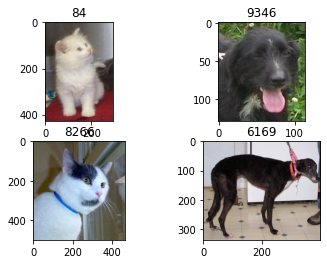

In [0]:
img1 = mpimg.imread('test1/84.jpg')
img2 = mpimg.imread('test1/9346.jpg')
img3 = mpimg.imread('test1/8266.jpg')
img4 = mpimg.imread('test1/6169.jpg')

plt.figure(1)
plt.subplot(221)
plt.imshow(img1)
plt.subplot(221).set_title('84')

plt.subplot(222)
plt.imshow(img2)
plt.subplot(222).set_title('9346')

plt.subplot(223)
plt.imshow(img3)
plt.subplot(223).set_title('8266')

plt.subplot(224)
plt.imshow(img4)
plt.subplot(224).set_title('6169')
plt.show()